In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import pickle

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler

In [3]:
pwd = os.getcwd() # Current Directory

In [4]:
df = pd.read_csv(pwd+'/Encoded_dataset/df_encoded_PCE.csv') # Loading encoded dataset for PCE
print(df.shape) # Shape of dataset
df.head()

(26457, 30)


Cell_architecture  Cell_flexible  Cell_semitransparent  \
0          12.809252              0                     0   
1          12.009877              0                     0   
2          12.809252              0                     0   
3          12.809252              0                     0   
4          12.809252              0                     0   

   Substrate_stack_sequence  ETL_stack_sequence  ETL_thickness  \
0                 12.609307           12.026303          370.0   
1                 12.571570           13.768498          279.6   
2                 12.609307           12.113869          480.0   
3                 12.571570           12.715600          279.6   
4                 12.609307           12.113869          230.0   

   ETL_deposition_procedure  Perovskite_dimension_2D  \
0                 13.592894                        0   
1                 12.357960                        0   
2                 12.879183                        0   
3                 12.572449                        0   
4                 12.879183                        1   

   Perovskite_dimension_2D3D_mixture  Perovskite_dimension_3D  ...  \
0                                  0                        1  ...   
1                                  0                        1  ...   
2                                  0                        1  ...   
3                                  0                        1  ...   
4                                  0                        0  ...   

   Perovskite_deposition_thermal_annealing_temperature  \
0                                          12.385423     
1                                          13.963644     
2                                           9.911379     
3                                          12.848716     
4                                           7.410069     

   Perovskite_deposition_thermal_annealing_time  \
0                                     12.247283   
1                                     14.258854   
2                                      9.447088   
3                                     12.488134   
4                                     10.896159   

   Perovskite_deposition_solvent_annealing  HTL_stack_sequence  \
0                                        0           13.136545   
1                                        0           14.255519   
2                                        0            9.837867   
3                                        0           13.136545   
4                                        0           13.136545   

   HTL_thickness_list  HTL_deposition_procedure  Backcontact_stack_sequence  \
0               148.0                 12.521430                   13.046064   
1                34.0                 12.521430                   12.431390   
2               218.0                 11.874105                   13.046064   
3                34.0                 12.521430                   12.431390   
4                20.0                 12.521430                   13.046064   

   Backcontact_thickness_list  Backcontact_deposition_procedure  \
0                        80.0                         12.675014   
1                       100.0                         12.675014   
2                        50.0                         12.675014   
3                       100.0                         12.675014   
4                        80.0                         12.675014   

   JV_default_PCE  
0           11.60  
1           18.20  
2            4.60  
3           14.19  
4            6.52  

[5 rows x 30 columns]

In [5]:
X = df.iloc[:,:-1] # Features
y = df['JV_default_PCE'] # Target Variable

In [6]:
X.head()

Cell_architecture  Cell_flexible  Cell_semitransparent  \
0          12.809252              0                     0   
1          12.009877              0                     0   
2          12.809252              0                     0   
3          12.809252              0                     0   
4          12.809252              0                     0   

   Substrate_stack_sequence  ETL_stack_sequence  ETL_thickness  \
0                 12.609307           12.026303          370.0   
1                 12.571570           13.768498          279.6   
2                 12.609307           12.113869          480.0   
3                 12.571570           12.715600          279.6   
4                 12.609307           12.113869          230.0   

   ETL_deposition_procedure  Perovskite_dimension_2D  \
0                 13.592894                        0   
1                 12.357960                        0   
2                 12.879183                        0   
3                 12.572449                        0   
4                 12.879183                        1   

   Perovskite_dimension_2D3D_mixture  Perovskite_dimension_3D  ...  \
0                                  0                        1  ...   
1                                  0                        1  ...   
2                                  0                        1  ...   
3                                  0                        1  ...   
4                                  0                        0  ...   

   Perovskite_deposition_quenching_induced_crystallisation  \
0                                                  0         
1                                                  1         
2                                                  0         
3                                                  1         
4                                                  0         

   Perovskite_deposition_thermal_annealing_temperature  \
0                                          12.385423     
1                                          13.963644     
2                                           9.911379     
3                                          12.848716     
4                                           7.410069     

   Perovskite_deposition_thermal_annealing_time  \
0                                     12.247283   
1                                     14.258854   
2                                      9.447088   
3                                     12.488134   
4                                     10.896159   

   Perovskite_deposition_solvent_annealing  HTL_stack_sequence  \
0                                        0           13.136545   
1                                        0           14.255519   
2                                        0            9.837867   
3                                        0           13.136545   
4                                        0           13.136545   

   HTL_thickness_list  HTL_deposition_procedure  Backcontact_stack_sequence  \
0               148.0                 12.521430                   13.046064   
1                34.0                 12.521430                   12.431390   
2               218.0                 11.874105                   13.046064   
3                34.0                 12.521430                   12.431390   
4                20.0                 12.521430                   13.046064   

   Backcontact_thickness_list  Backcontact_deposition_procedure  
0                        80.0                         12.675014  
1                       100.0                         12.675014  
2                        50.0                         12.675014  
3                       100.0                         12.675014  
4                        80.0                         12.675014  

[5 rows x 29 columns]

In [7]:
# Normalization of features using scaler
scaler = MinMaxScaler()
X[X.columns] = scaler.fit_transform(X[X.columns]) # Scaling features
pickle.dump(scaler, open(pwd+"/Encoded_dataset/MMScaler.pkl","wb")) # saving scaler as pickle file

In [8]:
X.head()

Cell_architecture  Cell_flexible  Cell_semitransparent  \
0           1.000000            0.0                   0.0   
1           0.857278            0.0                   0.0   
2           1.000000            0.0                   0.0   
3           1.000000            0.0                   0.0   
4           1.000000            0.0                   0.0   

   Substrate_stack_sequence  ETL_stack_sequence  ETL_thickness  \
0                  0.843821            0.522545       0.014780   
1                  0.836302            0.668027       0.011164   
2                  0.843821            0.529857       0.019180   
3                  0.836302            0.580104       0.011164   
4                  0.843821            0.529857       0.009180   

   ETL_deposition_procedure  Perovskite_dimension_2D  \
0                  0.598900                      0.0   
1                  0.471056                      0.0   
2                  0.525014                      0.0   
3                  0.493260                      0.0   
4                  0.525014                      1.0   

   Perovskite_dimension_2D3D_mixture  Perovskite_dimension_3D  ...  \
0                                0.0                      1.0  ...   
1                                0.0                      1.0  ...   
2                                0.0                      1.0  ...   
3                                0.0                      1.0  ...   
4                                0.0                      0.0  ...   

   Perovskite_deposition_quenching_induced_crystallisation  \
0                                                0.0         
1                                                1.0         
2                                                0.0         
3                                                1.0         
4                                                0.0         

   Perovskite_deposition_thermal_annealing_temperature  \
0                                           0.466852     
1                                           0.614941     
2                                           0.234705     
3                                           0.510324     
4                                           0.000000     

   Perovskite_deposition_thermal_annealing_time  \
0                                      0.376360   
1                                      0.586726   
2                                      0.083522   
3                                      0.401548   
4                                      0.235062   

   Perovskite_deposition_solvent_annealing  HTL_stack_sequence  \
0                                      0.0            0.602925   
1                                      0.0            0.709951   
2                                      0.0            0.287417   
3                                      0.0            0.602925   
4                                      0.0            0.602925   

   HTL_thickness_list  HTL_deposition_procedure  Backcontact_stack_sequence  \
0             0.00588                  0.651429                    0.601206   
1             0.00132                  0.651429                    0.528794   
2             0.00868                  0.561028                    0.601206   
3             0.00132                  0.651429                    0.528794   
4             0.00076                  0.651429                    0.601206   

   Backcontact_thickness_list  Backcontact_deposition_procedure  
0                    0.000650                           0.88095  
1                    0.000817                           0.88095  
2                    0.000400                           0.88095  
3                    0.000817                           0.88095  
4                    0.000650                           0.88095  

[5 rows x 29 columns]

In [9]:
# Split the data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [10]:
def parity_plot(predicted_train, predicted_test, y_train, y_test):
    """ Draw parity plot """
    plt.style.use('default')
    plt.figure(figsize=(5,5))
    plt.scatter(y_train, predicted_train, c='r', label='Train data', edgecolors=(0, 0, 0), marker="o", s=100)
    plt.scatter(y_test, predicted_test, c='b', label='Test data', edgecolors=(0, 0, 0), marker="o", s=100)
    plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
    plt.xlabel('Actual PCE (%)')
    plt.ylabel('Predicted PCE (%)')
    plt.legend(loc='upper left')
    return plt.show()

In [11]:
def model_builder(model_name, y_train, y_test):
    """ Fits ML models, calculates metrics and plots parity plot """
    model_name.fit(X_train, y_train)
    y_pred_train = model_name.predict(X_train)
    y_pred_test = model_name.predict(X_test)

    
    mse = mean_squared_error(y_test, y_pred_test)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred_test)
    print("The mean squared error (MSE) on test set: {:.4f}".format(mse))
    print("The root mean squared error (RMSE) on test set: {:.4f}".format(rmse))
    print("The mean absolute error (MAE) on test set: {:.4f}".format(mae))

    r2_train = r2_score(y_train, y_pred_train)
    r2_test = r2_score(y_test, y_pred_test)

    print("r2 on train set: {:.4f}".format(r2_train))
    print("r2 on test set: {:.4f}".format(r2_test))
    parity_plot(y_pred_train, y_pred_test, y_train, y_test)

Best parameters: {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 30}
The mean squared error (MSE) on test set: 7.8527
The root mean squared error (RMSE) on test set: 2.8023
The mean absolute error (MAE) on test set: 1.9797
r2 on train set: 0.8750
r2 on test set: 0.7061


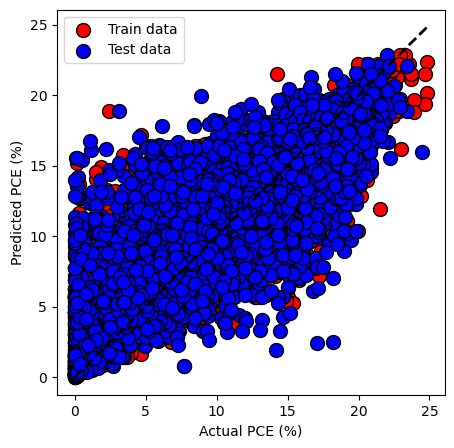

In [12]:
from sklearn.ensemble import RandomForestRegressor

# Define the model
rf = RandomForestRegressor(random_state=42)

# Define the hyperparameter grid
param_grid = {
    'n_estimators': [10, 50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2', None] # Warning - 'max_features' 'auto' is deprecated. 
}

# Define the search object
search = RandomizedSearchCV(rf, param_grid, cv=5, n_iter=50, n_jobs=-1, random_state=42)

# Fit the search object to the training data
search.fit(X_train, y_train)

# Print the best parameters
print(f'Best parameters: {search.best_params_}')

# Get the best model
best_rf = search.best_estimator_



model_builder(best_rf, y_train, y_test)

Best parameters: {'colsample_bytree': 0.75, 'learning_rate': 0.1, 'max_depth': 9, 'n_estimators': 300, 'subsample': 1.0}
The mean squared error (MSE) on test set: 7.9515
The root mean squared error (RMSE) on test set: 2.8198
The mean absolute error (MAE) on test set: 1.9882
r2 on train set: 0.8531
r2 on test set: 0.7024


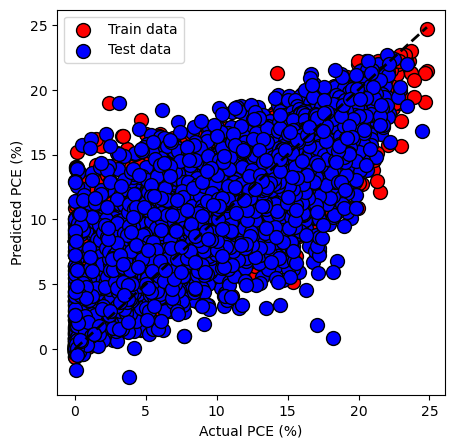

In [13]:
import xgboost as xgb

# Convert the data to DMatrix format
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# Define the model
xgb = xgb.XGBRegressor(random_state = 42)

# Define the hyperparameter grid
param_grid = {
    'max_depth': [3, 5, 7, 9],
    'learning_rate': [0.1, 0.2, 0.3],
    'n_estimators': [100, 200, 300, 400],
    'subsample': [0.5, 0.75, 1.0],
    'colsample_bytree': [0.5, 0.75, 1.0]
}

# Define the search object
search = GridSearchCV(xgb, param_grid, cv=5, n_jobs=-1)

# Fit the search object to the training data
search.fit(X_train, y_train)

# Print the best parameters
print(f'Best parameters: {search.best_params_}')


# Get the best model
best_xgb = search.best_estimator_



model_builder(best_xgb, y_train, y_test)

/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/

/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/

/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/

/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/

/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/

/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/

/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/

/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/

/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/

/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/

/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/

/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/

/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/

/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/

/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/

/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/

/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/

/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/

/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/

/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/

/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/

/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/

/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/

/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/

/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/

/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/

/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/

/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/

/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/

/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/

/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/

/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/

/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,


Best parameters: {'learning_rate': 0.1, 'loss': 'ls', 'max_depth': 9, 'n_estimators': 300, 'subsample': 1.0}


/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,


The mean squared error (MSE) on test set: 8.1307
The root mean squared error (RMSE) on test set: 2.8514
The mean absolute error (MAE) on test set: 1.9878
r2 on train set: 0.8659
r2 on test set: 0.6957


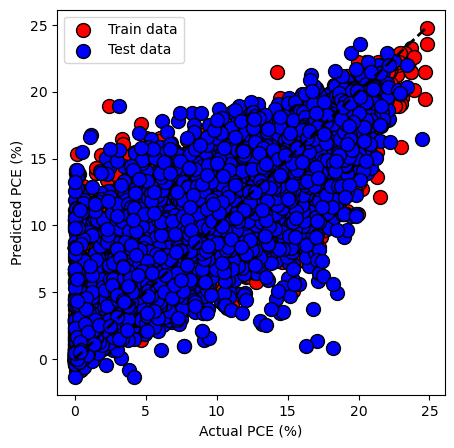

In [14]:
from sklearn.ensemble import GradientBoostingRegressor

# Define the model
gbr = GradientBoostingRegressor()

# Define the hyperparameter grid
param_grid = {
    'n_estimators': [100, 200, 300, 400],
    'max_depth': [3, 5, 7, 9],
    'learning_rate': [0.1, 0.2, 0.3],
    'subsample': [0.5, 0.75, 1.0],
    'loss': ['ls', 'lad', 'huber'] 
    
    # warning 'loss' - 'ls' --> 'squared_error', 'lad' --> 'absolute_error',
    # 'loss': ['squared_error','absolute_error','huber']
}

# Define the search object
search = GridSearchCV(gbr, param_grid, cv=5, n_jobs=-1)

# Fit the search object to the training data
search.fit(X_train, y_train)

# Print the best parameters
print(f'Best parameters: {search.best_params_}')

# Get the best model
best_gbr = search.best_estimator_



model_builder(best_gbr, y_train, y_test)

Best parameters: {'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 2}
The mean squared error (MSE) on test set: 10.5321
The root mean squared error (RMSE) on test set: 3.2453
The mean absolute error (MAE) on test set: 2.2923
r2 on train set: 0.8176
r2 on test set: 0.6058


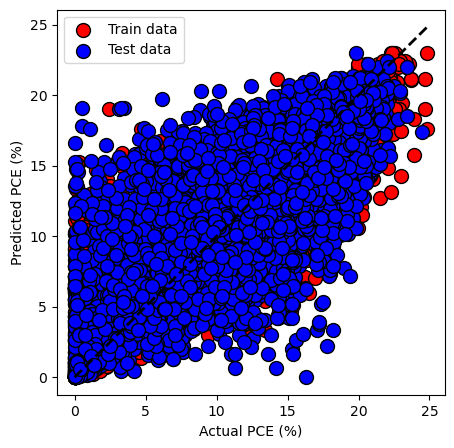

In [15]:
from sklearn.tree import DecisionTreeRegressor


# Define the model
dt = DecisionTreeRegressor()

# Define the hyperparameter grid
param_grid = {
    'max_depth': [None, 3, 5, 7, 9],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Define the search object
search = GridSearchCV(dt, param_grid, cv=5, n_jobs=-1)

# Fit the search object to the training data
search.fit(X_train, y_train)

# Print the best parameters
print(f'Best parameters: {search.best_params_}')

# Get the best model
best_dt = search.best_estimator_



model_builder(best_dt, y_train, y_test)

Best parameters: {'C': 100, 'degree': 4, 'epsilon': 0.3, 'kernel': 'poly'}
The mean squared error (MSE) on test set: 13.6140
The root mean squared error (RMSE) on test set: 3.6897
The mean absolute error (MAE) on test set: 2.6963
r2 on train set: 0.5153
r2 on test set: 0.4905


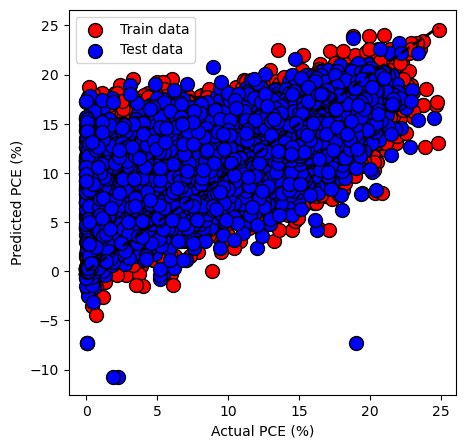

In [16]:
from sklearn.svm import SVR


# Define the model
svr = SVR()

# Define the hyperparameter grid
param_grid = {
    'C': [0.1, 1, 10, 100],
    'epsilon': [0.1, 0.2, 0.3],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'degree': [2, 3, 4, 5]
}

# Define the search object
search = GridSearchCV(svr, param_grid, cv=5, n_jobs=-1)

# Fit the search object to the training data
search.fit(X_train, y_train)

# Print the best parameters
print(f'Best parameters: {search.best_params_}')

# Get the best model
best_svr = search.best_estimator_




model_builder(best_svr, y_train, y_test)

Best parameters: {'bootstrap': True, 'max_features': 0.75, 'max_samples': 1.0, 'n_estimators': 40}
The mean squared error (MSE) on test set: 7.9370
The root mean squared error (RMSE) on test set: 2.8173
The mean absolute error (MAE) on test set: 1.9990
r2 on train set: 0.8685
r2 on test set: 0.7029


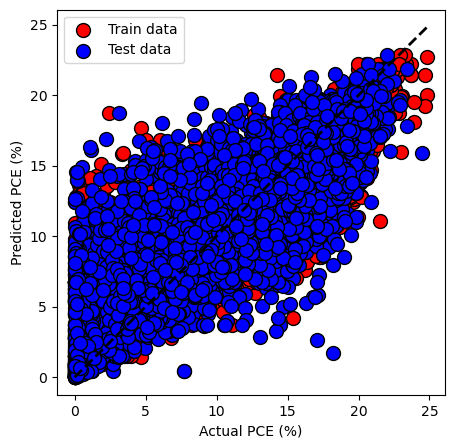

In [17]:
from sklearn.ensemble import BaggingRegressor


# Define the model
br = BaggingRegressor()

# Define the hyperparameter grid
param_grid = {
    'n_estimators': [10, 20, 30, 40],
    'max_samples': [0.5, 0.75, 1.0],
    'max_features': [0.5, 0.75, 1.0],
    'bootstrap': [True, False]
}

# Define the search object
search = GridSearchCV(br, param_grid, cv=5, n_jobs=-1)

# Fit the search object to the training data
search.fit(X_train, y_train)

# Print the best parameters
print(f'Best parameters: {search.best_params_}')

# Get the best model
best_br = search.best_estimator_




model_builder(best_br, y_train, y_test)

Best parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 40}
The mean squared error (MSE) on test set: 7.9572
The root mean squared error (RMSE) on test set: 2.8208
The mean absolute error (MAE) on test set: 1.9824
r2 on train set: 0.8699
r2 on test set: 0.7022


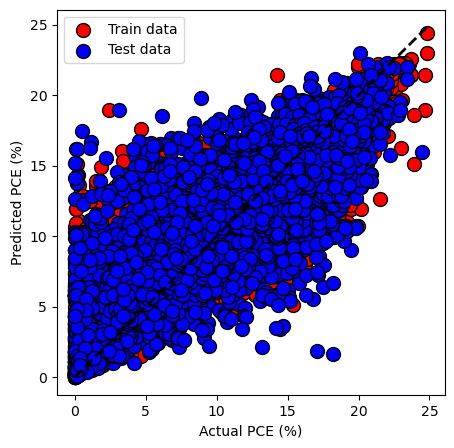

In [18]:
from sklearn.ensemble import ExtraTreesRegressor


# Define the model
et = ExtraTreesRegressor()

# Define the hyperparameter grid
param_grid = {
    'n_estimators': [10, 20, 30, 40],
    'max_depth': [None, 3, 5, 7, 9],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Define the search object
search = GridSearchCV(et, param_grid, cv=5, n_jobs=-1)

# Fit the search object to the training data
search.fit(X_train, y_train)

# Print the best parameters
print(f'Best parameters: {search.best_params_}')

# Get the best model
best_et = search.best_estimator_



model_builder(best_et, y_train, y_test)


Best parameters: {'alpha': 1, 'solver': 'lsqr'}
The mean squared error (MSE) on test set: 15.1217
The root mean squared error (RMSE) on test set: 3.8887
The mean absolute error (MAE) on test set: 3.0252
r2 on train set: 0.4275
r2 on test set: 0.4341


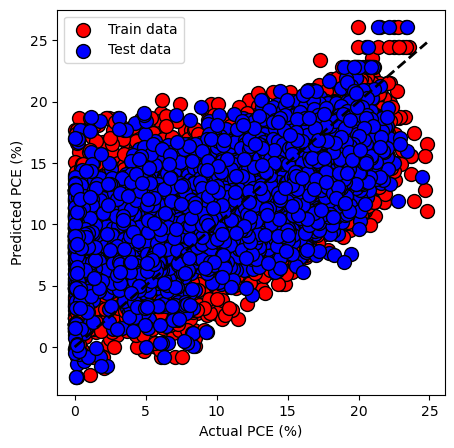

In [19]:
from sklearn.linear_model import Ridge


# Define the model
ridge = Ridge()

# Define the hyperparameter grid
param_grid = {
    'alpha': [0.1, 1, 10, 100],
    'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']
}

# Define the search object
search = GridSearchCV(ridge, param_grid, cv=5, n_jobs=-1)

# Fit the search object to the training data
search.fit(X_train, y_train)

# Print the best parameters
print(f'Best parameters: {search.best_params_}')

# Get the best model
best_ridge = search.best_estimator_


model_builder(best_ridge, y_train, y_test)

Best parameters: {'n_neighbors': 11, 'p': 1, 'weights': 'distance'}
The mean squared error (MSE) on test set: 9.5616
The root mean squared error (RMSE) on test set: 3.0922
The mean absolute error (MAE) on test set: 2.1449
r2 on train set: 0.8995
r2 on test set: 0.6421


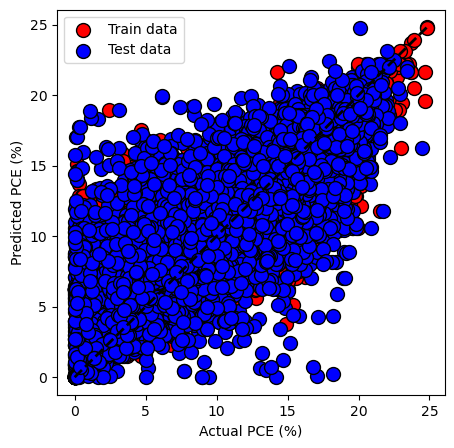

In [20]:
from sklearn.neighbors import KNeighborsRegressor


# Define the model
knr = KNeighborsRegressor()

# Define the hyperparameter grid
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'p': [1, 2, 3]
}

# Define the search object
search = GridSearchCV(knr, param_grid, cv=5, n_jobs=-1)

# Fit the search object to the training data
search.fit(X_train, y_train)

# Print the best parameters
print(f'Best parameters: {search.best_params_}')

# Get the best model
best_knr = search.best_estimator_


model_builder(best_knr, y_train, y_test)

0:	learn: 4.7194973	total: 116ms	remaining: 11.5s
1:	learn: 4.4227651	total: 143ms	remaining: 7.03s
2:	learn: 4.2330915	total: 169ms	remaining: 5.46s
3:	learn: 4.1116190	total: 303ms	remaining: 7.27s
4:	learn: 4.0262049	total: 306ms	remaining: 5.82s
5:	learn: 3.9655446	total: 474ms	remaining: 7.43s
6:	learn: 3.9210111	total: 483ms	remaining: 6.42s
7:	learn: 3.8854001	total: 502ms	remaining: 5.77s
8:	learn: 3.8568431	total: 505ms	remaining: 5.11s
9:	learn: 3.8338269	total: 585ms	remaining: 5.26s
10:	learn: 3.8100466	total: 776ms	remaining: 6.28s
11:	learn: 3.7890325	total: 778ms	remaining: 5.71s
12:	learn: 3.7715180	total: 798ms	remaining: 5.34s
13:	learn: 3.7581856	total: 801ms	remaining: 4.92s
14:	learn: 3.7438436	total: 952ms	remaining: 5.39s
15:	learn: 3.7342928	total: 986ms	remaining: 5.17s
16:	learn: 3.7224616	total: 988ms	remaining: 4.82s
17:	learn: 3.7143246	total: 991ms	remaining: 4.52s
18:	learn: 3.7017962	total: 1.06s	remaining: 4.51s
19:	learn: 3.6899513	total: 1.06s	remaini

0:	learn: 4.0355915	total: 90.4ms	remaining: 8.95s
1:	learn: 3.9244933	total: 94.4ms	remaining: 4.63s
2:	learn: 3.8209539	total: 197ms	remaining: 6.36s
3:	learn: 3.7180329	total: 205ms	remaining: 4.92s
4:	learn: 3.6167806	total: 281ms	remaining: 5.34s
5:	learn: 3.5369952	total: 324ms	remaining: 5.07s
6:	learn: 3.4807161	total: 333ms	remaining: 4.43s
7:	learn: 3.4167540	total: 337ms	remaining: 3.88s
8:	learn: 3.3591716	total: 463ms	remaining: 4.69s
9:	learn: 3.3109771	total: 525ms	remaining: 4.73s
10:	learn: 3.2726991	total: 530ms	remaining: 4.28s
11:	learn: 3.2326609	total: 596ms	remaining: 4.37s
12:	learn: 3.2003399	total: 600ms	remaining: 4.01s
13:	learn: 3.1669309	total: 724ms	remaining: 4.45s
14:	learn: 3.1412907	total: 728ms	remaining: 4.13s
15:	learn: 3.1232116	total: 732ms	remaining: 3.84s
16:	learn: 3.1033115	total: 845ms	remaining: 4.13s
17:	learn: 3.0777874	total: 849ms	remaining: 3.87s
18:	learn: 3.0562626	total: 931ms	remaining: 3.97s
19:	learn: 3.0341080	total: 935ms	remai

0:	learn: 4.7353328	total: 48.9ms	remaining: 4.84s
1:	learn: 4.4316216	total: 52.3ms	remaining: 2.56s
2:	learn: 4.2351381	total: 85.6ms	remaining: 2.77s
3:	learn: 4.1117968	total: 87.9ms	remaining: 2.11s
4:	learn: 4.0305303	total: 164ms	remaining: 3.12s
5:	learn: 3.9756960	total: 167ms	remaining: 2.61s
6:	learn: 3.9260761	total: 169ms	remaining: 2.25s
7:	learn: 3.8858790	total: 264ms	remaining: 3.04s
8:	learn: 3.8519788	total: 267ms	remaining: 2.7s
9:	learn: 3.8268377	total: 374ms	remaining: 3.37s
10:	learn: 3.8049822	total: 378ms	remaining: 3.06s
11:	learn: 3.7847910	total: 382ms	remaining: 2.8s
12:	learn: 3.7641832	total: 481ms	remaining: 3.22s
13:	learn: 3.7479761	total: 485ms	remaining: 2.98s
14:	learn: 3.7379318	total: 560ms	remaining: 3.17s
15:	learn: 3.7265237	total: 563ms	remaining: 2.96s
16:	learn: 3.7186089	total: 621ms	remaining: 3.03s
17:	learn: 3.7044454	total: 624ms	remaining: 2.84s
18:	learn: 3.6966069	total: 627ms	remaining: 2.67s
19:	learn: 3.6882831	total: 713ms	remai

0:	learn: 4.7385574	total: 76.8ms	remaining: 7.61s
1:	learn: 4.4345727	total: 182ms	remaining: 8.92s
2:	learn: 4.2374106	total: 186ms	remaining: 6.01s
3:	learn: 4.0978306	total: 275ms	remaining: 6.61s
4:	learn: 4.0108368	total: 285ms	remaining: 5.41s
5:	learn: 3.9553855	total: 287ms	remaining: 4.49s
6:	learn: 3.9096758	total: 400ms	remaining: 5.31s
7:	learn: 3.8696216	total: 428ms	remaining: 4.93s
8:	learn: 3.8383665	total: 539ms	remaining: 5.45s
9:	learn: 3.8127700	total: 542ms	remaining: 4.88s
10:	learn: 3.7941644	total: 576ms	remaining: 4.66s
11:	learn: 3.7763864	total: 579ms	remaining: 4.25s
12:	learn: 3.7617030	total: 581ms	remaining: 3.89s
13:	learn: 3.7486740	total: 644ms	remaining: 3.96s
14:	learn: 3.7357108	total: 646ms	remaining: 3.66s
15:	learn: 3.7197896	total: 649ms	remaining: 3.4s
16:	learn: 3.7102225	total: 688ms	remaining: 3.36s
17:	learn: 3.7012226	total: 691ms	remaining: 3.15s
18:	learn: 3.6883641	total: 743ms	remaining: 3.17s
19:	learn: 3.6805056	total: 746ms	remaini

0:	learn: 5.0336293	total: 48.5ms	remaining: 4.8s
1:	learn: 4.8860520	total: 51.2ms	remaining: 2.51s
2:	learn: 4.7565786	total: 86.8ms	remaining: 2.81s
3:	learn: 4.6494853	total: 95.8ms	remaining: 2.3s
4:	learn: 4.5566549	total: 99.2ms	remaining: 1.89s
5:	learn: 4.4772360	total: 149ms	remaining: 2.34s
6:	learn: 4.4024729	total: 202ms	remaining: 2.68s
7:	learn: 4.3373806	total: 267ms	remaining: 3.07s
8:	learn: 4.2771151	total: 270ms	remaining: 2.73s
9:	learn: 4.2251064	total: 430ms	remaining: 3.87s
10:	learn: 4.1805112	total: 434ms	remaining: 3.51s
11:	learn: 4.1427302	total: 543ms	remaining: 3.98s
12:	learn: 4.1076119	total: 547ms	remaining: 3.66s
13:	learn: 4.0781912	total: 665ms	remaining: 4.09s
14:	learn: 4.0489863	total: 769ms	remaining: 4.36s
15:	learn: 4.0263827	total: 773ms	remaining: 4.06s
16:	learn: 4.0020733	total: 814ms	remaining: 3.97s
17:	learn: 3.9804160	total: 835ms	remaining: 3.8s
18:	learn: 3.9636237	total: 935ms	remaining: 3.98s
19:	learn: 3.9467064	total: 1.04s	remai

0:	learn: 4.7257412	total: 52.2ms	remaining: 5.17s
1:	learn: 4.4145421	total: 62.1ms	remaining: 3.04s
2:	learn: 4.2307825	total: 65.7ms	remaining: 2.12s
3:	learn: 4.0874649	total: 89.8ms	remaining: 2.15s
4:	learn: 4.0093584	total: 183ms	remaining: 3.47s
5:	learn: 3.9515456	total: 281ms	remaining: 4.4s
6:	learn: 3.9067965	total: 283ms	remaining: 3.76s
7:	learn: 3.8608848	total: 335ms	remaining: 3.85s
8:	learn: 3.8295670	total: 345ms	remaining: 3.49s
9:	learn: 3.8049451	total: 388ms	remaining: 3.5s
10:	learn: 3.7832045	total: 391ms	remaining: 3.16s
11:	learn: 3.7619412	total: 437ms	remaining: 3.21s
12:	learn: 3.7498569	total: 440ms	remaining: 2.94s
13:	learn: 3.7365286	total: 442ms	remaining: 2.71s
14:	learn: 3.7267222	total: 528ms	remaining: 2.99s
15:	learn: 3.7047510	total: 531ms	remaining: 2.79s
16:	learn: 3.6940939	total: 640ms	remaining: 3.13s
17:	learn: 3.6837235	total: 642ms	remaining: 2.93s
18:	learn: 3.6721121	total: 645ms	remaining: 2.75s
19:	learn: 3.6644971	total: 703ms	remai

0:	learn: 4.0573517	total: 48.8ms	remaining: 4.83s
1:	learn: 3.9433725	total: 54.2ms	remaining: 2.66s
2:	learn: 3.8192862	total: 70.8ms	remaining: 2.29s
3:	learn: 3.7104213	total: 117ms	remaining: 2.81s
4:	learn: 3.6319139	total: 127ms	remaining: 2.41s
5:	learn: 3.5467046	total: 192ms	remaining: 3s
6:	learn: 3.4830068	total: 222ms	remaining: 2.95s
7:	learn: 3.4183549	total: 227ms	remaining: 2.61s
8:	learn: 3.3574533	total: 290ms	remaining: 2.93s
9:	learn: 3.3067882	total: 294ms	remaining: 2.64s
10:	learn: 3.2606172	total: 370ms	remaining: 2.99s
11:	learn: 3.2225035	total: 384ms	remaining: 2.81s
12:	learn: 3.1931495	total: 425ms	remaining: 2.84s
13:	learn: 3.1612584	total: 428ms	remaining: 2.63s
14:	learn: 3.1339939	total: 431ms	remaining: 2.44s
15:	learn: 3.1121463	total: 601ms	remaining: 3.15s
16:	learn: 3.0845997	total: 688ms	remaining: 3.36s
17:	learn: 3.0632009	total: 811ms	remaining: 3.69s
18:	learn: 3.0476210	total: 822ms	remaining: 3.5s
19:	learn: 3.0259479	total: 847ms	remainin

0:	learn: 3.7427451	total: 69.2ms	remaining: 6.85s
1:	learn: 3.4996538	total: 171ms	remaining: 8.37s
2:	learn: 3.3145028	total: 179ms	remaining: 5.78s
3:	learn: 3.1855652	total: 223ms	remaining: 5.36s
4:	learn: 3.1119564	total: 235ms	remaining: 4.46s
5:	learn: 3.0505089	total: 296ms	remaining: 4.63s
6:	learn: 2.9974133	total: 325ms	remaining: 4.32s
7:	learn: 2.9711761	total: 329ms	remaining: 3.79s
8:	learn: 2.9436409	total: 352ms	remaining: 3.56s
9:	learn: 2.9222709	total: 419ms	remaining: 3.77s
10:	learn: 2.8975770	total: 422ms	remaining: 3.42s
11:	learn: 2.8724631	total: 500ms	remaining: 3.66s
12:	learn: 2.8559832	total: 503ms	remaining: 3.37s
13:	learn: 2.8428748	total: 694ms	remaining: 4.26s
14:	learn: 2.8343498	total: 918ms	remaining: 5.2s
15:	learn: 2.8263657	total: 922ms	remaining: 4.84s
16:	learn: 2.8172057	total: 979ms	remaining: 4.78s
17:	learn: 2.8088276	total: 982ms	remaining: 4.47s
18:	learn: 2.8014767	total: 1.04s	remaining: 4.46s
19:	learn: 2.7919726	total: 1.05s	remaini

62:	learn: 3.3666133	total: 2.05s	remaining: 1.2s
63:	learn: 3.3640932	total: 2.05s	remaining: 1.16s
64:	learn: 3.3611260	total: 2.06s	remaining: 1.11s
65:	learn: 3.3571360	total: 2.07s	remaining: 1.06s
66:	learn: 3.3539922	total: 2.12s	remaining: 1.04s
67:	learn: 3.3519263	total: 2.13s	remaining: 1s
68:	learn: 3.3494957	total: 2.21s	remaining: 991ms
69:	learn: 3.3465787	total: 2.27s	remaining: 973ms
70:	learn: 3.3444340	total: 2.28s	remaining: 931ms
71:	learn: 3.3410178	total: 2.36s	remaining: 919ms
72:	learn: 3.3389313	total: 2.37s	remaining: 876ms
73:	learn: 3.3372293	total: 2.37s	remaining: 833ms
74:	learn: 3.3333125	total: 2.45s	remaining: 817ms
75:	learn: 3.3312673	total: 2.46s	remaining: 775ms
76:	learn: 3.3275565	total: 2.46s	remaining: 735ms
77:	learn: 3.3248292	total: 2.46s	remaining: 695ms
78:	learn: 3.3196384	total: 2.47s	remaining: 656ms
79:	learn: 3.3159365	total: 2.49s	remaining: 622ms
80:	learn: 3.3115681	total: 2.54s	remaining: 595ms
81:	learn: 3.3098284	total: 2.54s	r

62:	learn: 3.3896640	total: 2.08s	remaining: 1.22s
63:	learn: 3.3860397	total: 2.15s	remaining: 1.21s
64:	learn: 3.3824854	total: 2.16s	remaining: 1.16s
65:	learn: 3.3810577	total: 2.24s	remaining: 1.16s
66:	learn: 3.3773693	total: 2.25s	remaining: 1.1s
67:	learn: 3.3743872	total: 2.36s	remaining: 1.11s
68:	learn: 3.3703079	total: 2.43s	remaining: 1.09s
69:	learn: 3.3676094	total: 2.43s	remaining: 1.04s
70:	learn: 3.3647047	total: 2.43s	remaining: 994ms
71:	learn: 3.3599283	total: 2.55s	remaining: 993ms
72:	learn: 3.3569018	total: 2.56s	remaining: 946ms
73:	learn: 3.3541845	total: 2.56s	remaining: 899ms
74:	learn: 3.3538544	total: 2.59s	remaining: 864ms
75:	learn: 3.3514663	total: 2.6s	remaining: 820ms
76:	learn: 3.3492804	total: 2.71s	remaining: 810ms
77:	learn: 3.3454080	total: 2.76s	remaining: 779ms
78:	learn: 3.3414203	total: 2.77s	remaining: 736ms
79:	learn: 3.3366463	total: 2.77s	remaining: 693ms
80:	learn: 3.3310706	total: 2.84s	remaining: 666ms
81:	learn: 3.3265268	total: 2.84s

62:	learn: 2.6256004	total: 3.13s	remaining: 1.84s
63:	learn: 2.6234831	total: 3.14s	remaining: 1.76s
64:	learn: 2.6209579	total: 3.17s	remaining: 1.71s
65:	learn: 2.6201993	total: 3.22s	remaining: 1.66s
66:	learn: 2.6156810	total: 3.39s	remaining: 1.67s
67:	learn: 2.6132488	total: 3.4s	remaining: 1.6s
68:	learn: 2.6109414	total: 3.51s	remaining: 1.58s
69:	learn: 2.6090425	total: 3.62s	remaining: 1.55s
70:	learn: 2.6064720	total: 3.73s	remaining: 1.52s
71:	learn: 2.6052930	total: 3.74s	remaining: 1.46s
72:	learn: 2.6026273	total: 3.75s	remaining: 1.39s
73:	learn: 2.5984946	total: 3.81s	remaining: 1.34s
74:	learn: 2.5956153	total: 3.82s	remaining: 1.27s
75:	learn: 2.5901348	total: 3.85s	remaining: 1.22s
76:	learn: 2.5884656	total: 3.85s	remaining: 1.15s
77:	learn: 2.5865171	total: 3.9s	remaining: 1.1s
78:	learn: 2.5850616	total: 3.91s	remaining: 1.04s
79:	learn: 2.5840070	total: 3.97s	remaining: 992ms
80:	learn: 2.5831389	total: 3.97s	remaining: 932ms
81:	learn: 2.5779797	total: 4.02s	r

62:	learn: 3.3822432	total: 2.83s	remaining: 1.66s
63:	learn: 3.3801502	total: 2.83s	remaining: 1.59s
64:	learn: 3.3775400	total: 2.89s	remaining: 1.55s
65:	learn: 3.3747463	total: 2.89s	remaining: 1.49s
66:	learn: 3.3714171	total: 2.97s	remaining: 1.46s
67:	learn: 3.3694041	total: 3.04s	remaining: 1.43s
68:	learn: 3.3673190	total: 3.04s	remaining: 1.37s
69:	learn: 3.3635689	total: 3.13s	remaining: 1.34s
70:	learn: 3.3618934	total: 3.13s	remaining: 1.28s
71:	learn: 3.3602482	total: 3.17s	remaining: 1.23s
72:	learn: 3.3583536	total: 3.17s	remaining: 1.17s
73:	learn: 3.3539416	total: 3.22s	remaining: 1.13s
74:	learn: 3.3522256	total: 3.28s	remaining: 1.09s
75:	learn: 3.3489446	total: 3.35s	remaining: 1.06s
76:	learn: 3.3468005	total: 3.35s	remaining: 1s
77:	learn: 3.3442005	total: 3.39s	remaining: 956ms
78:	learn: 3.3416206	total: 3.39s	remaining: 902ms
79:	learn: 3.3386235	total: 3.46s	remaining: 865ms
80:	learn: 3.3360098	total: 3.46s	remaining: 812ms
81:	learn: 3.3319942	total: 3.46s	

62:	learn: 2.5486448	total: 3.66s	remaining: 2.15s
63:	learn: 2.5454654	total: 3.66s	remaining: 2.06s
64:	learn: 2.5440270	total: 3.7s	remaining: 1.99s
65:	learn: 2.5422643	total: 3.71s	remaining: 1.91s
66:	learn: 2.5401402	total: 3.78s	remaining: 1.86s
67:	learn: 2.5369959	total: 3.78s	remaining: 1.78s
68:	learn: 2.5339852	total: 3.81s	remaining: 1.71s
69:	learn: 2.5323090	total: 3.88s	remaining: 1.66s
70:	learn: 2.5294914	total: 3.89s	remaining: 1.59s
71:	learn: 2.5268667	total: 3.97s	remaining: 1.54s
72:	learn: 2.5247326	total: 3.98s	remaining: 1.47s
73:	learn: 2.5223113	total: 4.13s	remaining: 1.45s
74:	learn: 2.5183495	total: 4.18s	remaining: 1.39s
75:	learn: 2.5177309	total: 4.18s	remaining: 1.32s
76:	learn: 2.5153455	total: 4.3s	remaining: 1.28s
77:	learn: 2.5132802	total: 4.32s	remaining: 1.22s
78:	learn: 2.5121587	total: 4.49s	remaining: 1.19s
79:	learn: 2.5093394	total: 4.51s	remaining: 1.13s
80:	learn: 2.5077113	total: 4.56s	remaining: 1.07s
81:	learn: 2.5034568	total: 4.58s

62:	learn: 2.5331592	total: 2.41s	remaining: 1.41s
63:	learn: 2.5289775	total: 2.41s	remaining: 1.36s
64:	learn: 2.5271984	total: 2.43s	remaining: 1.31s
65:	learn: 2.5264272	total: 2.5s	remaining: 1.29s
66:	learn: 2.5207465	total: 2.62s	remaining: 1.29s
67:	learn: 2.5175400	total: 2.63s	remaining: 1.24s
68:	learn: 2.5138989	total: 2.63s	remaining: 1.18s
69:	learn: 2.5101265	total: 2.77s	remaining: 1.19s
70:	learn: 2.5071723	total: 2.77s	remaining: 1.13s
71:	learn: 2.5050033	total: 2.87s	remaining: 1.11s
72:	learn: 2.5022141	total: 2.91s	remaining: 1.08s
73:	learn: 2.5001403	total: 3.02s	remaining: 1.06s
74:	learn: 2.4970013	total: 3.02s	remaining: 1.01s
75:	learn: 2.4936288	total: 3.25s	remaining: 1.02s
76:	learn: 2.4918163	total: 3.38s	remaining: 1.01s
77:	learn: 2.4899599	total: 3.38s	remaining: 955ms
78:	learn: 2.4868471	total: 3.42s	remaining: 908ms
79:	learn: 2.4849025	total: 3.44s	remaining: 860ms
80:	learn: 2.4827652	total: 3.52s	remaining: 826ms
81:	learn: 2.4821926	total: 3.53

62:	learn: 3.3762803	total: 3s	remaining: 1.76s
63:	learn: 3.3738163	total: 3s	remaining: 1.69s
64:	learn: 3.3708094	total: 3.08s	remaining: 1.66s
65:	learn: 3.3678016	total: 3.22s	remaining: 1.66s
66:	learn: 3.3659548	total: 3.22s	remaining: 1.58s
67:	learn: 3.3642903	total: 3.39s	remaining: 1.59s
68:	learn: 3.3583502	total: 3.39s	remaining: 1.52s
69:	learn: 3.3557515	total: 3.39s	remaining: 1.45s
70:	learn: 3.3538852	total: 3.39s	remaining: 1.39s
71:	learn: 3.3520870	total: 3.4s	remaining: 1.32s
72:	learn: 3.3497235	total: 3.4s	remaining: 1.26s
73:	learn: 3.3468784	total: 3.4s	remaining: 1.19s
74:	learn: 3.3435889	total: 3.47s	remaining: 1.16s
75:	learn: 3.3419187	total: 3.47s	remaining: 1.09s
76:	learn: 3.3395465	total: 3.54s	remaining: 1.06s
77:	learn: 3.3367890	total: 3.63s	remaining: 1.02s
78:	learn: 3.3343095	total: 3.64s	remaining: 968ms
79:	learn: 3.3329855	total: 3.78s	remaining: 945ms
80:	learn: 3.3293778	total: 3.83s	remaining: 897ms
81:	learn: 3.3263523	total: 3.83s	remain

62:	learn: 2.6387806	total: 3.09s	remaining: 1.82s
63:	learn: 2.6360846	total: 3.21s	remaining: 1.81s
64:	learn: 2.6352789	total: 3.26s	remaining: 1.75s
65:	learn: 2.6335094	total: 3.26s	remaining: 1.68s
66:	learn: 2.6326129	total: 3.36s	remaining: 1.66s
67:	learn: 2.6296624	total: 3.41s	remaining: 1.6s
68:	learn: 2.6290827	total: 3.5s	remaining: 1.57s
69:	learn: 2.6271650	total: 3.51s	remaining: 1.5s
70:	learn: 2.6242706	total: 3.66s	remaining: 1.5s
71:	learn: 2.6234654	total: 3.66s	remaining: 1.43s
72:	learn: 2.6207820	total: 3.73s	remaining: 1.38s
73:	learn: 2.6193421	total: 3.74s	remaining: 1.31s
74:	learn: 2.6149416	total: 3.79s	remaining: 1.26s
75:	learn: 2.6126484	total: 3.79s	remaining: 1.2s
76:	learn: 2.6092525	total: 3.94s	remaining: 1.18s
77:	learn: 2.6068919	total: 3.96s	remaining: 1.12s
78:	learn: 2.6037815	total: 4.19s	remaining: 1.11s
79:	learn: 2.6018677	total: 4.19s	remaining: 1.05s
80:	learn: 2.5989704	total: 4.25s	remaining: 998ms
81:	learn: 2.5977303	total: 4.26s	re

62:	learn: 2.5390809	total: 3.38s	remaining: 1.98s
63:	learn: 2.5369567	total: 3.38s	remaining: 1.9s
64:	learn: 2.5338505	total: 3.47s	remaining: 1.87s
65:	learn: 2.5301174	total: 3.48s	remaining: 1.79s
66:	learn: 2.5280006	total: 3.83s	remaining: 1.89s
67:	learn: 2.5271500	total: 3.83s	remaining: 1.8s
68:	learn: 2.5225521	total: 4.02s	remaining: 1.81s
69:	learn: 2.5186448	total: 4.14s	remaining: 1.78s
70:	learn: 2.5158300	total: 4.15s	remaining: 1.7s
71:	learn: 2.5140773	total: 4.2s	remaining: 1.63s
72:	learn: 2.5131328	total: 4.2s	remaining: 1.55s
73:	learn: 2.5086304	total: 4.21s	remaining: 1.48s
74:	learn: 2.5067474	total: 4.23s	remaining: 1.41s
75:	learn: 2.5034758	total: 4.34s	remaining: 1.37s
76:	learn: 2.5025257	total: 4.44s	remaining: 1.33s
77:	learn: 2.5010873	total: 4.45s	remaining: 1.25s
78:	learn: 2.5004505	total: 4.58s	remaining: 1.22s
79:	learn: 2.4933777	total: 4.58s	remaining: 1.15s
80:	learn: 2.4909962	total: 4.69s	remaining: 1.1s
81:	learn: 2.4881898	total: 4.69s	rem

62:	learn: 2.6085283	total: 4.62s	remaining: 2.71s
63:	learn: 2.6062773	total: 4.71s	remaining: 2.65s
64:	learn: 2.6032915	total: 4.71s	remaining: 2.54s
65:	learn: 2.6020239	total: 4.72s	remaining: 2.43s
66:	learn: 2.5936825	total: 4.85s	remaining: 2.39s
67:	learn: 2.5911521	total: 4.91s	remaining: 2.31s
68:	learn: 2.5895156	total: 4.96s	remaining: 2.23s
69:	learn: 2.5886095	total: 4.96s	remaining: 2.13s
70:	learn: 2.5863969	total: 5.06s	remaining: 2.07s
71:	learn: 2.5837146	total: 5.1s	remaining: 1.98s
72:	learn: 2.5808440	total: 5.1s	remaining: 1.89s
73:	learn: 2.5792486	total: 5.23s	remaining: 1.84s
74:	learn: 2.5774935	total: 5.31s	remaining: 1.77s
75:	learn: 2.5751835	total: 5.31s	remaining: 1.68s
76:	learn: 2.5729429	total: 5.39s	remaining: 1.61s
77:	learn: 2.5721173	total: 5.39s	remaining: 1.52s
78:	learn: 2.5705497	total: 5.43s	remaining: 1.44s
79:	learn: 2.5672320	total: 5.46s	remaining: 1.37s
80:	learn: 2.5654552	total: 5.48s	remaining: 1.28s
81:	learn: 2.5640874	total: 5.62s

62:	learn: 3.6643424	total: 3.6s	remaining: 7.84s
63:	learn: 3.6622479	total: 3.62s	remaining: 7.7s
64:	learn: 3.6599217	total: 3.64s	remaining: 7.55s
65:	learn: 3.6579701	total: 3.68s	remaining: 7.47s
66:	learn: 3.6557946	total: 3.68s	remaining: 7.31s
67:	learn: 3.6539084	total: 3.71s	remaining: 7.2s
68:	learn: 3.6510630	total: 3.72s	remaining: 7.06s
69:	learn: 3.6488631	total: 3.8s	remaining: 7.06s
70:	learn: 3.6468952	total: 3.81s	remaining: 6.93s
71:	learn: 3.6448377	total: 3.82s	remaining: 6.78s
72:	learn: 3.6426329	total: 3.92s	remaining: 6.83s
73:	learn: 3.6409971	total: 3.93s	remaining: 6.69s
74:	learn: 3.6392349	total: 3.94s	remaining: 6.56s
75:	learn: 3.6374890	total: 3.95s	remaining: 6.45s
76:	learn: 3.6353015	total: 4.06s	remaining: 6.48s
77:	learn: 3.6334098	total: 4.07s	remaining: 6.36s
78:	learn: 3.6320946	total: 4.1s	remaining: 6.29s
79:	learn: 3.6301993	total: 4.18s	remaining: 6.28s
80:	learn: 3.6276353	total: 4.19s	remaining: 6.15s
81:	learn: 3.6244929	total: 4.22s	re

124:	learn: 3.5584072	total: 5.19s	remaining: 3.12s
125:	learn: 3.5572244	total: 5.2s	remaining: 3.05s
126:	learn: 3.5564377	total: 5.2s	remaining: 2.99s
127:	learn: 3.5556893	total: 5.2s	remaining: 2.93s
128:	learn: 3.5539714	total: 5.2s	remaining: 2.86s
129:	learn: 3.5526206	total: 5.21s	remaining: 2.8s
130:	learn: 3.5506247	total: 5.21s	remaining: 2.74s
131:	learn: 3.5495798	total: 5.21s	remaining: 2.68s
132:	learn: 3.5483423	total: 5.45s	remaining: 2.74s
133:	learn: 3.5468672	total: 5.52s	remaining: 2.72s
134:	learn: 3.5456952	total: 5.52s	remaining: 2.66s
135:	learn: 3.5429900	total: 5.58s	remaining: 2.62s
136:	learn: 3.5414100	total: 5.59s	remaining: 2.57s
137:	learn: 3.5389382	total: 5.59s	remaining: 2.51s
138:	learn: 3.5378821	total: 5.62s	remaining: 2.47s
139:	learn: 3.5361277	total: 5.68s	remaining: 2.44s
140:	learn: 3.5336641	total: 5.68s	remaining: 2.38s
141:	learn: 3.5330277	total: 5.69s	remaining: 2.32s
142:	learn: 3.5304465	total: 5.87s	remaining: 2.34s
143:	learn: 3.529

124:	learn: 3.5470771	total: 5.34s	remaining: 3.21s
125:	learn: 3.5457584	total: 5.34s	remaining: 3.14s
126:	learn: 3.5448616	total: 5.37s	remaining: 3.09s
127:	learn: 3.5431125	total: 5.37s	remaining: 3.02s
128:	learn: 3.5421430	total: 5.45s	remaining: 3s
129:	learn: 3.5405512	total: 5.48s	remaining: 2.95s
130:	learn: 3.5398339	total: 5.53s	remaining: 2.91s
131:	learn: 3.5387604	total: 5.57s	remaining: 2.87s
132:	learn: 3.5368651	total: 5.58s	remaining: 2.81s
133:	learn: 3.5353498	total: 5.58s	remaining: 2.75s
134:	learn: 3.5333151	total: 5.67s	remaining: 2.73s
135:	learn: 3.5319202	total: 5.87s	remaining: 2.76s
136:	learn: 3.5313775	total: 5.88s	remaining: 2.7s
137:	learn: 3.5286785	total: 5.89s	remaining: 2.65s
138:	learn: 3.5271207	total: 5.92s	remaining: 2.6s
139:	learn: 3.5255405	total: 6.02s	remaining: 2.58s
140:	learn: 3.5248415	total: 6.02s	remaining: 2.52s
141:	learn: 3.5240113	total: 6.03s	remaining: 2.46s
142:	learn: 3.5223736	total: 6.13s	remaining: 2.44s
143:	learn: 3.521

124:	learn: 3.3321166	total: 4.74s	remaining: 2.84s
125:	learn: 3.3312215	total: 4.75s	remaining: 2.79s
126:	learn: 3.3293570	total: 4.84s	remaining: 2.79s
127:	learn: 3.3278019	total: 4.87s	remaining: 2.74s
128:	learn: 3.3267980	total: 4.95s	remaining: 2.73s
129:	learn: 3.3250466	total: 4.96s	remaining: 2.67s
130:	learn: 3.3231113	total: 4.99s	remaining: 2.63s
131:	learn: 3.3218014	total: 5s	remaining: 2.58s
132:	learn: 3.3216216	total: 5.01s	remaining: 2.52s
133:	learn: 3.3186082	total: 5.07s	remaining: 2.5s
134:	learn: 3.3176134	total: 5.07s	remaining: 2.44s
135:	learn: 3.3160287	total: 5.16s	remaining: 2.43s
136:	learn: 3.3137948	total: 5.16s	remaining: 2.37s
137:	learn: 3.3119503	total: 5.19s	remaining: 2.33s
138:	learn: 3.3100795	total: 5.19s	remaining: 2.28s
139:	learn: 3.3076154	total: 5.2s	remaining: 2.23s
140:	learn: 3.3058630	total: 5.25s	remaining: 2.19s
141:	learn: 3.3036075	total: 5.33s	remaining: 2.18s
142:	learn: 3.3013541	total: 5.33s	remaining: 2.12s
143:	learn: 3.299

124:	learn: 2.6881420	total: 6.5s	remaining: 3.9s
125:	learn: 2.6865877	total: 6.52s	remaining: 3.83s
126:	learn: 2.6858374	total: 6.6s	remaining: 3.79s
127:	learn: 2.6843438	total: 6.62s	remaining: 3.72s
128:	learn: 2.6828538	total: 6.63s	remaining: 3.65s
129:	learn: 2.6820880	total: 6.73s	remaining: 3.63s
130:	learn: 2.6788842	total: 6.77s	remaining: 3.56s
131:	learn: 2.6779661	total: 6.77s	remaining: 3.49s
132:	learn: 2.6764766	total: 6.81s	remaining: 3.43s
133:	learn: 2.6757838	total: 6.81s	remaining: 3.35s
134:	learn: 2.6754026	total: 6.88s	remaining: 3.31s
135:	learn: 2.6744115	total: 6.89s	remaining: 3.24s
136:	learn: 2.6733919	total: 6.92s	remaining: 3.18s
137:	learn: 2.6724341	total: 6.93s	remaining: 3.11s
138:	learn: 2.6719138	total: 6.93s	remaining: 3.04s
139:	learn: 2.6702221	total: 6.94s	remaining: 2.98s
140:	learn: 2.6701029	total: 6.99s	remaining: 2.92s
141:	learn: 2.6685745	total: 7.08s	remaining: 2.89s
142:	learn: 2.6674183	total: 7.18s	remaining: 2.86s
143:	learn: 2.6

123:	learn: 2.6866631	total: 5.76s	remaining: 3.53s
124:	learn: 2.6846487	total: 5.87s	remaining: 3.52s
125:	learn: 2.6830951	total: 6.03s	remaining: 3.54s
126:	learn: 2.6816155	total: 6.08s	remaining: 3.5s
127:	learn: 2.6800397	total: 6.09s	remaining: 3.42s
128:	learn: 2.6783477	total: 6.12s	remaining: 3.37s
129:	learn: 2.6770639	total: 6.19s	remaining: 3.33s
130:	learn: 2.6746006	total: 6.19s	remaining: 3.26s
131:	learn: 2.6725230	total: 6.27s	remaining: 3.23s
132:	learn: 2.6719059	total: 6.28s	remaining: 3.16s
133:	learn: 2.6705484	total: 6.37s	remaining: 3.13s
134:	learn: 2.6690036	total: 6.37s	remaining: 3.07s
135:	learn: 2.6682511	total: 6.38s	remaining: 3s
136:	learn: 2.6667477	total: 6.46s	remaining: 2.97s
137:	learn: 2.6651679	total: 6.52s	remaining: 2.93s
138:	learn: 2.6646899	total: 6.64s	remaining: 2.92s
139:	learn: 2.6633660	total: 6.77s	remaining: 2.9s
140:	learn: 2.6622940	total: 6.77s	remaining: 2.83s
141:	learn: 2.6615051	total: 6.85s	remaining: 2.8s
142:	learn: 2.6606

123:	learn: 3.3237851	total: 5.1s	remaining: 3.13s
124:	learn: 3.3230884	total: 5.1s	remaining: 3.06s
125:	learn: 3.3215271	total: 5.2s	remaining: 3.05s
126:	learn: 3.3200358	total: 5.25s	remaining: 3.02s
127:	learn: 3.3173569	total: 5.26s	remaining: 2.96s
128:	learn: 3.3156091	total: 5.29s	remaining: 2.91s
129:	learn: 3.3137427	total: 5.36s	remaining: 2.89s
130:	learn: 3.3119455	total: 5.38s	remaining: 2.83s
131:	learn: 3.3108275	total: 5.38s	remaining: 2.77s
132:	learn: 3.3086982	total: 5.38s	remaining: 2.71s
133:	learn: 3.3060949	total: 5.48s	remaining: 2.7s
134:	learn: 3.3050021	total: 5.48s	remaining: 2.64s
135:	learn: 3.3034057	total: 5.5s	remaining: 2.59s
136:	learn: 3.3010855	total: 5.51s	remaining: 2.53s
137:	learn: 3.2999751	total: 5.65s	remaining: 2.54s
138:	learn: 3.2996958	total: 5.66s	remaining: 2.48s
139:	learn: 3.2977898	total: 5.76s	remaining: 2.47s
140:	learn: 3.2964222	total: 5.77s	remaining: 2.41s
141:	learn: 3.2950939	total: 5.84s	remaining: 2.38s
142:	learn: 3.293

124:	learn: 3.3431450	total: 5.55s	remaining: 3.33s
125:	learn: 3.3423574	total: 5.62s	remaining: 3.3s
126:	learn: 3.3409151	total: 5.63s	remaining: 3.23s
127:	learn: 3.3401335	total: 5.66s	remaining: 3.18s
128:	learn: 3.3387503	total: 5.71s	remaining: 3.14s
129:	learn: 3.3342677	total: 5.71s	remaining: 3.07s
130:	learn: 3.3319072	total: 5.75s	remaining: 3.03s
131:	learn: 3.3300165	total: 5.75s	remaining: 2.96s
132:	learn: 3.3281116	total: 5.75s	remaining: 2.9s
133:	learn: 3.3255654	total: 5.91s	remaining: 2.91s
134:	learn: 3.3241407	total: 5.93s	remaining: 2.86s
135:	learn: 3.3230431	total: 5.94s	remaining: 2.79s
136:	learn: 3.3218060	total: 5.96s	remaining: 2.74s
137:	learn: 3.3192330	total: 5.96s	remaining: 2.68s
138:	learn: 3.3181366	total: 5.97s	remaining: 2.62s
139:	learn: 3.3174992	total: 6.04s	remaining: 2.59s
140:	learn: 3.3149214	total: 6.08s	remaining: 2.54s
141:	learn: 3.3129943	total: 6.13s	remaining: 2.5s
142:	learn: 3.3123158	total: 6.24s	remaining: 2.49s
143:	learn: 3.3

124:	learn: 2.6865839	total: 6.37s	remaining: 3.82s
125:	learn: 2.6854413	total: 6.38s	remaining: 3.75s
126:	learn: 2.6840262	total: 6.38s	remaining: 3.67s
127:	learn: 2.6837430	total: 6.61s	remaining: 3.72s
128:	learn: 2.6834386	total: 6.62s	remaining: 3.64s
129:	learn: 2.6821168	total: 6.76s	remaining: 3.64s
130:	learn: 2.6792114	total: 6.79s	remaining: 3.58s
131:	learn: 2.6786140	total: 6.79s	remaining: 3.5s
132:	learn: 2.6775317	total: 6.95s	remaining: 3.5s
133:	learn: 2.6758400	total: 7.05s	remaining: 3.47s
134:	learn: 2.6751745	total: 7.06s	remaining: 3.4s
135:	learn: 2.6731208	total: 7.11s	remaining: 3.35s
136:	learn: 2.6729302	total: 7.18s	remaining: 3.3s
137:	learn: 2.6727632	total: 7.18s	remaining: 3.23s
138:	learn: 2.6713577	total: 7.19s	remaining: 3.15s
139:	learn: 2.6698938	total: 7.34s	remaining: 3.15s
140:	learn: 2.6688788	total: 7.49s	remaining: 3.13s
141:	learn: 2.6671317	total: 7.49s	remaining: 3.06s
142:	learn: 2.6666228	total: 7.54s	remaining: 3.01s
143:	learn: 2.66

124:	learn: 2.6744878	total: 6.09s	remaining: 3.65s
125:	learn: 2.6735205	total: 6.13s	remaining: 3.6s
126:	learn: 2.6728278	total: 6.37s	remaining: 3.66s
127:	learn: 2.6719970	total: 6.42s	remaining: 3.61s
128:	learn: 2.6715704	total: 6.43s	remaining: 3.54s
129:	learn: 2.6701925	total: 6.43s	remaining: 3.46s
130:	learn: 2.6690189	total: 6.5s	remaining: 3.42s
131:	learn: 2.6684341	total: 6.5s	remaining: 3.35s
132:	learn: 2.6670856	total: 6.51s	remaining: 3.28s
133:	learn: 2.6663358	total: 6.51s	remaining: 3.21s
134:	learn: 2.6656231	total: 6.52s	remaining: 3.14s
135:	learn: 2.6635946	total: 6.61s	remaining: 3.11s
136:	learn: 2.6617626	total: 6.61s	remaining: 3.04s
137:	learn: 2.6608560	total: 6.66s	remaining: 2.99s
138:	learn: 2.6603786	total: 6.68s	remaining: 2.93s
139:	learn: 2.6587139	total: 6.71s	remaining: 2.87s
140:	learn: 2.6582672	total: 6.72s	remaining: 2.81s
141:	learn: 2.6574823	total: 6.75s	remaining: 2.76s
142:	learn: 2.6559368	total: 6.82s	remaining: 2.72s
143:	learn: 2.6

22:	learn: 2.7702986	total: 1.86s	remaining: 14.3s
23:	learn: 2.7656577	total: 1.87s	remaining: 13.7s
24:	learn: 2.7623195	total: 1.98s	remaining: 13.9s
25:	learn: 2.7563716	total: 2.03s	remaining: 13.6s
26:	learn: 2.7527499	total: 2.09s	remaining: 13.4s
27:	learn: 2.7492188	total: 2.09s	remaining: 12.9s
28:	learn: 2.7449530	total: 2.09s	remaining: 12.3s
29:	learn: 2.7409003	total: 2.2s	remaining: 12.5s
30:	learn: 2.7342170	total: 2.27s	remaining: 12.4s
31:	learn: 2.7286701	total: 2.27s	remaining: 11.9s
32:	learn: 2.7226842	total: 2.37s	remaining: 12s
33:	learn: 2.7188228	total: 2.39s	remaining: 11.7s
34:	learn: 2.7148615	total: 2.39s	remaining: 11.3s
35:	learn: 2.7119503	total: 2.53s	remaining: 11.5s
36:	learn: 2.7093322	total: 2.53s	remaining: 11.2s
37:	learn: 2.7028572	total: 2.58s	remaining: 11s
38:	learn: 2.6997825	total: 2.64s	remaining: 10.9s
39:	learn: 2.6902357	total: 2.64s	remaining: 10.6s
40:	learn: 2.6882031	total: 2.69s	remaining: 10.4s
41:	learn: 2.6804174	total: 2.7s	rem

124:	learn: 2.4979283	total: 7.08s	remaining: 4.25s
125:	learn: 2.4966632	total: 7.09s	remaining: 4.16s
126:	learn: 2.4956469	total: 7.22s	remaining: 4.15s
127:	learn: 2.4931898	total: 7.23s	remaining: 4.07s
128:	learn: 2.4925674	total: 7.3s	remaining: 4.02s
129:	learn: 2.4906929	total: 7.3s	remaining: 3.93s
130:	learn: 2.4879609	total: 7.37s	remaining: 3.88s
131:	learn: 2.4874349	total: 7.37s	remaining: 3.8s
132:	learn: 2.4855977	total: 7.41s	remaining: 3.73s
133:	learn: 2.4839070	total: 7.42s	remaining: 3.66s
134:	learn: 2.4824543	total: 7.45s	remaining: 3.59s
135:	learn: 2.4809851	total: 7.52s	remaining: 3.54s
136:	learn: 2.4800429	total: 7.52s	remaining: 3.46s
137:	learn: 2.4786154	total: 7.6s	remaining: 3.41s
138:	learn: 2.4764440	total: 7.6s	remaining: 3.34s
139:	learn: 2.4762833	total: 7.61s	remaining: 3.26s
140:	learn: 2.4755870	total: 7.68s	remaining: 3.21s
141:	learn: 2.4741937	total: 7.69s	remaining: 3.14s
142:	learn: 2.4725797	total: 7.84s	remaining: 3.13s
143:	learn: 2.472

123:	learn: 3.3385196	total: 5.95s	remaining: 3.65s
124:	learn: 3.3362422	total: 5.95s	remaining: 3.57s
125:	learn: 3.3343473	total: 6.04s	remaining: 3.54s
126:	learn: 3.3314831	total: 6.04s	remaining: 3.47s
127:	learn: 3.3299889	total: 6.06s	remaining: 3.41s
128:	learn: 3.3290517	total: 6.06s	remaining: 3.33s
129:	learn: 3.3280899	total: 6.19s	remaining: 3.33s
130:	learn: 3.3268526	total: 6.27s	remaining: 3.3s
131:	learn: 3.3245458	total: 6.32s	remaining: 3.25s
132:	learn: 3.3224907	total: 6.32s	remaining: 3.18s
133:	learn: 3.3209563	total: 6.38s	remaining: 3.14s
134:	learn: 3.3195235	total: 6.39s	remaining: 3.08s
135:	learn: 3.3176209	total: 6.39s	remaining: 3.01s
136:	learn: 3.3160967	total: 6.44s	remaining: 2.96s
137:	learn: 3.3153575	total: 6.5s	remaining: 2.92s
138:	learn: 3.3130773	total: 6.51s	remaining: 2.86s
139:	learn: 3.3121731	total: 6.51s	remaining: 2.79s
140:	learn: 3.3082247	total: 6.58s	remaining: 2.75s
141:	learn: 3.3064556	total: 6.59s	remaining: 2.69s
142:	learn: 3.

84:	learn: 2.5576098	total: 3.33s	remaining: 4.5s
85:	learn: 2.5563465	total: 3.41s	remaining: 4.53s
86:	learn: 2.5543985	total: 3.42s	remaining: 4.44s
87:	learn: 2.5529259	total: 3.45s	remaining: 4.39s
88:	learn: 2.5498173	total: 3.53s	remaining: 4.41s
89:	learn: 2.5486648	total: 3.54s	remaining: 4.33s
90:	learn: 2.5455280	total: 3.58s	remaining: 4.29s
91:	learn: 2.5418125	total: 3.6s	remaining: 4.23s
92:	learn: 2.5397149	total: 3.65s	remaining: 4.21s
93:	learn: 2.5375992	total: 3.78s	remaining: 4.26s
94:	learn: 2.5359331	total: 3.82s	remaining: 4.22s
95:	learn: 2.5347847	total: 3.83s	remaining: 4.15s
96:	learn: 2.5317687	total: 3.9s	remaining: 4.14s
97:	learn: 2.5296903	total: 3.9s	remaining: 4.06s
98:	learn: 2.5281217	total: 3.93s	remaining: 4.01s
99:	learn: 2.5273050	total: 4.03s	remaining: 4.03s
100:	learn: 2.5231338	total: 4.08s	remaining: 4s
101:	learn: 2.5222688	total: 4.12s	remaining: 3.96s
102:	learn: 2.5207598	total: 4.21s	remaining: 3.97s
103:	learn: 2.5172658	total: 4.25s	

83:	learn: 3.3240135	total: 3.33s	remaining: 4.6s
84:	learn: 3.3196330	total: 3.43s	remaining: 4.64s
85:	learn: 3.3179526	total: 3.44s	remaining: 4.55s
86:	learn: 3.3145586	total: 3.44s	remaining: 4.46s
87:	learn: 3.3111250	total: 3.5s	remaining: 4.45s
88:	learn: 3.3086956	total: 3.52s	remaining: 4.39s
89:	learn: 3.3042870	total: 3.52s	remaining: 4.3s
90:	learn: 3.3015096	total: 3.56s	remaining: 4.27s
91:	learn: 3.2983977	total: 3.71s	remaining: 4.35s
92:	learn: 3.2952193	total: 3.73s	remaining: 4.29s
93:	learn: 3.2886921	total: 3.73s	remaining: 4.2s
94:	learn: 3.2851532	total: 3.74s	remaining: 4.13s
95:	learn: 3.2815426	total: 3.81s	remaining: 4.13s
96:	learn: 3.2778524	total: 3.83s	remaining: 4.06s
97:	learn: 3.2754617	total: 3.83s	remaining: 3.99s
98:	learn: 3.2749330	total: 4.06s	remaining: 4.14s
99:	learn: 3.2715889	total: 4.06s	remaining: 4.06s
100:	learn: 3.2682187	total: 4.09s	remaining: 4.01s
101:	learn: 3.2637132	total: 4.15s	remaining: 3.98s
102:	learn: 3.2611054	total: 4.21

183:	learn: 2.4341018	total: 8.06s	remaining: 701ms
184:	learn: 2.4336756	total: 8.06s	remaining: 653ms
185:	learn: 2.4317851	total: 8.24s	remaining: 620ms
186:	learn: 2.4304917	total: 8.24s	remaining: 573ms
187:	learn: 2.4300126	total: 8.26s	remaining: 527ms
188:	learn: 2.4298875	total: 8.51s	remaining: 495ms
189:	learn: 2.4291573	total: 8.53s	remaining: 449ms
190:	learn: 2.4286355	total: 8.64s	remaining: 407ms
191:	learn: 2.4276221	total: 8.68s	remaining: 362ms
192:	learn: 2.4265860	total: 8.68s	remaining: 315ms
193:	learn: 2.4253996	total: 8.79s	remaining: 272ms
194:	learn: 2.4241418	total: 8.79s	remaining: 225ms
195:	learn: 2.4228128	total: 8.83s	remaining: 180ms
196:	learn: 2.4222932	total: 8.84s	remaining: 135ms
197:	learn: 2.4219030	total: 8.85s	remaining: 89.4ms
198:	learn: 2.4196845	total: 8.91s	remaining: 44.8ms
199:	learn: 2.4188937	total: 8.97s	remaining: 0us
0:	learn: 5.0297390	total: 46.6ms	remaining: 13.9s
1:	learn: 4.8819470	total: 50.2ms	remaining: 7.49s
2:	learn: 4.75

84:	learn: 3.3208338	total: 2.33s	remaining: 3.16s
85:	learn: 3.3175446	total: 2.34s	remaining: 3.1s
86:	learn: 3.3161118	total: 2.38s	remaining: 3.09s
87:	learn: 3.3138727	total: 2.39s	remaining: 3.04s
88:	learn: 3.3100095	total: 2.44s	remaining: 3.05s
89:	learn: 3.3054390	total: 2.45s	remaining: 3s
90:	learn: 3.3021284	total: 2.48s	remaining: 2.97s
91:	learn: 3.2994752	total: 2.48s	remaining: 2.91s
92:	learn: 3.2970177	total: 2.54s	remaining: 2.92s
93:	learn: 3.2931375	total: 2.57s	remaining: 2.89s
94:	learn: 3.2896966	total: 2.63s	remaining: 2.91s
95:	learn: 3.2876585	total: 2.63s	remaining: 2.85s
96:	learn: 3.2857055	total: 2.64s	remaining: 2.8s
97:	learn: 3.2826790	total: 2.69s	remaining: 2.8s
98:	learn: 3.2807880	total: 2.69s	remaining: 2.75s
99:	learn: 3.2789789	total: 2.76s	remaining: 2.76s
100:	learn: 3.2769983	total: 2.78s	remaining: 2.73s
101:	learn: 3.2767506	total: 2.95s	remaining: 2.83s
102:	learn: 3.2741441	total: 2.96s	remaining: 2.79s
103:	learn: 3.2720875	total: 3.12s

84:	learn: 2.4750752	total: 3.55s	remaining: 4.8s
85:	learn: 2.4739283	total: 3.55s	remaining: 4.71s
86:	learn: 2.4724471	total: 3.57s	remaining: 4.63s
87:	learn: 2.4696086	total: 3.63s	remaining: 4.62s
88:	learn: 2.4662915	total: 3.63s	remaining: 4.53s
89:	learn: 2.4641599	total: 3.68s	remaining: 4.5s
90:	learn: 2.4618301	total: 3.88s	remaining: 4.65s
91:	learn: 2.4591690	total: 3.89s	remaining: 4.56s
92:	learn: 2.4586060	total: 4.03s	remaining: 4.63s
93:	learn: 2.4557276	total: 4.06s	remaining: 4.58s
94:	learn: 2.4532399	total: 4.12s	remaining: 4.55s
95:	learn: 2.4515737	total: 4.15s	remaining: 4.49s
96:	learn: 2.4507900	total: 4.15s	remaining: 4.41s
97:	learn: 2.4486555	total: 4.28s	remaining: 4.46s
98:	learn: 2.4476379	total: 4.38s	remaining: 4.47s
99:	learn: 2.4460142	total: 4.4s	remaining: 4.4s
100:	learn: 2.4455408	total: 4.5s	remaining: 4.41s
101:	learn: 2.4430653	total: 4.5s	remaining: 4.33s
102:	learn: 2.4407716	total: 4.61s	remaining: 4.35s
103:	learn: 2.4371928	total: 4.62s

83:	learn: 3.3326176	total: 2.66s	remaining: 3.68s
84:	learn: 3.3302180	total: 2.7s	remaining: 3.65s
85:	learn: 3.3271843	total: 2.7s	remaining: 3.58s
86:	learn: 3.3253129	total: 2.8s	remaining: 3.64s
87:	learn: 3.3217889	total: 2.81s	remaining: 3.57s
88:	learn: 3.3214380	total: 2.85s	remaining: 3.55s
89:	learn: 3.3188207	total: 2.86s	remaining: 3.49s
90:	learn: 3.3167518	total: 2.91s	remaining: 3.49s
91:	learn: 3.3146908	total: 2.92s	remaining: 3.43s
92:	learn: 3.3113359	total: 2.92s	remaining: 3.36s
93:	learn: 3.3096341	total: 2.94s	remaining: 3.31s
94:	learn: 3.3090056	total: 2.96s	remaining: 3.27s
95:	learn: 3.3073425	total: 2.96s	remaining: 3.21s
96:	learn: 3.3042223	total: 3.03s	remaining: 3.22s
97:	learn: 3.3010042	total: 3.04s	remaining: 3.16s
98:	learn: 3.2972621	total: 3.09s	remaining: 3.15s
99:	learn: 3.2965770	total: 3.11s	remaining: 3.11s
100:	learn: 3.2937911	total: 3.13s	remaining: 3.06s
101:	learn: 3.2929343	total: 3.13s	remaining: 3.01s
102:	learn: 3.2910539	total: 3.1

84:	learn: 3.6164849	total: 4.5s	remaining: 11.4s
85:	learn: 3.6141712	total: 4.52s	remaining: 11.2s
86:	learn: 3.6125172	total: 4.56s	remaining: 11.2s
87:	learn: 3.6113136	total: 4.56s	remaining: 11s
88:	learn: 3.6101669	total: 4.56s	remaining: 10.8s
89:	learn: 3.6089769	total: 4.56s	remaining: 10.6s
90:	learn: 3.6077099	total: 4.57s	remaining: 10.5s
91:	learn: 3.6066964	total: 4.6s	remaining: 10.4s
92:	learn: 3.6033351	total: 4.63s	remaining: 10.3s
93:	learn: 3.6014953	total: 4.71s	remaining: 10.3s
94:	learn: 3.5995207	total: 4.71s	remaining: 10.2s
95:	learn: 3.5969320	total: 4.75s	remaining: 10.1s
96:	learn: 3.5954206	total: 4.75s	remaining: 9.95s
97:	learn: 3.5938792	total: 4.83s	remaining: 9.95s
98:	learn: 3.5917332	total: 4.92s	remaining: 9.98s
99:	learn: 3.5893282	total: 4.92s	remaining: 9.84s
100:	learn: 3.5875991	total: 4.94s	remaining: 9.74s
101:	learn: 3.5860373	total: 4.95s	remaining: 9.6s
102:	learn: 3.5842765	total: 4.95s	remaining: 9.47s
103:	learn: 3.5828264	total: 5.01

182:	learn: 2.4303913	total: 9.23s	remaining: 857ms
183:	learn: 2.4294210	total: 9.36s	remaining: 814ms
184:	learn: 2.4281087	total: 9.37s	remaining: 759ms
185:	learn: 2.4273801	total: 9.52s	remaining: 716ms
186:	learn: 2.4256468	total: 9.72s	remaining: 676ms
187:	learn: 2.4246071	total: 9.73s	remaining: 621ms
188:	learn: 2.4241229	total: 9.88s	remaining: 575ms
189:	learn: 2.4222525	total: 9.98s	remaining: 525ms
190:	learn: 2.4219214	total: 9.99s	remaining: 471ms
191:	learn: 2.4212097	total: 10.5s	remaining: 436ms
192:	learn: 2.4205671	total: 10.5s	remaining: 382ms
193:	learn: 2.4204097	total: 10.6s	remaining: 328ms
194:	learn: 2.4194809	total: 10.6s	remaining: 272ms
195:	learn: 2.4191703	total: 10.7s	remaining: 217ms
196:	learn: 2.4188671	total: 10.7s	remaining: 163ms
197:	learn: 2.4176036	total: 10.7s	remaining: 108ms
198:	learn: 2.4168363	total: 10.7s	remaining: 53.9ms
199:	learn: 2.4161152	total: 10.7s	remaining: 0us
0:	learn: 4.0634318	total: 38.2ms	remaining: 11.4s
1:	learn: 3.95

84:	learn: 2.4817254	total: 5.25s	remaining: 7.1s
85:	learn: 2.4809283	total: 5.3s	remaining: 7.03s
86:	learn: 2.4780192	total: 5.54s	remaining: 7.2s
87:	learn: 2.4756836	total: 5.55s	remaining: 7.07s
88:	learn: 2.4741789	total: 5.55s	remaining: 6.93s
89:	learn: 2.4724576	total: 5.64s	remaining: 6.89s
90:	learn: 2.4704751	total: 5.64s	remaining: 6.76s
91:	learn: 2.4697520	total: 5.88s	remaining: 6.91s
92:	learn: 2.4674758	total: 5.89s	remaining: 6.78s
93:	learn: 2.4657742	total: 5.97s	remaining: 6.73s
94:	learn: 2.4621464	total: 6.02s	remaining: 6.65s
95:	learn: 2.4535055	total: 6.07s	remaining: 6.57s
96:	learn: 2.4518556	total: 6.15s	remaining: 6.53s
97:	learn: 2.4502062	total: 6.17s	remaining: 6.42s
98:	learn: 2.4489877	total: 6.21s	remaining: 6.34s
99:	learn: 2.4483792	total: 6.34s	remaining: 6.34s
100:	learn: 2.4476994	total: 6.35s	remaining: 6.22s
101:	learn: 2.4462467	total: 6.35s	remaining: 6.1s
102:	learn: 2.4458054	total: 6.39s	remaining: 6.01s
103:	learn: 2.4437110	total: 6.4

84:	learn: 2.5027449	total: 3.98s	remaining: 5.38s
85:	learn: 2.4999808	total: 4.08s	remaining: 5.41s
86:	learn: 2.4943737	total: 4.1s	remaining: 5.32s
87:	learn: 2.4927687	total: 4.22s	remaining: 5.38s
88:	learn: 2.4892340	total: 4.24s	remaining: 5.28s
89:	learn: 2.4862873	total: 4.24s	remaining: 5.18s
90:	learn: 2.4833306	total: 4.38s	remaining: 5.24s
91:	learn: 2.4819173	total: 4.38s	remaining: 5.14s
92:	learn: 2.4808718	total: 4.58s	remaining: 5.27s
93:	learn: 2.4796728	total: 4.58s	remaining: 5.17s
94:	learn: 2.4781227	total: 4.59s	remaining: 5.07s
95:	learn: 2.4755604	total: 4.62s	remaining: 5s
96:	learn: 2.4742387	total: 4.89s	remaining: 5.2s
97:	learn: 2.4731541	total: 4.9s	remaining: 5.1s
98:	learn: 2.4708042	total: 4.92s	remaining: 5.02s
99:	learn: 2.4693863	total: 5.03s	remaining: 5.03s
100:	learn: 2.4660240	total: 5.09s	remaining: 4.99s
101:	learn: 2.4642053	total: 5.24s	remaining: 5.04s
102:	learn: 2.4623750	total: 5.27s	remaining: 4.96s
103:	learn: 2.4614796	total: 5.27s	

83:	learn: 2.4807161	total: 4.93s	remaining: 6.8s
84:	learn: 2.4805267	total: 4.99s	remaining: 6.76s
85:	learn: 2.4799493	total: 5s	remaining: 6.63s
86:	learn: 2.4791214	total: 5.06s	remaining: 6.57s
87:	learn: 2.4763064	total: 5.06s	remaining: 6.44s
88:	learn: 2.4742885	total: 5.07s	remaining: 6.32s
89:	learn: 2.4738169	total: 5.07s	remaining: 6.19s
90:	learn: 2.4728651	total: 5.07s	remaining: 6.07s
91:	learn: 2.4720520	total: 5.07s	remaining: 5.95s
92:	learn: 2.4696908	total: 5.12s	remaining: 5.89s
93:	learn: 2.4679257	total: 5.14s	remaining: 5.8s
94:	learn: 2.4664312	total: 5.2s	remaining: 5.74s
95:	learn: 2.4651595	total: 5.2s	remaining: 5.63s
96:	learn: 2.4638605	total: 5.21s	remaining: 5.53s
97:	learn: 2.4608743	total: 5.21s	remaining: 5.42s
98:	learn: 2.4575605	total: 5.3s	remaining: 5.41s
99:	learn: 2.4562185	total: 5.31s	remaining: 5.31s
100:	learn: 2.4539943	total: 5.4s	remaining: 5.29s
101:	learn: 2.4533190	total: 5.41s	remaining: 5.2s
102:	learn: 2.4502928	total: 5.49s	rema

43:	learn: 3.7272108	total: 1.56s	remaining: 9.1s
44:	learn: 3.7223062	total: 1.57s	remaining: 8.88s
45:	learn: 3.7182969	total: 1.57s	remaining: 8.66s
46:	learn: 3.7145886	total: 1.66s	remaining: 8.95s
47:	learn: 3.7097434	total: 1.66s	remaining: 8.73s
48:	learn: 3.7061739	total: 1.67s	remaining: 8.53s
49:	learn: 3.7016209	total: 1.68s	remaining: 8.38s
50:	learn: 3.6976513	total: 1.69s	remaining: 8.23s
51:	learn: 3.6940872	total: 1.71s	remaining: 8.15s
52:	learn: 3.6902985	total: 1.74s	remaining: 8.12s
53:	learn: 3.6859709	total: 1.76s	remaining: 8.01s
54:	learn: 3.6830968	total: 1.81s	remaining: 8.07s
55:	learn: 3.6804151	total: 1.81s	remaining: 7.91s
56:	learn: 3.6784304	total: 1.92s	remaining: 8.17s
57:	learn: 3.6762221	total: 1.92s	remaining: 8s
58:	learn: 3.6718962	total: 2s	remaining: 8.17s
59:	learn: 3.6692088	total: 2.01s	remaining: 8.05s
60:	learn: 3.6660748	total: 2.05s	remaining: 8.04s
61:	learn: 3.6636301	total: 2.05s	remaining: 7.89s
62:	learn: 3.6608376	total: 2.07s	rema

44:	learn: 2.8361538	total: 2.5s	remaining: 14.2s
45:	learn: 2.8321491	total: 2.56s	remaining: 14.1s
46:	learn: 2.8293353	total: 2.64s	remaining: 14.2s
47:	learn: 2.8246187	total: 2.64s	remaining: 13.9s
48:	learn: 2.8207428	total: 2.73s	remaining: 14s
49:	learn: 2.8181032	total: 2.74s	remaining: 13.7s
50:	learn: 2.8144602	total: 2.81s	remaining: 13.7s
51:	learn: 2.8099087	total: 2.81s	remaining: 13.4s
52:	learn: 2.8073601	total: 2.84s	remaining: 13.2s
53:	learn: 2.8048395	total: 2.87s	remaining: 13.1s
54:	learn: 2.8019225	total: 2.87s	remaining: 12.8s
55:	learn: 2.7995958	total: 2.87s	remaining: 12.5s
56:	learn: 2.7976705	total: 2.95s	remaining: 12.6s
57:	learn: 2.7935991	total: 2.97s	remaining: 12.4s
58:	learn: 2.7908716	total: 2.97s	remaining: 12.1s
59:	learn: 2.7885313	total: 3.04s	remaining: 12.1s
60:	learn: 2.7861261	total: 3.04s	remaining: 11.9s
61:	learn: 2.7838137	total: 3.09s	remaining: 11.9s
62:	learn: 2.7801756	total: 3.13s	remaining: 11.8s
63:	learn: 2.7775599	total: 3.2s	r

44:	learn: 3.7348694	total: 1.83s	remaining: 10.4s
45:	learn: 3.7300778	total: 1.84s	remaining: 10.2s
46:	learn: 3.7262737	total: 1.93s	remaining: 10.4s
47:	learn: 3.7216164	total: 2s	remaining: 10.5s
48:	learn: 3.7181633	total: 2.03s	remaining: 10.4s
49:	learn: 3.7136828	total: 2.14s	remaining: 10.7s
50:	learn: 3.7101251	total: 2.14s	remaining: 10.5s
51:	learn: 3.7066285	total: 2.2s	remaining: 10.5s
52:	learn: 3.7032644	total: 2.21s	remaining: 10.3s
53:	learn: 3.6996593	total: 2.29s	remaining: 10.4s
54:	learn: 3.6968835	total: 2.33s	remaining: 10.4s
55:	learn: 3.6939291	total: 2.33s	remaining: 10.2s
56:	learn: 3.6910763	total: 2.36s	remaining: 10.1s
57:	learn: 3.6885990	total: 2.39s	remaining: 9.99s
58:	learn: 3.6841820	total: 2.46s	remaining: 10s
59:	learn: 3.6811179	total: 2.53s	remaining: 10.1s
60:	learn: 3.6770104	total: 2.53s	remaining: 9.92s
61:	learn: 3.6740962	total: 2.66s	remaining: 10.2s
62:	learn: 3.6708799	total: 2.66s	remaining: 10s
63:	learn: 3.6682964	total: 2.7s	remain

45:	learn: 2.8246278	total: 1.56s	remaining: 8.62s
46:	learn: 2.8211008	total: 1.68s	remaining: 9.06s
47:	learn: 2.8178190	total: 1.71s	remaining: 8.95s
48:	learn: 2.8141634	total: 1.86s	remaining: 9.55s
49:	learn: 2.8104563	total: 1.88s	remaining: 9.4s
50:	learn: 2.8084320	total: 1.96s	remaining: 9.57s
51:	learn: 2.8046053	total: 1.96s	remaining: 9.37s
52:	learn: 2.8017852	total: 2.01s	remaining: 9.38s
53:	learn: 2.7999100	total: 2.05s	remaining: 9.33s
54:	learn: 2.7974517	total: 2.05s	remaining: 9.14s
55:	learn: 2.7954111	total: 2.1s	remaining: 9.16s
56:	learn: 2.7936431	total: 2.11s	remaining: 8.98s
57:	learn: 2.7909211	total: 2.13s	remaining: 8.9s
58:	learn: 2.7881726	total: 2.16s	remaining: 8.81s
59:	learn: 2.7862859	total: 2.16s	remaining: 8.64s
60:	learn: 2.7845246	total: 2.27s	remaining: 8.89s
61:	learn: 2.7809834	total: 2.38s	remaining: 9.13s
62:	learn: 2.7779246	total: 2.38s	remaining: 8.96s
63:	learn: 2.7753676	total: 2.5s	remaining: 9.23s
64:	learn: 2.7743876	total: 2.52s	r

43:	learn: 3.5514878	total: 1.78s	remaining: 10.4s
44:	learn: 3.5478015	total: 1.79s	remaining: 10.1s
45:	learn: 3.5425954	total: 1.81s	remaining: 9.98s
46:	learn: 3.5375155	total: 1.81s	remaining: 9.75s
47:	learn: 3.5350011	total: 1.81s	remaining: 9.52s
48:	learn: 3.5321894	total: 1.86s	remaining: 9.53s
49:	learn: 3.5282285	total: 1.88s	remaining: 9.41s
50:	learn: 3.5250147	total: 1.89s	remaining: 9.21s
51:	learn: 3.5210100	total: 1.89s	remaining: 9.01s
52:	learn: 3.5113060	total: 1.97s	remaining: 9.16s
53:	learn: 3.5058496	total: 1.97s	remaining: 8.98s
54:	learn: 3.5042961	total: 2.03s	remaining: 9.05s
55:	learn: 3.4993784	total: 2.06s	remaining: 9s
56:	learn: 3.4942167	total: 2.07s	remaining: 8.82s
57:	learn: 3.4920231	total: 2.17s	remaining: 9.07s
58:	learn: 3.4863610	total: 2.19s	remaining: 8.94s
59:	learn: 3.4837353	total: 2.23s	remaining: 8.92s
60:	learn: 3.4810408	total: 2.24s	remaining: 8.78s
61:	learn: 3.4798959	total: 2.24s	remaining: 8.61s
62:	learn: 3.4769712	total: 2.29s	

144:	learn: 3.5344682	total: 5.35s	remaining: 5.72s
145:	learn: 3.5326695	total: 5.36s	remaining: 5.65s
146:	learn: 3.5321541	total: 5.56s	remaining: 5.78s
147:	learn: 3.5312954	total: 5.56s	remaining: 5.71s
148:	learn: 3.5289387	total: 5.6s	remaining: 5.68s
149:	learn: 3.5275527	total: 5.63s	remaining: 5.63s
150:	learn: 3.5267212	total: 5.63s	remaining: 5.56s
151:	learn: 3.5255407	total: 5.75s	remaining: 5.6s
152:	learn: 3.5238378	total: 5.75s	remaining: 5.53s
153:	learn: 3.5227083	total: 5.84s	remaining: 5.53s
154:	learn: 3.5212194	total: 5.85s	remaining: 5.47s
155:	learn: 3.5199920	total: 5.85s	remaining: 5.4s
156:	learn: 3.5189254	total: 6.05s	remaining: 5.51s
157:	learn: 3.5180814	total: 6.06s	remaining: 5.44s
158:	learn: 3.5172341	total: 6.18s	remaining: 5.48s
159:	learn: 3.5149814	total: 6.2s	remaining: 5.42s
160:	learn: 3.5140752	total: 6.2s	remaining: 5.35s
161:	learn: 3.5127592	total: 6.27s	remaining: 5.34s
162:	learn: 3.5108532	total: 6.32s	remaining: 5.31s
163:	learn: 3.509

44:	learn: 2.8276219	total: 3.21s	remaining: 18.2s
45:	learn: 2.8223792	total: 3.27s	remaining: 18s
46:	learn: 2.8192824	total: 3.27s	remaining: 17.6s
47:	learn: 2.8159507	total: 3.31s	remaining: 17.4s
48:	learn: 2.8126596	total: 3.31s	remaining: 17s
49:	learn: 2.8072055	total: 3.37s	remaining: 16.9s
50:	learn: 2.8025800	total: 3.38s	remaining: 16.5s
51:	learn: 2.7994428	total: 3.38s	remaining: 16.1s
52:	learn: 2.7972958	total: 3.51s	remaining: 16.3s
53:	learn: 2.7933574	total: 3.51s	remaining: 16s
54:	learn: 2.7910802	total: 3.57s	remaining: 15.9s
55:	learn: 2.7885189	total: 3.8s	remaining: 16.6s
56:	learn: 2.7867182	total: 3.83s	remaining: 16.3s
57:	learn: 2.7842435	total: 3.86s	remaining: 16.1s
58:	learn: 2.7812204	total: 3.92s	remaining: 16s
59:	learn: 2.7794377	total: 3.92s	remaining: 15.7s
60:	learn: 2.7775328	total: 4.02s	remaining: 15.8s
61:	learn: 2.7754214	total: 4.02s	remaining: 15.4s
62:	learn: 2.7721196	total: 4.08s	remaining: 15.3s
63:	learn: 2.7697684	total: 4.08s	remain

44:	learn: 3.5534295	total: 2.12s	remaining: 12s
45:	learn: 3.5506049	total: 2.15s	remaining: 11.9s
46:	learn: 3.5427132	total: 2.22s	remaining: 12s
47:	learn: 3.5308609	total: 2.27s	remaining: 11.9s
48:	learn: 3.5254870	total: 2.27s	remaining: 11.6s
49:	learn: 3.5223337	total: 2.29s	remaining: 11.5s
50:	learn: 3.5172206	total: 2.3s	remaining: 11.2s
51:	learn: 3.5138899	total: 2.31s	remaining: 11s
52:	learn: 3.5101891	total: 2.42s	remaining: 11.3s
53:	learn: 3.5062458	total: 2.47s	remaining: 11.2s
54:	learn: 3.5009335	total: 2.59s	remaining: 11.5s
55:	learn: 3.4974578	total: 2.62s	remaining: 11.4s
56:	learn: 3.4924573	total: 2.63s	remaining: 11.2s
57:	learn: 3.4890068	total: 2.69s	remaining: 11.2s
58:	learn: 3.4875518	total: 2.76s	remaining: 11.3s
59:	learn: 3.4851217	total: 2.77s	remaining: 11.1s
60:	learn: 3.4817592	total: 2.99s	remaining: 11.7s
61:	learn: 3.4801550	total: 3s	remaining: 11.5s
62:	learn: 3.4765629	total: 3s	remaining: 11.3s
63:	learn: 3.4739152	total: 3.07s	remaining:

44:	learn: 2.8286713	total: 2.04s	remaining: 11.6s
45:	learn: 2.8253768	total: 2.32s	remaining: 12.8s
46:	learn: 2.8220549	total: 2.32s	remaining: 12.5s
47:	learn: 2.8182855	total: 2.34s	remaining: 12.3s
48:	learn: 2.8139769	total: 2.38s	remaining: 12.2s
49:	learn: 2.8104231	total: 2.44s	remaining: 12.2s
50:	learn: 2.8070929	total: 2.45s	remaining: 12s
51:	learn: 2.8034119	total: 2.5s	remaining: 11.9s
52:	learn: 2.7992213	total: 2.53s	remaining: 11.8s
53:	learn: 2.7962569	total: 2.65s	remaining: 12.1s
54:	learn: 2.7933090	total: 2.8s	remaining: 12.5s
55:	learn: 2.7911173	total: 2.84s	remaining: 12.4s
56:	learn: 2.7894298	total: 2.86s	remaining: 12.2s
57:	learn: 2.7871882	total: 2.91s	remaining: 12.1s
58:	learn: 2.7839968	total: 2.91s	remaining: 11.9s
59:	learn: 2.7806243	total: 2.91s	remaining: 11.6s
60:	learn: 2.7784811	total: 3.08s	remaining: 12.1s
61:	learn: 2.7765396	total: 3.12s	remaining: 12s
62:	learn: 2.7738808	total: 3.12s	remaining: 11.7s
63:	learn: 2.7703703	total: 3.27s	rem

243:	learn: 3.4300911	total: 11.3s	remaining: 2.59s
244:	learn: 3.4290647	total: 11.3s	remaining: 2.54s
245:	learn: 3.4283443	total: 11.3s	remaining: 2.48s
246:	learn: 3.4275313	total: 11.3s	remaining: 2.43s
247:	learn: 3.4270232	total: 11.3s	remaining: 2.37s
248:	learn: 3.4260898	total: 11.3s	remaining: 2.32s
249:	learn: 3.4252710	total: 11.4s	remaining: 2.27s
250:	learn: 3.4246239	total: 11.4s	remaining: 2.23s
251:	learn: 3.4242244	total: 11.4s	remaining: 2.17s
252:	learn: 3.4235582	total: 11.4s	remaining: 2.13s
253:	learn: 3.4226758	total: 11.4s	remaining: 2.07s
254:	learn: 3.4218265	total: 11.4s	remaining: 2.02s
255:	learn: 3.4208684	total: 11.5s	remaining: 1.98s
256:	learn: 3.4201734	total: 11.6s	remaining: 1.94s
257:	learn: 3.4196453	total: 11.6s	remaining: 1.89s
258:	learn: 3.4190043	total: 11.6s	remaining: 1.83s
259:	learn: 3.4184728	total: 11.7s	remaining: 1.79s
260:	learn: 3.4176663	total: 11.7s	remaining: 1.74s
261:	learn: 3.4172093	total: 11.7s	remaining: 1.69s
262:	learn: 

44:	learn: 2.6771028	total: 2.36s	remaining: 13.4s
45:	learn: 2.6699381	total: 2.52s	remaining: 13.9s
46:	learn: 2.6678340	total: 2.58s	remaining: 13.9s
47:	learn: 2.6602239	total: 2.61s	remaining: 13.7s
48:	learn: 2.6582640	total: 2.61s	remaining: 13.4s
49:	learn: 2.6563842	total: 2.61s	remaining: 13.1s
50:	learn: 2.6504371	total: 2.66s	remaining: 13s
51:	learn: 2.6484924	total: 2.67s	remaining: 12.7s
52:	learn: 2.6456849	total: 2.7s	remaining: 12.6s
53:	learn: 2.6445050	total: 2.8s	remaining: 12.8s
54:	learn: 2.6436728	total: 2.8s	remaining: 12.5s
55:	learn: 2.6382513	total: 2.88s	remaining: 12.5s
56:	learn: 2.6325112	total: 2.88s	remaining: 12.3s
57:	learn: 2.6302906	total: 2.88s	remaining: 12s
58:	learn: 2.6269822	total: 2.96s	remaining: 12.1s
59:	learn: 2.6228781	total: 3.01s	remaining: 12s
60:	learn: 2.6184945	total: 3.01s	remaining: 11.8s
61:	learn: 2.6175430	total: 3.04s	remaining: 11.7s
62:	learn: 2.6157802	total: 3.04s	remaining: 11.5s
63:	learn: 2.6122961	total: 3.08s	remain

44:	learn: 3.5463501	total: 2.38s	remaining: 13.5s
45:	learn: 3.5444102	total: 2.38s	remaining: 13.2s
46:	learn: 3.5394789	total: 2.39s	remaining: 12.9s
47:	learn: 3.5294681	total: 2.41s	remaining: 12.7s
48:	learn: 3.5235053	total: 2.43s	remaining: 12.5s
49:	learn: 3.5199582	total: 2.48s	remaining: 12.4s
50:	learn: 3.5168961	total: 2.48s	remaining: 12.1s
51:	learn: 3.5124053	total: 2.66s	remaining: 12.7s
52:	learn: 3.5093164	total: 2.73s	remaining: 12.7s
53:	learn: 3.5072969	total: 2.78s	remaining: 12.7s
54:	learn: 3.5031589	total: 2.78s	remaining: 12.4s
55:	learn: 3.5014854	total: 2.88s	remaining: 12.6s
56:	learn: 3.4993619	total: 2.89s	remaining: 12.3s
57:	learn: 3.4955017	total: 2.9s	remaining: 12.1s
58:	learn: 3.4908861	total: 2.97s	remaining: 12.1s
59:	learn: 3.4885369	total: 2.99s	remaining: 12s
60:	learn: 3.4858745	total: 3.03s	remaining: 11.9s
61:	learn: 3.4833104	total: 3.04s	remaining: 11.7s
62:	learn: 3.4810992	total: 3.04s	remaining: 11.4s
63:	learn: 3.4781538	total: 3.14s	

244:	learn: 3.4279616	total: 11.4s	remaining: 2.56s
245:	learn: 3.4272516	total: 11.4s	remaining: 2.51s
246:	learn: 3.4264050	total: 11.4s	remaining: 2.45s
247:	learn: 3.4258376	total: 11.5s	remaining: 2.42s
248:	learn: 3.4242907	total: 11.5s	remaining: 2.37s
249:	learn: 3.4236788	total: 11.6s	remaining: 2.32s
250:	learn: 3.4231376	total: 11.6s	remaining: 2.27s
251:	learn: 3.4215336	total: 11.7s	remaining: 2.22s
252:	learn: 3.4205054	total: 11.7s	remaining: 2.17s
253:	learn: 3.4199115	total: 11.7s	remaining: 2.12s
254:	learn: 3.4193048	total: 11.8s	remaining: 2.08s
255:	learn: 3.4181946	total: 11.8s	remaining: 2.03s
256:	learn: 3.4174027	total: 12s	remaining: 2s
257:	learn: 3.4168535	total: 12s	remaining: 1.95s
258:	learn: 3.4156599	total: 12s	remaining: 1.9s
259:	learn: 3.4150774	total: 12.2s	remaining: 1.87s
260:	learn: 3.4143526	total: 12.2s	remaining: 1.82s
261:	learn: 3.4139933	total: 12.2s	remaining: 1.77s
262:	learn: 3.4134808	total: 12.4s	remaining: 1.74s
263:	learn: 3.4129312	

203:	learn: 3.4576142	total: 8.06s	remaining: 3.79s
204:	learn: 3.4573413	total: 8.06s	remaining: 3.74s
205:	learn: 3.4566746	total: 8.07s	remaining: 3.68s
206:	learn: 3.4552628	total: 8.14s	remaining: 3.66s
207:	learn: 3.4545351	total: 8.15s	remaining: 3.6s
208:	learn: 3.4538602	total: 8.15s	remaining: 3.55s
209:	learn: 3.4529874	total: 8.26s	remaining: 3.54s
210:	learn: 3.4522999	total: 8.26s	remaining: 3.48s
211:	learn: 3.4506154	total: 8.36s	remaining: 3.47s
212:	learn: 3.4494425	total: 8.37s	remaining: 3.42s
213:	learn: 3.4485152	total: 8.37s	remaining: 3.36s
214:	learn: 3.4478658	total: 8.47s	remaining: 3.35s
215:	learn: 3.4471657	total: 8.47s	remaining: 3.29s
216:	learn: 3.4463795	total: 8.47s	remaining: 3.24s
217:	learn: 3.4455489	total: 8.57s	remaining: 3.22s
218:	learn: 3.4448658	total: 8.57s	remaining: 3.17s
219:	learn: 3.4442357	total: 8.62s	remaining: 3.13s
220:	learn: 3.4434199	total: 8.62s	remaining: 3.08s
221:	learn: 3.4426875	total: 8.68s	remaining: 3.05s
222:	learn: 3

205:	learn: 2.6051803	total: 9.8s	remaining: 4.47s
206:	learn: 2.6044412	total: 9.8s	remaining: 4.4s
207:	learn: 2.6037052	total: 9.89s	remaining: 4.37s
208:	learn: 2.6033308	total: 9.89s	remaining: 4.31s
209:	learn: 2.6020512	total: 9.89s	remaining: 4.24s
210:	learn: 2.6006277	total: 9.9s	remaining: 4.18s
211:	learn: 2.5986735	total: 9.91s	remaining: 4.11s
212:	learn: 2.5979199	total: 9.91s	remaining: 4.05s
213:	learn: 2.5972347	total: 9.93s	remaining: 3.99s
214:	learn: 2.5969619	total: 9.94s	remaining: 3.93s
215:	learn: 2.5963964	total: 9.98s	remaining: 3.88s
216:	learn: 2.5960241	total: 9.98s	remaining: 3.82s
217:	learn: 2.5948504	total: 10s	remaining: 3.77s
218:	learn: 2.5942271	total: 10s	remaining: 3.71s
219:	learn: 2.5936475	total: 10.1s	remaining: 3.65s
220:	learn: 2.5924901	total: 10.1s	remaining: 3.59s
221:	learn: 2.5915776	total: 10.1s	remaining: 3.53s
222:	learn: 2.5902038	total: 10.1s	remaining: 3.47s
223:	learn: 2.5896355	total: 10.2s	remaining: 3.45s
224:	learn: 2.588611

3:	learn: 3.1912064	total: 271ms	remaining: 20.1s
4:	learn: 3.1075988	total: 379ms	remaining: 22.4s
5:	learn: 3.0566844	total: 383ms	remaining: 18.8s
6:	learn: 3.0060316	total: 484ms	remaining: 20.3s
7:	learn: 2.9688773	total: 489ms	remaining: 17.8s
8:	learn: 2.9415661	total: 492ms	remaining: 15.9s
9:	learn: 2.9162441	total: 605ms	remaining: 17.6s
10:	learn: 2.8972218	total: 710ms	remaining: 18.7s
11:	learn: 2.8721977	total: 713ms	remaining: 17.1s
12:	learn: 2.8566931	total: 881ms	remaining: 19.5s
13:	learn: 2.8464312	total: 884ms	remaining: 18.1s
14:	learn: 2.8385142	total: 887ms	remaining: 16.8s
15:	learn: 2.8313331	total: 952ms	remaining: 16.9s
16:	learn: 2.8193055	total: 955ms	remaining: 15.9s
17:	learn: 2.8147536	total: 1.21s	remaining: 18.9s
18:	learn: 2.8073395	total: 1.44s	remaining: 21.3s
19:	learn: 2.8013173	total: 1.45s	remaining: 20.3s
20:	learn: 2.7955871	total: 1.54s	remaining: 20.5s
21:	learn: 2.7869880	total: 1.69s	remaining: 21.4s
22:	learn: 2.7811584	total: 1.74s	rema

203:	learn: 3.2079603	total: 8.59s	remaining: 4.04s
204:	learn: 3.2067400	total: 8.72s	remaining: 4.04s
205:	learn: 3.2060173	total: 8.73s	remaining: 3.98s
206:	learn: 3.2040352	total: 8.75s	remaining: 3.93s
207:	learn: 3.2027812	total: 8.75s	remaining: 3.87s
208:	learn: 3.2023420	total: 8.75s	remaining: 3.81s
209:	learn: 3.2022525	total: 8.96s	remaining: 3.84s
210:	learn: 3.2007779	total: 9.07s	remaining: 3.83s
211:	learn: 3.1993806	total: 9.07s	remaining: 3.77s
212:	learn: 3.1969348	total: 9.08s	remaining: 3.71s
213:	learn: 3.1955513	total: 9.12s	remaining: 3.67s
214:	learn: 3.1945595	total: 9.12s	remaining: 3.61s
215:	learn: 3.1931920	total: 9.2s	remaining: 3.58s
216:	learn: 3.1913354	total: 9.21s	remaining: 3.52s
217:	learn: 3.1901320	total: 9.4s	remaining: 3.54s
218:	learn: 3.1891325	total: 9.4s	remaining: 3.48s
219:	learn: 3.1865748	total: 9.52s	remaining: 3.46s
220:	learn: 3.1849362	total: 9.64s	remaining: 3.45s
221:	learn: 3.1835375	total: 9.68s	remaining: 3.4s
222:	learn: 3.18

204:	learn: 3.2027344	total: 9.53s	remaining: 4.41s
205:	learn: 3.2014357	total: 9.61s	remaining: 4.38s
206:	learn: 3.2002910	total: 9.61s	remaining: 4.32s
207:	learn: 3.1991829	total: 9.73s	remaining: 4.3s
208:	learn: 3.1976752	total: 9.73s	remaining: 4.24s
209:	learn: 3.1968699	total: 9.85s	remaining: 4.22s
210:	learn: 3.1960498	total: 9.85s	remaining: 4.16s
211:	learn: 3.1949682	total: 9.87s	remaining: 4.1s
212:	learn: 3.1940263	total: 9.97s	remaining: 4.07s
213:	learn: 3.1924946	total: 10s	remaining: 4.02s
214:	learn: 3.1917099	total: 10s	remaining: 3.96s
215:	learn: 3.1905902	total: 10s	remaining: 3.89s
216:	learn: 3.1900775	total: 10.3s	remaining: 3.93s
217:	learn: 3.1892229	total: 10.3s	remaining: 3.86s
218:	learn: 3.1874332	total: 10.3s	remaining: 3.81s
219:	learn: 3.1872182	total: 10.3s	remaining: 3.74s
220:	learn: 3.1851875	total: 10.6s	remaining: 3.79s
221:	learn: 3.1840441	total: 10.6s	remaining: 3.73s
222:	learn: 3.1823137	total: 10.7s	remaining: 3.68s
223:	learn: 3.180608

104:	learn: 2.5315091	total: 6.03s	remaining: 11.2s
105:	learn: 2.5313923	total: 6.09s	remaining: 11.1s
106:	learn: 2.5290133	total: 6.09s	remaining: 11s
107:	learn: 2.5276833	total: 6.25s	remaining: 11.1s
108:	learn: 2.5274149	total: 6.28s	remaining: 11s
109:	learn: 2.5262821	total: 6.29s	remaining: 10.9s
110:	learn: 2.5243807	total: 6.37s	remaining: 10.8s
111:	learn: 2.5234911	total: 6.38s	remaining: 10.7s
112:	learn: 2.5218217	total: 6.44s	remaining: 10.7s
113:	learn: 2.5186388	total: 6.45s	remaining: 10.5s
114:	learn: 2.5176498	total: 6.45s	remaining: 10.4s
115:	learn: 2.5164903	total: 6.53s	remaining: 10.4s
116:	learn: 2.5135574	total: 6.56s	remaining: 10.3s
117:	learn: 2.5118645	total: 6.56s	remaining: 10.1s
118:	learn: 2.5116874	total: 6.74s	remaining: 10.3s
119:	learn: 2.5104698	total: 6.74s	remaining: 10.1s
120:	learn: 2.5095772	total: 6.92s	remaining: 10.2s
121:	learn: 2.5090196	total: 6.92s	remaining: 10.1s
122:	learn: 2.5081251	total: 6.95s	remaining: 9.99s
123:	learn: 2.50

204:	learn: 3.2123234	total: 7.63s	remaining: 3.54s
205:	learn: 3.2106970	total: 7.64s	remaining: 3.49s
206:	learn: 3.2094535	total: 7.69s	remaining: 3.45s
207:	learn: 3.2084726	total: 7.71s	remaining: 3.41s
208:	learn: 3.2080174	total: 7.72s	remaining: 3.36s
209:	learn: 3.2063909	total: 7.76s	remaining: 3.33s
210:	learn: 3.2040915	total: 7.77s	remaining: 3.28s
211:	learn: 3.2040191	total: 7.77s	remaining: 3.23s
212:	learn: 3.2030124	total: 7.77s	remaining: 3.17s
213:	learn: 3.2021188	total: 7.8s	remaining: 3.13s
214:	learn: 3.2005155	total: 7.85s	remaining: 3.1s
215:	learn: 3.1990612	total: 7.85s	remaining: 3.05s
216:	learn: 3.1980619	total: 7.86s	remaining: 3s
217:	learn: 3.1979998	total: 7.86s	remaining: 2.96s
218:	learn: 3.1969073	total: 7.88s	remaining: 2.92s
219:	learn: 3.1966208	total: 7.89s	remaining: 2.87s
220:	learn: 3.1959463	total: 7.97s	remaining: 2.85s
221:	learn: 3.1952853	total: 7.97s	remaining: 2.8s
222:	learn: 3.1934727	total: 7.97s	remaining: 2.75s
223:	learn: 3.1927

2:	learn: 3.9853799	total: 180ms	remaining: 17.8s
3:	learn: 3.9067981	total: 183ms	remaining: 13.6s
4:	learn: 3.8490621	total: 281ms	remaining: 16.6s
5:	learn: 3.7997549	total: 284ms	remaining: 13.9s
6:	learn: 3.7690568	total: 345ms	remaining: 14.4s
7:	learn: 3.7398898	total: 349ms	remaining: 12.7s
8:	learn: 3.7179518	total: 448ms	remaining: 14.5s
9:	learn: 3.7061001	total: 451ms	remaining: 13.1s
10:	learn: 3.6982017	total: 462ms	remaining: 12.1s
11:	learn: 3.6836613	total: 729ms	remaining: 17.5s
12:	learn: 3.6719803	total: 730ms	remaining: 16.1s
13:	learn: 3.6613696	total: 732ms	remaining: 15s
14:	learn: 3.6566263	total: 822ms	remaining: 15.6s
15:	learn: 3.6477302	total: 855ms	remaining: 15.2s
16:	learn: 3.6414840	total: 859ms	remaining: 14.3s
17:	learn: 3.6367062	total: 912ms	remaining: 14.3s
18:	learn: 3.6144641	total: 945ms	remaining: 14s
19:	learn: 3.6073809	total: 985ms	remaining: 13.8s
20:	learn: 3.5902825	total: 1.03s	remaining: 13.7s
21:	learn: 3.5850024	total: 1.12s	remaining

63:	learn: 2.6062773	total: 2.69s	remaining: 9.91s
64:	learn: 2.6032915	total: 2.73s	remaining: 9.87s
65:	learn: 2.6020239	total: 2.78s	remaining: 9.86s
66:	learn: 2.5936825	total: 2.8s	remaining: 9.74s
67:	learn: 2.5911521	total: 2.92s	remaining: 9.97s
68:	learn: 2.5895156	total: 2.95s	remaining: 9.87s
69:	learn: 2.5886095	total: 2.99s	remaining: 9.83s
70:	learn: 2.5863969	total: 3.04s	remaining: 9.81s
71:	learn: 2.5837146	total: 3.04s	remaining: 9.64s
72:	learn: 2.5808440	total: 3.1s	remaining: 9.64s
73:	learn: 2.5792486	total: 3.18s	remaining: 9.72s
74:	learn: 2.5774935	total: 3.19s	remaining: 9.57s
75:	learn: 2.5751835	total: 3.32s	remaining: 9.79s
76:	learn: 2.5729429	total: 3.33s	remaining: 9.66s
77:	learn: 2.5721173	total: 3.46s	remaining: 9.84s
78:	learn: 2.5705497	total: 3.58s	remaining: 10s
79:	learn: 2.5672320	total: 3.62s	remaining: 9.95s
80:	learn: 2.5654552	total: 3.62s	remaining: 9.79s
81:	learn: 2.5640874	total: 3.68s	remaining: 9.79s
82:	learn: 2.5613693	total: 3.74s	r

105:	learn: 2.5284100	total: 6.13s	remaining: 11.2s
106:	learn: 2.5252962	total: 6.14s	remaining: 11.1s
107:	learn: 2.5226998	total: 6.15s	remaining: 10.9s
108:	learn: 2.5220202	total: 6.24s	remaining: 10.9s
109:	learn: 2.5207088	total: 6.25s	remaining: 10.8s
110:	learn: 2.5190379	total: 6.26s	remaining: 10.7s
111:	learn: 2.5171143	total: 6.32s	remaining: 10.6s
112:	learn: 2.5143711	total: 6.33s	remaining: 10.5s
113:	learn: 2.5118658	total: 6.38s	remaining: 10.4s
114:	learn: 2.5113172	total: 6.38s	remaining: 10.3s
115:	learn: 2.5101011	total: 6.46s	remaining: 10.3s
116:	learn: 2.5093002	total: 6.51s	remaining: 10.2s
117:	learn: 2.5078431	total: 6.51s	remaining: 10s
118:	learn: 2.5071884	total: 6.7s	remaining: 10.2s
119:	learn: 2.5053279	total: 6.7s	remaining: 10.1s
120:	learn: 2.5036110	total: 6.8s	remaining: 10.1s
121:	learn: 2.5015382	total: 6.85s	remaining: 9.99s
122:	learn: 2.4997298	total: 6.85s	remaining: 9.86s
123:	learn: 2.4980896	total: 6.98s	remaining: 9.91s
124:	learn: 2.497

65:	learn: 3.3810577	total: 2.47s	remaining: 8.75s
66:	learn: 3.3773693	total: 2.49s	remaining: 8.65s
67:	learn: 3.3743872	total: 2.5s	remaining: 8.52s
68:	learn: 3.3703079	total: 2.57s	remaining: 8.59s
69:	learn: 3.3676094	total: 2.57s	remaining: 8.44s
70:	learn: 3.3647047	total: 2.57s	remaining: 8.29s
71:	learn: 3.3599283	total: 2.67s	remaining: 8.46s
72:	learn: 3.3569018	total: 2.67s	remaining: 8.31s
73:	learn: 3.3541845	total: 2.67s	remaining: 8.17s
74:	learn: 3.3538544	total: 2.68s	remaining: 8.03s
75:	learn: 3.3514663	total: 2.71s	remaining: 7.98s
76:	learn: 3.3492804	total: 2.71s	remaining: 7.85s
77:	learn: 3.3454080	total: 2.83s	remaining: 8.06s
78:	learn: 3.3414203	total: 2.83s	remaining: 7.93s
79:	learn: 3.3366463	total: 2.86s	remaining: 7.86s
80:	learn: 3.3310706	total: 2.97s	remaining: 8.03s
81:	learn: 3.3265268	total: 3.02s	remaining: 8.02s
82:	learn: 3.3243039	total: 3.02s	remaining: 7.9s
83:	learn: 3.3206762	total: 3.03s	remaining: 7.79s
84:	learn: 3.3198658	total: 3.05s

203:	learn: 3.2180828	total: 9.76s	remaining: 4.59s
204:	learn: 3.2171358	total: 9.76s	remaining: 4.52s
205:	learn: 3.2148249	total: 9.84s	remaining: 4.49s
206:	learn: 3.2141361	total: 9.85s	remaining: 4.42s
207:	learn: 3.2121293	total: 9.94s	remaining: 4.4s
208:	learn: 3.2108770	total: 9.94s	remaining: 4.33s
209:	learn: 3.2092635	total: 9.95s	remaining: 4.26s
210:	learn: 3.2070601	total: 9.95s	remaining: 4.2s
211:	learn: 3.2062121	total: 10.1s	remaining: 4.19s
212:	learn: 3.2051476	total: 10.1s	remaining: 4.12s
213:	learn: 3.2034374	total: 10.1s	remaining: 4.05s
214:	learn: 3.2021289	total: 10.1s	remaining: 4s
215:	learn: 3.2014287	total: 10.1s	remaining: 3.94s
216:	learn: 3.2013638	total: 10.2s	remaining: 3.89s
217:	learn: 3.2006633	total: 10.2s	remaining: 3.83s
218:	learn: 3.1999349	total: 10.2s	remaining: 3.78s
219:	learn: 3.1982645	total: 10.2s	remaining: 3.72s
220:	learn: 3.1966918	total: 10.4s	remaining: 3.7s
221:	learn: 3.1957624	total: 10.4s	remaining: 3.64s
222:	learn: 3.1943

64:	learn: 3.3955584	total: 2.71s	remaining: 9.82s
65:	learn: 3.3933916	total: 2.84s	remaining: 10.1s
66:	learn: 3.3860506	total: 2.84s	remaining: 9.89s
67:	learn: 3.3829906	total: 2.94s	remaining: 10s
68:	learn: 3.3792566	total: 2.94s	remaining: 9.84s
69:	learn: 3.3752481	total: 3.02s	remaining: 9.91s
70:	learn: 3.3725035	total: 3.02s	remaining: 9.74s
71:	learn: 3.3692812	total: 3.05s	remaining: 9.65s
72:	learn: 3.3663211	total: 3.06s	remaining: 9.5s
73:	learn: 3.3660283	total: 3.06s	remaining: 9.34s
74:	learn: 3.3630839	total: 3.11s	remaining: 9.34s
75:	learn: 3.3611567	total: 3.12s	remaining: 9.18s
76:	learn: 3.3582756	total: 3.14s	remaining: 9.1s
77:	learn: 3.3539023	total: 3.18s	remaining: 9.05s
78:	learn: 3.3524534	total: 3.18s	remaining: 8.91s
79:	learn: 3.3497844	total: 3.27s	remaining: 8.98s
80:	learn: 3.3459314	total: 3.27s	remaining: 8.83s
81:	learn: 3.3415972	total: 3.27s	remaining: 8.69s
82:	learn: 3.3394454	total: 3.37s	remaining: 8.81s
83:	learn: 3.3326176	total: 3.39s	r

64:	learn: 3.3775400	total: 2.48s	remaining: 8.98s
65:	learn: 3.3747463	total: 2.56s	remaining: 9.06s
66:	learn: 3.3714171	total: 2.56s	remaining: 8.89s
67:	learn: 3.3694041	total: 2.67s	remaining: 9.11s
68:	learn: 3.3673190	total: 2.67s	remaining: 8.95s
69:	learn: 3.3635689	total: 2.72s	remaining: 8.93s
70:	learn: 3.3618934	total: 2.81s	remaining: 9.07s
71:	learn: 3.3602482	total: 2.88s	remaining: 9.12s
72:	learn: 3.3583536	total: 2.88s	remaining: 8.96s
73:	learn: 3.3539416	total: 2.88s	remaining: 8.81s
74:	learn: 3.3522256	total: 3.06s	remaining: 9.18s
75:	learn: 3.3489446	total: 3.08s	remaining: 9.07s
76:	learn: 3.3468005	total: 3.13s	remaining: 9.05s
77:	learn: 3.3442005	total: 3.13s	remaining: 8.9s
78:	learn: 3.3416206	total: 3.17s	remaining: 8.86s
79:	learn: 3.3386235	total: 3.17s	remaining: 8.72s
80:	learn: 3.3360098	total: 3.25s	remaining: 8.78s
81:	learn: 3.3319942	total: 3.25s	remaining: 8.64s
82:	learn: 3.3255660	total: 3.25s	remaining: 8.51s
83:	learn: 3.3240135	total: 3.32

64:	learn: 2.5271984	total: 2.9s	remaining: 10.5s
65:	learn: 2.5264272	total: 2.96s	remaining: 10.5s
66:	learn: 2.5207465	total: 2.96s	remaining: 10.3s
67:	learn: 2.5175400	total: 2.96s	remaining: 10.1s
68:	learn: 2.5138989	total: 3.04s	remaining: 10.2s
69:	learn: 2.5101265	total: 3.07s	remaining: 10.1s
70:	learn: 2.5071723	total: 3.11s	remaining: 10s
71:	learn: 2.5050033	total: 3.11s	remaining: 9.86s
72:	learn: 2.5022141	total: 3.14s	remaining: 9.77s
73:	learn: 2.5001403	total: 3.17s	remaining: 9.69s
74:	learn: 2.4970013	total: 3.18s	remaining: 9.53s
75:	learn: 2.4936288	total: 3.21s	remaining: 9.46s
76:	learn: 2.4918163	total: 3.21s	remaining: 9.3s
77:	learn: 2.4899599	total: 3.21s	remaining: 9.15s
78:	learn: 2.4868471	total: 3.22s	remaining: 9.01s
79:	learn: 2.4849025	total: 3.3s	remaining: 9.08s
80:	learn: 2.4827652	total: 3.3s	remaining: 8.93s
81:	learn: 2.4821926	total: 3.33s	remaining: 8.85s
82:	learn: 2.4789825	total: 3.37s	remaining: 8.81s
83:	learn: 2.4771981	total: 3.37s	rem

63:	learn: 3.3738163	total: 2.62s	remaining: 9.65s
64:	learn: 3.3708094	total: 2.62s	remaining: 9.49s
65:	learn: 3.3678016	total: 2.63s	remaining: 9.31s
66:	learn: 3.3659548	total: 2.63s	remaining: 9.16s
67:	learn: 3.3642903	total: 2.64s	remaining: 9s
68:	learn: 3.3583502	total: 2.79s	remaining: 9.35s
69:	learn: 3.3557515	total: 2.84s	remaining: 9.32s
70:	learn: 3.3538852	total: 2.92s	remaining: 9.4s
71:	learn: 3.3520870	total: 2.92s	remaining: 9.24s
72:	learn: 3.3497235	total: 2.93s	remaining: 9.11s
73:	learn: 3.3468784	total: 2.96s	remaining: 9.03s
74:	learn: 3.3435889	total: 3s	remaining: 9s
75:	learn: 3.3419187	total: 3.05s	remaining: 8.98s
76:	learn: 3.3395465	total: 3.05s	remaining: 8.84s
77:	learn: 3.3367890	total: 3.08s	remaining: 8.75s
78:	learn: 3.3343095	total: 3.13s	remaining: 8.75s
79:	learn: 3.3329855	total: 3.13s	remaining: 8.61s
80:	learn: 3.3293778	total: 3.19s	remaining: 8.63s
81:	learn: 3.3263523	total: 3.19s	remaining: 8.49s
82:	learn: 3.3243813	total: 3.3s	remainin

164:	learn: 2.4610080	total: 8.38s	remaining: 6.86s
165:	learn: 2.4588512	total: 8.39s	remaining: 6.77s
166:	learn: 2.4574848	total: 8.5s	remaining: 6.77s
167:	learn: 2.4557969	total: 8.52s	remaining: 6.7s
168:	learn: 2.4541024	total: 8.62s	remaining: 6.68s
169:	learn: 2.4532503	total: 8.62s	remaining: 6.59s
170:	learn: 2.4529216	total: 8.71s	remaining: 6.57s
171:	learn: 2.4511262	total: 8.75s	remaining: 6.51s
172:	learn: 2.4505252	total: 8.79s	remaining: 6.46s
173:	learn: 2.4456760	total: 8.92s	remaining: 6.46s
174:	learn: 2.4451308	total: 8.95s	remaining: 6.39s
175:	learn: 2.4442026	total: 9.07s	remaining: 6.39s
176:	learn: 2.4424977	total: 9.15s	remaining: 6.36s
177:	learn: 2.4421869	total: 9.16s	remaining: 6.28s
178:	learn: 2.4419471	total: 9.2s	remaining: 6.22s
179:	learn: 2.4404221	total: 9.25s	remaining: 6.17s
180:	learn: 2.4402299	total: 9.25s	remaining: 6.08s
181:	learn: 2.4382290	total: 9.26s	remaining: 6s
182:	learn: 2.4372627	total: 9.33s	remaining: 5.97s
183:	learn: 2.4366

64:	learn: 2.5440270	total: 3.15s	remaining: 11.4s
65:	learn: 2.5422643	total: 3.22s	remaining: 11.4s
66:	learn: 2.5401402	total: 3.22s	remaining: 11.2s
67:	learn: 2.5369959	total: 3.27s	remaining: 11.1s
68:	learn: 2.5339852	total: 3.32s	remaining: 11.1s
69:	learn: 2.5323090	total: 3.34s	remaining: 11s
70:	learn: 2.5294914	total: 3.34s	remaining: 10.8s
71:	learn: 2.5268667	total: 3.4s	remaining: 10.8s
72:	learn: 2.5247326	total: 3.41s	remaining: 10.6s
73:	learn: 2.5223113	total: 3.51s	remaining: 10.7s
74:	learn: 2.5183495	total: 3.55s	remaining: 10.7s
75:	learn: 2.5177309	total: 3.63s	remaining: 10.7s
76:	learn: 2.5153455	total: 3.67s	remaining: 10.6s
77:	learn: 2.5132802	total: 3.68s	remaining: 10.5s
78:	learn: 2.5121587	total: 3.77s	remaining: 10.5s
79:	learn: 2.5093394	total: 3.77s	remaining: 10.4s
80:	learn: 2.5077113	total: 3.9s	remaining: 10.6s
81:	learn: 2.5034568	total: 3.95s	remaining: 10.5s
82:	learn: 2.5005799	total: 3.98s	remaining: 10.4s
83:	learn: 2.4988428	total: 4.01s	r

64:	learn: 2.5338505	total: 3.89s	remaining: 14.1s
65:	learn: 2.5301174	total: 3.89s	remaining: 13.8s
66:	learn: 2.5280006	total: 3.99s	remaining: 13.9s
67:	learn: 2.5271500	total: 4.08s	remaining: 13.9s
68:	learn: 2.5225521	total: 4.21s	remaining: 14.1s
69:	learn: 2.5186448	total: 4.23s	remaining: 13.9s
70:	learn: 2.5158300	total: 4.29s	remaining: 13.8s
71:	learn: 2.5140773	total: 4.29s	remaining: 13.6s
72:	learn: 2.5131328	total: 4.5s	remaining: 14s
73:	learn: 2.5086304	total: 4.58s	remaining: 14s
74:	learn: 2.5067474	total: 4.63s	remaining: 13.9s
75:	learn: 2.5034758	total: 4.64s	remaining: 13.7s
76:	learn: 2.5025257	total: 4.71s	remaining: 13.7s
77:	learn: 2.5010873	total: 4.85s	remaining: 13.8s
78:	learn: 2.5004505	total: 4.98s	remaining: 13.9s
79:	learn: 2.4933777	total: 4.98s	remaining: 13.7s
80:	learn: 2.4909962	total: 5.14s	remaining: 13.9s
81:	learn: 2.4881898	total: 5.15s	remaining: 13.7s
82:	learn: 2.4863742	total: 5.15s	remaining: 13.5s
83:	learn: 2.4843191	total: 5.33s	re

64:	learn: 2.5465892	total: 3.81s	remaining: 13.8s
65:	learn: 2.5449839	total: 3.89s	remaining: 13.8s
66:	learn: 2.5384413	total: 4.11s	remaining: 14.3s
67:	learn: 2.5363302	total: 4.13s	remaining: 14.1s
68:	learn: 2.5335962	total: 4.17s	remaining: 14s
69:	learn: 2.5311853	total: 4.18s	remaining: 13.7s
70:	learn: 2.5309037	total: 4.18s	remaining: 13.5s
71:	learn: 2.5285654	total: 4.19s	remaining: 13.3s
72:	learn: 2.5261408	total: 4.19s	remaining: 13s
73:	learn: 2.5247724	total: 4.4s	remaining: 13.4s
74:	learn: 2.5212385	total: 4.45s	remaining: 13.4s
75:	learn: 2.5170554	total: 4.46s	remaining: 13.1s
76:	learn: 2.5144942	total: 4.58s	remaining: 13.3s
77:	learn: 2.5128812	total: 4.67s	remaining: 13.3s
78:	learn: 2.5111991	total: 4.82s	remaining: 13.5s
79:	learn: 2.5089046	total: 4.83s	remaining: 13.3s
80:	learn: 2.5084695	total: 4.93s	remaining: 13.3s
81:	learn: 2.5064117	total: 5s	remaining: 13.3s
82:	learn: 2.5054125	total: 5.1s	remaining: 13.3s
83:	learn: 2.5044565	total: 5.2s	remaini

163:	learn: 3.1365058	total: 7.85s	remaining: 6.51s
164:	learn: 3.1335245	total: 7.9s	remaining: 6.47s
165:	learn: 3.1325019	total: 7.91s	remaining: 6.38s
166:	learn: 3.1310476	total: 7.91s	remaining: 6.3s
167:	learn: 3.1291573	total: 7.98s	remaining: 6.27s
168:	learn: 3.1283837	total: 7.99s	remaining: 6.19s
169:	learn: 3.1267810	total: 8.05s	remaining: 6.15s
170:	learn: 3.1257647	total: 8.05s	remaining: 6.07s
171:	learn: 3.1247038	total: 8.14s	remaining: 6.06s
172:	learn: 3.1229087	total: 8.14s	remaining: 5.98s
173:	learn: 3.1214982	total: 8.29s	remaining: 6s
174:	learn: 3.1197995	total: 8.29s	remaining: 5.92s
175:	learn: 3.1192096	total: 8.29s	remaining: 5.84s
176:	learn: 3.1178315	total: 8.31s	remaining: 5.78s
177:	learn: 3.1161625	total: 8.33s	remaining: 5.71s
178:	learn: 3.1146698	total: 8.41s	remaining: 5.69s
179:	learn: 3.1138840	total: 8.49s	remaining: 5.66s
180:	learn: 3.1128993	total: 8.5s	remaining: 5.59s
181:	learn: 3.1114355	total: 8.51s	remaining: 5.51s
182:	learn: 3.1103

65:	learn: 2.5258969	total: 3.91s	remaining: 13.9s
66:	learn: 2.5228182	total: 4.01s	remaining: 14s
67:	learn: 2.5214774	total: 4.02s	remaining: 13.7s
68:	learn: 2.5190932	total: 4.1s	remaining: 13.7s
69:	learn: 2.5174697	total: 4.1s	remaining: 13.5s
70:	learn: 2.5144742	total: 4.2s	remaining: 13.5s
71:	learn: 2.5133763	total: 4.21s	remaining: 13.3s
72:	learn: 2.5078757	total: 4.22s	remaining: 13.1s
73:	learn: 2.5032812	total: 4.25s	remaining: 13s
74:	learn: 2.4993721	total: 4.26s	remaining: 12.8s
75:	learn: 2.4950469	total: 4.32s	remaining: 12.7s
76:	learn: 2.4942478	total: 4.38s	remaining: 12.7s
77:	learn: 2.4924044	total: 4.56s	remaining: 13s
78:	learn: 2.4891145	total: 4.59s	remaining: 12.8s
79:	learn: 2.4876625	total: 4.65s	remaining: 12.8s
80:	learn: 2.4864786	total: 4.65s	remaining: 12.6s
81:	learn: 2.4854019	total: 4.7s	remaining: 12.5s
82:	learn: 2.4839590	total: 4.7s	remaining: 12.3s
83:	learn: 2.4807161	total: 4.8s	remaining: 12.4s
84:	learn: 2.4805267	total: 4.91s	remaining

223:	learn: 2.3772337	total: 9.65s	remaining: 3.27s
224:	learn: 2.3765697	total: 9.65s	remaining: 3.22s
225:	learn: 2.3754031	total: 9.66s	remaining: 3.16s
226:	learn: 2.3738759	total: 9.71s	remaining: 3.12s
227:	learn: 2.3727951	total: 9.71s	remaining: 3.07s
228:	learn: 2.3720707	total: 9.88s	remaining: 3.06s
229:	learn: 2.3713044	total: 9.9s	remaining: 3.01s
230:	learn: 2.3706952	total: 10s	remaining: 2.99s
231:	learn: 2.3704643	total: 10s	remaining: 2.94s
232:	learn: 2.3698627	total: 10s	remaining: 2.89s
233:	learn: 2.3691809	total: 10.1s	remaining: 2.85s
234:	learn: 2.3684606	total: 10.1s	remaining: 2.8s
235:	learn: 2.3680172	total: 10.3s	remaining: 2.78s
236:	learn: 2.3674521	total: 10.3s	remaining: 2.74s
237:	learn: 2.3663698	total: 10.3s	remaining: 2.69s
238:	learn: 2.3659781	total: 10.5s	remaining: 2.67s
239:	learn: 2.3654091	total: 10.5s	remaining: 2.62s
240:	learn: 2.3649882	total: 10.5s	remaining: 2.57s
241:	learn: 2.3630648	total: 10.7s	remaining: 2.56s
242:	learn: 2.362786

223:	learn: 3.0691075	total: 9.39s	remaining: 3.19s
224:	learn: 3.0679051	total: 9.42s	remaining: 3.14s
225:	learn: 3.0657458	total: 9.47s	remaining: 3.1s
226:	learn: 3.0647449	total: 9.47s	remaining: 3.05s
227:	learn: 3.0627185	total: 9.48s	remaining: 2.99s
228:	learn: 3.0622091	total: 9.59s	remaining: 2.97s
229:	learn: 3.0607125	total: 9.67s	remaining: 2.94s
230:	learn: 3.0590286	total: 9.68s	remaining: 2.89s
231:	learn: 3.0575498	total: 9.68s	remaining: 2.84s
232:	learn: 3.0557399	total: 9.76s	remaining: 2.81s
233:	learn: 3.0538819	total: 9.77s	remaining: 2.75s
234:	learn: 3.0523643	total: 9.85s	remaining: 2.72s
235:	learn: 3.0507848	total: 9.85s	remaining: 2.67s
236:	learn: 3.0494814	total: 9.89s	remaining: 2.63s
237:	learn: 3.0477956	total: 10.1s	remaining: 2.64s
238:	learn: 3.0469750	total: 10.2s	remaining: 2.6s
239:	learn: 3.0453837	total: 10.2s	remaining: 2.56s
240:	learn: 3.0444529	total: 10.2s	remaining: 2.5s
241:	learn: 3.0432448	total: 10.3s	remaining: 2.46s
242:	learn: 3.0

263:	learn: 2.3608882	total: 13.6s	remaining: 1.86s
264:	learn: 2.3604387	total: 13.8s	remaining: 1.82s
265:	learn: 2.3598645	total: 13.8s	remaining: 1.77s
266:	learn: 2.3582594	total: 13.8s	remaining: 1.71s
267:	learn: 2.3572823	total: 13.9s	remaining: 1.66s
268:	learn: 2.3570138	total: 13.9s	remaining: 1.6s
269:	learn: 2.3564247	total: 14s	remaining: 1.55s
270:	learn: 2.3558285	total: 14s	remaining: 1.5s
271:	learn: 2.3546584	total: 14.1s	remaining: 1.45s
272:	learn: 2.3535784	total: 14.1s	remaining: 1.4s
273:	learn: 2.3522850	total: 14.4s	remaining: 1.36s
274:	learn: 2.3516424	total: 14.4s	remaining: 1.3s
275:	learn: 2.3508355	total: 14.5s	remaining: 1.26s
276:	learn: 2.3500700	total: 14.5s	remaining: 1.2s
277:	learn: 2.3486664	total: 14.5s	remaining: 1.15s
278:	learn: 2.3482338	total: 14.6s	remaining: 1.09s
279:	learn: 2.3474241	total: 14.6s	remaining: 1.04s
280:	learn: 2.3463854	total: 14.7s	remaining: 996ms
281:	learn: 2.3454555	total: 14.8s	remaining: 944ms
282:	learn: 2.3448310

264:	learn: 2.3646020	total: 14.4s	remaining: 1.9s
265:	learn: 2.3643115	total: 14.5s	remaining: 1.85s
266:	learn: 2.3633325	total: 14.5s	remaining: 1.79s
267:	learn: 2.3632681	total: 14.6s	remaining: 1.74s
268:	learn: 2.3622798	total: 14.6s	remaining: 1.68s
269:	learn: 2.3620896	total: 14.6s	remaining: 1.63s
270:	learn: 2.3614840	total: 14.7s	remaining: 1.58s
271:	learn: 2.3611623	total: 14.7s	remaining: 1.52s
272:	learn: 2.3608617	total: 14.8s	remaining: 1.47s
273:	learn: 2.3598903	total: 15s	remaining: 1.42s
274:	learn: 2.3595179	total: 15s	remaining: 1.36s
275:	learn: 2.3585807	total: 15s	remaining: 1.31s
276:	learn: 2.3578400	total: 15.2s	remaining: 1.26s
277:	learn: 2.3572980	total: 15.3s	remaining: 1.21s
278:	learn: 2.3552250	total: 15.4s	remaining: 1.16s
279:	learn: 2.3546219	total: 15.4s	remaining: 1.1s
280:	learn: 2.3535291	total: 15.4s	remaining: 1.04s
281:	learn: 2.3529663	total: 15.4s	remaining: 982ms
282:	learn: 2.3525594	total: 15.4s	remaining: 925ms
283:	learn: 2.352389

222:	learn: 3.0531065	total: 10.6s	remaining: 3.65s
223:	learn: 3.0517706	total: 10.6s	remaining: 3.61s
224:	learn: 3.0509429	total: 10.6s	remaining: 3.55s
225:	learn: 3.0499231	total: 10.7s	remaining: 3.49s
226:	learn: 3.0489680	total: 10.7s	remaining: 3.46s
227:	learn: 3.0484294	total: 10.8s	remaining: 3.42s
228:	learn: 3.0471384	total: 10.8s	remaining: 3.36s
229:	learn: 3.0470673	total: 10.8s	remaining: 3.3s
230:	learn: 3.0453952	total: 11s	remaining: 3.28s
231:	learn: 3.0441042	total: 11s	remaining: 3.23s
232:	learn: 3.0425315	total: 11.1s	remaining: 3.2s
233:	learn: 3.0416400	total: 11.2s	remaining: 3.16s
234:	learn: 3.0407215	total: 11.2s	remaining: 3.1s
235:	learn: 3.0385048	total: 11.2s	remaining: 3.04s
236:	learn: 3.0364347	total: 11.3s	remaining: 3s
237:	learn: 3.0344288	total: 11.3s	remaining: 2.94s
238:	learn: 3.0319929	total: 11.3s	remaining: 2.88s
239:	learn: 3.0309872	total: 11.3s	remaining: 2.83s
240:	learn: 3.0303582	total: 11.4s	remaining: 2.8s
241:	learn: 3.0296186	t

224:	learn: 3.0468244	total: 11.5s	remaining: 3.85s
225:	learn: 3.0461630	total: 11.6s	remaining: 3.79s
226:	learn: 3.0442968	total: 11.6s	remaining: 3.73s
227:	learn: 3.0429310	total: 11.9s	remaining: 3.77s
228:	learn: 3.0421760	total: 12.1s	remaining: 3.74s
229:	learn: 3.0410335	total: 12.1s	remaining: 3.67s
230:	learn: 3.0403422	total: 12.1s	remaining: 3.63s
231:	learn: 3.0396384	total: 12.1s	remaining: 3.56s
232:	learn: 3.0380130	total: 12.2s	remaining: 3.5s
233:	learn: 3.0359508	total: 12.2s	remaining: 3.43s
234:	learn: 3.0333222	total: 12.3s	remaining: 3.39s
235:	learn: 3.0321483	total: 12.3s	remaining: 3.32s
236:	learn: 3.0305163	total: 12.3s	remaining: 3.27s
237:	learn: 3.0286137	total: 12.3s	remaining: 3.21s
238:	learn: 3.0271144	total: 12.3s	remaining: 3.15s
239:	learn: 3.0253308	total: 12.5s	remaining: 3.12s
240:	learn: 3.0239858	total: 12.5s	remaining: 3.06s
241:	learn: 3.0233425	total: 12.6s	remaining: 3.02s
242:	learn: 3.0221789	total: 12.6s	remaining: 2.96s
243:	learn: 3

223:	learn: 2.2925329	total: 10.2s	remaining: 3.46s
224:	learn: 2.2913605	total: 10.3s	remaining: 3.42s
225:	learn: 2.2904539	total: 10.4s	remaining: 3.4s
226:	learn: 2.2889714	total: 10.4s	remaining: 3.35s
227:	learn: 2.2886637	total: 10.4s	remaining: 3.29s
228:	learn: 2.2879900	total: 10.5s	remaining: 3.27s
229:	learn: 2.2875113	total: 10.6s	remaining: 3.21s
230:	learn: 2.2869812	total: 10.6s	remaining: 3.15s
231:	learn: 2.2864663	total: 10.8s	remaining: 3.15s
232:	learn: 2.2858739	total: 10.8s	remaining: 3.12s
233:	learn: 2.2841457	total: 10.8s	remaining: 3.06s
234:	learn: 2.2833090	total: 10.8s	remaining: 3s
235:	learn: 2.2828543	total: 11s	remaining: 2.98s
236:	learn: 2.2820611	total: 11s	remaining: 2.93s
237:	learn: 2.2815501	total: 11s	remaining: 2.88s
238:	learn: 2.2812064	total: 11.2s	remaining: 2.86s
239:	learn: 2.2807158	total: 11.2s	remaining: 2.8s
240:	learn: 2.2803930	total: 11.3s	remaining: 2.76s
241:	learn: 2.2791745	total: 11.3s	remaining: 2.71s
242:	learn: 2.2785724	t

63:	learn: 3.5437178	total: 4.35s	remaining: 2.45s
64:	learn: 3.5410557	total: 4.49s	remaining: 2.42s
65:	learn: 3.5361027	total: 4.53s	remaining: 2.33s
66:	learn: 3.5326933	total: 4.58s	remaining: 2.25s
67:	learn: 3.5290969	total: 4.62s	remaining: 2.17s
68:	learn: 3.5263077	total: 4.69s	remaining: 2.11s
69:	learn: 3.5238683	total: 4.79s	remaining: 2.05s
70:	learn: 3.5218401	total: 4.79s	remaining: 1.96s
71:	learn: 3.5205817	total: 4.88s	remaining: 1.9s
72:	learn: 3.5159591	total: 4.89s	remaining: 1.81s
73:	learn: 3.5133420	total: 4.98s	remaining: 1.75s
74:	learn: 3.5118541	total: 4.98s	remaining: 1.66s
75:	learn: 3.5092987	total: 5.06s	remaining: 1.6s
76:	learn: 3.5069078	total: 5.1s	remaining: 1.52s
77:	learn: 3.5052889	total: 5.13s	remaining: 1.45s
78:	learn: 3.5034545	total: 5.23s	remaining: 1.39s
79:	learn: 3.5014970	total: 5.24s	remaining: 1.31s
80:	learn: 3.4985172	total: 5.28s	remaining: 1.24s
81:	learn: 3.4966213	total: 5.28s	remaining: 1.16s
82:	learn: 3.4936444	total: 5.32s	

24:	learn: 3.7473927	total: 1.41s	remaining: 4.24s
25:	learn: 3.7382448	total: 1.43s	remaining: 4.06s
26:	learn: 3.7285538	total: 1.55s	remaining: 4.19s
27:	learn: 3.7183726	total: 1.61s	remaining: 4.13s
28:	learn: 3.7103985	total: 1.73s	remaining: 4.23s
29:	learn: 3.7045280	total: 1.78s	remaining: 4.15s
30:	learn: 3.6973841	total: 1.79s	remaining: 3.98s
31:	learn: 3.6907384	total: 1.87s	remaining: 3.97s
32:	learn: 3.6833423	total: 1.87s	remaining: 3.81s
33:	learn: 3.6743795	total: 1.94s	remaining: 3.76s
34:	learn: 3.6670875	total: 1.99s	remaining: 3.7s
35:	learn: 3.6601348	total: 2.14s	remaining: 3.81s
36:	learn: 3.6545421	total: 2.15s	remaining: 3.66s
37:	learn: 3.6502967	total: 2.27s	remaining: 3.7s
38:	learn: 3.6436829	total: 2.4s	remaining: 3.76s
39:	learn: 3.6374225	total: 2.49s	remaining: 3.73s
40:	learn: 3.6327619	total: 2.49s	remaining: 3.59s
41:	learn: 3.6288823	total: 2.61s	remaining: 3.61s
42:	learn: 3.6243076	total: 2.68s	remaining: 3.56s
43:	learn: 3.6172169	total: 2.79s	

224:	learn: 2.2961727	total: 11.9s	remaining: 3.97s
225:	learn: 2.2953181	total: 12s	remaining: 3.93s
226:	learn: 2.2939875	total: 12s	remaining: 3.86s
227:	learn: 2.2932757	total: 12s	remaining: 3.79s
228:	learn: 2.2932206	total: 12s	remaining: 3.73s
229:	learn: 2.2925692	total: 12.1s	remaining: 3.68s
230:	learn: 2.2922423	total: 12.1s	remaining: 3.61s
231:	learn: 2.2914349	total: 12.1s	remaining: 3.55s
232:	learn: 2.2909340	total: 12.1s	remaining: 3.49s
233:	learn: 2.2898262	total: 12.2s	remaining: 3.43s
234:	learn: 2.2895930	total: 12.3s	remaining: 3.39s
235:	learn: 2.2885332	total: 12.3s	remaining: 3.34s
236:	learn: 2.2873911	total: 12.3s	remaining: 3.27s
237:	learn: 2.2866720	total: 12.4s	remaining: 3.24s
238:	learn: 2.2854949	total: 12.4s	remaining: 3.17s
239:	learn: 2.2847121	total: 12.5s	remaining: 3.12s
240:	learn: 2.2843298	total: 12.5s	remaining: 3.06s
241:	learn: 2.2834198	total: 12.6s	remaining: 3.03s
242:	learn: 2.2832532	total: 12.6s	remaining: 2.96s
243:	learn: 2.282010

65:	learn: 3.5195727	total: 6.12s	remaining: 3.15s
66:	learn: 3.5162744	total: 6.16s	remaining: 3.03s
67:	learn: 3.5137370	total: 6.23s	remaining: 2.93s
68:	learn: 3.5113959	total: 6.33s	remaining: 2.84s
69:	learn: 3.5097327	total: 6.44s	remaining: 2.76s
70:	learn: 3.5064906	total: 6.46s	remaining: 2.64s
71:	learn: 3.5050824	total: 6.54s	remaining: 2.54s
72:	learn: 3.5031631	total: 6.58s	remaining: 2.43s
73:	learn: 3.5010713	total: 6.67s	remaining: 2.34s
74:	learn: 3.4996525	total: 6.68s	remaining: 2.23s
75:	learn: 3.4978796	total: 6.72s	remaining: 2.12s
76:	learn: 3.4956832	total: 6.87s	remaining: 2.05s
77:	learn: 3.4941240	total: 6.89s	remaining: 1.94s
78:	learn: 3.4922289	total: 6.96s	remaining: 1.85s
79:	learn: 3.4898054	total: 7.03s	remaining: 1.76s
80:	learn: 3.4873890	total: 7.03s	remaining: 1.65s
81:	learn: 3.4860832	total: 7.17s	remaining: 1.57s
82:	learn: 3.4842496	total: 7.25s	remaining: 1.48s
83:	learn: 3.4811516	total: 7.28s	remaining: 1.39s
84:	learn: 3.4792348	total: 7.3

224:	learn: 2.3062778	total: 11.9s	remaining: 3.97s
225:	learn: 2.3058135	total: 12s	remaining: 3.92s
226:	learn: 2.3038318	total: 12.1s	remaining: 3.88s
227:	learn: 2.3029591	total: 12.1s	remaining: 3.81s
228:	learn: 2.3020435	total: 12.3s	remaining: 3.81s
229:	learn: 2.3014864	total: 12.3s	remaining: 3.75s
230:	learn: 2.3011140	total: 12.6s	remaining: 3.75s
231:	learn: 2.3007666	total: 12.8s	remaining: 3.74s
232:	learn: 2.2999999	total: 12.8s	remaining: 3.67s
233:	learn: 2.2991722	total: 13s	remaining: 3.67s
234:	learn: 2.2976930	total: 13s	remaining: 3.6s
235:	learn: 2.2974245	total: 13.1s	remaining: 3.55s
236:	learn: 2.2964526	total: 13.1s	remaining: 3.48s
237:	learn: 2.2959942	total: 13.1s	remaining: 3.42s
238:	learn: 2.2953720	total: 13.1s	remaining: 3.35s
239:	learn: 2.2949287	total: 13.2s	remaining: 3.3s
240:	learn: 2.2933701	total: 13.2s	remaining: 3.23s
241:	learn: 2.2928712	total: 13.2s	remaining: 3.17s
242:	learn: 2.2926932	total: 13.3s	remaining: 3.12s
243:	learn: 2.291379

225:	learn: 2.3052424	total: 13.4s	remaining: 4.38s
226:	learn: 2.3038327	total: 13.5s	remaining: 4.33s
227:	learn: 2.3028222	total: 13.5s	remaining: 4.26s
228:	learn: 2.3022825	total: 13.5s	remaining: 4.18s
229:	learn: 2.3014359	total: 13.5s	remaining: 4.11s
230:	learn: 2.3007258	total: 13.5s	remaining: 4.03s
231:	learn: 2.3002150	total: 13.6s	remaining: 3.97s
232:	learn: 2.2992746	total: 13.7s	remaining: 3.93s
233:	learn: 2.2990700	total: 13.8s	remaining: 3.88s
234:	learn: 2.2977521	total: 13.8s	remaining: 3.81s
235:	learn: 2.2966799	total: 13.8s	remaining: 3.73s
236:	learn: 2.2959995	total: 13.8s	remaining: 3.68s
237:	learn: 2.2955705	total: 13.9s	remaining: 3.61s
238:	learn: 2.2933422	total: 13.9s	remaining: 3.54s
239:	learn: 2.2925676	total: 13.9s	remaining: 3.47s
240:	learn: 2.2923948	total: 13.9s	remaining: 3.4s
241:	learn: 2.2914037	total: 14.1s	remaining: 3.38s
242:	learn: 2.2904829	total: 14.1s	remaining: 3.31s
243:	learn: 2.2894269	total: 14.2s	remaining: 3.27s
244:	learn: 2

23:	learn: 2.8532156	total: 1.94s	remaining: 6.13s
24:	learn: 2.8431274	total: 1.94s	remaining: 5.83s
25:	learn: 2.8335172	total: 2s	remaining: 5.68s
26:	learn: 2.8206733	total: 2.03s	remaining: 5.49s
27:	learn: 2.8127977	total: 2.11s	remaining: 5.43s
28:	learn: 2.8050055	total: 2.19s	remaining: 5.37s
29:	learn: 2.7985298	total: 2.19s	remaining: 5.12s
30:	learn: 2.7914945	total: 2.43s	remaining: 5.4s
31:	learn: 2.7832576	total: 2.46s	remaining: 5.23s
32:	learn: 2.7769754	total: 2.6s	remaining: 5.28s
33:	learn: 2.7703449	total: 2.6s	remaining: 5.05s
34:	learn: 2.7641788	total: 2.61s	remaining: 4.84s
35:	learn: 2.7580266	total: 2.62s	remaining: 4.65s
36:	learn: 2.7538283	total: 2.72s	remaining: 4.63s
37:	learn: 2.7486705	total: 2.75s	remaining: 4.48s
38:	learn: 2.7424465	total: 2.83s	remaining: 4.43s
39:	learn: 2.7373543	total: 2.95s	remaining: 4.43s
40:	learn: 2.7337512	total: 2.96s	remaining: 4.26s
41:	learn: 2.7295406	total: 3.05s	remaining: 4.21s
42:	learn: 2.7259605	total: 3.08s	rem

84:	learn: 2.6006570	total: 5.25s	remaining: 927ms
85:	learn: 2.5977496	total: 5.27s	remaining: 859ms
86:	learn: 2.5954713	total: 5.29s	remaining: 791ms
87:	learn: 2.5938944	total: 5.39s	remaining: 735ms
88:	learn: 2.5917303	total: 5.4s	remaining: 667ms
89:	learn: 2.5891471	total: 5.45s	remaining: 605ms
90:	learn: 2.5870192	total: 5.52s	remaining: 546ms
91:	learn: 2.5851977	total: 5.57s	remaining: 484ms
92:	learn: 2.5837783	total: 5.61s	remaining: 423ms
93:	learn: 2.5818938	total: 5.67s	remaining: 362ms
94:	learn: 2.5802891	total: 5.71s	remaining: 300ms
95:	learn: 2.5784983	total: 5.79s	remaining: 241ms
96:	learn: 2.5771376	total: 5.81s	remaining: 180ms
97:	learn: 2.5750099	total: 5.82s	remaining: 119ms
98:	learn: 2.5737546	total: 5.88s	remaining: 59.4ms
99:	learn: 2.5698099	total: 5.9s	remaining: 0us
0:	learn: 4.3473284	total: 102ms	remaining: 10.1s
1:	learn: 4.0018771	total: 108ms	remaining: 5.28s
2:	learn: 3.8531101	total: 153ms	remaining: 4.95s
3:	learn: 3.7810223	total: 178ms	rema

85:	learn: 2.5963678	total: 5.5s	remaining: 896ms
86:	learn: 2.5947239	total: 5.53s	remaining: 826ms
87:	learn: 2.5940451	total: 5.55s	remaining: 758ms
88:	learn: 2.5918665	total: 5.59s	remaining: 691ms
89:	learn: 2.5905195	total: 5.63s	remaining: 625ms
90:	learn: 2.5889359	total: 5.67s	remaining: 560ms
91:	learn: 2.5866563	total: 5.71s	remaining: 497ms
92:	learn: 2.5852844	total: 5.73s	remaining: 431ms
93:	learn: 2.5837974	total: 5.77s	remaining: 368ms
94:	learn: 2.5815860	total: 5.78s	remaining: 304ms
95:	learn: 2.5806931	total: 5.92s	remaining: 247ms
96:	learn: 2.5793933	total: 5.97s	remaining: 185ms
97:	learn: 2.5766154	total: 6s	remaining: 122ms
98:	learn: 2.5731248	total: 6.02s	remaining: 60.8ms
99:	learn: 2.5723343	total: 6.09s	remaining: 0us
0:	learn: 3.6544447	total: 81.6ms	remaining: 8.08s
1:	learn: 3.3928940	total: 94.5ms	remaining: 4.63s
2:	learn: 3.1977498	total: 170ms	remaining: 5.5s
3:	learn: 3.0662837	total: 296ms	remaining: 7.1s
4:	learn: 2.9757564	total: 399ms	remaini

24:	learn: 3.5058012	total: 1.4s	remaining: 4.21s
25:	learn: 3.4991302	total: 1.42s	remaining: 4.04s
26:	learn: 3.4913520	total: 1.44s	remaining: 3.88s
27:	learn: 3.4819060	total: 1.56s	remaining: 4s
28:	learn: 3.4753539	total: 1.57s	remaining: 3.86s
29:	learn: 3.4679191	total: 1.59s	remaining: 3.72s
30:	learn: 3.4614833	total: 1.62s	remaining: 3.62s
31:	learn: 3.4558861	total: 1.7s	remaining: 3.62s
32:	learn: 3.4508969	total: 1.72s	remaining: 3.49s
33:	learn: 3.4439442	total: 1.8s	remaining: 3.49s
34:	learn: 3.4392197	total: 1.81s	remaining: 3.36s
35:	learn: 3.4332383	total: 1.81s	remaining: 3.22s
36:	learn: 3.4266517	total: 1.99s	remaining: 3.39s
37:	learn: 3.4217393	total: 2s	remaining: 3.26s
38:	learn: 3.4169271	total: 2.14s	remaining: 3.35s
39:	learn: 3.4108509	total: 2.19s	remaining: 3.29s
40:	learn: 3.4057881	total: 2.21s	remaining: 3.17s
41:	learn: 3.4009694	total: 2.33s	remaining: 3.22s
42:	learn: 3.3974898	total: 2.41s	remaining: 3.19s
43:	learn: 3.3929491	total: 2.41s	remain

83:	learn: 3.1999930	total: 3.47s	remaining: 661ms
84:	learn: 3.1977203	total: 3.58s	remaining: 632ms
85:	learn: 3.1952788	total: 3.65s	remaining: 594ms
86:	learn: 3.1897993	total: 3.65s	remaining: 546ms
87:	learn: 3.1881207	total: 3.66s	remaining: 499ms
88:	learn: 3.1874202	total: 3.69s	remaining: 457ms
89:	learn: 3.1831666	total: 3.7s	remaining: 411ms
90:	learn: 3.1773368	total: 3.83s	remaining: 379ms
91:	learn: 3.1722842	total: 4.06s	remaining: 353ms
92:	learn: 3.1693831	total: 4.13s	remaining: 311ms
93:	learn: 3.1658156	total: 4.23s	remaining: 270ms
94:	learn: 3.1597689	total: 4.24s	remaining: 223ms
95:	learn: 3.1557167	total: 4.34s	remaining: 181ms
96:	learn: 3.1533144	total: 4.37s	remaining: 135ms
97:	learn: 3.1503902	total: 4.48s	remaining: 91.5ms
98:	learn: 3.1466859	total: 4.51s	remaining: 45.5ms
99:	learn: 3.1436095	total: 4.54s	remaining: 0us
0:	learn: 4.3612498	total: 23.8ms	remaining: 2.36s
1:	learn: 4.0256001	total: 124ms	remaining: 6.06s
2:	learn: 3.8713081	total: 156ms	

26:	learn: 3.4015135	total: 1.69s	remaining: 4.57s
27:	learn: 3.3903360	total: 1.85s	remaining: 4.77s
28:	learn: 3.3751075	total: 1.98s	remaining: 4.85s
29:	learn: 3.3672957	total: 2.05s	remaining: 4.78s
30:	learn: 3.3571509	total: 2.13s	remaining: 4.75s
31:	learn: 3.3500172	total: 2.14s	remaining: 4.54s
32:	learn: 3.3392118	total: 2.2s	remaining: 4.46s
33:	learn: 3.3312600	total: 2.31s	remaining: 4.49s
34:	learn: 3.3223877	total: 2.43s	remaining: 4.51s
35:	learn: 3.3123496	total: 2.57s	remaining: 4.57s
36:	learn: 3.3058750	total: 2.73s	remaining: 4.64s
37:	learn: 3.2958174	total: 2.88s	remaining: 4.7s
38:	learn: 3.2856876	total: 2.93s	remaining: 4.58s
39:	learn: 3.2788538	total: 3.04s	remaining: 4.56s
40:	learn: 3.2663979	total: 3.17s	remaining: 4.56s
41:	learn: 3.2560938	total: 3.18s	remaining: 4.39s
42:	learn: 3.2501303	total: 3.27s	remaining: 4.34s
43:	learn: 3.2467215	total: 3.34s	remaining: 4.25s
44:	learn: 3.2409524	total: 3.37s	remaining: 4.12s
45:	learn: 3.2356981	total: 3.42s

25:	learn: 3.4267552	total: 2.11s	remaining: 6s
26:	learn: 3.4091285	total: 2.11s	remaining: 5.72s
27:	learn: 3.4004216	total: 2.14s	remaining: 5.51s
28:	learn: 3.3894995	total: 2.2s	remaining: 5.39s
29:	learn: 3.3776084	total: 2.25s	remaining: 5.24s
30:	learn: 3.3679055	total: 2.31s	remaining: 5.14s
31:	learn: 3.3606742	total: 2.35s	remaining: 4.99s
32:	learn: 3.3522457	total: 2.54s	remaining: 5.15s
33:	learn: 3.3452264	total: 2.66s	remaining: 5.16s
34:	learn: 3.3348718	total: 2.74s	remaining: 5.09s
35:	learn: 3.3241614	total: 2.82s	remaining: 5.01s
36:	learn: 3.3177566	total: 2.9s	remaining: 4.93s
37:	learn: 3.3100418	total: 3.08s	remaining: 5.02s
38:	learn: 3.3030870	total: 3.11s	remaining: 4.86s
39:	learn: 3.2966327	total: 3.11s	remaining: 4.67s
40:	learn: 3.2871950	total: 3.15s	remaining: 4.53s
41:	learn: 3.2822956	total: 3.23s	remaining: 4.45s
42:	learn: 3.2754435	total: 3.3s	remaining: 4.38s
43:	learn: 3.2695930	total: 3.33s	remaining: 4.23s
44:	learn: 3.2632152	total: 3.41s	rem

85:	learn: 3.1815094	total: 6.09s	remaining: 991ms
86:	learn: 3.1777006	total: 6.17s	remaining: 923ms
87:	learn: 3.1755462	total: 6.24s	remaining: 851ms
88:	learn: 3.1727119	total: 6.31s	remaining: 780ms
89:	learn: 3.1698618	total: 6.36s	remaining: 706ms
90:	learn: 3.1694433	total: 6.51s	remaining: 644ms
91:	learn: 3.1655319	total: 6.55s	remaining: 569ms
92:	learn: 3.1587109	total: 6.57s	remaining: 495ms
93:	learn: 3.1563305	total: 6.61s	remaining: 422ms
94:	learn: 3.1561060	total: 6.65s	remaining: 350ms
95:	learn: 3.1517663	total: 6.68s	remaining: 278ms
96:	learn: 3.1493613	total: 6.68s	remaining: 207ms
97:	learn: 3.1447086	total: 6.82s	remaining: 139ms
98:	learn: 3.1428960	total: 6.9s	remaining: 69.7ms
99:	learn: 3.1377902	total: 7.02s	remaining: 0us
0:	learn: 3.3870667	total: 102ms	remaining: 10.1s
1:	learn: 3.0633775	total: 209ms	remaining: 10.2s
2:	learn: 2.9513670	total: 250ms	remaining: 8.1s
3:	learn: 2.8863425	total: 316ms	remaining: 7.58s
4:	learn: 2.8366790	total: 360ms	remai

83:	learn: 3.2003331	total: 5.76s	remaining: 1.1s
84:	learn: 3.1944493	total: 5.8s	remaining: 1.02s
85:	learn: 3.1893644	total: 5.91s	remaining: 963ms
86:	learn: 3.1860622	total: 6.04s	remaining: 903ms
87:	learn: 3.1836642	total: 6.17s	remaining: 841ms
88:	learn: 3.1801279	total: 6.31s	remaining: 780ms
89:	learn: 3.1764008	total: 6.32s	remaining: 703ms
90:	learn: 3.1698844	total: 6.47s	remaining: 640ms
91:	learn: 3.1663030	total: 6.48s	remaining: 563ms
92:	learn: 3.1626426	total: 6.53s	remaining: 492ms
93:	learn: 3.1599209	total: 6.76s	remaining: 431ms
94:	learn: 3.1565102	total: 6.76s	remaining: 356ms
95:	learn: 3.1539867	total: 6.78s	remaining: 282ms
96:	learn: 3.1499649	total: 6.9s	remaining: 213ms
97:	learn: 3.1467659	total: 6.99s	remaining: 143ms
98:	learn: 3.1441961	total: 7.04s	remaining: 71.2ms
99:	learn: 3.1403470	total: 7.16s	remaining: 0us
0:	learn: 4.9775051	total: 24.3ms	remaining: 4.83s
1:	learn: 4.8041850	total: 124ms	remaining: 12.3s
2:	learn: 4.6530270	total: 129ms	rem

84:	learn: 2.3745098	total: 6.53s	remaining: 1.15s
85:	learn: 2.3694700	total: 6.62s	remaining: 1.08s
86:	learn: 2.3673412	total: 6.66s	remaining: 996ms
87:	learn: 2.3646028	total: 6.74s	remaining: 920ms
88:	learn: 2.3619342	total: 6.78s	remaining: 838ms
89:	learn: 2.3560343	total: 7.03s	remaining: 781ms
90:	learn: 2.3514632	total: 7.03s	remaining: 696ms
91:	learn: 2.3489563	total: 7.06s	remaining: 614ms
92:	learn: 2.3478293	total: 7.11s	remaining: 536ms
93:	learn: 2.3464467	total: 7.18s	remaining: 458ms
94:	learn: 2.3438831	total: 7.3s	remaining: 384ms
95:	learn: 2.3416927	total: 7.31s	remaining: 305ms
96:	learn: 2.3403408	total: 7.32s	remaining: 226ms
97:	learn: 2.3388347	total: 7.5s	remaining: 153ms
98:	learn: 2.3364652	total: 7.58s	remaining: 76.6ms
99:	learn: 2.3341424	total: 7.59s	remaining: 0us
0:	learn: 4.9971722	total: 27.5ms	remaining: 5.46s
1:	learn: 4.8243884	total: 33.6ms	remaining: 3.32s
2:	learn: 4.6735981	total: 39.6ms	remaining: 2.6s
3:	learn: 4.5587514	total: 88.5ms	r

83:	learn: 3.2084957	total: 4.74s	remaining: 903ms
84:	learn: 3.2056791	total: 4.83s	remaining: 852ms
85:	learn: 3.2032406	total: 4.91s	remaining: 800ms
86:	learn: 3.2003802	total: 4.98s	remaining: 744ms
87:	learn: 3.1957755	total: 4.99s	remaining: 680ms
88:	learn: 3.1914503	total: 5.08s	remaining: 628ms
89:	learn: 3.1878475	total: 5.19s	remaining: 577ms
90:	learn: 3.1859078	total: 5.27s	remaining: 522ms
91:	learn: 3.1815409	total: 5.29s	remaining: 460ms
92:	learn: 3.1752260	total: 5.35s	remaining: 403ms
93:	learn: 3.1741467	total: 5.36s	remaining: 342ms
94:	learn: 3.1694040	total: 5.49s	remaining: 289ms
95:	learn: 3.1663987	total: 5.53s	remaining: 230ms
96:	learn: 3.1629996	total: 5.61s	remaining: 174ms
97:	learn: 3.1580057	total: 5.64s	remaining: 115ms
98:	learn: 3.1562409	total: 5.7s	remaining: 57.5ms
99:	learn: 3.1546664	total: 5.75s	remaining: 0us
0:	learn: 3.3950515	total: 79.1ms	remaining: 7.83s
1:	learn: 3.1309384	total: 145ms	remaining: 7.12s
2:	learn: 2.9609726	total: 204ms	r

85:	learn: 3.0541822	total: 5.66s	remaining: 922ms
86:	learn: 3.0491157	total: 5.78s	remaining: 864ms
87:	learn: 3.0456808	total: 5.84s	remaining: 796ms
88:	learn: 3.0404465	total: 6.03s	remaining: 745ms
89:	learn: 3.0363897	total: 6.14s	remaining: 683ms
90:	learn: 3.0323624	total: 6.28s	remaining: 622ms
91:	learn: 3.0269933	total: 6.29s	remaining: 547ms
92:	learn: 3.0268428	total: 6.39s	remaining: 481ms
93:	learn: 3.0223637	total: 6.46s	remaining: 412ms
94:	learn: 3.0171072	total: 6.52s	remaining: 343ms
95:	learn: 3.0137356	total: 6.53s	remaining: 272ms
96:	learn: 3.0078999	total: 6.62s	remaining: 205ms
97:	learn: 3.0040807	total: 6.62s	remaining: 135ms
98:	learn: 3.0009361	total: 6.75s	remaining: 68.2ms
99:	learn: 2.9992108	total: 6.83s	remaining: 0us
0:	learn: 4.6282951	total: 126ms	remaining: 25s
1:	learn: 4.2870996	total: 160ms	remaining: 15.9s
2:	learn: 4.0859518	total: 290ms	remaining: 19.1s
3:	learn: 3.9591982	total: 337ms	remaining: 16.5s
4:	learn: 3.8725201	total: 342ms	remai

85:	learn: 2.2583514	total: 6.64s	remaining: 1.08s
86:	learn: 2.2528765	total: 6.71s	remaining: 1s
87:	learn: 2.2494340	total: 6.72s	remaining: 917ms
88:	learn: 2.2482878	total: 6.8s	remaining: 841ms
89:	learn: 2.2468950	total: 6.83s	remaining: 759ms
90:	learn: 2.2431723	total: 6.89s	remaining: 681ms
91:	learn: 2.2412799	total: 7.02s	remaining: 611ms
92:	learn: 2.2382636	total: 7.05s	remaining: 531ms
93:	learn: 2.2357971	total: 7.2s	remaining: 459ms
94:	learn: 2.2310040	total: 7.21s	remaining: 380ms
95:	learn: 2.2280407	total: 7.22s	remaining: 301ms
96:	learn: 2.2241042	total: 7.3s	remaining: 226ms
97:	learn: 2.2210090	total: 7.42s	remaining: 151ms
98:	learn: 2.2180558	total: 7.48s	remaining: 75.5ms
99:	learn: 2.2157934	total: 7.54s	remaining: 0us
0:	learn: 4.6448465	total: 42.9ms	remaining: 8.54s
1:	learn: 4.2868256	total: 86.6ms	remaining: 8.57s
2:	learn: 4.0855041	total: 181ms	remaining: 11.9s
3:	learn: 3.9515227	total: 275ms	remaining: 13.5s
4:	learn: 3.8698006	total: 312ms	remaini

46:	learn: 3.5830719	total: 2.93s	remaining: 9.54s
47:	learn: 3.5794255	total: 2.94s	remaining: 9.29s
48:	learn: 3.5750146	total: 3.05s	remaining: 9.41s
49:	learn: 3.5709044	total: 3.08s	remaining: 9.25s
50:	learn: 3.5668425	total: 3.09s	remaining: 9.03s
51:	learn: 3.5637797	total: 3.12s	remaining: 8.88s
52:	learn: 3.5586745	total: 3.17s	remaining: 8.79s
53:	learn: 3.5545271	total: 3.21s	remaining: 8.68s
54:	learn: 3.5515983	total: 3.36s	remaining: 8.86s
55:	learn: 3.5487124	total: 3.4s	remaining: 8.73s
56:	learn: 3.5444932	total: 3.4s	remaining: 8.53s
57:	learn: 3.5427971	total: 3.47s	remaining: 8.49s
58:	learn: 3.5397261	total: 3.47s	remaining: 8.3s
59:	learn: 3.5364296	total: 3.58s	remaining: 8.34s
60:	learn: 3.5331996	total: 3.63s	remaining: 8.27s
61:	learn: 3.5293925	total: 3.66s	remaining: 8.15s
62:	learn: 3.5261337	total: 3.72s	remaining: 8.09s
63:	learn: 3.5241033	total: 3.82s	remaining: 8.12s
64:	learn: 3.5216721	total: 3.99s	remaining: 8.29s
65:	learn: 3.5181356	total: 4.08s	

85:	learn: 2.3628537	total: 6.52s	remaining: 1.06s
86:	learn: 2.3620673	total: 6.58s	remaining: 983ms
87:	learn: 2.3607594	total: 6.62s	remaining: 902ms
88:	learn: 2.3587527	total: 6.75s	remaining: 834ms
89:	learn: 2.3564219	total: 6.82s	remaining: 757ms
90:	learn: 2.3528271	total: 6.86s	remaining: 679ms
91:	learn: 2.3491436	total: 6.9s	remaining: 600ms
92:	learn: 2.3475740	total: 6.94s	remaining: 523ms
93:	learn: 2.3444179	total: 6.98s	remaining: 445ms
94:	learn: 2.3418700	total: 6.98s	remaining: 368ms
95:	learn: 2.3397708	total: 7.02s	remaining: 293ms
96:	learn: 2.3376719	total: 7.05s	remaining: 218ms
97:	learn: 2.3354411	total: 7.09s	remaining: 145ms
98:	learn: 2.3307913	total: 7.12s	remaining: 71.9ms
99:	learn: 2.3292488	total: 7.13s	remaining: 0us
0:	learn: 4.0136605	total: 94.3ms	remaining: 18.8s
1:	learn: 3.8498215	total: 289ms	remaining: 28.7s
2:	learn: 3.7119340	total: 352ms	remaining: 23.1s
3:	learn: 3.5946652	total: 359ms	remaining: 17.6s
4:	learn: 3.5052711	total: 390ms	rem

47:	learn: 3.6015604	total: 3.45s	remaining: 10.9s
48:	learn: 3.5977578	total: 3.63s	remaining: 11.2s
49:	learn: 3.5937516	total: 3.71s	remaining: 11.1s
50:	learn: 3.5908859	total: 3.98s	remaining: 11.6s
51:	learn: 3.5877957	total: 4.12s	remaining: 11.7s
52:	learn: 3.5829886	total: 4.13s	remaining: 11.4s
53:	learn: 3.5776513	total: 4.32s	remaining: 11.7s
54:	learn: 3.5745153	total: 4.4s	remaining: 11.6s
55:	learn: 3.5708763	total: 4.63s	remaining: 11.9s
56:	learn: 3.5664133	total: 4.72s	remaining: 11.8s
57:	learn: 3.5645225	total: 4.73s	remaining: 11.6s
58:	learn: 3.5615879	total: 4.83s	remaining: 11.5s
59:	learn: 3.5588922	total: 4.94s	remaining: 11.5s
60:	learn: 3.5554555	total: 5.01s	remaining: 11.4s
61:	learn: 3.5511037	total: 5.08s	remaining: 11.3s
62:	learn: 3.5487375	total: 5.08s	remaining: 11s
63:	learn: 3.5452484	total: 5.14s	remaining: 10.9s
64:	learn: 3.5425905	total: 5.19s	remaining: 10.8s
65:	learn: 3.5390282	total: 5.24s	remaining: 10.6s
66:	learn: 3.5360192	total: 5.28s	

45:	learn: 2.7147495	total: 3.19s	remaining: 10.7s
46:	learn: 2.7104128	total: 3.25s	remaining: 10.6s
47:	learn: 2.7065078	total: 3.42s	remaining: 10.8s
48:	learn: 2.7031639	total: 3.43s	remaining: 10.6s
49:	learn: 2.7000477	total: 3.6s	remaining: 10.8s
50:	learn: 2.6971096	total: 3.8s	remaining: 11.1s
51:	learn: 2.6935210	total: 3.88s	remaining: 11.1s
52:	learn: 2.6898845	total: 4.03s	remaining: 11.2s
53:	learn: 2.6869534	total: 4.04s	remaining: 10.9s
54:	learn: 2.6842911	total: 4.16s	remaining: 11s
55:	learn: 2.6818010	total: 4.22s	remaining: 10.8s
56:	learn: 2.6793690	total: 4.32s	remaining: 10.8s
57:	learn: 2.6757035	total: 4.32s	remaining: 10.6s
58:	learn: 2.6721079	total: 4.37s	remaining: 10.4s
59:	learn: 2.6697507	total: 4.46s	remaining: 10.4s
60:	learn: 2.6671262	total: 4.47s	remaining: 10.2s
61:	learn: 2.6640542	total: 4.51s	remaining: 10s
62:	learn: 2.6615127	total: 4.58s	remaining: 9.96s
63:	learn: 2.6598393	total: 4.66s	remaining: 9.9s
64:	learn: 2.6573713	total: 4.7s	remai

86:	learn: 2.2551725	total: 5.14s	remaining: 768ms
87:	learn: 2.2531816	total: 5.16s	remaining: 704ms
88:	learn: 2.2522872	total: 5.22s	remaining: 645ms
89:	learn: 2.2506203	total: 5.29s	remaining: 588ms
90:	learn: 2.2480032	total: 5.4s	remaining: 534ms
91:	learn: 2.2457030	total: 5.48s	remaining: 477ms
92:	learn: 2.2414480	total: 5.72s	remaining: 431ms
93:	learn: 2.2376112	total: 5.83s	remaining: 372ms
94:	learn: 2.2356191	total: 5.97s	remaining: 314ms
95:	learn: 2.2319059	total: 6.1s	remaining: 254ms
96:	learn: 2.2306098	total: 6.12s	remaining: 189ms
97:	learn: 2.2285722	total: 6.13s	remaining: 125ms
98:	learn: 2.2261193	total: 6.28s	remaining: 63.5ms
99:	learn: 2.2251158	total: 6.33s	remaining: 0us
0:	learn: 4.6276879	total: 54ms	remaining: 10.7s
1:	learn: 4.2965465	total: 60.7ms	remaining: 6.01s
2:	learn: 4.0889834	total: 166ms	remaining: 10.9s
3:	learn: 3.9660416	total: 270ms	remaining: 13.2s
4:	learn: 3.8831969	total: 273ms	remaining: 10.7s
5:	learn: 3.8193692	total: 283ms	remain

88:	learn: 2.5917303	total: 5.44s	remaining: 6.78s
89:	learn: 2.5891471	total: 5.52s	remaining: 6.75s
90:	learn: 2.5870192	total: 5.65s	remaining: 6.76s
91:	learn: 2.5851977	total: 5.67s	remaining: 6.66s
92:	learn: 2.5837783	total: 5.7s	remaining: 6.55s
93:	learn: 2.5818938	total: 5.78s	remaining: 6.52s
94:	learn: 2.5802891	total: 5.93s	remaining: 6.56s
95:	learn: 2.5784983	total: 6.18s	remaining: 6.69s
96:	learn: 2.5771376	total: 6.2s	remaining: 6.58s
97:	learn: 2.5750099	total: 6.28s	remaining: 6.54s
98:	learn: 2.5737546	total: 6.29s	remaining: 6.41s
99:	learn: 2.5698099	total: 6.36s	remaining: 6.36s
100:	learn: 2.5666759	total: 6.46s	remaining: 6.33s
101:	learn: 2.5644955	total: 6.49s	remaining: 6.24s
102:	learn: 2.5635859	total: 6.54s	remaining: 6.15s
103:	learn: 2.5612349	total: 6.61s	remaining: 6.1s
104:	learn: 2.5595413	total: 6.61s	remaining: 5.98s
105:	learn: 2.5565653	total: 6.68s	remaining: 5.92s
106:	learn: 2.5552082	total: 6.75s	remaining: 5.87s
107:	learn: 2.5542606	total

87:	learn: 2.5845953	total: 6.22s	remaining: 7.92s
88:	learn: 2.5823015	total: 6.37s	remaining: 7.94s
89:	learn: 2.5801529	total: 6.43s	remaining: 7.86s
90:	learn: 2.5783954	total: 6.5s	remaining: 7.78s
91:	learn: 2.5772411	total: 6.64s	remaining: 7.79s
92:	learn: 2.5756758	total: 6.74s	remaining: 7.75s
93:	learn: 2.5726380	total: 6.85s	remaining: 7.72s
94:	learn: 2.5703150	total: 6.99s	remaining: 7.73s
95:	learn: 2.5692632	total: 7.05s	remaining: 7.64s
96:	learn: 2.5679112	total: 7.12s	remaining: 7.56s
97:	learn: 2.5661926	total: 7.17s	remaining: 7.46s
98:	learn: 2.5655304	total: 7.25s	remaining: 7.4s
99:	learn: 2.5646519	total: 7.41s	remaining: 7.41s
100:	learn: 2.5629361	total: 7.46s	remaining: 7.31s
101:	learn: 2.5623728	total: 7.47s	remaining: 7.17s
102:	learn: 2.5600329	total: 7.5s	remaining: 7.06s
103:	learn: 2.5583535	total: 7.61s	remaining: 7.02s
104:	learn: 2.5563534	total: 7.67s	remaining: 6.93s
105:	learn: 2.5550075	total: 7.72s	remaining: 6.84s
106:	learn: 2.5517281	total:

47:	learn: 3.3684481	total: 2.45s	remaining: 7.76s
48:	learn: 3.3614737	total: 2.53s	remaining: 7.8s
49:	learn: 3.3562817	total: 2.57s	remaining: 7.72s
50:	learn: 3.3513126	total: 2.67s	remaining: 7.8s
51:	learn: 3.3458669	total: 2.73s	remaining: 7.78s
52:	learn: 3.3388988	total: 2.78s	remaining: 7.72s
53:	learn: 3.3336434	total: 2.79s	remaining: 7.54s
54:	learn: 3.3254723	total: 2.84s	remaining: 7.5s
55:	learn: 3.3190658	total: 2.85s	remaining: 7.33s
56:	learn: 3.3124551	total: 2.9s	remaining: 7.28s
57:	learn: 3.3047510	total: 3s	remaining: 7.34s
58:	learn: 3.2964788	total: 3.07s	remaining: 7.34s
59:	learn: 3.2926888	total: 3.08s	remaining: 7.18s
60:	learn: 3.2874017	total: 3.13s	remaining: 7.12s
61:	learn: 3.2828574	total: 3.27s	remaining: 7.28s
62:	learn: 3.2777123	total: 3.45s	remaining: 7.49s
63:	learn: 3.2734491	total: 3.45s	remaining: 7.33s
64:	learn: 3.2699127	total: 3.64s	remaining: 7.56s
65:	learn: 3.2660898	total: 3.67s	remaining: 7.45s
66:	learn: 3.2613498	total: 3.72s	rema

147:	learn: 3.3618411	total: 9.73s	remaining: 3.42s
148:	learn: 3.3595843	total: 9.83s	remaining: 3.37s
149:	learn: 3.3569188	total: 9.95s	remaining: 3.32s
150:	learn: 3.3551322	total: 10.3s	remaining: 3.33s
151:	learn: 3.3533178	total: 10.3s	remaining: 3.24s
152:	learn: 3.3526102	total: 10.3s	remaining: 3.17s
153:	learn: 3.3505497	total: 10.3s	remaining: 3.09s
154:	learn: 3.3493042	total: 10.4s	remaining: 3.01s
155:	learn: 3.3479887	total: 10.4s	remaining: 2.94s
156:	learn: 3.3461517	total: 10.5s	remaining: 2.86s
157:	learn: 3.3451000	total: 10.5s	remaining: 2.78s
158:	learn: 3.3434770	total: 10.5s	remaining: 2.71s
159:	learn: 3.3423500	total: 10.5s	remaining: 2.63s
160:	learn: 3.3412831	total: 10.6s	remaining: 2.57s
161:	learn: 3.3399318	total: 10.6s	remaining: 2.49s
162:	learn: 3.3372268	total: 10.7s	remaining: 2.43s
163:	learn: 3.3353658	total: 10.8s	remaining: 2.36s
164:	learn: 3.3327576	total: 10.8s	remaining: 2.29s
165:	learn: 3.3311486	total: 10.9s	remaining: 2.23s
166:	learn: 

89:	learn: 3.1878475	total: 6.28s	remaining: 7.67s
90:	learn: 3.1859078	total: 6.28s	remaining: 7.53s
91:	learn: 3.1815409	total: 6.34s	remaining: 7.44s
92:	learn: 3.1752260	total: 6.65s	remaining: 7.65s
93:	learn: 3.1741467	total: 6.71s	remaining: 7.57s
94:	learn: 3.1694040	total: 6.92s	remaining: 7.64s
95:	learn: 3.1663987	total: 6.98s	remaining: 7.57s
96:	learn: 3.1629996	total: 7.05s	remaining: 7.49s
97:	learn: 3.1580057	total: 7.18s	remaining: 7.48s
98:	learn: 3.1562409	total: 7.19s	remaining: 7.34s
99:	learn: 3.1546664	total: 7.29s	remaining: 7.29s
100:	learn: 3.1502233	total: 7.37s	remaining: 7.23s
101:	learn: 3.1470462	total: 7.46s	remaining: 7.17s
102:	learn: 3.1434697	total: 7.6s	remaining: 7.16s
103:	learn: 3.1380731	total: 7.66s	remaining: 7.07s
104:	learn: 3.1347602	total: 7.79s	remaining: 7.05s
105:	learn: 3.1316829	total: 7.87s	remaining: 6.98s
106:	learn: 3.1284778	total: 8.02s	remaining: 6.97s
107:	learn: 3.1256433	total: 8.18s	remaining: 6.97s
108:	learn: 3.1254329	to

144:	learn: 3.3596681	total: 9.77s	remaining: 3.71s
145:	learn: 3.3577785	total: 9.78s	remaining: 3.62s
146:	learn: 3.3552139	total: 9.8s	remaining: 3.53s
147:	learn: 3.3529242	total: 9.88s	remaining: 3.47s
148:	learn: 3.3512877	total: 9.89s	remaining: 3.38s
149:	learn: 3.3496193	total: 10.1s	remaining: 3.36s
150:	learn: 3.3475085	total: 10.2s	remaining: 3.3s
151:	learn: 3.3459100	total: 10.2s	remaining: 3.22s
152:	learn: 3.3439527	total: 10.2s	remaining: 3.15s
153:	learn: 3.3413358	total: 10.4s	remaining: 3.1s
154:	learn: 3.3387527	total: 10.4s	remaining: 3.03s
155:	learn: 3.3370819	total: 10.4s	remaining: 2.94s
156:	learn: 3.3354322	total: 10.5s	remaining: 2.87s
157:	learn: 3.3337460	total: 10.6s	remaining: 2.82s
158:	learn: 3.3326289	total: 10.6s	remaining: 2.75s
159:	learn: 3.3314045	total: 10.8s	remaining: 2.69s
160:	learn: 3.3294504	total: 10.8s	remaining: 2.62s
161:	learn: 3.3279523	total: 10.9s	remaining: 2.56s
162:	learn: 3.3269455	total: 10.9s	remaining: 2.48s
163:	learn: 3.3

45:	learn: 2.5019164	total: 3.83s	remaining: 12.8s
46:	learn: 2.4984504	total: 3.94s	remaining: 12.8s
47:	learn: 2.4935748	total: 4.01s	remaining: 12.7s
48:	learn: 2.4871079	total: 4.03s	remaining: 12.4s
49:	learn: 2.4848534	total: 4.3s	remaining: 12.9s
50:	learn: 2.4829219	total: 4.31s	remaining: 12.6s
51:	learn: 2.4776133	total: 4.38s	remaining: 12.5s
52:	learn: 2.4732855	total: 4.55s	remaining: 12.6s
53:	learn: 2.4709825	total: 4.6s	remaining: 12.4s
54:	learn: 2.4684434	total: 4.67s	remaining: 12.3s
55:	learn: 2.4630755	total: 4.74s	remaining: 12.2s
56:	learn: 2.4615109	total: 4.93s	remaining: 12.4s
57:	learn: 2.4592166	total: 5.04s	remaining: 12.3s
58:	learn: 2.4564059	total: 5.17s	remaining: 12.4s
59:	learn: 2.4512326	total: 5.28s	remaining: 12.3s
60:	learn: 2.4498452	total: 5.46s	remaining: 12.4s
61:	learn: 2.4463456	total: 5.56s	remaining: 12.4s
62:	learn: 2.4422114	total: 5.66s	remaining: 12.3s
63:	learn: 2.4397104	total: 5.74s	remaining: 12.2s
64:	learn: 2.4354352	total: 5.81s

6:	learn: 2.8849512	total: 588ms	remaining: 16.2s
7:	learn: 2.8551494	total: 641ms	remaining: 15.4s
8:	learn: 2.8184869	total: 656ms	remaining: 13.9s
9:	learn: 2.7992504	total: 797ms	remaining: 15.1s
10:	learn: 2.7802743	total: 819ms	remaining: 14.1s
11:	learn: 2.7683998	total: 1.03s	remaining: 16.2s
12:	learn: 2.7502050	total: 1.04s	remaining: 14.9s
13:	learn: 2.7395231	total: 1.39s	remaining: 18.5s
14:	learn: 2.7273160	total: 1.47s	remaining: 18.1s
15:	learn: 2.7170936	total: 1.49s	remaining: 17.1s
16:	learn: 2.7099204	total: 1.67s	remaining: 18s
17:	learn: 2.7054240	total: 1.77s	remaining: 17.9s
18:	learn: 2.6953413	total: 1.83s	remaining: 17.4s
19:	learn: 2.6849840	total: 1.84s	remaining: 16.6s
20:	learn: 2.6790286	total: 1.92s	remaining: 16.4s
21:	learn: 2.6740493	total: 1.93s	remaining: 15.6s
22:	learn: 2.6560796	total: 2.02s	remaining: 15.5s
23:	learn: 2.6487527	total: 2.08s	remaining: 15.3s
24:	learn: 2.6431475	total: 2.17s	remaining: 15.2s
25:	learn: 2.6362755	total: 2.23s	rem

146:	learn: 3.0098967	total: 9.6s	remaining: 3.46s
147:	learn: 3.0072685	total: 9.64s	remaining: 3.39s
148:	learn: 3.0054894	total: 9.65s	remaining: 3.3s
149:	learn: 3.0023998	total: 9.68s	remaining: 3.23s
150:	learn: 3.0009158	total: 9.8s	remaining: 3.18s
151:	learn: 2.9980443	total: 9.85s	remaining: 3.11s
152:	learn: 2.9954498	total: 9.87s	remaining: 3.03s
153:	learn: 2.9930650	total: 9.93s	remaining: 2.96s
154:	learn: 2.9901516	total: 9.96s	remaining: 2.89s
155:	learn: 2.9877559	total: 9.97s	remaining: 2.81s
156:	learn: 2.9857132	total: 10.2s	remaining: 2.78s
157:	learn: 2.9832674	total: 10.2s	remaining: 2.72s
158:	learn: 2.9813996	total: 10.3s	remaining: 2.67s
159:	learn: 2.9792525	total: 10.4s	remaining: 2.6s
160:	learn: 2.9771913	total: 10.5s	remaining: 2.54s
161:	learn: 2.9748083	total: 10.5s	remaining: 2.46s
162:	learn: 2.9720341	total: 10.6s	remaining: 2.4s
163:	learn: 2.9697475	total: 10.6s	remaining: 2.33s
164:	learn: 2.9689872	total: 10.7s	remaining: 2.26s
165:	learn: 2.967

146:	learn: 3.0056892	total: 9.74s	remaining: 3.51s
147:	learn: 3.0032743	total: 9.75s	remaining: 3.42s
148:	learn: 3.0014811	total: 9.77s	remaining: 3.34s
149:	learn: 2.9980584	total: 9.9s	remaining: 3.3s
150:	learn: 2.9962161	total: 9.93s	remaining: 3.22s
151:	learn: 2.9948535	total: 9.94s	remaining: 3.14s
152:	learn: 2.9937884	total: 10.1s	remaining: 3.09s
153:	learn: 2.9927023	total: 10.1s	remaining: 3.01s
154:	learn: 2.9894879	total: 10.1s	remaining: 2.94s
155:	learn: 2.9872335	total: 10.2s	remaining: 2.87s
156:	learn: 2.9846817	total: 10.2s	remaining: 2.8s
157:	learn: 2.9826572	total: 10.2s	remaining: 2.72s
158:	learn: 2.9813450	total: 10.4s	remaining: 2.67s
159:	learn: 2.9792290	total: 10.4s	remaining: 2.59s
160:	learn: 2.9787248	total: 10.6s	remaining: 2.56s
161:	learn: 2.9760313	total: 10.7s	remaining: 2.5s
162:	learn: 2.9715261	total: 10.8s	remaining: 2.45s
163:	learn: 2.9690565	total: 10.9s	remaining: 2.4s
164:	learn: 2.9671164	total: 11s	remaining: 2.33s
165:	learn: 2.96538

7:	learn: 3.6466893	total: 436ms	remaining: 10.5s
8:	learn: 3.6261320	total: 445ms	remaining: 9.45s
9:	learn: 3.6093171	total: 545ms	remaining: 10.4s
10:	learn: 3.5985106	total: 627ms	remaining: 10.8s
11:	learn: 3.5844689	total: 718ms	remaining: 11.3s
12:	learn: 3.5777671	total: 723ms	remaining: 10.4s
13:	learn: 3.5545239	total: 828ms	remaining: 11s
14:	learn: 3.5446854	total: 938ms	remaining: 11.6s
15:	learn: 3.5373720	total: 996ms	remaining: 11.5s
16:	learn: 3.5278015	total: 1.06s	remaining: 11.4s
17:	learn: 3.5101449	total: 1.09s	remaining: 11.1s
18:	learn: 3.4976803	total: 1.16s	remaining: 11.1s
19:	learn: 3.4836769	total: 1.17s	remaining: 10.5s
20:	learn: 3.4726832	total: 1.17s	remaining: 10s
21:	learn: 3.4600365	total: 1.24s	remaining: 10.1s
22:	learn: 3.4380225	total: 1.25s	remaining: 9.61s
23:	learn: 3.4288710	total: 1.3s	remaining: 9.52s
24:	learn: 3.4150394	total: 1.34s	remaining: 9.36s
25:	learn: 3.4048463	total: 1.38s	remaining: 9.21s
26:	learn: 3.3954667	total: 1.38s	remai

48:	learn: 3.2505421	total: 2.64s	remaining: 8.14s
49:	learn: 3.2438968	total: 2.66s	remaining: 7.97s
50:	learn: 3.2387290	total: 2.66s	remaining: 7.78s
51:	learn: 3.2349192	total: 2.82s	remaining: 8.03s
52:	learn: 3.2277876	total: 2.87s	remaining: 7.96s
53:	learn: 3.2188822	total: 3.04s	remaining: 8.23s
54:	learn: 3.2118692	total: 3.24s	remaining: 8.55s
55:	learn: 3.2043504	total: 3.4s	remaining: 8.75s
56:	learn: 3.2002153	total: 3.55s	remaining: 8.91s
57:	learn: 3.1947551	total: 3.7s	remaining: 9.07s
58:	learn: 3.1890224	total: 3.71s	remaining: 8.86s
59:	learn: 3.1828325	total: 3.78s	remaining: 8.83s
60:	learn: 3.1755437	total: 3.84s	remaining: 8.74s
61:	learn: 3.1691649	total: 3.91s	remaining: 8.69s
62:	learn: 3.1610022	total: 3.94s	remaining: 8.57s
63:	learn: 3.1570059	total: 3.98s	remaining: 8.46s
64:	learn: 3.1531068	total: 4.06s	remaining: 8.43s
65:	learn: 3.1485623	total: 4.12s	remaining: 8.36s
66:	learn: 3.1418515	total: 4.13s	remaining: 8.19s
67:	learn: 3.1372486	total: 4.22s

147:	learn: 3.0271536	total: 10.5s	remaining: 3.67s
148:	learn: 3.0253144	total: 10.5s	remaining: 3.6s
149:	learn: 3.0236544	total: 10.6s	remaining: 3.54s
150:	learn: 3.0206452	total: 10.6s	remaining: 3.45s
151:	learn: 3.0185061	total: 10.7s	remaining: 3.38s
152:	learn: 3.0144173	total: 10.8s	remaining: 3.31s
153:	learn: 3.0120185	total: 10.9s	remaining: 3.25s
154:	learn: 3.0094300	total: 11s	remaining: 3.18s
155:	learn: 3.0075852	total: 11s	remaining: 3.11s
156:	learn: 3.0058310	total: 11.1s	remaining: 3.03s
157:	learn: 3.0030093	total: 11.1s	remaining: 2.95s
158:	learn: 2.9999454	total: 11.1s	remaining: 2.86s
159:	learn: 2.9989739	total: 11.2s	remaining: 2.79s
160:	learn: 2.9973925	total: 11.2s	remaining: 2.72s
161:	learn: 2.9952479	total: 11.3s	remaining: 2.65s
162:	learn: 2.9921116	total: 11.3s	remaining: 2.56s
163:	learn: 2.9903424	total: 11.3s	remaining: 2.48s
164:	learn: 2.9883806	total: 11.4s	remaining: 2.42s
165:	learn: 2.9881263	total: 11.4s	remaining: 2.33s
166:	learn: 2.985

8:	learn: 2.7359091	total: 934ms	remaining: 19.8s
9:	learn: 2.7134202	total: 1.01s	remaining: 19.2s
10:	learn: 2.7039317	total: 1.12s	remaining: 19.3s
11:	learn: 2.6917682	total: 1.13s	remaining: 17.6s
12:	learn: 2.6847913	total: 1.22s	remaining: 17.5s
13:	learn: 2.6718432	total: 1.25s	remaining: 16.5s
14:	learn: 2.6623832	total: 1.33s	remaining: 16.4s
15:	learn: 2.6479155	total: 1.36s	remaining: 15.6s
16:	learn: 2.6422033	total: 1.49s	remaining: 16.1s
17:	learn: 2.6340130	total: 1.51s	remaining: 15.3s
18:	learn: 2.6304836	total: 1.6s	remaining: 15.2s
19:	learn: 2.6231064	total: 1.61s	remaining: 14.5s
20:	learn: 2.6163525	total: 1.67s	remaining: 14.2s
21:	learn: 2.6027451	total: 1.8s	remaining: 14.6s
22:	learn: 2.5936588	total: 1.82s	remaining: 14s
23:	learn: 2.5773001	total: 1.94s	remaining: 14.2s
24:	learn: 2.5703247	total: 2.07s	remaining: 14.5s
25:	learn: 2.5588794	total: 2.12s	remaining: 14.2s
26:	learn: 2.5482157	total: 2.12s	remaining: 13.6s
27:	learn: 2.5421339	total: 2.21s	rem

5:	learn: 4.3682826	total: 576ms	remaining: 28.2s
6:	learn: 4.2859212	total: 675ms	remaining: 28.3s
7:	learn: 4.2147798	total: 772ms	remaining: 28.2s
8:	learn: 4.1566305	total: 915ms	remaining: 29.6s
9:	learn: 4.1075097	total: 1.04s	remaining: 30.2s
10:	learn: 4.0630565	total: 1.05s	remaining: 27.5s
11:	learn: 4.0204135	total: 1.3s	remaining: 31.3s
12:	learn: 3.9849607	total: 1.38s	remaining: 30.5s
13:	learn: 3.9554990	total: 1.4s	remaining: 28.7s
14:	learn: 3.9253565	total: 1.45s	remaining: 27.6s
15:	learn: 3.8986991	total: 1.59s	remaining: 28.3s
16:	learn: 3.8779320	total: 1.68s	remaining: 27.9s
17:	learn: 3.8562114	total: 1.68s	remaining: 26.4s
18:	learn: 3.8397713	total: 1.91s	remaining: 28.3s
19:	learn: 3.8254348	total: 1.94s	remaining: 27.1s
20:	learn: 3.8084568	total: 2.14s	remaining: 28.5s
21:	learn: 3.7918520	total: 2.15s	remaining: 27.2s
22:	learn: 3.7780944	total: 2.26s	remaining: 27.2s
23:	learn: 3.7657375	total: 2.27s	remaining: 26.1s
24:	learn: 3.7540957	total: 2.37s	rema

108:	learn: 2.3143434	total: 7.7s	remaining: 6.43s
109:	learn: 2.3122061	total: 7.82s	remaining: 6.4s
110:	learn: 2.3103648	total: 7.83s	remaining: 6.28s
111:	learn: 2.3087773	total: 7.88s	remaining: 6.19s
112:	learn: 2.3065075	total: 7.93s	remaining: 6.11s
113:	learn: 2.3053648	total: 7.94s	remaining: 5.99s
114:	learn: 2.3040141	total: 8.06s	remaining: 5.96s
115:	learn: 2.3025476	total: 8.11s	remaining: 5.88s
116:	learn: 2.2997692	total: 8.16s	remaining: 5.79s
117:	learn: 2.2983655	total: 8.25s	remaining: 5.73s
118:	learn: 2.2965042	total: 8.25s	remaining: 5.62s
119:	learn: 2.2901343	total: 8.3s	remaining: 5.54s
120:	learn: 2.2886280	total: 8.31s	remaining: 5.42s
121:	learn: 2.2877460	total: 8.31s	remaining: 5.31s
122:	learn: 2.2872974	total: 8.35s	remaining: 5.23s
123:	learn: 2.2854548	total: 8.46s	remaining: 5.19s
124:	learn: 2.2842602	total: 8.52s	remaining: 5.11s
125:	learn: 2.2824266	total: 8.53s	remaining: 5.01s
126:	learn: 2.2807784	total: 8.65s	remaining: 4.97s
127:	learn: 2.2

107:	learn: 2.9554148	total: 6.89s	remaining: 5.87s
108:	learn: 2.9499970	total: 7.15s	remaining: 5.97s
109:	learn: 2.9451908	total: 7.16s	remaining: 5.86s
110:	learn: 2.9420089	total: 7.3s	remaining: 5.85s
111:	learn: 2.9383940	total: 7.37s	remaining: 5.79s
112:	learn: 2.9331317	total: 7.55s	remaining: 5.82s
113:	learn: 2.9306435	total: 7.67s	remaining: 5.78s
114:	learn: 2.9262768	total: 7.74s	remaining: 5.72s
115:	learn: 2.9210835	total: 7.74s	remaining: 5.61s
116:	learn: 2.9178190	total: 7.83s	remaining: 5.55s
117:	learn: 2.9141511	total: 7.83s	remaining: 5.44s
118:	learn: 2.9120074	total: 7.9s	remaining: 5.37s
119:	learn: 2.9067972	total: 7.94s	remaining: 5.29s
120:	learn: 2.9038728	total: 7.97s	remaining: 5.21s
121:	learn: 2.9003680	total: 8.1s	remaining: 5.18s
122:	learn: 2.8993999	total: 8.21s	remaining: 5.14s
123:	learn: 2.8958827	total: 8.21s	remaining: 5.04s
124:	learn: 2.8932019	total: 8.32s	remaining: 5s
125:	learn: 2.8890185	total: 8.37s	remaining: 4.92s
126:	learn: 2.8871

49:	learn: 2.3972598	total: 3.65s	remaining: 11s
50:	learn: 2.3943613	total: 3.86s	remaining: 11.3s
51:	learn: 2.3907534	total: 3.87s	remaining: 11s
52:	learn: 2.3832840	total: 3.92s	remaining: 10.9s
53:	learn: 2.3752689	total: 4.1s	remaining: 11.1s
54:	learn: 2.3730303	total: 4.16s	remaining: 11s
55:	learn: 2.3655389	total: 4.2s	remaining: 10.8s
56:	learn: 2.3629364	total: 4.21s	remaining: 10.6s
57:	learn: 2.3599380	total: 4.31s	remaining: 10.6s
58:	learn: 2.3572299	total: 4.46s	remaining: 10.6s
59:	learn: 2.3545794	total: 4.46s	remaining: 10.4s
60:	learn: 2.3458068	total: 4.58s	remaining: 10.4s
61:	learn: 2.3436155	total: 4.64s	remaining: 10.3s
62:	learn: 2.3398203	total: 4.74s	remaining: 10.3s
63:	learn: 2.3382980	total: 4.79s	remaining: 10.2s
64:	learn: 2.3337889	total: 4.83s	remaining: 10s
65:	learn: 2.3312385	total: 4.9s	remaining: 9.95s
66:	learn: 2.3264997	total: 4.98s	remaining: 9.88s
67:	learn: 2.3238769	total: 5.09s	remaining: 9.87s
68:	learn: 2.3202154	total: 5.09s	remainin

105:	learn: 2.3204529	total: 9.84s	remaining: 8.73s
106:	learn: 2.3181962	total: 9.99s	remaining: 8.69s
107:	learn: 2.3161616	total: 10s	remaining: 8.52s
108:	learn: 2.3128363	total: 10.2s	remaining: 8.49s
109:	learn: 2.3109545	total: 10.2s	remaining: 8.38s
110:	learn: 2.3091011	total: 10.3s	remaining: 8.27s
111:	learn: 2.3068786	total: 10.3s	remaining: 8.11s
112:	learn: 2.3054170	total: 10.5s	remaining: 8.12s
113:	learn: 2.3046502	total: 10.6s	remaining: 7.99s
114:	learn: 2.3025165	total: 10.7s	remaining: 7.87s
115:	learn: 2.3000165	total: 10.7s	remaining: 7.74s
116:	learn: 2.2984262	total: 10.8s	remaining: 7.66s
117:	learn: 2.2968506	total: 10.9s	remaining: 7.56s
118:	learn: 2.2945777	total: 10.9s	remaining: 7.44s
119:	learn: 2.2917166	total: 10.9s	remaining: 7.29s
120:	learn: 2.2912427	total: 11s	remaining: 7.2s
121:	learn: 2.2877828	total: 11s	remaining: 7.05s
122:	learn: 2.2855220	total: 11.1s	remaining: 6.96s
123:	learn: 2.2843888	total: 11.2s	remaining: 6.85s
124:	learn: 2.28019

107:	learn: 2.2206611	total: 9.24s	remaining: 7.87s
108:	learn: 2.2183238	total: 9.4s	remaining: 7.85s
109:	learn: 2.2159348	total: 9.48s	remaining: 7.76s
110:	learn: 2.2140629	total: 9.49s	remaining: 7.61s
111:	learn: 2.2110910	total: 9.61s	remaining: 7.55s
112:	learn: 2.2098485	total: 9.7s	remaining: 7.47s
113:	learn: 2.2082189	total: 9.71s	remaining: 7.32s
114:	learn: 2.2062048	total: 9.8s	remaining: 7.24s
115:	learn: 2.2044556	total: 9.84s	remaining: 7.13s
116:	learn: 2.2006265	total: 9.92s	remaining: 7.04s
117:	learn: 2.1994905	total: 9.93s	remaining: 6.9s
118:	learn: 2.1987210	total: 10.1s	remaining: 6.89s
119:	learn: 2.1960017	total: 10.1s	remaining: 6.75s
120:	learn: 2.1940272	total: 10.2s	remaining: 6.67s
121:	learn: 2.1930469	total: 10.4s	remaining: 6.66s
122:	learn: 2.1915781	total: 10.6s	remaining: 6.62s
123:	learn: 2.1903010	total: 10.8s	remaining: 6.62s
124:	learn: 2.1866259	total: 10.9s	remaining: 6.52s
125:	learn: 2.1850369	total: 11.1s	remaining: 6.5s
126:	learn: 2.184

106:	learn: 2.3116030	total: 9.21s	remaining: 8.01s
107:	learn: 2.3094999	total: 9.29s	remaining: 7.92s
108:	learn: 2.3078328	total: 9.47s	remaining: 7.91s
109:	learn: 2.3067377	total: 9.66s	remaining: 7.9s
110:	learn: 2.3057462	total: 9.73s	remaining: 7.8s
111:	learn: 2.3042933	total: 9.8s	remaining: 7.7s
112:	learn: 2.3012887	total: 9.87s	remaining: 7.6s
113:	learn: 2.2989442	total: 9.91s	remaining: 7.47s
114:	learn: 2.2978610	total: 10s	remaining: 7.41s
115:	learn: 2.2949291	total: 10.1s	remaining: 7.32s
116:	learn: 2.2934755	total: 10.3s	remaining: 7.27s
117:	learn: 2.2924091	total: 10.3s	remaining: 7.16s
118:	learn: 2.2908366	total: 10.4s	remaining: 7.07s
119:	learn: 2.2889345	total: 10.5s	remaining: 6.99s
120:	learn: 2.2883570	total: 10.5s	remaining: 6.86s
121:	learn: 2.2859658	total: 10.6s	remaining: 6.75s
122:	learn: 2.2843202	total: 10.8s	remaining: 6.79s
123:	learn: 2.2838203	total: 10.9s	remaining: 6.67s
124:	learn: 2.2829201	total: 11.1s	remaining: 6.64s
125:	learn: 2.28077

166:	learn: 2.8043018	total: 11.2s	remaining: 2.21s
167:	learn: 2.8010156	total: 11.2s	remaining: 2.14s
168:	learn: 2.7993714	total: 11.3s	remaining: 2.08s
169:	learn: 2.7971445	total: 11.4s	remaining: 2.02s
170:	learn: 2.7954707	total: 11.5s	remaining: 1.95s
171:	learn: 2.7934050	total: 11.5s	remaining: 1.87s
172:	learn: 2.7908048	total: 11.5s	remaining: 1.8s
173:	learn: 2.7894348	total: 11.5s	remaining: 1.73s
174:	learn: 2.7867969	total: 11.9s	remaining: 1.7s
175:	learn: 2.7850074	total: 12s	remaining: 1.63s
176:	learn: 2.7830891	total: 12s	remaining: 1.56s
177:	learn: 2.7815391	total: 12.1s	remaining: 1.5s
178:	learn: 2.7763726	total: 12.2s	remaining: 1.43s
179:	learn: 2.7736946	total: 12.2s	remaining: 1.36s
180:	learn: 2.7715643	total: 12.3s	remaining: 1.29s
181:	learn: 2.7699523	total: 12.3s	remaining: 1.22s
182:	learn: 2.7686497	total: 12.4s	remaining: 1.15s
183:	learn: 2.7660803	total: 12.4s	remaining: 1.08s
184:	learn: 2.7638503	total: 12.5s	remaining: 1.01s
185:	learn: 2.76273

167:	learn: 2.2182370	total: 13.1s	remaining: 2.5s
168:	learn: 2.2177615	total: 13.2s	remaining: 2.42s
169:	learn: 2.2165237	total: 13.4s	remaining: 2.36s
170:	learn: 2.2160725	total: 13.4s	remaining: 2.28s
171:	learn: 2.2143514	total: 13.4s	remaining: 2.19s
172:	learn: 2.2124018	total: 13.5s	remaining: 2.1s
173:	learn: 2.2099017	total: 13.7s	remaining: 2.05s
174:	learn: 2.2068337	total: 13.8s	remaining: 1.97s
175:	learn: 2.2054966	total: 13.8s	remaining: 1.89s
176:	learn: 2.2034565	total: 14s	remaining: 1.82s
177:	learn: 2.2022341	total: 14s	remaining: 1.73s
178:	learn: 2.2004633	total: 14.2s	remaining: 1.67s
179:	learn: 2.1986699	total: 14.3s	remaining: 1.58s
180:	learn: 2.1964460	total: 14.5s	remaining: 1.52s
181:	learn: 2.1949063	total: 14.5s	remaining: 1.44s
182:	learn: 2.1934302	total: 14.6s	remaining: 1.36s
183:	learn: 2.1928506	total: 14.7s	remaining: 1.27s
184:	learn: 2.1921854	total: 14.7s	remaining: 1.19s
185:	learn: 2.1910793	total: 14.7s	remaining: 1.1s
186:	learn: 2.18955

108:	learn: 2.2030896	total: 7.8s	remaining: 6.51s
109:	learn: 2.2012457	total: 7.81s	remaining: 6.39s
110:	learn: 2.1997985	total: 7.86s	remaining: 6.3s
111:	learn: 2.1974914	total: 7.86s	remaining: 6.18s
112:	learn: 2.1962309	total: 7.87s	remaining: 6.06s
113:	learn: 2.1937911	total: 7.98s	remaining: 6.02s
114:	learn: 2.1925564	total: 8.23s	remaining: 6.08s
115:	learn: 2.1913919	total: 8.32s	remaining: 6.03s
116:	learn: 2.1881189	total: 8.33s	remaining: 5.91s
117:	learn: 2.1869113	total: 8.46s	remaining: 5.88s
118:	learn: 2.1855397	total: 8.55s	remaining: 5.82s
119:	learn: 2.1833839	total: 8.56s	remaining: 5.71s
120:	learn: 2.1823722	total: 8.7s	remaining: 5.68s
121:	learn: 2.1806565	total: 8.7s	remaining: 5.57s
122:	learn: 2.1793636	total: 8.78s	remaining: 5.5s
123:	learn: 2.1784437	total: 8.83s	remaining: 5.41s
124:	learn: 2.1768333	total: 8.84s	remaining: 5.3s
125:	learn: 2.1763138	total: 8.98s	remaining: 5.27s
126:	learn: 2.1731018	total: 9.02s	remaining: 5.18s
127:	learn: 2.1706

168:	learn: 2.7653603	total: 13.2s	remaining: 2.41s
169:	learn: 2.7641442	total: 13.2s	remaining: 2.32s
170:	learn: 2.7620503	total: 13.4s	remaining: 2.27s
171:	learn: 2.7609137	total: 13.4s	remaining: 2.17s
172:	learn: 2.7583172	total: 13.4s	remaining: 2.1s
173:	learn: 2.7549008	total: 13.5s	remaining: 2.01s
174:	learn: 2.7526615	total: 13.5s	remaining: 1.93s
175:	learn: 2.7503863	total: 13.5s	remaining: 1.84s
176:	learn: 2.7471386	total: 13.6s	remaining: 1.77s
177:	learn: 2.7451498	total: 13.8s	remaining: 1.7s
178:	learn: 2.7441390	total: 13.8s	remaining: 1.61s
179:	learn: 2.7419136	total: 13.9s	remaining: 1.54s
180:	learn: 2.7408038	total: 13.9s	remaining: 1.46s
181:	learn: 2.7386698	total: 14s	remaining: 1.38s
182:	learn: 2.7377309	total: 14.1s	remaining: 1.31s
183:	learn: 2.7360028	total: 14.1s	remaining: 1.23s
184:	learn: 2.7336845	total: 14.2s	remaining: 1.15s
185:	learn: 2.7302097	total: 14.2s	remaining: 1.07s
186:	learn: 2.7280187	total: 14.3s	remaining: 997ms
187:	learn: 2.72

108:	learn: 3.4310942	total: 8.08s	remaining: 14.2s
109:	learn: 3.4298092	total: 8.2s	remaining: 14.2s
110:	learn: 3.4260453	total: 8.2s	remaining: 14s
111:	learn: 3.4235489	total: 8.24s	remaining: 13.8s
112:	learn: 3.4224191	total: 8.33s	remaining: 13.8s
113:	learn: 3.4207355	total: 8.36s	remaining: 13.6s
114:	learn: 3.4184232	total: 8.41s	remaining: 13.5s
115:	learn: 3.4171975	total: 8.41s	remaining: 13.3s
116:	learn: 3.4154892	total: 8.47s	remaining: 13.2s
117:	learn: 3.4135017	total: 8.54s	remaining: 13.2s
118:	learn: 3.4114078	total: 8.54s	remaining: 13s
119:	learn: 3.4093855	total: 8.65s	remaining: 13s
120:	learn: 3.4077277	total: 8.69s	remaining: 12.9s
121:	learn: 3.4055696	total: 8.77s	remaining: 12.8s
122:	learn: 3.4027859	total: 8.84s	remaining: 12.7s
123:	learn: 3.4009005	total: 8.84s	remaining: 12.6s
124:	learn: 3.3980569	total: 9.09s	remaining: 12.7s
125:	learn: 3.3963268	total: 9.14s	remaining: 12.6s
126:	learn: 3.3946324	total: 9.22s	remaining: 12.6s
127:	learn: 3.393354

68:	learn: 3.5310541	total: 4.01s	remaining: 13.4s
69:	learn: 3.5290134	total: 4.02s	remaining: 13.2s
70:	learn: 3.5265621	total: 4.15s	remaining: 13.4s
71:	learn: 3.5237286	total: 4.28s	remaining: 13.6s
72:	learn: 3.5210584	total: 4.37s	remaining: 13.6s
73:	learn: 3.5185892	total: 4.62s	remaining: 14.1s
74:	learn: 3.5170976	total: 4.69s	remaining: 14.1s
75:	learn: 3.5130398	total: 4.85s	remaining: 14.3s
76:	learn: 3.5109130	total: 4.85s	remaining: 14.1s
77:	learn: 3.5094454	total: 4.88s	remaining: 13.9s
78:	learn: 3.5067979	total: 4.96s	remaining: 13.9s
79:	learn: 3.5039004	total: 5.07s	remaining: 13.9s
80:	learn: 3.5010152	total: 5.19s	remaining: 14s
81:	learn: 3.4991351	total: 5.23s	remaining: 13.9s
82:	learn: 3.4940000	total: 5.28s	remaining: 13.8s
83:	learn: 3.4910203	total: 5.28s	remaining: 13.6s
84:	learn: 3.4881869	total: 5.33s	remaining: 13.5s
85:	learn: 3.4849737	total: 5.5s	remaining: 13.7s
86:	learn: 3.4830458	total: 5.55s	remaining: 13.6s
87:	learn: 3.4796701	total: 5.56s	

8:	learn: 3.2218590	total: 582ms	remaining: 18.8s
9:	learn: 3.1684776	total: 692ms	remaining: 20.1s
10:	learn: 3.1231781	total: 716ms	remaining: 18.8s
11:	learn: 3.0858402	total: 802ms	remaining: 19.3s
12:	learn: 3.0524830	total: 827ms	remaining: 18.3s
13:	learn: 3.0211686	total: 913ms	remaining: 18.7s
14:	learn: 2.9986231	total: 918ms	remaining: 17.4s
15:	learn: 2.9775668	total: 1.07s	remaining: 19s
16:	learn: 2.9555581	total: 1.12s	remaining: 18.7s
17:	learn: 2.9306478	total: 1.19s	remaining: 18.6s
18:	learn: 2.9094143	total: 1.23s	remaining: 18.2s
19:	learn: 2.8903947	total: 1.29s	remaining: 18s
20:	learn: 2.8795431	total: 1.35s	remaining: 17.9s
21:	learn: 2.8640576	total: 1.36s	remaining: 17.2s
22:	learn: 2.8494581	total: 1.62s	remaining: 19.5s
23:	learn: 2.8391309	total: 1.72s	remaining: 19.7s
24:	learn: 2.8265040	total: 1.94s	remaining: 21.3s
25:	learn: 2.8188247	total: 2.04s	remaining: 21.4s
26:	learn: 2.8057567	total: 2.09s	remaining: 21.1s
27:	learn: 2.7971323	total: 2.16s	rem

166:	learn: 3.3294368	total: 11.2s	remaining: 8.96s
167:	learn: 3.3276103	total: 11.3s	remaining: 8.86s
168:	learn: 3.3258079	total: 11.3s	remaining: 8.75s
169:	learn: 3.3248353	total: 11.4s	remaining: 8.69s
170:	learn: 3.3235153	total: 11.4s	remaining: 8.62s
171:	learn: 3.3219664	total: 11.4s	remaining: 8.51s
172:	learn: 3.3206280	total: 11.5s	remaining: 8.46s
173:	learn: 3.3191003	total: 11.5s	remaining: 8.36s
174:	learn: 3.3178053	total: 11.6s	remaining: 8.3s
175:	learn: 3.3167393	total: 11.7s	remaining: 8.24s
176:	learn: 3.3150168	total: 11.7s	remaining: 8.15s
177:	learn: 3.3135520	total: 11.8s	remaining: 8.06s
178:	learn: 3.3121347	total: 11.8s	remaining: 7.95s
179:	learn: 3.3099198	total: 11.8s	remaining: 7.89s
180:	learn: 3.3083138	total: 11.9s	remaining: 7.81s
181:	learn: 3.3062128	total: 11.9s	remaining: 7.74s
182:	learn: 3.3045273	total: 12s	remaining: 7.68s
183:	learn: 3.3034451	total: 12.1s	remaining: 7.61s
184:	learn: 3.3017469	total: 12.1s	remaining: 7.51s
185:	learn: 3.3

7:	learn: 3.2805509	total: 662ms	remaining: 24.2s
8:	learn: 3.2235969	total: 753ms	remaining: 24.3s
9:	learn: 3.1739625	total: 873ms	remaining: 25.3s
10:	learn: 3.1278075	total: 950ms	remaining: 25s
11:	learn: 3.0830311	total: 956ms	remaining: 22.9s
12:	learn: 3.0506572	total: 1.08s	remaining: 23.8s
13:	learn: 3.0189730	total: 1.12s	remaining: 23s
14:	learn: 2.9927377	total: 1.24s	remaining: 23.6s
15:	learn: 2.9720918	total: 1.25s	remaining: 22.2s
16:	learn: 2.9529806	total: 1.4s	remaining: 23.3s
17:	learn: 2.9314199	total: 1.49s	remaining: 23.3s
18:	learn: 2.9139142	total: 1.52s	remaining: 22.6s
19:	learn: 2.8956473	total: 1.56s	remaining: 21.9s
20:	learn: 2.8842997	total: 1.59s	remaining: 21.1s
21:	learn: 2.8669750	total: 1.68s	remaining: 21.2s
22:	learn: 2.8503657	total: 1.7s	remaining: 20.5s
23:	learn: 2.8390479	total: 1.8s	remaining: 20.7s
24:	learn: 2.8274287	total: 1.82s	remaining: 20s
25:	learn: 2.8164489	total: 1.85s	remaining: 19.5s
26:	learn: 2.8064434	total: 1.94s	remaining

10:	learn: 3.6724172	total: 862ms	remaining: 22.6s
11:	learn: 3.6533538	total: 868ms	remaining: 20.8s
12:	learn: 3.6438295	total: 963ms	remaining: 21.3s
13:	learn: 3.6281116	total: 968ms	remaining: 19.8s
14:	learn: 3.6079798	total: 1.06s	remaining: 20.1s
15:	learn: 3.5942329	total: 1.09s	remaining: 19.3s
16:	learn: 3.5833774	total: 1.09s	remaining: 18.2s
17:	learn: 3.5747151	total: 1.17s	remaining: 18.4s
18:	learn: 3.5657376	total: 1.18s	remaining: 17.5s
19:	learn: 3.5577592	total: 1.35s	remaining: 18.9s
20:	learn: 3.5490081	total: 1.39s	remaining: 18.4s
21:	learn: 3.5410247	total: 1.48s	remaining: 18.7s
22:	learn: 3.5341994	total: 1.66s	remaining: 20s
23:	learn: 3.5275275	total: 1.67s	remaining: 19.2s
24:	learn: 3.5203279	total: 1.81s	remaining: 20s
25:	learn: 3.5147881	total: 1.82s	remaining: 19.2s
26:	learn: 3.5112765	total: 1.83s	remaining: 18.5s
27:	learn: 3.4998542	total: 2.06s	remaining: 20s
28:	learn: 3.4922548	total: 2.16s	remaining: 20.2s
29:	learn: 3.4866287	total: 2.17s	rem

67:	learn: 3.5333494	total: 4.8s	remaining: 16.4s
68:	learn: 3.5310895	total: 4.96s	remaining: 16.6s
69:	learn: 3.5291960	total: 4.96s	remaining: 16.3s
70:	learn: 3.5263855	total: 5.43s	remaining: 17.5s
71:	learn: 3.5242416	total: 5.62s	remaining: 17.8s
72:	learn: 3.5209722	total: 5.67s	remaining: 17.6s
73:	learn: 3.5186597	total: 5.71s	remaining: 17.4s
74:	learn: 3.5171104	total: 5.71s	remaining: 17.1s
75:	learn: 3.5129037	total: 5.94s	remaining: 17.5s
76:	learn: 3.5107206	total: 5.99s	remaining: 17.4s
77:	learn: 3.5088058	total: 6s	remaining: 17.1s
78:	learn: 3.5059598	total: 6.09s	remaining: 17s
79:	learn: 3.5034820	total: 6.17s	remaining: 17s
80:	learn: 3.5011108	total: 6.28s	remaining: 17s
81:	learn: 3.4976918	total: 6.29s	remaining: 16.7s
82:	learn: 3.4960299	total: 6.36s	remaining: 16.6s
83:	learn: 3.4935253	total: 6.46s	remaining: 16.6s
84:	learn: 3.4911617	total: 6.47s	remaining: 16.4s
85:	learn: 3.4891757	total: 6.53s	remaining: 16.2s
86:	learn: 3.4866981	total: 6.7s	remainin

67:	learn: 3.2615018	total: 5.25s	remaining: 17.9s
68:	learn: 3.2564648	total: 5.36s	remaining: 17.9s
69:	learn: 3.2541775	total: 5.5s	remaining: 18.1s
70:	learn: 3.2510943	total: 5.5s	remaining: 17.7s
71:	learn: 3.2482574	total: 5.61s	remaining: 17.8s
72:	learn: 3.2413126	total: 5.67s	remaining: 17.6s
73:	learn: 3.2377258	total: 5.75s	remaining: 17.6s
74:	learn: 3.2339311	total: 5.76s	remaining: 17.3s
75:	learn: 3.2308597	total: 5.76s	remaining: 17s
76:	learn: 3.2268194	total: 5.83s	remaining: 16.9s
77:	learn: 3.2233167	total: 5.84s	remaining: 16.6s
78:	learn: 3.2179766	total: 6.05s	remaining: 16.9s
79:	learn: 3.2149909	total: 6.16s	remaining: 16.9s
80:	learn: 3.2113644	total: 6.16s	remaining: 16.7s
81:	learn: 3.2080535	total: 6.23s	remaining: 16.6s
82:	learn: 3.2028439	total: 6.33s	remaining: 16.5s
83:	learn: 3.1999930	total: 6.35s	remaining: 16.3s
84:	learn: 3.1977203	total: 6.44s	remaining: 16.3s
85:	learn: 3.1952788	total: 6.45s	remaining: 16s
86:	learn: 3.1897993	total: 6.49s	rem

128:	learn: 3.3805879	total: 8.25s	remaining: 10.9s
129:	learn: 3.3792363	total: 8.31s	remaining: 10.9s
130:	learn: 3.3766072	total: 8.43s	remaining: 10.9s
131:	learn: 3.3745221	total: 8.48s	remaining: 10.8s
132:	learn: 3.3736064	total: 8.49s	remaining: 10.7s
133:	learn: 3.3722423	total: 8.55s	remaining: 10.6s
134:	learn: 3.3704310	total: 8.58s	remaining: 10.5s
135:	learn: 3.3680072	total: 8.67s	remaining: 10.5s
136:	learn: 3.3659374	total: 8.68s	remaining: 10.3s
137:	learn: 3.3644528	total: 8.7s	remaining: 10.2s
138:	learn: 3.3618947	total: 8.74s	remaining: 10.1s
139:	learn: 3.3596509	total: 8.77s	remaining: 10s
140:	learn: 3.3577930	total: 8.77s	remaining: 9.89s
141:	learn: 3.3558348	total: 9.06s	remaining: 10.1s
142:	learn: 3.3542916	total: 9.22s	remaining: 10.1s
143:	learn: 3.3528581	total: 9.28s	remaining: 10.1s
144:	learn: 3.3509788	total: 9.4s	remaining: 10s
145:	learn: 3.3482627	total: 9.4s	remaining: 9.92s
146:	learn: 3.3474249	total: 9.42s	remaining: 9.8s
147:	learn: 3.344362

65:	learn: 2.6550150	total: 6s	remaining: 21.3s
66:	learn: 2.6523497	total: 6.06s	remaining: 21.1s
67:	learn: 2.6499421	total: 6.07s	remaining: 20.7s
68:	learn: 2.6469136	total: 6.18s	remaining: 20.7s
69:	learn: 2.6449998	total: 6.27s	remaining: 20.6s
70:	learn: 2.6431024	total: 6.36s	remaining: 20.5s
71:	learn: 2.6415385	total: 6.42s	remaining: 20.3s
72:	learn: 2.6397996	total: 6.48s	remaining: 20.2s
73:	learn: 2.6371460	total: 6.52s	remaining: 19.9s
74:	learn: 2.6348524	total: 6.56s	remaining: 19.7s
75:	learn: 2.6333767	total: 6.62s	remaining: 19.5s
76:	learn: 2.6317582	total: 6.68s	remaining: 19.4s
77:	learn: 2.6306455	total: 6.77s	remaining: 19.3s
78:	learn: 2.6289250	total: 6.78s	remaining: 19s
79:	learn: 2.6272550	total: 6.83s	remaining: 18.8s
80:	learn: 2.6263325	total: 7.01s	remaining: 18.9s
81:	learn: 2.6240734	total: 7.02s	remaining: 18.7s
82:	learn: 2.6217222	total: 7.08s	remaining: 18.5s
83:	learn: 2.6202858	total: 7.17s	remaining: 18.4s
84:	learn: 2.6159229	total: 7.31s	re

67:	learn: 3.2697760	total: 5.72s	remaining: 19.5s
68:	learn: 3.2642014	total: 5.73s	remaining: 19.2s
69:	learn: 3.2591991	total: 5.83s	remaining: 19.1s
70:	learn: 3.2572770	total: 5.83s	remaining: 18.8s
71:	learn: 3.2511321	total: 5.83s	remaining: 18.5s
72:	learn: 3.2483645	total: 5.91s	remaining: 18.4s
73:	learn: 3.2455087	total: 5.92s	remaining: 18.1s
74:	learn: 3.2428957	total: 5.92s	remaining: 17.8s
75:	learn: 3.2390696	total: 6.12s	remaining: 18s
76:	learn: 3.2349366	total: 6.14s	remaining: 17.8s
77:	learn: 3.2303166	total: 6.31s	remaining: 18s
78:	learn: 3.2284775	total: 6.42s	remaining: 18s
79:	learn: 3.2251186	total: 6.5s	remaining: 17.9s
80:	learn: 3.2220187	total: 6.54s	remaining: 17.7s
81:	learn: 3.2171079	total: 6.6s	remaining: 17.6s
82:	learn: 3.2111458	total: 6.7s	remaining: 17.5s
83:	learn: 3.2084957	total: 6.71s	remaining: 17.3s
84:	learn: 3.2056791	total: 6.78s	remaining: 17.2s
85:	learn: 3.2032406	total: 6.89s	remaining: 17.2s
86:	learn: 3.2003802	total: 7.03s	remain

68:	learn: 3.2637593	total: 6.2s	remaining: 20.7s
69:	learn: 3.2612607	total: 6.3s	remaining: 20.7s
70:	learn: 3.2572300	total: 6.34s	remaining: 20.4s
71:	learn: 3.2528803	total: 6.55s	remaining: 20.7s
72:	learn: 3.2485756	total: 6.6s	remaining: 20.5s
73:	learn: 3.2445306	total: 6.71s	remaining: 20.5s
74:	learn: 3.2373259	total: 6.76s	remaining: 20.3s
75:	learn: 3.2329289	total: 6.77s	remaining: 19.9s
76:	learn: 3.2281469	total: 6.87s	remaining: 19.9s
77:	learn: 3.2237889	total: 6.89s	remaining: 19.6s
78:	learn: 3.2206527	total: 6.9s	remaining: 19.3s
79:	learn: 3.2157335	total: 7.07s	remaining: 19.4s
80:	learn: 3.2095559	total: 7.11s	remaining: 19.2s
81:	learn: 3.2061891	total: 7.12s	remaining: 18.9s
82:	learn: 3.2029740	total: 7.29s	remaining: 19.1s
83:	learn: 3.2003331	total: 7.41s	remaining: 19.1s
84:	learn: 3.1944493	total: 7.43s	remaining: 18.8s
85:	learn: 3.1893644	total: 7.55s	remaining: 18.8s
86:	learn: 3.1860622	total: 7.58s	remaining: 18.6s
87:	learn: 3.1836642	total: 7.72s	r

129:	learn: 2.5138874	total: 10.3s	remaining: 13.5s
130:	learn: 2.5127624	total: 10.4s	remaining: 13.4s
131:	learn: 2.5117816	total: 10.4s	remaining: 13.2s
132:	learn: 2.5103038	total: 10.4s	remaining: 13.1s
133:	learn: 2.5077913	total: 10.5s	remaining: 13s
134:	learn: 2.5061703	total: 10.5s	remaining: 12.9s
135:	learn: 2.5047578	total: 10.5s	remaining: 12.7s
136:	learn: 2.5032733	total: 10.6s	remaining: 12.6s
137:	learn: 2.5011944	total: 10.8s	remaining: 12.7s
138:	learn: 2.4996903	total: 11.1s	remaining: 12.8s
139:	learn: 2.4969543	total: 11.1s	remaining: 12.7s
140:	learn: 2.4955820	total: 11.3s	remaining: 12.7s
141:	learn: 2.4940557	total: 11.3s	remaining: 12.6s
142:	learn: 2.4920428	total: 11.5s	remaining: 12.6s
143:	learn: 2.4904298	total: 11.5s	remaining: 12.5s
144:	learn: 2.4886954	total: 11.6s	remaining: 12.4s
145:	learn: 2.4876507	total: 11.6s	remaining: 12.3s
146:	learn: 2.4856681	total: 11.7s	remaining: 12.2s
147:	learn: 2.4840833	total: 11.7s	remaining: 12.1s
148:	learn: 2.

267:	learn: 3.1701686	total: 20.1s	remaining: 2.4s
268:	learn: 3.1683036	total: 20.2s	remaining: 2.33s
269:	learn: 3.1674642	total: 20.2s	remaining: 2.25s
270:	learn: 3.1660902	total: 20.4s	remaining: 2.18s
271:	learn: 3.1646267	total: 20.4s	remaining: 2.1s
272:	learn: 3.1638657	total: 20.5s	remaining: 2.02s
273:	learn: 3.1621918	total: 20.8s	remaining: 1.97s
274:	learn: 3.1607429	total: 20.8s	remaining: 1.89s
275:	learn: 3.1585506	total: 20.9s	remaining: 1.81s
276:	learn: 3.1570407	total: 20.9s	remaining: 1.74s
277:	learn: 3.1559924	total: 20.9s	remaining: 1.66s
278:	learn: 3.1548293	total: 21s	remaining: 1.58s
279:	learn: 3.1540113	total: 21s	remaining: 1.5s
280:	learn: 3.1524844	total: 21s	remaining: 1.42s
281:	learn: 3.1514345	total: 21.1s	remaining: 1.34s
282:	learn: 3.1502839	total: 21.1s	remaining: 1.26s
283:	learn: 3.1488362	total: 21.1s	remaining: 1.19s
284:	learn: 3.1477071	total: 21.2s	remaining: 1.11s
285:	learn: 3.1463233	total: 21.2s	remaining: 1.03s
286:	learn: 3.1451016

227:	learn: 3.2305506	total: 13.9s	remaining: 4.38s
228:	learn: 3.2289368	total: 14.1s	remaining: 4.36s
229:	learn: 3.2261630	total: 14.2s	remaining: 4.32s
230:	learn: 3.2247908	total: 14.3s	remaining: 4.29s
231:	learn: 3.2234343	total: 14.5s	remaining: 4.24s
232:	learn: 3.2221199	total: 14.5s	remaining: 4.17s
233:	learn: 3.2216420	total: 14.6s	remaining: 4.11s
234:	learn: 3.2204721	total: 14.6s	remaining: 4.04s
235:	learn: 3.2192263	total: 14.8s	remaining: 4.01s
236:	learn: 3.2180545	total: 14.9s	remaining: 3.97s
237:	learn: 3.2163493	total: 15s	remaining: 3.91s
238:	learn: 3.2146951	total: 15.1s	remaining: 3.87s
239:	learn: 3.2132209	total: 15.3s	remaining: 3.82s
240:	learn: 3.2120629	total: 15.3s	remaining: 3.75s
241:	learn: 3.2106783	total: 15.5s	remaining: 3.71s
242:	learn: 3.2095273	total: 15.5s	remaining: 3.64s
243:	learn: 3.2075027	total: 15.6s	remaining: 3.58s
244:	learn: 3.2067554	total: 15.7s	remaining: 3.53s
245:	learn: 3.2056323	total: 15.8s	remaining: 3.46s
246:	learn: 3.

25:	learn: 2.6168720	total: 1.8s	remaining: 19s
26:	learn: 2.6109355	total: 1.93s	remaining: 19.6s
27:	learn: 2.6058032	total: 2s	remaining: 19.4s
28:	learn: 2.6007621	total: 2.04s	remaining: 19.1s
29:	learn: 2.5948810	total: 2.2s	remaining: 19.8s
30:	learn: 2.5888028	total: 2.26s	remaining: 19.6s
31:	learn: 2.5831203	total: 2.3s	remaining: 19.2s
32:	learn: 2.5790605	total: 2.38s	remaining: 19.3s
33:	learn: 2.5759836	total: 2.61s	remaining: 20.4s
34:	learn: 2.5698645	total: 2.63s	remaining: 19.9s
35:	learn: 2.5668021	total: 2.84s	remaining: 20.8s
36:	learn: 2.5637820	total: 2.84s	remaining: 20.2s
37:	learn: 2.5585735	total: 2.92s	remaining: 20.1s
38:	learn: 2.5544175	total: 2.92s	remaining: 19.5s
39:	learn: 2.5469781	total: 3s	remaining: 19.5s
40:	learn: 2.5444224	total: 3.07s	remaining: 19.4s
41:	learn: 2.5394979	total: 3.16s	remaining: 19.4s
42:	learn: 2.5341446	total: 3.16s	remaining: 18.9s
43:	learn: 2.5296714	total: 3.27s	remaining: 19s
44:	learn: 2.5269746	total: 3.38s	remaining:

169:	learn: 2.4591818	total: 14.4s	remaining: 11s
170:	learn: 2.4566723	total: 14.5s	remaining: 10.9s
171:	learn: 2.4557174	total: 14.5s	remaining: 10.8s
172:	learn: 2.4539581	total: 14.5s	remaining: 10.7s
173:	learn: 2.4522718	total: 14.7s	remaining: 10.6s
174:	learn: 2.4513406	total: 14.8s	remaining: 10.5s
175:	learn: 2.4502220	total: 14.8s	remaining: 10.4s
176:	learn: 2.4496142	total: 14.9s	remaining: 10.3s
177:	learn: 2.4484132	total: 15s	remaining: 10.3s
178:	learn: 2.4471156	total: 15s	remaining: 10.2s
179:	learn: 2.4452082	total: 15.2s	remaining: 10.1s
180:	learn: 2.4434220	total: 15.2s	remaining: 10s
181:	learn: 2.4426499	total: 15.3s	remaining: 9.92s
182:	learn: 2.4413036	total: 15.4s	remaining: 9.85s
183:	learn: 2.4407537	total: 15.4s	remaining: 9.71s
184:	learn: 2.4394049	total: 15.5s	remaining: 9.64s
185:	learn: 2.4384416	total: 15.7s	remaining: 9.61s
186:	learn: 2.4371017	total: 15.7s	remaining: 9.5s
187:	learn: 2.4364718	total: 15.8s	remaining: 9.39s
188:	learn: 2.4349623

130:	learn: 2.2690191	total: 10.7s	remaining: 13.8s
131:	learn: 2.2662217	total: 10.8s	remaining: 13.8s
132:	learn: 2.2642963	total: 10.9s	remaining: 13.6s
133:	learn: 2.2616237	total: 10.9s	remaining: 13.5s
134:	learn: 2.2609336	total: 11s	remaining: 13.4s
135:	learn: 2.2596814	total: 11s	remaining: 13.2s
136:	learn: 2.2575646	total: 11s	remaining: 13.1s
137:	learn: 2.2563610	total: 11s	remaining: 12.9s
138:	learn: 2.2550412	total: 11.2s	remaining: 13s
139:	learn: 2.2543481	total: 11.5s	remaining: 13.1s
140:	learn: 2.2528542	total: 11.5s	remaining: 13s
141:	learn: 2.2503507	total: 11.5s	remaining: 12.8s
142:	learn: 2.2487856	total: 11.6s	remaining: 12.8s
143:	learn: 2.2472328	total: 11.6s	remaining: 12.6s
144:	learn: 2.2449754	total: 11.7s	remaining: 12.5s
145:	learn: 2.2427200	total: 11.8s	remaining: 12.4s
146:	learn: 2.2408396	total: 11.8s	remaining: 12.3s
147:	learn: 2.2404714	total: 11.9s	remaining: 12.2s
148:	learn: 2.2391435	total: 11.9s	remaining: 12.1s
149:	learn: 2.2375916	to

227:	learn: 3.2324090	total: 17.8s	remaining: 5.63s
228:	learn: 3.2305015	total: 18s	remaining: 5.57s
229:	learn: 3.2298118	total: 18s	remaining: 5.48s
230:	learn: 3.2282789	total: 18.1s	remaining: 5.4s
231:	learn: 3.2264144	total: 18.1s	remaining: 5.3s
232:	learn: 3.2246425	total: 18.2s	remaining: 5.22s
233:	learn: 3.2235959	total: 18.2s	remaining: 5.14s
234:	learn: 3.2220795	total: 18.2s	remaining: 5.04s
235:	learn: 3.2202268	total: 18.2s	remaining: 4.95s
236:	learn: 3.2189013	total: 18.4s	remaining: 4.88s
237:	learn: 3.2179110	total: 18.4s	remaining: 4.79s
238:	learn: 3.2163946	total: 18.5s	remaining: 4.71s
239:	learn: 3.2152800	total: 18.5s	remaining: 4.62s
240:	learn: 3.2145432	total: 18.7s	remaining: 4.57s
241:	learn: 3.2127936	total: 18.7s	remaining: 4.49s
242:	learn: 3.2106687	total: 18.8s	remaining: 4.4s
243:	learn: 3.2088740	total: 18.9s	remaining: 4.34s
244:	learn: 3.2070877	total: 19s	remaining: 4.26s
245:	learn: 3.2053085	total: 19s	remaining: 4.18s
246:	learn: 3.2036150	t

171:	learn: 2.9591765	total: 13.2s	remaining: 9.79s
172:	learn: 2.9572741	total: 13.3s	remaining: 9.79s
173:	learn: 2.9553843	total: 13.5s	remaining: 9.76s
174:	learn: 2.9537978	total: 13.6s	remaining: 9.7s
175:	learn: 2.9521885	total: 13.7s	remaining: 9.66s
176:	learn: 2.9520334	total: 13.7s	remaining: 9.53s
177:	learn: 2.9491243	total: 13.9s	remaining: 9.51s
178:	learn: 2.9474554	total: 13.9s	remaining: 9.4s
179:	learn: 2.9450926	total: 13.9s	remaining: 9.29s
180:	learn: 2.9432383	total: 13.9s	remaining: 9.16s
181:	learn: 2.9403116	total: 14s	remaining: 9.06s
182:	learn: 2.9374995	total: 14s	remaining: 8.94s
183:	learn: 2.9347116	total: 14.1s	remaining: 8.87s
184:	learn: 2.9327725	total: 14.1s	remaining: 8.79s
185:	learn: 2.9295703	total: 14.2s	remaining: 8.68s
186:	learn: 2.9272570	total: 14.2s	remaining: 8.6s
187:	learn: 2.9264408	total: 14.3s	remaining: 8.52s
188:	learn: 2.9242177	total: 14.3s	remaining: 8.4s
189:	learn: 2.9227364	total: 14.4s	remaining: 8.32s
190:	learn: 2.920792

227:	learn: 2.8805597	total: 15.5s	remaining: 4.9s
228:	learn: 2.8782902	total: 15.6s	remaining: 4.83s
229:	learn: 2.8744832	total: 15.6s	remaining: 4.74s
230:	learn: 2.8724221	total: 15.7s	remaining: 4.68s
231:	learn: 2.8705605	total: 15.7s	remaining: 4.6s
232:	learn: 2.8693526	total: 15.8s	remaining: 4.54s
233:	learn: 2.8673104	total: 15.8s	remaining: 4.46s
234:	learn: 2.8645410	total: 15.8s	remaining: 4.37s
235:	learn: 2.8625579	total: 15.9s	remaining: 4.31s
236:	learn: 2.8610185	total: 15.9s	remaining: 4.24s
237:	learn: 2.8582739	total: 15.9s	remaining: 4.16s
238:	learn: 2.8568651	total: 16s	remaining: 4.08s
239:	learn: 2.8550633	total: 16s	remaining: 4s
240:	learn: 2.8533300	total: 16s	remaining: 3.92s
241:	learn: 2.8514394	total: 16s	remaining: 3.84s
242:	learn: 2.8493307	total: 16s	remaining: 3.76s
243:	learn: 2.8486684	total: 16.1s	remaining: 3.68s
244:	learn: 2.8457015	total: 16.1s	remaining: 3.61s
245:	learn: 2.8443496	total: 16.3s	remaining: 3.57s
246:	learn: 2.8423459	total

168:	learn: 2.4472989	total: 13.6s	remaining: 10.6s
169:	learn: 2.4460462	total: 13.7s	remaining: 10.5s
170:	learn: 2.4440044	total: 13.9s	remaining: 10.5s
171:	learn: 2.4430193	total: 13.9s	remaining: 10.3s
172:	learn: 2.4414567	total: 14s	remaining: 10.3s
173:	learn: 2.4399681	total: 14s	remaining: 10.2s
174:	learn: 2.4381936	total: 14s	remaining: 10s
175:	learn: 2.4366666	total: 14.2s	remaining: 9.98s
176:	learn: 2.4346607	total: 14.4s	remaining: 9.98s
177:	learn: 2.4339225	total: 14.6s	remaining: 9.99s
178:	learn: 2.4326756	total: 14.6s	remaining: 9.88s
179:	learn: 2.4315188	total: 14.8s	remaining: 9.85s
180:	learn: 2.4302451	total: 14.9s	remaining: 9.78s
181:	learn: 2.4295579	total: 15s	remaining: 9.71s
182:	learn: 2.4288046	total: 15s	remaining: 9.62s
183:	learn: 2.4271296	total: 15.1s	remaining: 9.55s
184:	learn: 2.4256209	total: 15.2s	remaining: 9.43s
185:	learn: 2.4236965	total: 15.2s	remaining: 9.33s
186:	learn: 2.4223201	total: 15.3s	remaining: 9.24s
187:	learn: 2.4212798	to

225:	learn: 2.4062402	total: 21.1s	remaining: 6.91s
226:	learn: 2.4054197	total: 21.1s	remaining: 6.8s
227:	learn: 2.4048287	total: 21.4s	remaining: 6.75s
228:	learn: 2.4039929	total: 21.4s	remaining: 6.65s
229:	learn: 2.4029843	total: 21.5s	remaining: 6.55s
230:	learn: 2.4014452	total: 21.7s	remaining: 6.48s
231:	learn: 2.4000811	total: 21.9s	remaining: 6.41s
232:	learn: 2.3986583	total: 22s	remaining: 6.31s
233:	learn: 2.3972763	total: 22s	remaining: 6.22s
234:	learn: 2.3964581	total: 22.1s	remaining: 6.12s
235:	learn: 2.3949197	total: 22.2s	remaining: 6.01s
236:	learn: 2.3939615	total: 22.2s	remaining: 5.9s
237:	learn: 2.3929370	total: 22.2s	remaining: 5.78s
238:	learn: 2.3923173	total: 22.4s	remaining: 5.71s
239:	learn: 2.3915343	total: 22.4s	remaining: 5.59s
240:	learn: 2.3905418	total: 22.5s	remaining: 5.5s
241:	learn: 2.3892654	total: 22.5s	remaining: 5.39s
242:	learn: 2.3883059	total: 22.6s	remaining: 5.29s
243:	learn: 2.3880329	total: 22.6s	remaining: 5.18s
244:	learn: 2.38658

128:	learn: 2.2772364	total: 8.09s	remaining: 10.7s
129:	learn: 2.2761790	total: 8.16s	remaining: 10.7s
130:	learn: 2.2736316	total: 8.27s	remaining: 10.7s
131:	learn: 2.2729016	total: 8.34s	remaining: 10.6s
132:	learn: 2.2725809	total: 8.36s	remaining: 10.5s
133:	learn: 2.2692303	total: 8.44s	remaining: 10.5s
134:	learn: 2.2666342	total: 8.52s	remaining: 10.4s
135:	learn: 2.2650151	total: 8.61s	remaining: 10.4s
136:	learn: 2.2641596	total: 8.61s	remaining: 10.2s
137:	learn: 2.2605272	total: 8.62s	remaining: 10.1s
138:	learn: 2.2587121	total: 8.87s	remaining: 10.3s
139:	learn: 2.2571926	total: 8.92s	remaining: 10.2s
140:	learn: 2.2552745	total: 9.02s	remaining: 10.2s
141:	learn: 2.2519294	total: 9.11s	remaining: 10.1s
142:	learn: 2.2497277	total: 9.16s	remaining: 10.1s
143:	learn: 2.2474475	total: 9.16s	remaining: 9.92s
144:	learn: 2.2458536	total: 9.18s	remaining: 9.82s
145:	learn: 2.2438217	total: 9.19s	remaining: 9.69s
146:	learn: 2.2427712	total: 9.26s	remaining: 9.64s
147:	learn: 

287:	learn: 3.1628438	total: 19.8s	remaining: 826ms
288:	learn: 3.1614463	total: 19.9s	remaining: 759ms
289:	learn: 3.1598883	total: 19.9s	remaining: 688ms
290:	learn: 3.1588847	total: 20.1s	remaining: 620ms
291:	learn: 3.1577349	total: 20.1s	remaining: 552ms
292:	learn: 3.1564103	total: 20.2s	remaining: 483ms
293:	learn: 3.1552962	total: 20.2s	remaining: 413ms
294:	learn: 3.1541450	total: 20.4s	remaining: 346ms
295:	learn: 3.1531151	total: 20.4s	remaining: 276ms
296:	learn: 3.1512226	total: 20.5s	remaining: 207ms
297:	learn: 3.1510270	total: 20.5s	remaining: 138ms
298:	learn: 3.1502085	total: 20.6s	remaining: 69.1ms
299:	learn: 3.1494550	total: 20.7s	remaining: 0us
0:	learn: 3.6670373	total: 123ms	remaining: 36.8s
1:	learn: 3.3997669	total: 130ms	remaining: 19.3s
2:	learn: 3.1954942	total: 153ms	remaining: 15.1s
3:	learn: 3.0524483	total: 349ms	remaining: 25.8s
4:	learn: 2.9756180	total: 421ms	remaining: 24.8s
5:	learn: 2.9194794	total: 436ms	remaining: 21.4s
6:	learn: 2.8738370	total

227:	learn: 2.8534118	total: 18.7s	remaining: 5.91s
228:	learn: 2.8515471	total: 18.8s	remaining: 5.83s
229:	learn: 2.8500352	total: 18.9s	remaining: 5.75s
230:	learn: 2.8492650	total: 18.9s	remaining: 5.64s
231:	learn: 2.8480174	total: 18.9s	remaining: 5.55s
232:	learn: 2.8459657	total: 19s	remaining: 5.46s
233:	learn: 2.8440503	total: 19s	remaining: 5.36s
234:	learn: 2.8424088	total: 19s	remaining: 5.25s
235:	learn: 2.8400571	total: 19s	remaining: 5.15s
236:	learn: 2.8371781	total: 19s	remaining: 5.05s
237:	learn: 2.8357202	total: 19.2s	remaining: 4.99s
238:	learn: 2.8345766	total: 19.2s	remaining: 4.91s
239:	learn: 2.8331901	total: 19.2s	remaining: 4.81s
240:	learn: 2.8315535	total: 19.3s	remaining: 4.73s
241:	learn: 2.8288683	total: 19.3s	remaining: 4.63s
242:	learn: 2.8269642	total: 19.4s	remaining: 4.54s
243:	learn: 2.8252476	total: 19.4s	remaining: 4.46s
244:	learn: 2.8247159	total: 19.5s	remaining: 4.37s
245:	learn: 2.8229710	total: 19.6s	remaining: 4.29s
246:	learn: 2.8205890	

288:	learn: 2.3328824	total: 23.6s	remaining: 899ms
289:	learn: 2.3311582	total: 23.6s	remaining: 815ms
290:	learn: 2.3302721	total: 23.7s	remaining: 734ms
291:	learn: 2.3293295	total: 23.8s	remaining: 652ms
292:	learn: 2.3287821	total: 23.9s	remaining: 571ms
293:	learn: 2.3272958	total: 24s	remaining: 490ms
294:	learn: 2.3263626	total: 24s	remaining: 407ms
295:	learn: 2.3253765	total: 24.1s	remaining: 325ms
296:	learn: 2.3245300	total: 24.1s	remaining: 244ms
297:	learn: 2.3236571	total: 24.2s	remaining: 162ms
298:	learn: 2.3229114	total: 24.2s	remaining: 80.9ms
299:	learn: 2.3219415	total: 24.2s	remaining: 0us
0:	learn: 4.3380770	total: 4.38ms	remaining: 1.31s
1:	learn: 4.0069380	total: 7.05ms	remaining: 1.05s
2:	learn: 3.8523979	total: 14.5ms	remaining: 1.44s
3:	learn: 3.7745023	total: 51.3ms	remaining: 3.79s
4:	learn: 3.7226900	total: 115ms	remaining: 6.76s
5:	learn: 3.6854998	total: 141ms	remaining: 6.92s
6:	learn: 3.6603723	total: 316ms	remaining: 13.2s
7:	learn: 3.6399540	total: 

287:	learn: 2.3228532	total: 22.8s	remaining: 949ms
288:	learn: 2.3222898	total: 23s	remaining: 875ms
289:	learn: 2.3214482	total: 23s	remaining: 793ms
290:	learn: 2.3197250	total: 23.1s	remaining: 714ms
291:	learn: 2.3186461	total: 23.1s	remaining: 633ms
292:	learn: 2.3173873	total: 23.2s	remaining: 555ms
293:	learn: 2.3166593	total: 23.3s	remaining: 475ms
294:	learn: 2.3160848	total: 23.4s	remaining: 396ms
295:	learn: 2.3154399	total: 23.4s	remaining: 317ms
296:	learn: 2.3149656	total: 23.5s	remaining: 237ms
297:	learn: 2.3143464	total: 23.5s	remaining: 158ms
298:	learn: 2.3137091	total: 23.5s	remaining: 78.7ms
299:	learn: 2.3125119	total: 23.6s	remaining: 0us
0:	learn: 4.3612498	total: 115ms	remaining: 34.5s
1:	learn: 4.0256001	total: 134ms	remaining: 20s
2:	learn: 3.8713081	total: 197ms	remaining: 19.5s
3:	learn: 3.7714605	total: 267ms	remaining: 19.8s
4:	learn: 3.7188310	total: 276ms	remaining: 16.3s
5:	learn: 3.6806508	total: 339ms	remaining: 16.6s
6:	learn: 3.6507097	total: 395m

88:	learn: 2.3702703	total: 6.3s	remaining: 14.9s
89:	learn: 2.3669551	total: 6.43s	remaining: 15s
90:	learn: 2.3641250	total: 6.53s	remaining: 15s
91:	learn: 2.3621451	total: 6.56s	remaining: 14.8s
92:	learn: 2.3614513	total: 6.64s	remaining: 14.8s
93:	learn: 2.3581264	total: 6.66s	remaining: 14.6s
94:	learn: 2.3570036	total: 6.8s	remaining: 14.7s
95:	learn: 2.3544049	total: 6.84s	remaining: 14.5s
96:	learn: 2.3535159	total: 6.94s	remaining: 14.5s
97:	learn: 2.3530023	total: 6.94s	remaining: 14.3s
98:	learn: 2.3497036	total: 6.98s	remaining: 14.2s
99:	learn: 2.3471328	total: 7s	remaining: 14s
100:	learn: 2.3454283	total: 7.12s	remaining: 14s
101:	learn: 2.3409721	total: 7.13s	remaining: 13.8s
102:	learn: 2.3366685	total: 7.19s	remaining: 13.8s
103:	learn: 2.3343486	total: 7.2s	remaining: 13.6s
104:	learn: 2.3328166	total: 7.25s	remaining: 13.5s
105:	learn: 2.3300568	total: 7.3s	remaining: 13.4s
106:	learn: 2.3274135	total: 7.32s	remaining: 13.2s
107:	learn: 2.3248724	total: 7.34s	rema

29:	learn: 3.3776084	total: 1.73s	remaining: 15.6s
30:	learn: 3.3679055	total: 1.74s	remaining: 15.1s
31:	learn: 3.3606742	total: 1.76s	remaining: 14.7s
32:	learn: 3.3522457	total: 1.8s	remaining: 14.6s
33:	learn: 3.3452264	total: 1.88s	remaining: 14.7s
34:	learn: 3.3348718	total: 1.88s	remaining: 14.3s
35:	learn: 3.3241614	total: 2.03s	remaining: 14.9s
36:	learn: 3.3177566	total: 2.11s	remaining: 15s
37:	learn: 3.3100418	total: 2.15s	remaining: 14.8s
38:	learn: 3.3030870	total: 2.16s	remaining: 14.4s
39:	learn: 3.2966327	total: 2.19s	remaining: 14.3s
40:	learn: 3.2871950	total: 2.26s	remaining: 14.3s
41:	learn: 3.2822956	total: 2.27s	remaining: 13.9s
42:	learn: 3.2754435	total: 2.36s	remaining: 14.1s
43:	learn: 3.2695930	total: 2.36s	remaining: 13.7s
44:	learn: 3.2632152	total: 2.41s	remaining: 13.7s
45:	learn: 3.2599672	total: 2.42s	remaining: 13.3s
46:	learn: 3.2532123	total: 2.52s	remaining: 13.5s
47:	learn: 3.2475956	total: 2.53s	remaining: 13.3s
48:	learn: 3.2412888	total: 2.57s	

31:	learn: 2.4990968	total: 2.41s	remaining: 20.2s
32:	learn: 2.4923809	total: 2.5s	remaining: 20.2s
33:	learn: 2.4875363	total: 2.53s	remaining: 19.8s
34:	learn: 2.4810988	total: 2.63s	remaining: 19.9s
35:	learn: 2.4765610	total: 2.72s	remaining: 19.9s
36:	learn: 2.4709223	total: 2.75s	remaining: 19.5s
37:	learn: 2.4669137	total: 2.98s	remaining: 20.5s
38:	learn: 2.4595626	total: 3.06s	remaining: 20.5s
39:	learn: 2.4533843	total: 3.16s	remaining: 20.5s
40:	learn: 2.4462845	total: 3.21s	remaining: 20.3s
41:	learn: 2.4427921	total: 3.3s	remaining: 20.3s
42:	learn: 2.4386877	total: 3.3s	remaining: 19.7s
43:	learn: 2.4291906	total: 3.39s	remaining: 19.7s
44:	learn: 2.4252465	total: 3.5s	remaining: 19.9s
45:	learn: 2.4157837	total: 3.51s	remaining: 19.4s
46:	learn: 2.4107596	total: 3.52s	remaining: 18.9s
47:	learn: 2.4052606	total: 3.63s	remaining: 19.1s
48:	learn: 2.4001153	total: 3.64s	remaining: 18.7s
49:	learn: 2.3972598	total: 3.72s	remaining: 18.6s
50:	learn: 2.3943613	total: 3.73s	r

88:	learn: 3.0314358	total: 6.78s	remaining: 16.1s
89:	learn: 3.0244238	total: 6.86s	remaining: 16s
90:	learn: 3.0199592	total: 7s	remaining: 16.1s
91:	learn: 3.0181877	total: 7.14s	remaining: 16.1s
92:	learn: 3.0150450	total: 7.2s	remaining: 16s
93:	learn: 3.0133464	total: 7.28s	remaining: 16s
94:	learn: 3.0107174	total: 7.29s	remaining: 15.7s
95:	learn: 3.0075056	total: 7.32s	remaining: 15.6s
96:	learn: 3.0067106	total: 7.38s	remaining: 15.4s
97:	learn: 3.0038690	total: 7.39s	remaining: 15.2s
98:	learn: 3.0005784	total: 7.51s	remaining: 15.2s
99:	learn: 2.9976036	total: 7.6s	remaining: 15.2s
100:	learn: 2.9962437	total: 7.67s	remaining: 15.1s
101:	learn: 2.9935658	total: 7.73s	remaining: 15s
102:	learn: 2.9919547	total: 7.78s	remaining: 14.9s
103:	learn: 2.9885232	total: 7.88s	remaining: 14.9s
104:	learn: 2.9842734	total: 7.97s	remaining: 14.8s
105:	learn: 2.9810347	total: 7.97s	remaining: 14.6s
106:	learn: 2.9760968	total: 7.98s	remaining: 14.4s
107:	learn: 2.9741201	total: 8.12s	re

88:	learn: 2.2482878	total: 5.93s	remaining: 14.1s
89:	learn: 2.2468950	total: 6.02s	remaining: 14s
90:	learn: 2.2431723	total: 6.08s	remaining: 14s
91:	learn: 2.2412799	total: 6.08s	remaining: 13.7s
92:	learn: 2.2382636	total: 6.33s	remaining: 14.1s
93:	learn: 2.2357971	total: 6.39s	remaining: 14s
94:	learn: 2.2310040	total: 6.49s	remaining: 14s
95:	learn: 2.2280407	total: 6.66s	remaining: 14.2s
96:	learn: 2.2241042	total: 6.68s	remaining: 14s
97:	learn: 2.2210090	total: 6.96s	remaining: 14.3s
98:	learn: 2.2180558	total: 7.23s	remaining: 14.7s
99:	learn: 2.2157934	total: 7.23s	remaining: 14.5s
100:	learn: 2.2131387	total: 7.27s	remaining: 14.3s
101:	learn: 2.2100167	total: 7.47s	remaining: 14.5s
102:	learn: 2.2085778	total: 7.61s	remaining: 14.6s
103:	learn: 2.2071478	total: 7.7s	remaining: 14.5s
104:	learn: 2.2043374	total: 7.75s	remaining: 14.4s
105:	learn: 2.2034977	total: 7.94s	remaining: 14.5s
106:	learn: 2.2014055	total: 7.98s	remaining: 14.4s
107:	learn: 2.1992250	total: 7.99s	

28:	learn: 2.5368675	total: 2.36s	remaining: 22s
29:	learn: 2.5312717	total: 2.47s	remaining: 22.2s
30:	learn: 2.5267897	total: 2.53s	remaining: 21.9s
31:	learn: 2.5209753	total: 2.58s	remaining: 21.6s
32:	learn: 2.5124388	total: 2.69s	remaining: 21.7s
33:	learn: 2.5087113	total: 2.79s	remaining: 21.8s
34:	learn: 2.5044409	total: 2.79s	remaining: 21.1s
35:	learn: 2.4963458	total: 2.94s	remaining: 21.5s
36:	learn: 2.4866100	total: 3.01s	remaining: 21.4s
37:	learn: 2.4800004	total: 3.17s	remaining: 21.9s
38:	learn: 2.4746976	total: 3.21s	remaining: 21.5s
39:	learn: 2.4688026	total: 3.29s	remaining: 21.4s
40:	learn: 2.4649898	total: 3.39s	remaining: 21.4s
41:	learn: 2.4620315	total: 3.51s	remaining: 21.6s
42:	learn: 2.4519324	total: 3.62s	remaining: 21.6s
43:	learn: 2.4424835	total: 3.72s	remaining: 21.6s
44:	learn: 2.4371693	total: 3.75s	remaining: 21.3s
45:	learn: 2.4295752	total: 3.76s	remaining: 20.8s
46:	learn: 2.4256718	total: 3.77s	remaining: 20.3s
47:	learn: 2.4173813	total: 3.92s

86:	learn: 2.2702601	total: 7.23s	remaining: 17.7s
87:	learn: 2.2644180	total: 7.36s	remaining: 17.7s
88:	learn: 2.2626944	total: 7.47s	remaining: 17.7s
89:	learn: 2.2599854	total: 7.5s	remaining: 17.5s
90:	learn: 2.2579371	total: 7.64s	remaining: 17.6s
91:	learn: 2.2546559	total: 7.71s	remaining: 17.4s
92:	learn: 2.2530283	total: 7.71s	remaining: 17.2s
93:	learn: 2.2512266	total: 7.75s	remaining: 17s
94:	learn: 2.2484364	total: 7.89s	remaining: 17s
95:	learn: 2.2464302	total: 7.9s	remaining: 16.8s
96:	learn: 2.2448028	total: 8.12s	remaining: 17s
97:	learn: 2.2416511	total: 8.31s	remaining: 17.1s
98:	learn: 2.2387612	total: 8.41s	remaining: 17.1s
99:	learn: 2.2367651	total: 8.51s	remaining: 17s
100:	learn: 2.2350102	total: 8.68s	remaining: 17.1s
101:	learn: 2.2323065	total: 8.69s	remaining: 16.9s
102:	learn: 2.2309212	total: 8.78s	remaining: 16.8s
103:	learn: 2.2295202	total: 8.89s	remaining: 16.8s
104:	learn: 2.2278030	total: 8.98s	remaining: 16.7s
105:	learn: 2.2246710	total: 9.14s	r

148:	learn: 2.2410772	total: 12s	remaining: 12.1s
149:	learn: 2.2388314	total: 12s	remaining: 12s
150:	learn: 2.2382648	total: 12s	remaining: 11.9s
151:	learn: 2.2362806	total: 12.1s	remaining: 11.8s
152:	learn: 2.2337264	total: 12.3s	remaining: 11.8s
153:	learn: 2.2325421	total: 12.3s	remaining: 11.7s
154:	learn: 2.2312703	total: 12.5s	remaining: 11.7s
155:	learn: 2.2292960	total: 12.7s	remaining: 11.7s
156:	learn: 2.2277147	total: 12.7s	remaining: 11.6s
157:	learn: 2.2261017	total: 12.9s	remaining: 11.6s
158:	learn: 2.2239147	total: 13s	remaining: 11.5s
159:	learn: 2.2223531	total: 13s	remaining: 11.4s
160:	learn: 2.2199084	total: 13.1s	remaining: 11.3s
161:	learn: 2.2175433	total: 13.1s	remaining: 11.2s
162:	learn: 2.2167086	total: 13.1s	remaining: 11s
163:	learn: 2.2156090	total: 13.2s	remaining: 10.9s
164:	learn: 2.2141639	total: 13.2s	remaining: 10.8s
165:	learn: 2.2123883	total: 13.2s	remaining: 10.7s
166:	learn: 2.2114958	total: 13.3s	remaining: 10.6s
167:	learn: 2.2100348	tota

148:	learn: 2.8281901	total: 12.1s	remaining: 12.3s
149:	learn: 2.8251641	total: 12.2s	remaining: 12.2s
150:	learn: 2.8236377	total: 12.2s	remaining: 12s
151:	learn: 2.8207939	total: 12.2s	remaining: 11.9s
152:	learn: 2.8167958	total: 12.2s	remaining: 11.8s
153:	learn: 2.8159368	total: 12.3s	remaining: 11.6s
154:	learn: 2.8138261	total: 12.4s	remaining: 11.6s
155:	learn: 2.8109610	total: 12.5s	remaining: 11.5s
156:	learn: 2.8091313	total: 12.5s	remaining: 11.4s
157:	learn: 2.8060249	total: 12.5s	remaining: 11.3s
158:	learn: 2.8054571	total: 12.6s	remaining: 11.2s
159:	learn: 2.8038202	total: 12.6s	remaining: 11.1s
160:	learn: 2.8001575	total: 12.7s	remaining: 11s
161:	learn: 2.7974373	total: 12.8s	remaining: 10.9s
162:	learn: 2.7941561	total: 12.8s	remaining: 10.8s
163:	learn: 2.7926039	total: 12.9s	remaining: 10.7s
164:	learn: 2.7902605	total: 12.9s	remaining: 10.5s
165:	learn: 2.7883441	total: 12.9s	remaining: 10.4s
166:	learn: 2.7867042	total: 12.9s	remaining: 10.3s
167:	learn: 2.78

88:	learn: 2.2522872	total: 6.96s	remaining: 16.5s
89:	learn: 2.2506203	total: 7.06s	remaining: 16.5s
90:	learn: 2.2480032	total: 7.09s	remaining: 16.3s
91:	learn: 2.2457030	total: 7.16s	remaining: 16.2s
92:	learn: 2.2414480	total: 7.33s	remaining: 16.3s
93:	learn: 2.2376112	total: 7.34s	remaining: 16.1s
94:	learn: 2.2356191	total: 7.6s	remaining: 16.4s
95:	learn: 2.2319059	total: 7.62s	remaining: 16.2s
96:	learn: 2.2306098	total: 7.72s	remaining: 16.2s
97:	learn: 2.2285722	total: 7.72s	remaining: 15.9s
98:	learn: 2.2261193	total: 7.83s	remaining: 15.9s
99:	learn: 2.2251158	total: 7.91s	remaining: 15.8s
100:	learn: 2.2220727	total: 7.97s	remaining: 15.7s
101:	learn: 2.2210856	total: 8.08s	remaining: 15.7s
102:	learn: 2.2166693	total: 8.09s	remaining: 15.5s
103:	learn: 2.2141352	total: 8.21s	remaining: 15.5s
104:	learn: 2.2128028	total: 8.34s	remaining: 15.5s
105:	learn: 2.2120768	total: 8.4s	remaining: 15.4s
106:	learn: 2.2093176	total: 8.47s	remaining: 15.3s
107:	learn: 2.2065573	tota

149:	learn: 2.8492830	total: 12s	remaining: 12s
150:	learn: 2.8480884	total: 12.2s	remaining: 12s
151:	learn: 2.8460689	total: 12.4s	remaining: 12s
152:	learn: 2.8459907	total: 12.4s	remaining: 11.9s
153:	learn: 2.8436161	total: 12.4s	remaining: 11.8s
154:	learn: 2.8407786	total: 12.5s	remaining: 11.7s
155:	learn: 2.8389072	total: 12.6s	remaining: 11.7s
156:	learn: 2.8366089	total: 12.6s	remaining: 11.5s
157:	learn: 2.8342429	total: 12.7s	remaining: 11.4s
158:	learn: 2.8325751	total: 12.8s	remaining: 11.4s
159:	learn: 2.8313131	total: 12.8s	remaining: 11.2s
160:	learn: 2.8290679	total: 12.9s	remaining: 11.1s
161:	learn: 2.8259464	total: 13s	remaining: 11s
162:	learn: 2.8229804	total: 13s	remaining: 10.9s
163:	learn: 2.8223810	total: 13.1s	remaining: 10.8s
164:	learn: 2.8205770	total: 13.1s	remaining: 10.7s
165:	learn: 2.8178859	total: 13.2s	remaining: 10.7s
166:	learn: 2.8154306	total: 13.3s	remaining: 10.6s
167:	learn: 2.8133779	total: 13.3s	remaining: 10.4s
168:	learn: 2.8102418	tota

289:	learn: 2.0735950	total: 22.2s	remaining: 765ms
290:	learn: 2.0713734	total: 22.3s	remaining: 689ms
291:	learn: 2.0707307	total: 22.4s	remaining: 615ms
292:	learn: 2.0700670	total: 22.6s	remaining: 540ms
293:	learn: 2.0696861	total: 22.6s	remaining: 461ms
294:	learn: 2.0694093	total: 22.7s	remaining: 385ms
295:	learn: 2.0691296	total: 22.7s	remaining: 307ms
296:	learn: 2.0687875	total: 22.8s	remaining: 231ms
297:	learn: 2.0674756	total: 22.9s	remaining: 154ms
298:	learn: 2.0670371	total: 23.1s	remaining: 77.2ms
299:	learn: 2.0664999	total: 23.1s	remaining: 0us
0:	learn: 4.9874583	total: 51.9ms	remaining: 5.14s
1:	learn: 4.8078162	total: 193ms	remaining: 9.46s
2:	learn: 4.6477240	total: 331ms	remaining: 10.7s
3:	learn: 4.5136379	total: 427ms	remaining: 10.3s
4:	learn: 4.3936056	total: 600ms	remaining: 11.4s
5:	learn: 4.2967398	total: 725ms	remaining: 11.4s
6:	learn: 4.2097024	total: 947ms	remaining: 12.6s
7:	learn: 4.1366463	total: 969ms	remaining: 11.1s
8:	learn: 4.0751513	total: 1

189:	learn: 2.7463529	total: 13s	remaining: 7.53s
190:	learn: 2.7435876	total: 13.1s	remaining: 7.45s
191:	learn: 2.7414222	total: 13.2s	remaining: 7.41s
192:	learn: 2.7398721	total: 13.2s	remaining: 7.34s
193:	learn: 2.7385598	total: 13.3s	remaining: 7.24s
194:	learn: 2.7353218	total: 13.3s	remaining: 7.18s
195:	learn: 2.7333971	total: 13.3s	remaining: 7.08s
196:	learn: 2.7309337	total: 13.5s	remaining: 7.03s
197:	learn: 2.7269244	total: 13.5s	remaining: 6.94s
198:	learn: 2.7243854	total: 13.6s	remaining: 6.91s
199:	learn: 2.7232291	total: 13.6s	remaining: 6.82s
200:	learn: 2.7219427	total: 13.9s	remaining: 6.83s
201:	learn: 2.7197693	total: 13.9s	remaining: 6.74s
202:	learn: 2.7180163	total: 13.9s	remaining: 6.65s
203:	learn: 2.7160300	total: 14s	remaining: 6.59s
204:	learn: 2.7148703	total: 14.1s	remaining: 6.52s
205:	learn: 2.7128780	total: 14.1s	remaining: 6.45s
206:	learn: 2.7108107	total: 14.2s	remaining: 6.37s
207:	learn: 2.7089448	total: 14.2s	remaining: 6.3s
208:	learn: 2.706

191:	learn: 2.0755872	total: 12.7s	remaining: 7.12s
192:	learn: 2.0743655	total: 12.7s	remaining: 7.03s
193:	learn: 2.0736617	total: 12.7s	remaining: 6.93s
194:	learn: 2.0721930	total: 12.8s	remaining: 6.92s
195:	learn: 2.0704247	total: 13.1s	remaining: 6.92s
196:	learn: 2.0699687	total: 13.1s	remaining: 6.87s
197:	learn: 2.0694966	total: 13.1s	remaining: 6.77s
198:	learn: 2.0681120	total: 13.2s	remaining: 6.7s
199:	learn: 2.0663668	total: 13.3s	remaining: 6.66s
200:	learn: 2.0657556	total: 13.5s	remaining: 6.63s
201:	learn: 2.0647486	total: 13.5s	remaining: 6.55s
202:	learn: 2.0630872	total: 13.8s	remaining: 6.58s
203:	learn: 2.0620979	total: 13.9s	remaining: 6.52s
204:	learn: 2.0603772	total: 13.9s	remaining: 6.42s
205:	learn: 2.0598403	total: 13.9s	remaining: 6.35s
206:	learn: 2.0590162	total: 14.1s	remaining: 6.32s
207:	learn: 2.0567175	total: 14.1s	remaining: 6.24s
208:	learn: 2.0556095	total: 14.2s	remaining: 6.17s
209:	learn: 2.0539384	total: 14.3s	remaining: 6.12s
210:	learn: 2

247:	learn: 2.1142682	total: 18.3s	remaining: 3.83s
248:	learn: 2.1137298	total: 18.4s	remaining: 3.77s
249:	learn: 2.1122108	total: 18.4s	remaining: 3.69s
250:	learn: 2.1107355	total: 18.6s	remaining: 3.64s
251:	learn: 2.1095517	total: 18.9s	remaining: 3.6s
252:	learn: 2.1080915	total: 19s	remaining: 3.52s
253:	learn: 2.1066301	total: 19s	remaining: 3.43s
254:	learn: 2.1063133	total: 19s	remaining: 3.36s
255:	learn: 2.1058288	total: 19s	remaining: 3.27s
256:	learn: 2.1053412	total: 19.1s	remaining: 3.2s
257:	learn: 2.1038570	total: 19.3s	remaining: 3.13s
258:	learn: 2.1028806	total: 19.3s	remaining: 3.06s
259:	learn: 2.1020379	total: 19.3s	remaining: 2.98s
260:	learn: 2.1008551	total: 19.5s	remaining: 2.91s
261:	learn: 2.0996087	total: 19.6s	remaining: 2.84s
262:	learn: 2.0973953	total: 19.6s	remaining: 2.76s
263:	learn: 2.0965780	total: 19.8s	remaining: 2.7s
264:	learn: 2.0956978	total: 19.9s	remaining: 2.62s
265:	learn: 2.0952481	total: 20s	remaining: 2.55s
266:	learn: 2.0938700	tot

287:	learn: 2.0770637	total: 17.4s	remaining: 724ms
288:	learn: 2.0765018	total: 17.4s	remaining: 663ms
289:	learn: 2.0752858	total: 17.5s	remaining: 605ms
290:	learn: 2.0749803	total: 17.5s	remaining: 542ms
291:	learn: 2.0734771	total: 17.6s	remaining: 483ms
292:	learn: 2.0725143	total: 17.7s	remaining: 423ms
293:	learn: 2.0709740	total: 17.7s	remaining: 362ms
294:	learn: 2.0699327	total: 17.7s	remaining: 301ms
295:	learn: 2.0690420	total: 17.9s	remaining: 242ms
296:	learn: 2.0684098	total: 17.9s	remaining: 181ms
297:	learn: 2.0678834	total: 18s	remaining: 121ms
298:	learn: 2.0670210	total: 18s	remaining: 60.3ms
299:	learn: 2.0659872	total: 18.2s	remaining: 0us
0:	learn: 4.9904108	total: 196ms	remaining: 19.4s
1:	learn: 4.8069095	total: 335ms	remaining: 16.4s
2:	learn: 4.6430712	total: 469ms	remaining: 15.2s
3:	learn: 4.5057560	total: 752ms	remaining: 18s
4:	learn: 4.3867308	total: 871ms	remaining: 16.5s
5:	learn: 4.2885676	total: 1.05s	remaining: 16.4s
6:	learn: 4.2015702	total: 1.15

188:	learn: 2.0824437	total: 15.1s	remaining: 8.85s
189:	learn: 2.0814943	total: 15.1s	remaining: 8.75s
190:	learn: 2.0798941	total: 15.3s	remaining: 8.71s
191:	learn: 2.0792129	total: 15.3s	remaining: 8.63s
192:	learn: 2.0775212	total: 15.4s	remaining: 8.55s
193:	learn: 2.0756439	total: 15.5s	remaining: 8.48s
194:	learn: 2.0741538	total: 15.6s	remaining: 8.38s
195:	learn: 2.0734784	total: 15.6s	remaining: 8.29s
196:	learn: 2.0722195	total: 15.6s	remaining: 8.18s
197:	learn: 2.0711391	total: 15.7s	remaining: 8.1s
198:	learn: 2.0699646	total: 15.8s	remaining: 8.01s
199:	learn: 2.0697710	total: 15.8s	remaining: 7.89s
200:	learn: 2.0694488	total: 15.9s	remaining: 7.84s
201:	learn: 2.0675444	total: 16s	remaining: 7.74s
202:	learn: 2.0662182	total: 16.1s	remaining: 7.7s
203:	learn: 2.0651780	total: 16.2s	remaining: 7.6s
204:	learn: 2.0632551	total: 16.3s	remaining: 7.56s
205:	learn: 2.0609337	total: 16.4s	remaining: 7.48s
206:	learn: 2.0603062	total: 16.4s	remaining: 7.37s
207:	learn: 2.059

247:	learn: 2.6105510	total: 16s	remaining: 3.35s
248:	learn: 2.6086856	total: 16s	remaining: 3.29s
249:	learn: 2.6068833	total: 16.4s	remaining: 3.29s
250:	learn: 2.6053720	total: 16.5s	remaining: 3.21s
251:	learn: 2.6041116	total: 16.5s	remaining: 3.15s
252:	learn: 2.6035038	total: 16.6s	remaining: 3.08s
253:	learn: 2.6025668	total: 16.6s	remaining: 3s
254:	learn: 2.6009186	total: 16.7s	remaining: 2.94s
255:	learn: 2.5999025	total: 16.8s	remaining: 2.88s
256:	learn: 2.5977062	total: 16.8s	remaining: 2.8s
257:	learn: 2.5955089	total: 16.8s	remaining: 2.74s
258:	learn: 2.5936925	total: 16.9s	remaining: 2.67s
259:	learn: 2.5922179	total: 17s	remaining: 2.61s
260:	learn: 2.5903145	total: 17s	remaining: 2.54s
261:	learn: 2.5896979	total: 17.1s	remaining: 2.48s
262:	learn: 2.5876578	total: 17.1s	remaining: 2.4s
263:	learn: 2.5862686	total: 17.3s	remaining: 2.36s
264:	learn: 2.5856903	total: 17.3s	remaining: 2.29s
265:	learn: 2.5847873	total: 17.4s	remaining: 2.22s
266:	learn: 2.5836056	tot

248:	learn: 1.9863744	total: 18.5s	remaining: 3.78s
249:	learn: 1.9852990	total: 18.5s	remaining: 3.69s
250:	learn: 1.9844313	total: 18.5s	remaining: 3.62s
251:	learn: 1.9832676	total: 18.6s	remaining: 3.54s
252:	learn: 1.9828453	total: 18.7s	remaining: 3.47s
253:	learn: 1.9825046	total: 18.7s	remaining: 3.39s
254:	learn: 1.9821798	total: 18.8s	remaining: 3.32s
255:	learn: 1.9814172	total: 19s	remaining: 3.26s
256:	learn: 1.9810230	total: 19.1s	remaining: 3.19s
257:	learn: 1.9808281	total: 19.1s	remaining: 3.12s
258:	learn: 1.9788680	total: 19.2s	remaining: 3.04s
259:	learn: 1.9773060	total: 19.2s	remaining: 2.96s
260:	learn: 1.9769944	total: 19.3s	remaining: 2.89s
261:	learn: 1.9751153	total: 19.4s	remaining: 2.81s
262:	learn: 1.9742872	total: 19.5s	remaining: 2.74s
263:	learn: 1.9730101	total: 19.6s	remaining: 2.67s
264:	learn: 1.9724976	total: 19.8s	remaining: 2.62s
265:	learn: 1.9721932	total: 20s	remaining: 2.56s
266:	learn: 1.9718172	total: 20.1s	remaining: 2.48s
267:	learn: 1.97

247:	learn: 2.6496950	total: 17.9s	remaining: 3.74s
248:	learn: 2.6482522	total: 18s	remaining: 3.69s
249:	learn: 2.6467244	total: 18s	remaining: 3.6s
250:	learn: 2.6448578	total: 18.2s	remaining: 3.56s
251:	learn: 2.6426907	total: 18.3s	remaining: 3.48s
252:	learn: 2.6410438	total: 18.3s	remaining: 3.39s
253:	learn: 2.6387728	total: 18.4s	remaining: 3.32s
254:	learn: 2.6375883	total: 18.4s	remaining: 3.25s
255:	learn: 2.6367121	total: 18.4s	remaining: 3.17s
256:	learn: 2.6347541	total: 18.5s	remaining: 3.09s
257:	learn: 2.6337778	total: 18.6s	remaining: 3.02s
258:	learn: 2.6330555	total: 18.6s	remaining: 2.94s
259:	learn: 2.6316615	total: 18.6s	remaining: 2.87s
260:	learn: 2.6309051	total: 18.7s	remaining: 2.79s
261:	learn: 2.6301207	total: 18.8s	remaining: 2.72s
262:	learn: 2.6287824	total: 18.8s	remaining: 2.65s
263:	learn: 2.6276363	total: 18.9s	remaining: 2.57s
264:	learn: 2.6275073	total: 18.9s	remaining: 2.49s
265:	learn: 2.6266555	total: 19s	remaining: 2.43s
266:	learn: 2.62501

46:	learn: 3.4914557	total: 6.05s	remaining: 6.82s
47:	learn: 3.4866884	total: 6.2s	remaining: 6.71s
48:	learn: 3.4819354	total: 6.22s	remaining: 6.48s
49:	learn: 3.4784389	total: 6.25s	remaining: 6.25s
50:	learn: 3.4746519	total: 6.29s	remaining: 6.04s
51:	learn: 3.4690395	total: 6.32s	remaining: 5.83s
52:	learn: 3.4662473	total: 6.38s	remaining: 5.66s
53:	learn: 3.4627326	total: 6.46s	remaining: 5.5s
54:	learn: 3.4576913	total: 6.51s	remaining: 5.33s
55:	learn: 3.4528663	total: 6.6s	remaining: 5.18s
56:	learn: 3.4485031	total: 6.89s	remaining: 5.2s
57:	learn: 3.4423854	total: 7.01s	remaining: 5.08s
58:	learn: 3.4373471	total: 7.06s	remaining: 4.91s
59:	learn: 3.4337402	total: 7.14s	remaining: 4.76s
60:	learn: 3.4303924	total: 7.27s	remaining: 4.65s
61:	learn: 3.4283717	total: 7.35s	remaining: 4.5s
62:	learn: 3.4246007	total: 7.52s	remaining: 4.42s
63:	learn: 3.4211566	total: 7.6s	remaining: 4.28s
64:	learn: 3.4173085	total: 7.74s	remaining: 4.17s
65:	learn: 3.4149327	total: 7.96s	rem

245:	learn: 2.0314126	total: 20.9s	remaining: 4.58s
246:	learn: 2.0302829	total: 20.9s	remaining: 4.48s
247:	learn: 2.0292590	total: 20.9s	remaining: 4.38s
248:	learn: 2.0284319	total: 20.9s	remaining: 4.29s
249:	learn: 2.0281390	total: 21s	remaining: 4.21s
250:	learn: 2.0276357	total: 21.1s	remaining: 4.12s
251:	learn: 2.0272607	total: 21.4s	remaining: 4.07s
252:	learn: 2.0266338	total: 21.4s	remaining: 3.98s
253:	learn: 2.0260103	total: 21.5s	remaining: 3.89s
254:	learn: 2.0255900	total: 21.7s	remaining: 3.83s
255:	learn: 2.0250923	total: 21.8s	remaining: 3.75s
256:	learn: 2.0241216	total: 21.8s	remaining: 3.65s
257:	learn: 2.0232611	total: 21.8s	remaining: 3.55s
258:	learn: 2.0226265	total: 21.9s	remaining: 3.47s
259:	learn: 2.0222139	total: 21.9s	remaining: 3.38s
260:	learn: 2.0205681	total: 22s	remaining: 3.28s
261:	learn: 2.0188361	total: 22.2s	remaining: 3.21s
262:	learn: 2.0183287	total: 22.2s	remaining: 3.13s
263:	learn: 2.0182526	total: 22.3s	remaining: 3.04s
264:	learn: 2.01

7:	learn: 3.6500453	total: 1.02s	remaining: 11.8s
8:	learn: 3.6203218	total: 1.08s	remaining: 10.9s
9:	learn: 3.5934357	total: 1.13s	remaining: 10.1s
10:	learn: 3.5687351	total: 1.31s	remaining: 10.6s
11:	learn: 3.5497111	total: 1.37s	remaining: 10.1s
12:	learn: 3.5377853	total: 1.43s	remaining: 9.56s
13:	learn: 3.5224249	total: 1.57s	remaining: 9.64s
14:	learn: 3.5127687	total: 1.67s	remaining: 9.48s
15:	learn: 3.4974614	total: 1.82s	remaining: 9.55s
16:	learn: 3.4862726	total: 1.97s	remaining: 9.61s
17:	learn: 3.4782579	total: 1.98s	remaining: 9.02s
18:	learn: 3.4616168	total: 2.11s	remaining: 9.01s
19:	learn: 3.4481673	total: 2.27s	remaining: 9.1s
20:	learn: 3.4340826	total: 2.4s	remaining: 9.02s
21:	learn: 3.4232970	total: 2.44s	remaining: 8.67s
22:	learn: 3.4140584	total: 2.72s	remaining: 9.11s
23:	learn: 3.4015308	total: 2.92s	remaining: 9.24s
24:	learn: 3.3908537	total: 3.32s	remaining: 9.96s
25:	learn: 3.3832236	total: 3.32s	remaining: 9.46s
26:	learn: 3.3751774	total: 3.34s	re

7:	learn: 3.2007968	total: 942ms	remaining: 10.8s
8:	learn: 3.1391826	total: 1.04s	remaining: 10.5s
9:	learn: 3.0973793	total: 1.15s	remaining: 10.4s
10:	learn: 3.0497616	total: 1.23s	remaining: 9.98s
11:	learn: 3.0056738	total: 1.46s	remaining: 10.7s
12:	learn: 2.9696975	total: 1.57s	remaining: 10.5s
13:	learn: 2.9418349	total: 1.65s	remaining: 10.1s
14:	learn: 2.9136804	total: 1.68s	remaining: 9.53s
15:	learn: 2.8900005	total: 1.89s	remaining: 9.92s
16:	learn: 2.8652626	total: 2.07s	remaining: 10.1s
17:	learn: 2.8443412	total: 2.35s	remaining: 10.7s
18:	learn: 2.8205730	total: 2.39s	remaining: 10.2s
19:	learn: 2.8013766	total: 2.61s	remaining: 10.4s
20:	learn: 2.7833032	total: 2.81s	remaining: 10.6s
21:	learn: 2.7667233	total: 3.13s	remaining: 11.1s
22:	learn: 2.7540094	total: 3.29s	remaining: 11s
23:	learn: 2.7430053	total: 3.47s	remaining: 11s
24:	learn: 2.7304307	total: 3.6s	remaining: 10.8s
25:	learn: 2.7207365	total: 3.61s	remaining: 10.3s
26:	learn: 2.7098828	total: 3.65s	remai

9:	learn: 3.6026391	total: 1.35s	remaining: 12.1s
10:	learn: 3.5849971	total: 1.45s	remaining: 11.8s
11:	learn: 3.5677588	total: 1.53s	remaining: 11.2s
12:	learn: 3.5569485	total: 1.8s	remaining: 12s
13:	learn: 3.5332045	total: 1.83s	remaining: 11.3s
14:	learn: 3.5168230	total: 1.98s	remaining: 11.2s
15:	learn: 3.5048830	total: 2.07s	remaining: 10.9s
16:	learn: 3.4948427	total: 2.15s	remaining: 10.5s
17:	learn: 3.4854389	total: 2.22s	remaining: 10.1s
18:	learn: 3.4764187	total: 2.37s	remaining: 10.1s
19:	learn: 3.4710611	total: 2.57s	remaining: 10.3s
20:	learn: 3.4543057	total: 2.73s	remaining: 10.3s
21:	learn: 3.4440927	total: 2.92s	remaining: 10.4s
22:	learn: 3.4333129	total: 2.98s	remaining: 9.99s
23:	learn: 3.4152296	total: 3.06s	remaining: 9.69s
24:	learn: 3.4076205	total: 3.17s	remaining: 9.53s
25:	learn: 3.3906827	total: 3.31s	remaining: 9.42s
26:	learn: 3.3780399	total: 3.4s	remaining: 9.2s
27:	learn: 3.3686671	total: 3.45s	remaining: 8.87s
28:	learn: 3.3588489	total: 3.63s	rem

247:	learn: 2.0125077	total: 21.6s	remaining: 4.54s
248:	learn: 2.0117645	total: 21.7s	remaining: 4.45s
249:	learn: 2.0113462	total: 21.8s	remaining: 4.36s
250:	learn: 2.0107751	total: 21.9s	remaining: 4.27s
251:	learn: 2.0098528	total: 22s	remaining: 4.18s
252:	learn: 2.0092845	total: 22s	remaining: 4.09s
253:	learn: 2.0091142	total: 22.2s	remaining: 4.02s
254:	learn: 2.0086304	total: 22.2s	remaining: 3.92s
255:	learn: 2.0081305	total: 22.3s	remaining: 3.83s
256:	learn: 2.0065363	total: 22.3s	remaining: 3.74s
257:	learn: 2.0052443	total: 22.3s	remaining: 3.64s
258:	learn: 2.0039175	total: 22.4s	remaining: 3.55s
259:	learn: 2.0028304	total: 22.6s	remaining: 3.48s
260:	learn: 2.0022306	total: 22.7s	remaining: 3.39s
261:	learn: 2.0017078	total: 22.7s	remaining: 3.3s
262:	learn: 2.0012453	total: 22.8s	remaining: 3.21s
263:	learn: 2.0008944	total: 22.9s	remaining: 3.12s
264:	learn: 1.9998880	total: 23s	remaining: 3.04s
265:	learn: 1.9979038	total: 23.2s	remaining: 2.97s
266:	learn: 1.99768

9:	learn: 3.5087596	total: 1.36s	remaining: 12.2s
10:	learn: 3.4906666	total: 1.38s	remaining: 11.2s
11:	learn: 3.4693048	total: 1.56s	remaining: 11.4s
12:	learn: 3.4569059	total: 1.64s	remaining: 11s
13:	learn: 3.4406041	total: 1.76s	remaining: 10.8s
14:	learn: 3.4321784	total: 1.9s	remaining: 10.8s
15:	learn: 3.4010084	total: 1.95s	remaining: 10.2s
16:	learn: 3.3871871	total: 2.13s	remaining: 10.4s
17:	learn: 3.3744015	total: 2.21s	remaining: 10.1s
18:	learn: 3.3514554	total: 2.58s	remaining: 11s
19:	learn: 3.3354966	total: 2.67s	remaining: 10.7s
20:	learn: 3.3220885	total: 2.85s	remaining: 10.7s
21:	learn: 3.3126356	total: 2.93s	remaining: 10.4s
22:	learn: 3.2964709	total: 3.22s	remaining: 10.8s
23:	learn: 3.2851246	total: 3.37s	remaining: 10.7s
24:	learn: 3.2707602	total: 3.56s	remaining: 10.7s
25:	learn: 3.2555299	total: 3.6s	remaining: 10.3s
26:	learn: 3.2416149	total: 3.79s	remaining: 10.2s
27:	learn: 3.2333361	total: 3.85s	remaining: 9.9s
28:	learn: 3.2225846	total: 3.98s	remai

48:	learn: 2.3154437	total: 7.28s	remaining: 7.57s
49:	learn: 2.3128529	total: 7.37s	remaining: 7.37s
50:	learn: 2.3088047	total: 7.4s	remaining: 7.11s
51:	learn: 2.3021978	total: 7.46s	remaining: 6.88s
52:	learn: 2.2980875	total: 7.57s	remaining: 6.71s
53:	learn: 2.2931959	total: 7.6s	remaining: 6.48s
54:	learn: 2.2899014	total: 7.71s	remaining: 6.31s
55:	learn: 2.2841225	total: 7.75s	remaining: 6.09s
56:	learn: 2.2793636	total: 7.78s	remaining: 5.87s
57:	learn: 2.2731771	total: 7.82s	remaining: 5.66s
58:	learn: 2.2665841	total: 7.9s	remaining: 5.49s
59:	learn: 2.2641425	total: 8.03s	remaining: 5.35s
60:	learn: 2.2577985	total: 8.04s	remaining: 5.14s
61:	learn: 2.2540149	total: 8.1s	remaining: 4.96s
62:	learn: 2.2451692	total: 8.15s	remaining: 4.78s
63:	learn: 2.2409799	total: 8.19s	remaining: 4.61s
64:	learn: 2.2394595	total: 8.24s	remaining: 4.44s
65:	learn: 2.2332557	total: 8.3s	remaining: 4.27s
66:	learn: 2.2289805	total: 8.36s	remaining: 4.12s
67:	learn: 2.2240591	total: 8.42s	re

51:	learn: 2.5636143	total: 5.95s	remaining: 5.49s
52:	learn: 2.5620228	total: 6.12s	remaining: 5.43s
53:	learn: 2.5569588	total: 6.18s	remaining: 5.26s
54:	learn: 2.5540343	total: 6.6s	remaining: 5.4s
55:	learn: 2.5497515	total: 7.01s	remaining: 5.51s
56:	learn: 2.5444239	total: 7.24s	remaining: 5.46s
57:	learn: 2.5407087	total: 7.47s	remaining: 5.41s
58:	learn: 2.5370053	total: 7.52s	remaining: 5.23s
59:	learn: 2.5336993	total: 7.6s	remaining: 5.07s
60:	learn: 2.5297788	total: 7.66s	remaining: 4.89s
61:	learn: 2.5274258	total: 7.81s	remaining: 4.79s
62:	learn: 2.5243119	total: 7.85s	remaining: 4.61s
63:	learn: 2.5202267	total: 7.9s	remaining: 4.44s
64:	learn: 2.5151014	total: 8.03s	remaining: 4.32s
65:	learn: 2.5110811	total: 8.16s	remaining: 4.2s
66:	learn: 2.5088454	total: 8.21s	remaining: 4.04s
67:	learn: 2.5054738	total: 8.37s	remaining: 3.94s
68:	learn: 2.5020470	total: 8.44s	remaining: 3.79s
69:	learn: 2.4976822	total: 8.52s	remaining: 3.65s
70:	learn: 2.4956075	total: 8.59s	re

49:	learn: 3.1782695	total: 5.19s	remaining: 5.19s
50:	learn: 3.1732390	total: 5.4s	remaining: 5.18s
51:	learn: 3.1683194	total: 5.47s	remaining: 5.05s
52:	learn: 3.1631406	total: 5.5s	remaining: 4.88s
53:	learn: 3.1527743	total: 5.54s	remaining: 4.71s
54:	learn: 3.1445760	total: 5.7s	remaining: 4.67s
55:	learn: 3.1375501	total: 5.76s	remaining: 4.52s
56:	learn: 3.1309072	total: 5.82s	remaining: 4.39s
57:	learn: 3.1210525	total: 5.99s	remaining: 4.34s
58:	learn: 3.1152863	total: 6.09s	remaining: 4.23s
59:	learn: 3.1071796	total: 6.17s	remaining: 4.12s
60:	learn: 3.0988970	total: 6.2s	remaining: 3.96s
61:	learn: 3.0926898	total: 6.31s	remaining: 3.87s
62:	learn: 3.0815444	total: 6.44s	remaining: 3.78s
63:	learn: 3.0730651	total: 6.62s	remaining: 3.72s
64:	learn: 3.0641333	total: 6.72s	remaining: 3.62s
65:	learn: 3.0561791	total: 6.79s	remaining: 3.5s
66:	learn: 3.0500071	total: 6.84s	remaining: 3.37s
67:	learn: 3.0460754	total: 6.95s	remaining: 3.27s
68:	learn: 3.0387456	total: 6.96s	re

49:	learn: 2.3389587	total: 5.55s	remaining: 5.55s
50:	learn: 2.3325274	total: 5.77s	remaining: 5.55s
51:	learn: 2.3278635	total: 5.82s	remaining: 5.37s
52:	learn: 2.3231039	total: 5.98s	remaining: 5.3s
53:	learn: 2.3179228	total: 6.05s	remaining: 5.15s
54:	learn: 2.3128052	total: 6.13s	remaining: 5.01s
55:	learn: 2.3091162	total: 6.15s	remaining: 4.83s
56:	learn: 2.3045159	total: 6.32s	remaining: 4.76s
57:	learn: 2.3009596	total: 6.45s	remaining: 4.67s
58:	learn: 2.2959006	total: 6.49s	remaining: 4.51s
59:	learn: 2.2927460	total: 6.58s	remaining: 4.39s
60:	learn: 2.2892590	total: 6.67s	remaining: 4.27s
61:	learn: 2.2767689	total: 6.74s	remaining: 4.13s
62:	learn: 2.2723209	total: 6.9s	remaining: 4.05s
63:	learn: 2.2683240	total: 6.91s	remaining: 3.89s
64:	learn: 2.2616450	total: 6.99s	remaining: 3.76s
65:	learn: 2.2552297	total: 7.08s	remaining: 3.65s
66:	learn: 2.2498437	total: 7.23s	remaining: 3.56s
67:	learn: 2.2469627	total: 7.45s	remaining: 3.51s
68:	learn: 2.2432836	total: 7.59s

51:	learn: 3.1538967	total: 5.16s	remaining: 4.76s
52:	learn: 3.1480547	total: 5.28s	remaining: 4.68s
53:	learn: 3.1425370	total: 5.36s	remaining: 4.57s
54:	learn: 3.1382220	total: 5.53s	remaining: 4.53s
55:	learn: 3.1315850	total: 5.98s	remaining: 4.7s
56:	learn: 3.1238894	total: 6.09s	remaining: 4.6s
57:	learn: 3.1155926	total: 6.2s	remaining: 4.49s
58:	learn: 3.1082694	total: 6.29s	remaining: 4.37s
59:	learn: 3.1001110	total: 6.66s	remaining: 4.44s
60:	learn: 3.0952853	total: 6.79s	remaining: 4.34s
61:	learn: 3.0919736	total: 6.88s	remaining: 4.22s
62:	learn: 3.0828130	total: 6.93s	remaining: 4.07s
63:	learn: 3.0778486	total: 6.94s	remaining: 3.91s
64:	learn: 3.0734025	total: 7.02s	remaining: 3.78s
65:	learn: 3.0695084	total: 7.15s	remaining: 3.68s
66:	learn: 3.0629915	total: 7.35s	remaining: 3.62s
67:	learn: 3.0616542	total: 7.39s	remaining: 3.48s
68:	learn: 3.0542028	total: 7.58s	remaining: 3.4s
69:	learn: 3.0466714	total: 7.96s	remaining: 3.41s
70:	learn: 3.0428011	total: 8.06s	r

9:	learn: 3.4823501	total: 1.38s	remaining: 12.5s
10:	learn: 3.4609335	total: 1.52s	remaining: 12.3s
11:	learn: 3.4463787	total: 1.62s	remaining: 11.9s
12:	learn: 3.4349536	total: 1.7s	remaining: 11.4s
13:	learn: 3.4138649	total: 1.75s	remaining: 10.7s
14:	learn: 3.4037610	total: 1.85s	remaining: 10.5s
15:	learn: 3.3897742	total: 2s	remaining: 10.5s
16:	learn: 3.3798576	total: 2.16s	remaining: 10.5s
17:	learn: 3.3693251	total: 2.27s	remaining: 10.3s
18:	learn: 3.3520741	total: 2.34s	remaining: 10s
19:	learn: 3.3372031	total: 2.38s	remaining: 9.54s
20:	learn: 3.3234000	total: 2.41s	remaining: 9.08s
21:	learn: 3.3058409	total: 2.45s	remaining: 8.68s
22:	learn: 3.2919976	total: 2.5s	remaining: 8.36s
23:	learn: 3.2764898	total: 2.56s	remaining: 8.12s
24:	learn: 3.2538096	total: 2.58s	remaining: 7.73s
25:	learn: 3.2382819	total: 2.72s	remaining: 7.74s
26:	learn: 3.2269667	total: 3.02s	remaining: 8.18s
27:	learn: 3.2107382	total: 3.23s	remaining: 8.32s
28:	learn: 3.1992682	total: 3.38s	remai

9:	learn: 3.5125452	total: 1.57s	remaining: 14.1s
10:	learn: 3.4896552	total: 1.6s	remaining: 13s
11:	learn: 3.4672814	total: 1.74s	remaining: 12.8s
12:	learn: 3.4563370	total: 1.94s	remaining: 13s
13:	learn: 3.4483075	total: 2.14s	remaining: 13.2s
14:	learn: 3.4300627	total: 2.22s	remaining: 12.6s
15:	learn: 3.4106544	total: 2.26s	remaining: 11.9s
16:	learn: 3.3843281	total: 2.31s	remaining: 11.3s
17:	learn: 3.3716916	total: 2.45s	remaining: 11.2s
18:	learn: 3.3457223	total: 2.54s	remaining: 10.8s
19:	learn: 3.3243207	total: 2.66s	remaining: 10.6s
20:	learn: 3.3105774	total: 2.75s	remaining: 10.3s
21:	learn: 3.2958032	total: 2.79s	remaining: 9.89s
22:	learn: 3.2777146	total: 2.86s	remaining: 9.57s
23:	learn: 3.2627245	total: 2.9s	remaining: 9.18s
24:	learn: 3.2404091	total: 2.92s	remaining: 8.77s
25:	learn: 3.2250804	total: 2.97s	remaining: 8.45s
26:	learn: 3.2055237	total: 3.02s	remaining: 8.16s
27:	learn: 3.1959584	total: 3.38s	remaining: 8.69s
28:	learn: 3.1788645	total: 3.49s	rema

52:	learn: 2.9313517	total: 6.8s	remaining: 6.03s
53:	learn: 2.9251706	total: 7.07s	remaining: 6.02s
54:	learn: 2.9189910	total: 7.22s	remaining: 5.91s
55:	learn: 2.9135267	total: 7.32s	remaining: 5.75s
56:	learn: 2.9073682	total: 7.43s	remaining: 5.61s
57:	learn: 2.9004129	total: 7.5s	remaining: 5.43s
58:	learn: 2.8946203	total: 7.55s	remaining: 5.25s
59:	learn: 2.8870218	total: 7.69s	remaining: 5.13s
60:	learn: 2.8813002	total: 7.74s	remaining: 4.95s
61:	learn: 2.8705666	total: 7.83s	remaining: 4.8s
62:	learn: 2.8678038	total: 7.84s	remaining: 4.6s
63:	learn: 2.8640172	total: 7.88s	remaining: 4.43s
64:	learn: 2.8539250	total: 7.91s	remaining: 4.26s
65:	learn: 2.8444734	total: 7.92s	remaining: 4.08s
66:	learn: 2.8377427	total: 7.93s	remaining: 3.9s
67:	learn: 2.8295491	total: 7.98s	remaining: 3.76s
68:	learn: 2.8237531	total: 8.02s	remaining: 3.6s
69:	learn: 2.8185162	total: 8.09s	remaining: 3.47s
70:	learn: 2.8126645	total: 8.12s	remaining: 3.31s
71:	learn: 2.8051410	total: 8.2s	rema

6:	learn: 4.2021560	total: 994ms	remaining: 27.4s
7:	learn: 4.1280023	total: 1.08s	remaining: 26s
8:	learn: 4.0624509	total: 1.16s	remaining: 24.7s
9:	learn: 4.0041380	total: 1.2s	remaining: 22.8s
10:	learn: 3.9551549	total: 1.31s	remaining: 22.6s
11:	learn: 3.9135521	total: 1.43s	remaining: 22.3s
12:	learn: 3.8740422	total: 1.62s	remaining: 23.3s
13:	learn: 3.8399156	total: 1.74s	remaining: 23.1s
14:	learn: 3.8076707	total: 1.82s	remaining: 22.5s
15:	learn: 3.7822014	total: 2.04s	remaining: 23.5s
16:	learn: 3.7574000	total: 2.28s	remaining: 24.5s
17:	learn: 3.7375229	total: 2.34s	remaining: 23.6s
18:	learn: 3.7182712	total: 2.64s	remaining: 25.2s
19:	learn: 3.7008927	total: 3s	remaining: 27s
20:	learn: 3.6851337	total: 3.19s	remaining: 27.2s
21:	learn: 3.6726081	total: 3.32s	remaining: 26.9s
22:	learn: 3.6587563	total: 3.45s	remaining: 26.6s
23:	learn: 3.6440907	total: 3.65s	remaining: 26.7s
24:	learn: 3.6319934	total: 3.71s	remaining: 26s
25:	learn: 3.6218574	total: 3.88s	remaining: 

69:	learn: 2.0982160	total: 8.48s	remaining: 3.63s
70:	learn: 2.0963937	total: 8.62s	remaining: 3.52s
71:	learn: 2.0907627	total: 8.69s	remaining: 3.38s
72:	learn: 2.0860113	total: 8.91s	remaining: 3.3s
73:	learn: 2.0792528	total: 8.98s	remaining: 3.15s
74:	learn: 2.0712003	total: 9.03s	remaining: 3.01s
75:	learn: 2.0644392	total: 9.13s	remaining: 2.88s
76:	learn: 2.0603391	total: 9.21s	remaining: 2.75s
77:	learn: 2.0553425	total: 9.35s	remaining: 2.64s
78:	learn: 2.0514748	total: 9.42s	remaining: 2.5s
79:	learn: 2.0466600	total: 9.53s	remaining: 2.38s
80:	learn: 2.0420050	total: 9.62s	remaining: 2.26s
81:	learn: 2.0379133	total: 9.7s	remaining: 2.13s
82:	learn: 2.0339573	total: 9.79s	remaining: 2s
83:	learn: 2.0291769	total: 9.92s	remaining: 1.89s
84:	learn: 2.0266157	total: 10s	remaining: 1.77s
85:	learn: 2.0212839	total: 10.1s	remaining: 1.65s
86:	learn: 2.0165526	total: 10.3s	remaining: 1.53s
87:	learn: 2.0097950	total: 10.4s	remaining: 1.42s
88:	learn: 2.0043062	total: 10.7s	remai

71:	learn: 3.3529294	total: 7.96s	remaining: 14.1s
72:	learn: 3.3463972	total: 8.03s	remaining: 14s
73:	learn: 3.3423952	total: 8.17s	remaining: 13.9s
74:	learn: 3.3384481	total: 8.22s	remaining: 13.7s
75:	learn: 3.3352766	total: 8.29s	remaining: 13.5s
76:	learn: 3.3307252	total: 8.52s	remaining: 13.6s
77:	learn: 3.3276088	total: 8.6s	remaining: 13.5s
78:	learn: 3.3254028	total: 8.63s	remaining: 13.2s
79:	learn: 3.3227450	total: 8.79s	remaining: 13.2s
80:	learn: 3.3215554	total: 8.91s	remaining: 13.1s
81:	learn: 3.3173609	total: 9.04s	remaining: 13s
82:	learn: 3.3144173	total: 9.2s	remaining: 13s
83:	learn: 3.3115710	total: 9.28s	remaining: 12.8s
84:	learn: 3.3090019	total: 9.38s	remaining: 12.7s
85:	learn: 3.3072239	total: 9.49s	remaining: 12.6s
86:	learn: 3.3021328	total: 9.49s	remaining: 12.3s
87:	learn: 3.2995667	total: 9.55s	remaining: 12.2s
88:	learn: 3.2965009	total: 9.74s	remaining: 12.2s
89:	learn: 3.2943972	total: 9.89s	remaining: 12.1s
90:	learn: 3.2919864	total: 10s	remaini

8:	learn: 3.1294030	total: 1.64s	remaining: 34.9s
9:	learn: 3.0826693	total: 1.73s	remaining: 32.8s
10:	learn: 3.0348770	total: 1.81s	remaining: 31.1s
11:	learn: 2.9983634	total: 2.1s	remaining: 32.9s
12:	learn: 2.9620592	total: 2.27s	remaining: 32.6s
13:	learn: 2.9294353	total: 2.39s	remaining: 31.7s
14:	learn: 2.9007046	total: 2.39s	remaining: 29.5s
15:	learn: 2.8742865	total: 2.48s	remaining: 28.5s
16:	learn: 2.8503384	total: 2.58s	remaining: 27.7s
17:	learn: 2.8300439	total: 2.67s	remaining: 27s
18:	learn: 2.8098715	total: 2.85s	remaining: 27.2s
19:	learn: 2.7938178	total: 2.92s	remaining: 26.3s
20:	learn: 2.7755795	total: 3.11s	remaining: 26.5s
21:	learn: 2.7607491	total: 3.23s	remaining: 26.1s
22:	learn: 2.7480147	total: 3.3s	remaining: 25.4s
23:	learn: 2.7356062	total: 3.5s	remaining: 25.7s
24:	learn: 2.7243992	total: 3.52s	remaining: 24.7s
25:	learn: 2.7148233	total: 3.68s	remaining: 24.7s
26:	learn: 2.7047192	total: 3.88s	remaining: 24.9s
27:	learn: 2.6974746	total: 4.05s	rema

110:	learn: 3.2705382	total: 11.7s	remaining: 9.4s
111:	learn: 3.2670066	total: 11.9s	remaining: 9.35s
112:	learn: 3.2648619	total: 12s	remaining: 9.23s
113:	learn: 3.2635724	total: 12.2s	remaining: 9.18s
114:	learn: 3.2599204	total: 12.2s	remaining: 9.05s
115:	learn: 3.2577261	total: 12.4s	remaining: 8.96s
116:	learn: 3.2552116	total: 12.5s	remaining: 8.84s
117:	learn: 3.2524744	total: 12.7s	remaining: 8.81s
118:	learn: 3.2492396	total: 12.8s	remaining: 8.7s
119:	learn: 3.2458519	total: 13s	remaining: 8.67s
120:	learn: 3.2430342	total: 13.1s	remaining: 8.56s
121:	learn: 3.2408552	total: 13.2s	remaining: 8.46s
122:	learn: 3.2373985	total: 13.3s	remaining: 8.34s
123:	learn: 3.2352057	total: 13.4s	remaining: 8.21s
124:	learn: 3.2320928	total: 13.5s	remaining: 8.09s
125:	learn: 3.2288972	total: 13.7s	remaining: 8.05s
126:	learn: 3.2248172	total: 13.8s	remaining: 7.96s
127:	learn: 3.2216016	total: 14s	remaining: 7.85s
128:	learn: 3.2187292	total: 14.1s	remaining: 7.79s
129:	learn: 3.217278

11:	learn: 3.5497666	total: 1.75s	remaining: 27.4s
12:	learn: 3.5352959	total: 1.79s	remaining: 25.7s
13:	learn: 3.5204831	total: 1.84s	remaining: 24.5s
14:	learn: 3.4991584	total: 1.95s	remaining: 24.1s
15:	learn: 3.4830214	total: 2.1s	remaining: 24.2s
16:	learn: 3.4624391	total: 2.18s	remaining: 23.5s
17:	learn: 3.4513018	total: 2.43s	remaining: 24.5s
18:	learn: 3.4404356	total: 2.57s	remaining: 24.5s
19:	learn: 3.4270389	total: 2.74s	remaining: 24.7s
20:	learn: 3.4120738	total: 3.06s	remaining: 26.1s
21:	learn: 3.4034839	total: 3.35s	remaining: 27.2s
22:	learn: 3.3960300	total: 3.42s	remaining: 26.4s
23:	learn: 3.3920641	total: 3.49s	remaining: 25.6s
24:	learn: 3.3846954	total: 3.58s	remaining: 25s
25:	learn: 3.3751641	total: 3.68s	remaining: 24.6s
26:	learn: 3.3652496	total: 3.85s	remaining: 24.6s
27:	learn: 3.3573975	total: 3.91s	remaining: 24s
28:	learn: 3.3479241	total: 4.07s	remaining: 24s
29:	learn: 3.3396081	total: 4.35s	remaining: 24.7s
30:	learn: 3.3276981	total: 4.6s	remai

13:	learn: 3.5214347	total: 1.82s	remaining: 24.2s
14:	learn: 3.5077382	total: 2.02s	remaining: 24.9s
15:	learn: 3.4916171	total: 2.24s	remaining: 25.7s
16:	learn: 3.4737012	total: 2.51s	remaining: 27.1s
17:	learn: 3.4640854	total: 2.6s	remaining: 26.3s
18:	learn: 3.4519151	total: 2.71s	remaining: 25.8s
19:	learn: 3.4415740	total: 2.86s	remaining: 25.8s
20:	learn: 3.4310579	total: 3s	remaining: 25.6s
21:	learn: 3.4234466	total: 3.16s	remaining: 25.6s
22:	learn: 3.4091579	total: 3.42s	remaining: 26.4s
23:	learn: 3.3972831	total: 3.52s	remaining: 25.8s
24:	learn: 3.3854795	total: 3.63s	remaining: 25.4s
25:	learn: 3.3786606	total: 3.87s	remaining: 25.9s
26:	learn: 3.3732862	total: 4.05s	remaining: 26s
27:	learn: 3.3650896	total: 4.09s	remaining: 25.1s
28:	learn: 3.3540873	total: 4.24s	remaining: 25s
29:	learn: 3.3460342	total: 4.56s	remaining: 25.9s
30:	learn: 3.3375653	total: 4.85s	remaining: 26.4s
31:	learn: 3.3277524	total: 4.98s	remaining: 26.1s
32:	learn: 3.3212149	total: 5.22s	remai

71:	learn: 2.4827492	total: 7.2s	remaining: 12.8s
72:	learn: 2.4807876	total: 7.39s	remaining: 12.9s
73:	learn: 2.4788059	total: 7.54s	remaining: 12.8s
74:	learn: 2.4757695	total: 7.63s	remaining: 12.7s
75:	learn: 2.4730838	total: 7.75s	remaining: 12.7s
76:	learn: 2.4698233	total: 7.95s	remaining: 12.7s
77:	learn: 2.4678407	total: 8.03s	remaining: 12.6s
78:	learn: 2.4653398	total: 8.17s	remaining: 12.5s
79:	learn: 2.4613701	total: 8.29s	remaining: 12.4s
80:	learn: 2.4587392	total: 8.45s	remaining: 12.4s
81:	learn: 2.4569379	total: 8.57s	remaining: 12.3s
82:	learn: 2.4550860	total: 8.7s	remaining: 12.3s
83:	learn: 2.4510408	total: 8.91s	remaining: 12.3s
84:	learn: 2.4475732	total: 8.96s	remaining: 12.1s
85:	learn: 2.4449984	total: 9.33s	remaining: 12.4s
86:	learn: 2.4405326	total: 9.44s	remaining: 12.3s
87:	learn: 2.4389997	total: 9.5s	remaining: 12.1s
88:	learn: 2.4371439	total: 9.65s	remaining: 12s
89:	learn: 2.4342704	total: 9.8s	remaining: 12s
90:	learn: 2.4315918	total: 9.91s	remai

13:	learn: 2.6055885	total: 1.8s	remaining: 24s
14:	learn: 2.5894294	total: 2.13s	remaining: 26.3s
15:	learn: 2.5796063	total: 2.24s	remaining: 25.7s
16:	learn: 2.5715479	total: 2.38s	remaining: 25.6s
17:	learn: 2.5563688	total: 2.66s	remaining: 26.9s
18:	learn: 2.5490664	total: 2.71s	remaining: 25.8s
19:	learn: 2.5420987	total: 3.09s	remaining: 27.8s
20:	learn: 2.5357697	total: 3.24s	remaining: 27.6s
21:	learn: 2.5252217	total: 3.36s	remaining: 27.2s
22:	learn: 2.5048819	total: 3.69s	remaining: 28.4s
23:	learn: 2.4916484	total: 3.75s	remaining: 27.5s
24:	learn: 2.4838013	total: 3.92s	remaining: 27.5s
25:	learn: 2.4786841	total: 4.08s	remaining: 27.3s
26:	learn: 2.4698614	total: 4.27s	remaining: 27.3s
27:	learn: 2.4644737	total: 4.46s	remaining: 27.4s
28:	learn: 2.4582082	total: 4.48s	remaining: 26.4s
29:	learn: 2.4518029	total: 4.79s	remaining: 27.1s
30:	learn: 2.4403208	total: 4.89s	remaining: 26.6s
31:	learn: 2.4339437	total: 4.97s	remaining: 26.1s
32:	learn: 2.4263148	total: 5.13s	

111:	learn: 3.2528214	total: 15.9s	remaining: 12.5s
112:	learn: 3.2491870	total: 16.1s	remaining: 12.4s
113:	learn: 3.2468772	total: 16.2s	remaining: 12.2s
114:	learn: 3.2439851	total: 16.2s	remaining: 12s
115:	learn: 3.2394275	total: 16.5s	remaining: 12s
116:	learn: 3.2360086	total: 16.6s	remaining: 11.8s
117:	learn: 3.2327255	total: 16.8s	remaining: 11.6s
118:	learn: 3.2298749	total: 16.8s	remaining: 11.5s
119:	learn: 3.2272717	total: 16.9s	remaining: 11.3s
120:	learn: 3.2250909	total: 17.2s	remaining: 11.2s
121:	learn: 3.2224262	total: 17.3s	remaining: 11.1s
122:	learn: 3.2199321	total: 17.4s	remaining: 10.9s
123:	learn: 3.2177642	total: 17.5s	remaining: 10.7s
124:	learn: 3.2155462	total: 17.6s	remaining: 10.6s
125:	learn: 3.2123834	total: 17.7s	remaining: 10.4s
126:	learn: 3.2101777	total: 17.8s	remaining: 10.2s
127:	learn: 3.2081147	total: 18.3s	remaining: 10.3s
128:	learn: 3.2054657	total: 18.4s	remaining: 10.1s
129:	learn: 3.2038795	total: 18.4s	remaining: 9.9s
130:	learn: 3.201

71:	learn: 2.4720871	total: 10.5s	remaining: 18.7s
72:	learn: 2.4673748	total: 10.7s	remaining: 18.6s
73:	learn: 2.4646671	total: 10.8s	remaining: 18.5s
74:	learn: 2.4600629	total: 10.9s	remaining: 18.2s
75:	learn: 2.4567352	total: 11s	remaining: 17.9s
76:	learn: 2.4539209	total: 11.2s	remaining: 17.8s
77:	learn: 2.4519080	total: 11.3s	remaining: 17.7s
78:	learn: 2.4492507	total: 11.5s	remaining: 17.6s
79:	learn: 2.4475295	total: 11.6s	remaining: 17.4s
80:	learn: 2.4439203	total: 11.6s	remaining: 17s
81:	learn: 2.4421461	total: 11.6s	remaining: 16.7s
82:	learn: 2.4384858	total: 11.8s	remaining: 16.6s
83:	learn: 2.4365353	total: 11.9s	remaining: 16.4s
84:	learn: 2.4342942	total: 12s	remaining: 16.2s
85:	learn: 2.4328032	total: 12s	remaining: 15.9s
86:	learn: 2.4302038	total: 12.2s	remaining: 15.8s
87:	learn: 2.4281299	total: 12.3s	remaining: 15.7s
88:	learn: 2.4258636	total: 12.5s	remaining: 15.6s
89:	learn: 2.4240523	total: 12.6s	remaining: 15.4s
90:	learn: 2.4213721	total: 12.7s	remai

70:	learn: 3.0161153	total: 10.4s	remaining: 18.9s
71:	learn: 3.0094968	total: 10.6s	remaining: 18.8s
72:	learn: 3.0059222	total: 10.6s	remaining: 18.5s
73:	learn: 3.0023934	total: 10.7s	remaining: 18.2s
74:	learn: 2.9976056	total: 10.7s	remaining: 17.8s
75:	learn: 2.9925673	total: 10.8s	remaining: 17.6s
76:	learn: 2.9865140	total: 11.1s	remaining: 17.7s
77:	learn: 2.9806879	total: 11.4s	remaining: 17.8s
78:	learn: 2.9758595	total: 11.5s	remaining: 17.6s
79:	learn: 2.9683262	total: 11.7s	remaining: 17.6s
80:	learn: 2.9636051	total: 12s	remaining: 17.7s
81:	learn: 2.9603637	total: 12.1s	remaining: 17.5s
82:	learn: 2.9538431	total: 12.3s	remaining: 17.4s
83:	learn: 2.9460370	total: 12.4s	remaining: 17.1s
84:	learn: 2.9392718	total: 12.6s	remaining: 17.1s
85:	learn: 2.9347928	total: 12.7s	remaining: 16.8s
86:	learn: 2.9299063	total: 12.8s	remaining: 16.6s
87:	learn: 2.9261664	total: 12.9s	remaining: 16.4s
88:	learn: 2.9215691	total: 12.9s	remaining: 16.1s
89:	learn: 2.9200940	total: 13s	r

167:	learn: 3.1118237	total: 22.7s	remaining: 4.33s
168:	learn: 3.1100142	total: 22.9s	remaining: 4.19s
169:	learn: 3.1073434	total: 22.9s	remaining: 4.05s
170:	learn: 3.1039429	total: 23.1s	remaining: 3.91s
171:	learn: 3.1015075	total: 23.1s	remaining: 3.76s
172:	learn: 3.0996476	total: 23.2s	remaining: 3.61s
173:	learn: 3.0977580	total: 23.3s	remaining: 3.48s
174:	learn: 3.0960192	total: 23.4s	remaining: 3.34s
175:	learn: 3.0934348	total: 23.5s	remaining: 3.2s
176:	learn: 3.0911325	total: 23.6s	remaining: 3.07s
177:	learn: 3.0886044	total: 23.7s	remaining: 2.93s
178:	learn: 3.0860927	total: 23.8s	remaining: 2.79s
179:	learn: 3.0841279	total: 23.9s	remaining: 2.66s
180:	learn: 3.0824471	total: 24.1s	remaining: 2.53s
181:	learn: 3.0796915	total: 24.2s	remaining: 2.39s
182:	learn: 3.0767496	total: 24.2s	remaining: 2.25s
183:	learn: 3.0746668	total: 24.3s	remaining: 2.12s
184:	learn: 3.0723331	total: 24.5s	remaining: 1.99s
185:	learn: 3.0706647	total: 24.6s	remaining: 1.85s
186:	learn: 3

71:	learn: 2.4964515	total: 11.5s	remaining: 20.4s
72:	learn: 2.4920751	total: 11.7s	remaining: 20.3s
73:	learn: 2.4873682	total: 11.8s	remaining: 20s
74:	learn: 2.4847230	total: 11.9s	remaining: 19.8s
75:	learn: 2.4798795	total: 12.1s	remaining: 19.7s
76:	learn: 2.4763258	total: 12.2s	remaining: 19.5s
77:	learn: 2.4745425	total: 12.4s	remaining: 19.3s
78:	learn: 2.4726095	total: 12.4s	remaining: 19.1s
79:	learn: 2.4700267	total: 12.6s	remaining: 18.9s
80:	learn: 2.4668535	total: 12.6s	remaining: 18.6s
81:	learn: 2.4637888	total: 12.9s	remaining: 18.6s
82:	learn: 2.4620213	total: 13.2s	remaining: 18.6s
83:	learn: 2.4594230	total: 13.5s	remaining: 18.6s
84:	learn: 2.4551399	total: 13.5s	remaining: 18.3s
85:	learn: 2.4531280	total: 13.7s	remaining: 18.1s
86:	learn: 2.4508966	total: 13.9s	remaining: 18s
87:	learn: 2.4495786	total: 14s	remaining: 17.8s
88:	learn: 2.4469414	total: 14.1s	remaining: 17.6s
89:	learn: 2.4447589	total: 14.1s	remaining: 17.3s
90:	learn: 2.4437562	total: 14.3s	rem

169:	learn: 3.1118542	total: 22.6s	remaining: 3.98s
170:	learn: 3.1094008	total: 22.8s	remaining: 3.86s
171:	learn: 3.1070804	total: 23s	remaining: 3.75s
172:	learn: 3.1051994	total: 23.2s	remaining: 3.62s
173:	learn: 3.1012481	total: 23.4s	remaining: 3.49s
174:	learn: 3.0987086	total: 23.7s	remaining: 3.39s
175:	learn: 3.0958823	total: 23.9s	remaining: 3.26s
176:	learn: 3.0941467	total: 24.1s	remaining: 3.13s
177:	learn: 3.0919715	total: 24.1s	remaining: 2.98s
178:	learn: 3.0907955	total: 24.2s	remaining: 2.84s
179:	learn: 3.0887106	total: 24.3s	remaining: 2.7s
180:	learn: 3.0876999	total: 24.5s	remaining: 2.57s
181:	learn: 3.0855058	total: 24.7s	remaining: 2.44s
182:	learn: 3.0837405	total: 25.1s	remaining: 2.33s
183:	learn: 3.0812640	total: 25.1s	remaining: 2.19s
184:	learn: 3.0804827	total: 25.3s	remaining: 2.05s
185:	learn: 3.0793637	total: 25.5s	remaining: 1.92s
186:	learn: 3.0762701	total: 25.6s	remaining: 1.78s
187:	learn: 3.0742967	total: 25.7s	remaining: 1.64s
188:	learn: 3.0

131:	learn: 2.7583006	total: 17.5s	remaining: 9s
132:	learn: 2.7550498	total: 17.7s	remaining: 8.89s
133:	learn: 2.7526491	total: 17.7s	remaining: 8.73s
134:	learn: 2.7490223	total: 17.9s	remaining: 8.61s
135:	learn: 2.7449906	total: 18s	remaining: 8.47s
136:	learn: 2.7419904	total: 18.1s	remaining: 8.32s
137:	learn: 2.7381091	total: 18.3s	remaining: 8.2s
138:	learn: 2.7362515	total: 18.4s	remaining: 8.07s
139:	learn: 2.7330365	total: 18.6s	remaining: 7.97s
140:	learn: 2.7303055	total: 18.7s	remaining: 7.83s
141:	learn: 2.7280381	total: 18.7s	remaining: 7.65s
142:	learn: 2.7268234	total: 18.9s	remaining: 7.53s
143:	learn: 2.7232585	total: 19s	remaining: 7.4s
144:	learn: 2.7201153	total: 19.2s	remaining: 7.28s
145:	learn: 2.7156425	total: 19.4s	remaining: 7.17s
146:	learn: 2.7140148	total: 19.5s	remaining: 7.02s
147:	learn: 2.7104598	total: 19.6s	remaining: 6.88s
148:	learn: 2.7101062	total: 19.7s	remaining: 6.74s
149:	learn: 2.7052818	total: 19.8s	remaining: 6.59s
150:	learn: 2.7014959

114:	learn: 2.3702472	total: 17.1s	remaining: 12.6s
115:	learn: 2.3686986	total: 17.2s	remaining: 12.5s
116:	learn: 2.3651962	total: 17.4s	remaining: 12.3s
117:	learn: 2.3627657	total: 17.5s	remaining: 12.1s
118:	learn: 2.3601232	total: 17.6s	remaining: 12s
119:	learn: 2.3573185	total: 17.7s	remaining: 11.8s
120:	learn: 2.3549637	total: 17.8s	remaining: 11.6s
121:	learn: 2.3521548	total: 17.9s	remaining: 11.4s
122:	learn: 2.3504632	total: 18s	remaining: 11.3s
123:	learn: 2.3477808	total: 18.2s	remaining: 11.1s
124:	learn: 2.3450661	total: 18.3s	remaining: 11s
125:	learn: 2.3433995	total: 18.3s	remaining: 10.8s
126:	learn: 2.3423275	total: 18.5s	remaining: 10.6s
127:	learn: 2.3385770	total: 18.5s	remaining: 10.4s
128:	learn: 2.3366879	total: 18.6s	remaining: 10.3s
129:	learn: 2.3338544	total: 18.8s	remaining: 10.1s
130:	learn: 2.3306450	total: 18.9s	remaining: 9.95s
131:	learn: 2.3267773	total: 19s	remaining: 9.79s
132:	learn: 2.3241162	total: 19.1s	remaining: 9.61s
133:	learn: 2.322085

32:	learn: 2.4283266	total: 5.7s	remaining: 28.8s
33:	learn: 2.4184858	total: 5.96s	remaining: 29.1s
34:	learn: 2.4116437	total: 6.02s	remaining: 28.4s
35:	learn: 2.4032425	total: 6.39s	remaining: 29.1s
36:	learn: 2.3913377	total: 6.55s	remaining: 28.9s
37:	learn: 2.3833382	total: 6.69s	remaining: 28.5s
38:	learn: 2.3770211	total: 6.8s	remaining: 28.1s
39:	learn: 2.3700253	total: 6.95s	remaining: 27.8s
40:	learn: 2.3619306	total: 7.07s	remaining: 27.4s
41:	learn: 2.3569656	total: 7.17s	remaining: 27s
42:	learn: 2.3523802	total: 7.26s	remaining: 26.5s
43:	learn: 2.3473053	total: 7.39s	remaining: 26.2s
44:	learn: 2.3399089	total: 7.49s	remaining: 25.8s
45:	learn: 2.3312145	total: 7.58s	remaining: 25.4s
46:	learn: 2.3240424	total: 7.83s	remaining: 25.5s
47:	learn: 2.3201659	total: 7.92s	remaining: 25.1s
48:	learn: 2.3154437	total: 8.02s	remaining: 24.7s
49:	learn: 2.3128529	total: 8.09s	remaining: 24.3s
50:	learn: 2.3088047	total: 8.32s	remaining: 24.3s
51:	learn: 2.3021978	total: 8.51s	r

31:	learn: 3.1840575	total: 3.8s	remaining: 20s
32:	learn: 3.1617997	total: 3.84s	remaining: 19.4s
33:	learn: 3.1482385	total: 4s	remaining: 19.5s
34:	learn: 3.1366804	total: 4.09s	remaining: 19.3s
35:	learn: 3.1231283	total: 4.24s	remaining: 19.3s
36:	learn: 3.1165250	total: 4.28s	remaining: 18.9s
37:	learn: 3.1025322	total: 4.35s	remaining: 18.6s
38:	learn: 3.0911435	total: 4.4s	remaining: 18.2s
39:	learn: 3.0863157	total: 4.44s	remaining: 17.8s
40:	learn: 3.0811273	total: 4.47s	remaining: 17.3s
41:	learn: 3.0684741	total: 4.53s	remaining: 17.1s
42:	learn: 3.0594058	total: 4.58s	remaining: 16.7s
43:	learn: 3.0532952	total: 4.65s	remaining: 16.5s
44:	learn: 3.0442802	total: 4.7s	remaining: 16.2s
45:	learn: 3.0343823	total: 4.78s	remaining: 16s
46:	learn: 3.0245026	total: 4.89s	remaining: 15.9s
47:	learn: 3.0147275	total: 4.94s	remaining: 15.6s
48:	learn: 2.9979202	total: 4.99s	remaining: 15.4s
49:	learn: 2.9976557	total: 5.06s	remaining: 15.2s
50:	learn: 2.9899358	total: 5.09s	remaini

71:	learn: 2.1960077	total: 8.67s	remaining: 15.4s
72:	learn: 2.1898582	total: 8.78s	remaining: 15.3s
73:	learn: 2.1838188	total: 8.85s	remaining: 15.1s
74:	learn: 2.1794305	total: 8.86s	remaining: 14.8s
75:	learn: 2.1765670	total: 8.91s	remaining: 14.5s
76:	learn: 2.1730050	total: 9.02s	remaining: 14.4s
77:	learn: 2.1693304	total: 9.11s	remaining: 14.3s
78:	learn: 2.1642097	total: 9.14s	remaining: 14s
79:	learn: 2.1592552	total: 9.24s	remaining: 13.9s
80:	learn: 2.1576044	total: 9.32s	remaining: 13.7s
81:	learn: 2.1548245	total: 9.61s	remaining: 13.8s
82:	learn: 2.1487237	total: 9.74s	remaining: 13.7s
83:	learn: 2.1453160	total: 9.93s	remaining: 13.7s
84:	learn: 2.1424476	total: 10s	remaining: 13.6s
85:	learn: 2.1408154	total: 10.1s	remaining: 13.3s
86:	learn: 2.1376110	total: 10.2s	remaining: 13.3s
87:	learn: 2.1334953	total: 10.4s	remaining: 13.2s
88:	learn: 2.1310487	total: 10.6s	remaining: 13.2s
89:	learn: 2.1256851	total: 10.7s	remaining: 13s
90:	learn: 2.1235597	total: 10.8s	rem

169:	learn: 2.2572023	total: 24.6s	remaining: 4.35s
170:	learn: 2.2539036	total: 24.8s	remaining: 4.2s
171:	learn: 2.2523082	total: 25.1s	remaining: 4.08s
172:	learn: 2.2497101	total: 25.3s	remaining: 3.95s
173:	learn: 2.2472551	total: 25.5s	remaining: 3.81s
174:	learn: 2.2460455	total: 25.7s	remaining: 3.67s
175:	learn: 2.2432836	total: 25.9s	remaining: 3.54s
176:	learn: 2.2412024	total: 26.2s	remaining: 3.4s
177:	learn: 2.2383954	total: 26.3s	remaining: 3.26s
178:	learn: 2.2356226	total: 26.5s	remaining: 3.11s
179:	learn: 2.2348191	total: 26.6s	remaining: 2.95s
180:	learn: 2.2333747	total: 26.6s	remaining: 2.8s
181:	learn: 2.2315828	total: 27s	remaining: 2.67s
182:	learn: 2.2293082	total: 27.1s	remaining: 2.51s
183:	learn: 2.2281955	total: 27.2s	remaining: 2.36s
184:	learn: 2.2264935	total: 27.2s	remaining: 2.2s
185:	learn: 2.2253517	total: 27.2s	remaining: 2.05s
186:	learn: 2.2242119	total: 27.2s	remaining: 1.89s
187:	learn: 2.2211321	total: 27.5s	remaining: 1.76s
188:	learn: 2.2197

174:	learn: 2.6299216	total: 25.4s	remaining: 3.63s
175:	learn: 2.6280316	total: 25.5s	remaining: 3.47s
176:	learn: 2.6256213	total: 25.6s	remaining: 3.33s
177:	learn: 2.6238220	total: 25.7s	remaining: 3.18s
178:	learn: 2.6196032	total: 25.8s	remaining: 3.02s
179:	learn: 2.6164558	total: 25.8s	remaining: 2.87s
180:	learn: 2.6135116	total: 25.9s	remaining: 2.72s
181:	learn: 2.6112093	total: 26.1s	remaining: 2.58s
182:	learn: 2.6089686	total: 26.3s	remaining: 2.44s
183:	learn: 2.6079303	total: 26.3s	remaining: 2.29s
184:	learn: 2.6025458	total: 26.6s	remaining: 2.15s
185:	learn: 2.5983632	total: 26.7s	remaining: 2.01s
186:	learn: 2.5956099	total: 26.8s	remaining: 1.86s
187:	learn: 2.5939530	total: 26.9s	remaining: 1.71s
188:	learn: 2.5903477	total: 27s	remaining: 1.57s
189:	learn: 2.5872731	total: 27.2s	remaining: 1.43s
190:	learn: 2.5859082	total: 27.5s	remaining: 1.29s
191:	learn: 2.5838260	total: 27.6s	remaining: 1.15s
192:	learn: 2.5831827	total: 27.7s	remaining: 1s
193:	learn: 2.581

172:	learn: 2.6643885	total: 24s	remaining: 3.75s
173:	learn: 2.6622508	total: 24s	remaining: 3.59s
174:	learn: 2.6594862	total: 24.1s	remaining: 3.44s
175:	learn: 2.6567458	total: 24.1s	remaining: 3.29s
176:	learn: 2.6536477	total: 24.3s	remaining: 3.15s
177:	learn: 2.6500925	total: 24.3s	remaining: 3s
178:	learn: 2.6477275	total: 24.3s	remaining: 2.85s
179:	learn: 2.6456714	total: 24.5s	remaining: 2.72s
180:	learn: 2.6443400	total: 24.6s	remaining: 2.58s
181:	learn: 2.6427112	total: 24.7s	remaining: 2.44s
182:	learn: 2.6400097	total: 24.9s	remaining: 2.31s
183:	learn: 2.6384349	total: 25s	remaining: 2.17s
184:	learn: 2.6359549	total: 25s	remaining: 2.03s
185:	learn: 2.6332900	total: 25.1s	remaining: 1.89s
186:	learn: 2.6317851	total: 25.3s	remaining: 1.76s
187:	learn: 2.6294871	total: 25.5s	remaining: 1.63s
188:	learn: 2.6287083	total: 25.6s	remaining: 1.49s
189:	learn: 2.6272963	total: 25.6s	remaining: 1.35s
190:	learn: 2.6250266	total: 25.8s	remaining: 1.22s
191:	learn: 2.6214316	t

174:	learn: 1.9398631	total: 24.4s	remaining: 3.49s
175:	learn: 1.9383898	total: 24.6s	remaining: 3.35s
176:	learn: 1.9353015	total: 24.7s	remaining: 3.21s
177:	learn: 1.9331374	total: 25s	remaining: 3.09s
178:	learn: 1.9324118	total: 25.2s	remaining: 2.96s
179:	learn: 1.9297937	total: 25.4s	remaining: 2.82s
180:	learn: 1.9280671	total: 25.5s	remaining: 2.67s
181:	learn: 1.9239161	total: 25.8s	remaining: 2.55s
182:	learn: 1.9204945	total: 25.9s	remaining: 2.41s
183:	learn: 1.9190783	total: 26.1s	remaining: 2.27s
184:	learn: 1.9171687	total: 26.3s	remaining: 2.13s
185:	learn: 1.9155911	total: 26.4s	remaining: 1.99s
186:	learn: 1.9136506	total: 26.5s	remaining: 1.84s
187:	learn: 1.9124910	total: 26.7s	remaining: 1.7s
188:	learn: 1.9118280	total: 26.8s	remaining: 1.56s
189:	learn: 1.9099710	total: 27s	remaining: 1.42s
190:	learn: 1.9079633	total: 27.1s	remaining: 1.28s
191:	learn: 1.9058933	total: 27.4s	remaining: 1.14s
192:	learn: 1.9032202	total: 27.4s	remaining: 995ms
193:	learn: 1.901

72:	learn: 2.1802869	total: 8.96s	remaining: 15.6s
73:	learn: 2.1773151	total: 9.25s	remaining: 15.7s
74:	learn: 2.1739211	total: 9.39s	remaining: 15.6s
75:	learn: 2.1710138	total: 9.69s	remaining: 15.8s
76:	learn: 2.1656028	total: 9.88s	remaining: 15.8s
77:	learn: 2.1632145	total: 10s	remaining: 15.7s
78:	learn: 2.1589236	total: 10.2s	remaining: 15.6s
79:	learn: 2.1556230	total: 10.3s	remaining: 15.5s
80:	learn: 2.1527427	total: 10.5s	remaining: 15.5s
81:	learn: 2.1504069	total: 10.7s	remaining: 15.4s
82:	learn: 2.1473994	total: 10.8s	remaining: 15.3s
83:	learn: 2.1421342	total: 10.9s	remaining: 15.1s
84:	learn: 2.1393836	total: 11.1s	remaining: 15s
85:	learn: 2.1372288	total: 11.2s	remaining: 14.8s
86:	learn: 2.1342725	total: 11.3s	remaining: 14.7s
87:	learn: 2.1298536	total: 11.4s	remaining: 14.5s
88:	learn: 2.1263675	total: 11.7s	remaining: 14.6s
89:	learn: 2.1221287	total: 11.8s	remaining: 14.4s
90:	learn: 2.1173088	total: 12s	remaining: 14.4s
91:	learn: 2.1156484	total: 12.2s	rem

31:	learn: 2.3068670	total: 4.23s	remaining: 22.2s
32:	learn: 2.3004467	total: 4.34s	remaining: 21.9s
33:	learn: 2.2936107	total: 4.46s	remaining: 21.8s
34:	learn: 2.2778246	total: 4.55s	remaining: 21.5s
35:	learn: 2.2710381	total: 4.61s	remaining: 21s
36:	learn: 2.2620327	total: 4.75s	remaining: 20.9s
37:	learn: 2.2552891	total: 4.84s	remaining: 20.6s
38:	learn: 2.2446729	total: 4.95s	remaining: 20.4s
39:	learn: 2.2355866	total: 5.1s	remaining: 20.4s
40:	learn: 2.2250259	total: 5.27s	remaining: 20.4s
41:	learn: 2.2168990	total: 5.45s	remaining: 20.5s
42:	learn: 2.2102140	total: 5.84s	remaining: 21.3s
43:	learn: 2.2041416	total: 5.96s	remaining: 21.1s
44:	learn: 2.1972717	total: 6.1s	remaining: 21s
45:	learn: 2.1943732	total: 6.14s	remaining: 20.5s
46:	learn: 2.1900083	total: 6.23s	remaining: 20.3s
47:	learn: 2.1867743	total: 6.38s	remaining: 20.2s
48:	learn: 2.1814494	total: 6.72s	remaining: 20.7s
49:	learn: 2.1764757	total: 6.77s	remaining: 20.3s
50:	learn: 2.1701126	total: 6.89s	rem

31:	learn: 3.5488916	total: 3.45s	remaining: 28.9s
32:	learn: 3.5423060	total: 3.67s	remaining: 29.7s
33:	learn: 3.5334140	total: 3.76s	remaining: 29.4s
34:	learn: 3.5277959	total: 3.87s	remaining: 29.3s
35:	learn: 3.5186138	total: 3.98s	remaining: 29.2s
36:	learn: 3.5136707	total: 4.12s	remaining: 29.3s
37:	learn: 3.5094713	total: 4.16s	remaining: 28.7s
38:	learn: 3.4999098	total: 4.29s	remaining: 28.7s
39:	learn: 3.4931075	total: 4.48s	remaining: 29.1s
40:	learn: 3.4830926	total: 4.49s	remaining: 28.3s
41:	learn: 3.4770547	total: 4.57s	remaining: 28.1s
42:	learn: 3.4722250	total: 4.75s	remaining: 28.4s
43:	learn: 3.4667777	total: 4.78s	remaining: 27.8s
44:	learn: 3.4594792	total: 4.91s	remaining: 27.8s
45:	learn: 3.4546966	total: 5.07s	remaining: 28s
46:	learn: 3.4502711	total: 5.16s	remaining: 27.8s
47:	learn: 3.4467860	total: 5.32s	remaining: 27.9s
48:	learn: 3.4431133	total: 5.45s	remaining: 27.9s
49:	learn: 3.4371656	total: 5.61s	remaining: 28s
50:	learn: 3.4336853	total: 5.73s	r

128:	learn: 2.5418545	total: 13.6s	remaining: 7.49s
129:	learn: 2.5406693	total: 13.6s	remaining: 7.34s
130:	learn: 2.5388010	total: 13.8s	remaining: 7.29s
131:	learn: 2.5336194	total: 14s	remaining: 7.23s
132:	learn: 2.5309229	total: 14s	remaining: 7.07s
133:	learn: 2.5264094	total: 14.2s	remaining: 6.98s
134:	learn: 2.5245242	total: 14.2s	remaining: 6.86s
135:	learn: 2.5217805	total: 14.4s	remaining: 6.78s
136:	learn: 2.5175929	total: 14.5s	remaining: 6.65s
137:	learn: 2.5146560	total: 14.6s	remaining: 6.55s
138:	learn: 2.5109823	total: 14.8s	remaining: 6.48s
139:	learn: 2.5090205	total: 14.9s	remaining: 6.38s
140:	learn: 2.5062006	total: 15s	remaining: 6.28s
141:	learn: 2.5012014	total: 15s	remaining: 6.14s
142:	learn: 2.4977622	total: 15.1s	remaining: 6.03s
143:	learn: 2.4930736	total: 15.2s	remaining: 5.91s
144:	learn: 2.4909696	total: 15.6s	remaining: 5.91s
145:	learn: 2.4886538	total: 15.9s	remaining: 5.9s
146:	learn: 2.4872153	total: 16.1s	remaining: 5.79s
147:	learn: 2.4837191

130:	learn: 2.0383235	total: 17.9s	remaining: 9.43s
131:	learn: 2.0360221	total: 18.1s	remaining: 9.33s
132:	learn: 2.0338918	total: 18.2s	remaining: 9.15s
133:	learn: 2.0330645	total: 18.2s	remaining: 8.97s
134:	learn: 2.0318468	total: 18.3s	remaining: 8.82s
135:	learn: 2.0280520	total: 18.3s	remaining: 8.62s
136:	learn: 2.0272966	total: 18.5s	remaining: 8.49s
137:	learn: 2.0261277	total: 18.7s	remaining: 8.4s
138:	learn: 2.0250679	total: 19.1s	remaining: 8.39s
139:	learn: 2.0238252	total: 19.3s	remaining: 8.27s
140:	learn: 2.0225610	total: 19.6s	remaining: 8.19s
141:	learn: 2.0188191	total: 19.6s	remaining: 8.01s
142:	learn: 2.0154738	total: 19.7s	remaining: 7.86s
143:	learn: 2.0133001	total: 19.9s	remaining: 7.73s
144:	learn: 2.0123961	total: 20s	remaining: 7.6s
145:	learn: 2.0095844	total: 20.3s	remaining: 7.5s
146:	learn: 2.0091590	total: 20.3s	remaining: 7.33s
147:	learn: 2.0074061	total: 20.4s	remaining: 7.16s
148:	learn: 2.0053097	total: 20.4s	remaining: 6.99s
149:	learn: 2.003

92:	learn: 2.7115618	total: 10.5s	remaining: 12.1s
93:	learn: 2.7059938	total: 10.6s	remaining: 12s
94:	learn: 2.7019285	total: 10.7s	remaining: 11.8s
95:	learn: 2.6971056	total: 10.9s	remaining: 11.8s
96:	learn: 2.6923536	total: 11.1s	remaining: 11.8s
97:	learn: 2.6888593	total: 11.2s	remaining: 11.7s
98:	learn: 2.6844535	total: 11.4s	remaining: 11.7s
99:	learn: 2.6789565	total: 11.7s	remaining: 11.7s
100:	learn: 2.6749891	total: 11.7s	remaining: 11.5s
101:	learn: 2.6697358	total: 11.9s	remaining: 11.4s
102:	learn: 2.6643257	total: 11.9s	remaining: 11.2s
103:	learn: 2.6622581	total: 12s	remaining: 11.1s
104:	learn: 2.6557495	total: 12s	remaining: 10.9s
105:	learn: 2.6501304	total: 12.1s	remaining: 10.8s
106:	learn: 2.6439755	total: 12.2s	remaining: 10.6s
107:	learn: 2.6413560	total: 12.3s	remaining: 10.5s
108:	learn: 2.6388248	total: 12.3s	remaining: 10.3s
109:	learn: 2.6328824	total: 12.5s	remaining: 10.2s
110:	learn: 2.6269785	total: 12.6s	remaining: 10.1s
111:	learn: 2.6249056	tota

75:	learn: 2.7807925	total: 12.7s	remaining: 20.7s
76:	learn: 2.7769338	total: 12.8s	remaining: 20.5s
77:	learn: 2.7735274	total: 13s	remaining: 20.3s
78:	learn: 2.7662954	total: 13.1s	remaining: 20s
79:	learn: 2.7658554	total: 13.4s	remaining: 20s
80:	learn: 2.7635740	total: 13.4s	remaining: 19.7s
81:	learn: 2.7586475	total: 13.8s	remaining: 19.8s
82:	learn: 2.7506172	total: 13.9s	remaining: 19.6s
83:	learn: 2.7462758	total: 14.1s	remaining: 19.4s
84:	learn: 2.7435183	total: 14.2s	remaining: 19.2s
85:	learn: 2.7370519	total: 14.2s	remaining: 18.9s
86:	learn: 2.7328140	total: 14.4s	remaining: 18.8s
87:	learn: 2.7265487	total: 14.5s	remaining: 18.5s
88:	learn: 2.7212703	total: 14.6s	remaining: 18.2s
89:	learn: 2.7170925	total: 14.9s	remaining: 18.3s
90:	learn: 2.7117119	total: 15.1s	remaining: 18.1s
91:	learn: 2.7080092	total: 15.4s	remaining: 18.1s
92:	learn: 2.7040449	total: 15.6s	remaining: 17.9s
93:	learn: 2.6969458	total: 15.7s	remaining: 17.7s
94:	learn: 2.6868410	total: 15.8s	rem

92:	learn: 1.9989323	total: 12s	remaining: 13.8s
93:	learn: 1.9966618	total: 12.2s	remaining: 13.8s
94:	learn: 1.9951807	total: 12.3s	remaining: 13.6s
95:	learn: 1.9922081	total: 12.4s	remaining: 13.4s
96:	learn: 1.9907854	total: 12.6s	remaining: 13.4s
97:	learn: 1.9884414	total: 12.8s	remaining: 13.3s
98:	learn: 1.9858526	total: 12.9s	remaining: 13.1s
99:	learn: 1.9844269	total: 13s	remaining: 13s
100:	learn: 1.9819167	total: 13.3s	remaining: 13s
101:	learn: 1.9789029	total: 13.4s	remaining: 12.9s
102:	learn: 1.9726005	total: 13.5s	remaining: 12.7s
103:	learn: 1.9701988	total: 13.6s	remaining: 12.6s
104:	learn: 1.9682996	total: 13.8s	remaining: 12.5s
105:	learn: 1.9678910	total: 14s	remaining: 12.4s
106:	learn: 1.9668234	total: 14.3s	remaining: 12.4s
107:	learn: 1.9651049	total: 14.4s	remaining: 12.3s
108:	learn: 1.9630829	total: 14.5s	remaining: 12.1s
109:	learn: 1.9613818	total: 14.7s	remaining: 12s
110:	learn: 1.9585864	total: 14.7s	remaining: 11.8s
111:	learn: 1.9567859	total: 14.

31:	learn: 3.5625170	total: 4.49s	remaining: 37.6s
32:	learn: 3.5575290	total: 4.58s	remaining: 37.1s
33:	learn: 3.5500727	total: 4.72s	remaining: 37s
34:	learn: 3.5452789	total: 4.8s	remaining: 36.4s
35:	learn: 3.5382789	total: 4.94s	remaining: 36.2s
36:	learn: 3.5326510	total: 4.99s	remaining: 35.5s
37:	learn: 3.5249778	total: 5.11s	remaining: 35.2s
38:	learn: 3.5202357	total: 5.31s	remaining: 35.5s
39:	learn: 3.5123735	total: 5.46s	remaining: 35.5s
40:	learn: 3.5045881	total: 5.85s	remaining: 36.9s
41:	learn: 3.4975270	total: 5.99s	remaining: 36.8s
42:	learn: 3.4913954	total: 6.15s	remaining: 36.7s
43:	learn: 3.4866176	total: 6.24s	remaining: 36.3s
44:	learn: 3.4832468	total: 6.3s	remaining: 35.7s
45:	learn: 3.4787270	total: 6.43s	remaining: 35.5s
46:	learn: 3.4749190	total: 6.56s	remaining: 35.3s
47:	learn: 3.4709441	total: 6.74s	remaining: 35.4s
48:	learn: 3.4664897	total: 6.94s	remaining: 35.6s
49:	learn: 3.4632751	total: 7.17s	remaining: 35.9s
50:	learn: 3.4587622	total: 7.24s	r

192:	learn: 1.9096043	total: 28.1s	remaining: 1.02s
193:	learn: 1.9081020	total: 28.3s	remaining: 874ms
194:	learn: 1.9063461	total: 28.4s	remaining: 727ms
195:	learn: 1.9048572	total: 28.4s	remaining: 581ms
196:	learn: 1.9032016	total: 28.6s	remaining: 435ms
197:	learn: 1.9027000	total: 28.7s	remaining: 290ms
198:	learn: 1.9012861	total: 29.1s	remaining: 146ms
199:	learn: 1.9006244	total: 29.2s	remaining: 0us
0:	learn: 4.9769340	total: 141ms	remaining: 42.2s
1:	learn: 4.7940827	total: 501ms	remaining: 1m 14s
2:	learn: 4.6366223	total: 774ms	remaining: 1m 16s
3:	learn: 4.5017144	total: 986ms	remaining: 1m 12s
4:	learn: 4.3846257	total: 1.02s	remaining: 1m
5:	learn: 4.2884021	total: 1.31s	remaining: 1m 4s
6:	learn: 4.2021560	total: 1.52s	remaining: 1m 3s
7:	learn: 4.1280023	total: 1.6s	remaining: 58.6s
8:	learn: 4.0624509	total: 1.74s	remaining: 56.4s
9:	learn: 4.0041380	total: 1.88s	remaining: 54.4s
10:	learn: 3.9551549	total: 2.04s	remaining: 53.6s
11:	learn: 3.9135521	total: 2.24s	re

130:	learn: 2.5906753	total: 17.6s	remaining: 9.29s
131:	learn: 2.5880079	total: 17.7s	remaining: 9.13s
132:	learn: 2.5829307	total: 17.7s	remaining: 8.93s
133:	learn: 2.5788617	total: 17.8s	remaining: 8.76s
134:	learn: 2.5764437	total: 17.9s	remaining: 8.63s
135:	learn: 2.5733659	total: 18.2s	remaining: 8.56s
136:	learn: 2.5689306	total: 18.4s	remaining: 8.44s
137:	learn: 2.5672662	total: 18.6s	remaining: 8.35s
138:	learn: 2.5630690	total: 18.7s	remaining: 8.19s
139:	learn: 2.5607507	total: 18.8s	remaining: 8.05s
140:	learn: 2.5581767	total: 18.8s	remaining: 7.88s
141:	learn: 2.5554629	total: 18.8s	remaining: 7.7s
142:	learn: 2.5528622	total: 18.9s	remaining: 7.53s
143:	learn: 2.5482940	total: 18.9s	remaining: 7.36s
144:	learn: 2.5459190	total: 19s	remaining: 7.21s
145:	learn: 2.5419959	total: 19.2s	remaining: 7.1s
146:	learn: 2.5382806	total: 19.3s	remaining: 6.96s
147:	learn: 2.5359964	total: 19.6s	remaining: 6.89s
148:	learn: 2.5340631	total: 19.9s	remaining: 6.8s
149:	learn: 2.531

135:	learn: 1.9025185	total: 18.8s	remaining: 8.87s
136:	learn: 1.9010725	total: 18.9s	remaining: 8.69s
137:	learn: 1.8980472	total: 19s	remaining: 8.53s
138:	learn: 1.8957579	total: 19.1s	remaining: 8.37s
139:	learn: 1.8927319	total: 19.2s	remaining: 8.23s
140:	learn: 1.8898671	total: 19.3s	remaining: 8.07s
141:	learn: 1.8869262	total: 19.4s	remaining: 7.93s
142:	learn: 1.8835148	total: 19.5s	remaining: 7.76s
143:	learn: 1.8823460	total: 19.6s	remaining: 7.61s
144:	learn: 1.8792121	total: 19.7s	remaining: 7.46s
145:	learn: 1.8764892	total: 19.8s	remaining: 7.31s
146:	learn: 1.8751259	total: 19.9s	remaining: 7.16s
147:	learn: 1.8738444	total: 20s	remaining: 7.03s
148:	learn: 1.8707509	total: 20.1s	remaining: 6.89s
149:	learn: 1.8694081	total: 20.2s	remaining: 6.75s
150:	learn: 1.8684270	total: 20.4s	remaining: 6.62s
151:	learn: 1.8672605	total: 20.4s	remaining: 6.46s
152:	learn: 1.8664025	total: 21s	remaining: 6.44s
153:	learn: 1.8653972	total: 21.2s	remaining: 6.33s
154:	learn: 1.8621

191:	learn: 2.4021034	total: 21.5s	remaining: 897ms
192:	learn: 2.4004942	total: 21.5s	remaining: 781ms
193:	learn: 2.3975021	total: 21.6s	remaining: 667ms
194:	learn: 2.3966457	total: 21.7s	remaining: 556ms
195:	learn: 2.3940149	total: 21.7s	remaining: 443ms
196:	learn: 2.3914547	total: 22s	remaining: 336ms
197:	learn: 2.3867005	total: 22.3s	remaining: 225ms
198:	learn: 2.3843599	total: 22.4s	remaining: 113ms
199:	learn: 2.3815033	total: 22.4s	remaining: 0us
0:	learn: 3.9926945	total: 84.9ms	remaining: 25.4s
1:	learn: 3.8126564	total: 276ms	remaining: 41.1s
2:	learn: 3.6676549	total: 440ms	remaining: 43.6s
3:	learn: 3.5421376	total: 822ms	remaining: 1m
4:	learn: 3.4372770	total: 891ms	remaining: 52.6s
5:	learn: 3.3457526	total: 1.06s	remaining: 51.9s
6:	learn: 3.2703665	total: 1.13s	remaining: 47.4s
7:	learn: 3.1909447	total: 1.29s	remaining: 47.2s
8:	learn: 3.1243353	total: 1.47s	remaining: 47.4s
9:	learn: 3.0724706	total: 1.71s	remaining: 49.6s
10:	learn: 3.0231809	total: 1.88s	rema

133:	learn: 1.8819687	total: 19.1s	remaining: 9.43s
134:	learn: 1.8798188	total: 19.2s	remaining: 9.26s
135:	learn: 1.8770471	total: 19.3s	remaining: 9.1s
136:	learn: 1.8761422	total: 19.4s	remaining: 8.94s
137:	learn: 1.8740333	total: 19.6s	remaining: 8.79s
138:	learn: 1.8725694	total: 19.7s	remaining: 8.65s
139:	learn: 1.8718946	total: 19.9s	remaining: 8.54s
140:	learn: 1.8705481	total: 20.1s	remaining: 8.4s
141:	learn: 1.8682950	total: 20.2s	remaining: 8.27s
142:	learn: 1.8668464	total: 20.3s	remaining: 8.09s
143:	learn: 1.8661967	total: 20.5s	remaining: 7.97s
144:	learn: 1.8644456	total: 20.6s	remaining: 7.83s
145:	learn: 1.8630314	total: 20.8s	remaining: 7.71s
146:	learn: 1.8618594	total: 20.9s	remaining: 7.55s
147:	learn: 1.8592856	total: 21s	remaining: 7.39s
148:	learn: 1.8567014	total: 21.2s	remaining: 7.26s
149:	learn: 1.8557504	total: 21.4s	remaining: 7.12s
150:	learn: 1.8545948	total: 21.6s	remaining: 7.01s
151:	learn: 1.8535550	total: 21.8s	remaining: 6.87s
152:	learn: 1.85

135:	learn: 3.1990337	total: 18.3s	remaining: 22s
136:	learn: 3.1969547	total: 18.5s	remaining: 22s
137:	learn: 3.1945254	total: 18.6s	remaining: 21.9s
138:	learn: 3.1923643	total: 18.7s	remaining: 21.7s
139:	learn: 3.1891783	total: 18.9s	remaining: 21.5s
140:	learn: 3.1874169	total: 19s	remaining: 21.4s
141:	learn: 3.1850903	total: 19.1s	remaining: 21.2s
142:	learn: 3.1833704	total: 19.3s	remaining: 21.2s
143:	learn: 3.1804829	total: 19.5s	remaining: 21.1s
144:	learn: 3.1777894	total: 19.6s	remaining: 21s
145:	learn: 3.1752728	total: 19.9s	remaining: 21s
146:	learn: 3.1710118	total: 19.9s	remaining: 20.8s
147:	learn: 3.1685565	total: 20.1s	remaining: 20.6s
148:	learn: 3.1660315	total: 20.3s	remaining: 20.5s
149:	learn: 3.1638081	total: 20.4s	remaining: 20.4s
150:	learn: 3.1608899	total: 20.5s	remaining: 20.2s
151:	learn: 3.1585823	total: 20.6s	remaining: 20.1s
152:	learn: 3.1558274	total: 20.8s	remaining: 20s
153:	learn: 3.1543849	total: 21s	remaining: 19.9s
154:	learn: 3.1530462	tota

33:	learn: 2.6526870	total: 4.79s	remaining: 37.5s
34:	learn: 2.6460549	total: 4.96s	remaining: 37.6s
35:	learn: 2.6400336	total: 5s	remaining: 36.7s
36:	learn: 2.6355945	total: 5.24s	remaining: 37.3s
37:	learn: 2.6289247	total: 5.4s	remaining: 37.2s
38:	learn: 2.6230783	total: 5.46s	remaining: 36.5s
39:	learn: 2.6193115	total: 5.53s	remaining: 35.9s
40:	learn: 2.6132964	total: 5.66s	remaining: 35.8s
41:	learn: 2.6082426	total: 5.83s	remaining: 35.8s
42:	learn: 2.6041587	total: 5.89s	remaining: 35.2s
43:	learn: 2.5971158	total: 6.03s	remaining: 35.1s
44:	learn: 2.5929474	total: 6.12s	remaining: 34.7s
45:	learn: 2.5881542	total: 6.41s	remaining: 35.4s
46:	learn: 2.5848777	total: 6.42s	remaining: 34.5s
47:	learn: 2.5805608	total: 6.49s	remaining: 34s
48:	learn: 2.5753924	total: 6.57s	remaining: 33.6s
49:	learn: 2.5705203	total: 6.59s	remaining: 32.9s
50:	learn: 2.5668417	total: 6.62s	remaining: 32.3s
51:	learn: 2.5636143	total: 6.76s	remaining: 32.3s
52:	learn: 2.5620228	total: 6.81s	rem

89:	learn: 3.3310172	total: 12.9s	remaining: 30.1s
90:	learn: 3.3285589	total: 13.2s	remaining: 30.3s
91:	learn: 3.3249630	total: 13.3s	remaining: 30s
92:	learn: 3.3228195	total: 13.5s	remaining: 30.1s
93:	learn: 3.3206372	total: 13.6s	remaining: 29.9s
94:	learn: 3.3190959	total: 13.8s	remaining: 29.7s
95:	learn: 3.3145682	total: 14s	remaining: 29.7s
96:	learn: 3.3106605	total: 14.2s	remaining: 29.7s
97:	learn: 3.3082370	total: 14.2s	remaining: 29.3s
98:	learn: 3.3069776	total: 14.3s	remaining: 29.1s
99:	learn: 3.3041943	total: 14.5s	remaining: 29s
100:	learn: 3.2998626	total: 14.6s	remaining: 28.8s
101:	learn: 3.2965979	total: 14.6s	remaining: 28.4s
102:	learn: 3.2943245	total: 14.7s	remaining: 28.2s
103:	learn: 3.2916069	total: 14.9s	remaining: 28s
104:	learn: 3.2881246	total: 14.9s	remaining: 27.8s
105:	learn: 3.2862137	total: 15.1s	remaining: 27.6s
106:	learn: 3.2827712	total: 15.2s	remaining: 27.4s
107:	learn: 3.2806021	total: 15.3s	remaining: 27.2s
108:	learn: 3.2766576	total: 15

52:	learn: 2.5581336	total: 8.88s	remaining: 41.4s
53:	learn: 2.5547649	total: 8.97s	remaining: 40.9s
54:	learn: 2.5522720	total: 9.28s	remaining: 41.4s
55:	learn: 2.5474656	total: 9.33s	remaining: 40.7s
56:	learn: 2.5445361	total: 9.46s	remaining: 40.3s
57:	learn: 2.5386581	total: 9.62s	remaining: 40.1s
58:	learn: 2.5354256	total: 9.69s	remaining: 39.6s
59:	learn: 2.5326068	total: 9.73s	remaining: 38.9s
60:	learn: 2.5311531	total: 9.83s	remaining: 38.5s
61:	learn: 2.5264658	total: 10.2s	remaining: 39s
62:	learn: 2.5237205	total: 10.3s	remaining: 38.8s
63:	learn: 2.5196990	total: 10.4s	remaining: 38.5s
64:	learn: 2.5172527	total: 10.7s	remaining: 38.6s
65:	learn: 2.5144610	total: 10.8s	remaining: 38.1s
66:	learn: 2.5120803	total: 10.9s	remaining: 37.8s
67:	learn: 2.5097046	total: 11.1s	remaining: 37.8s
68:	learn: 2.5068241	total: 11.1s	remaining: 37.1s
69:	learn: 2.5027752	total: 11.2s	remaining: 36.8s
70:	learn: 2.5005084	total: 11.4s	remaining: 36.7s
71:	learn: 2.4964515	total: 11.4s

192:	learn: 1.7609347	total: 27.2s	remaining: 988ms
193:	learn: 1.7589981	total: 27.4s	remaining: 847ms
194:	learn: 1.7575926	total: 27.6s	remaining: 707ms
195:	learn: 1.7570642	total: 27.6s	remaining: 563ms
196:	learn: 1.7566508	total: 27.8s	remaining: 423ms
197:	learn: 1.7555332	total: 27.9s	remaining: 281ms
198:	learn: 1.7540619	total: 28s	remaining: 141ms
199:	learn: 1.7526488	total: 28.2s	remaining: 0us
0:	learn: 4.6102011	total: 132ms	remaining: 39.4s
1:	learn: 4.2404716	total: 157ms	remaining: 23.4s
2:	learn: 4.0266194	total: 403ms	remaining: 39.9s
3:	learn: 3.8898317	total: 570ms	remaining: 42.2s
4:	learn: 3.7962667	total: 773ms	remaining: 45.6s
5:	learn: 3.7325609	total: 858ms	remaining: 42s
6:	learn: 3.6875189	total: 1.15s	remaining: 48.2s
7:	learn: 3.6500453	total: 1.36s	remaining: 49.8s
8:	learn: 3.6203218	total: 1.41s	remaining: 45.6s
9:	learn: 3.5934357	total: 1.49s	remaining: 43.3s
10:	learn: 3.5687351	total: 1.75s	remaining: 45.9s
11:	learn: 3.5497111	total: 1.8s	remain

91:	learn: 2.4300060	total: 12.2s	remaining: 27.6s
92:	learn: 2.4278366	total: 12.6s	remaining: 28s
93:	learn: 2.4263185	total: 12.7s	remaining: 27.8s
94:	learn: 2.4244381	total: 12.9s	remaining: 27.8s
95:	learn: 2.4215939	total: 13s	remaining: 27.6s
96:	learn: 2.4189625	total: 13.2s	remaining: 27.7s
97:	learn: 2.4167340	total: 13.4s	remaining: 27.6s
98:	learn: 2.4144312	total: 13.5s	remaining: 27.4s
99:	learn: 2.4129599	total: 13.6s	remaining: 27.1s
100:	learn: 2.4097743	total: 13.7s	remaining: 26.9s
101:	learn: 2.4065306	total: 13.7s	remaining: 26.7s
102:	learn: 2.4027985	total: 13.8s	remaining: 26.3s
103:	learn: 2.3996606	total: 13.9s	remaining: 26.2s
104:	learn: 2.3968723	total: 14.2s	remaining: 26.3s
105:	learn: 2.3951112	total: 14.5s	remaining: 26.6s
106:	learn: 2.3921473	total: 14.6s	remaining: 26.4s
107:	learn: 2.3907744	total: 14.9s	remaining: 26.4s
108:	learn: 2.3882399	total: 14.9s	remaining: 26.1s
109:	learn: 2.3826776	total: 15.1s	remaining: 26s
110:	learn: 2.3790489	total

36:	learn: 3.2684320	total: 5.77s	remaining: 41s
37:	learn: 3.2622281	total: 5.92s	remaining: 40.8s
38:	learn: 3.2516580	total: 5.94s	remaining: 39.7s
39:	learn: 3.2464169	total: 5.95s	remaining: 38.6s
40:	learn: 3.2413024	total: 6.24s	remaining: 39.4s
41:	learn: 3.2337174	total: 6.28s	remaining: 38.6s
42:	learn: 3.2259456	total: 6.42s	remaining: 38.3s
43:	learn: 3.2156836	total: 6.53s	remaining: 38s
44:	learn: 3.2078451	total: 6.64s	remaining: 37.7s
45:	learn: 3.1979876	total: 6.7s	remaining: 37s
46:	learn: 3.1940132	total: 6.86s	remaining: 36.9s
47:	learn: 3.1871635	total: 6.9s	remaining: 36.2s
48:	learn: 3.1751929	total: 7.12s	remaining: 36.5s
49:	learn: 3.1712314	total: 7.29s	remaining: 36.5s
50:	learn: 3.1618139	total: 7.54s	remaining: 36.8s
51:	learn: 3.1538967	total: 7.74s	remaining: 36.9s
52:	learn: 3.1480547	total: 7.82s	remaining: 36.4s
53:	learn: 3.1425370	total: 8.29s	remaining: 37.8s
54:	learn: 3.1382220	total: 8.4s	remaining: 37.4s
55:	learn: 3.1315850	total: 8.56s	remain

53:	learn: 2.5365579	total: 8.19s	remaining: 37.3s
54:	learn: 2.5302321	total: 8.24s	remaining: 36.7s
55:	learn: 2.5266342	total: 8.33s	remaining: 36.3s
56:	learn: 2.5228871	total: 8.56s	remaining: 36.5s
57:	learn: 2.5168730	total: 8.63s	remaining: 36s
58:	learn: 2.5128780	total: 8.91s	remaining: 36.4s
59:	learn: 2.5076611	total: 9.05s	remaining: 36.2s
60:	learn: 2.5047721	total: 9.2s	remaining: 36s
61:	learn: 2.5002904	total: 9.23s	remaining: 35.4s
62:	learn: 2.4980879	total: 9.4s	remaining: 35.4s
63:	learn: 2.4946188	total: 9.56s	remaining: 35.2s
64:	learn: 2.4917717	total: 9.85s	remaining: 35.6s
65:	learn: 2.4868769	total: 9.98s	remaining: 35.4s
66:	learn: 2.4849608	total: 10s	remaining: 34.8s
67:	learn: 2.4820504	total: 10.2s	remaining: 34.9s
68:	learn: 2.4786158	total: 10.3s	remaining: 34.5s
69:	learn: 2.4772664	total: 10.4s	remaining: 34.3s
70:	learn: 2.4744908	total: 10.6s	remaining: 34.3s
71:	learn: 2.4720871	total: 10.7s	remaining: 33.9s
72:	learn: 2.4673748	total: 10.9s	remai

153:	learn: 3.1465466	total: 20.3s	remaining: 19.2s
154:	learn: 3.1445711	total: 20.4s	remaining: 19.1s
155:	learn: 3.1419984	total: 20.4s	remaining: 18.8s
156:	learn: 3.1392924	total: 20.6s	remaining: 18.7s
157:	learn: 3.1379501	total: 20.7s	remaining: 18.6s
158:	learn: 3.1356618	total: 20.8s	remaining: 18.4s
159:	learn: 3.1329407	total: 20.8s	remaining: 18.2s
160:	learn: 3.1312901	total: 20.8s	remaining: 18s
161:	learn: 3.1283698	total: 21s	remaining: 17.9s
162:	learn: 3.1252148	total: 21.1s	remaining: 17.7s
163:	learn: 3.1228111	total: 21.4s	remaining: 17.7s
164:	learn: 3.1212781	total: 21.5s	remaining: 17.6s
165:	learn: 3.1169145	total: 21.6s	remaining: 17.4s
166:	learn: 3.1139668	total: 21.7s	remaining: 17.3s
167:	learn: 3.1118237	total: 21.8s	remaining: 17.1s
168:	learn: 3.1100142	total: 21.9s	remaining: 17s
169:	learn: 3.1073434	total: 22s	remaining: 16.8s
170:	learn: 3.1039429	total: 22.1s	remaining: 16.7s
171:	learn: 3.1015075	total: 22.3s	remaining: 16.6s
172:	learn: 3.099647

191:	learn: 3.0573885	total: 25.2s	remaining: 14.2s
192:	learn: 3.0549301	total: 25.7s	remaining: 14.2s
193:	learn: 3.0536213	total: 25.7s	remaining: 14.1s
194:	learn: 3.0502812	total: 25.8s	remaining: 13.9s
195:	learn: 3.0481170	total: 26s	remaining: 13.8s
196:	learn: 3.0478087	total: 26.2s	remaining: 13.7s
197:	learn: 3.0444973	total: 26.5s	remaining: 13.6s
198:	learn: 3.0417347	total: 26.7s	remaining: 13.5s
199:	learn: 3.0391565	total: 26.9s	remaining: 13.5s
200:	learn: 3.0370375	total: 27.2s	remaining: 13.4s
201:	learn: 3.0356670	total: 27.6s	remaining: 13.4s
202:	learn: 3.0330360	total: 27.8s	remaining: 13.3s
203:	learn: 3.0298053	total: 28.1s	remaining: 13.2s
204:	learn: 3.0273127	total: 28.2s	remaining: 13.1s
205:	learn: 3.0260061	total: 28.2s	remaining: 12.9s
206:	learn: 3.0237279	total: 28.4s	remaining: 12.7s
207:	learn: 3.0208796	total: 28.5s	remaining: 12.6s
208:	learn: 3.0192966	total: 28.5s	remaining: 12.4s
209:	learn: 3.0169101	total: 28.6s	remaining: 12.2s
210:	learn: 3.

96:	learn: 2.8971479	total: 13.1s	remaining: 27.4s
97:	learn: 2.8914191	total: 13.2s	remaining: 27.2s
98:	learn: 2.8877739	total: 13.4s	remaining: 27.3s
99:	learn: 2.8791465	total: 13.6s	remaining: 27.3s
100:	learn: 2.8744351	total: 13.7s	remaining: 27s
101:	learn: 2.8682159	total: 13.9s	remaining: 27s
102:	learn: 2.8672796	total: 14s	remaining: 26.8s
103:	learn: 2.8620940	total: 14.3s	remaining: 27s
104:	learn: 2.8591479	total: 14.4s	remaining: 26.8s
105:	learn: 2.8568109	total: 14.6s	remaining: 26.6s
106:	learn: 2.8558598	total: 14.8s	remaining: 26.6s
107:	learn: 2.8542020	total: 14.9s	remaining: 26.5s
108:	learn: 2.8493719	total: 15.1s	remaining: 26.4s
109:	learn: 2.8445653	total: 15.1s	remaining: 26.1s
110:	learn: 2.8397018	total: 15.2s	remaining: 25.8s
111:	learn: 2.8340965	total: 15.4s	remaining: 25.8s
112:	learn: 2.8297599	total: 15.6s	remaining: 25.8s
113:	learn: 2.8285161	total: 15.7s	remaining: 25.5s
114:	learn: 2.8267909	total: 15.8s	remaining: 25.4s
115:	learn: 2.8228461	to

91:	learn: 2.9090792	total: 11.3s	remaining: 25.5s
92:	learn: 2.9053852	total: 11.4s	remaining: 25.4s
93:	learn: 2.9012605	total: 11.7s	remaining: 25.7s
94:	learn: 2.8955988	total: 11.8s	remaining: 25.5s
95:	learn: 2.8916922	total: 12.1s	remaining: 25.6s
96:	learn: 2.8881077	total: 12.3s	remaining: 25.7s
97:	learn: 2.8832765	total: 12.5s	remaining: 25.8s
98:	learn: 2.8806003	total: 12.7s	remaining: 25.8s
99:	learn: 2.8758436	total: 12.8s	remaining: 25.6s
100:	learn: 2.8721203	total: 12.9s	remaining: 25.4s
101:	learn: 2.8672621	total: 13.1s	remaining: 25.5s
102:	learn: 2.8621910	total: 13.2s	remaining: 25.3s
103:	learn: 2.8575720	total: 13.5s	remaining: 25.5s
104:	learn: 2.8538177	total: 13.7s	remaining: 25.5s
105:	learn: 2.8488773	total: 13.7s	remaining: 25.1s
106:	learn: 2.8429931	total: 14.1s	remaining: 25.4s
107:	learn: 2.8381081	total: 14.2s	remaining: 25.3s
108:	learn: 2.8348287	total: 14.4s	remaining: 25.2s
109:	learn: 2.8306371	total: 14.7s	remaining: 25.3s
110:	learn: 2.8280517

152:	learn: 2.2942971	total: 24.6s	remaining: 23.6s
153:	learn: 2.2910163	total: 24.6s	remaining: 23.3s
154:	learn: 2.2899729	total: 24.7s	remaining: 23.2s
155:	learn: 2.2889855	total: 24.9s	remaining: 22.9s
156:	learn: 2.2871892	total: 24.9s	remaining: 22.7s
157:	learn: 2.2847893	total: 25.1s	remaining: 22.5s
158:	learn: 2.2821349	total: 25.1s	remaining: 22.3s
159:	learn: 2.2804568	total: 25.2s	remaining: 22.1s
160:	learn: 2.2777884	total: 25.3s	remaining: 21.9s
161:	learn: 2.2770805	total: 25.6s	remaining: 21.8s
162:	learn: 2.2746614	total: 25.7s	remaining: 21.6s
163:	learn: 2.2730909	total: 25.9s	remaining: 21.5s
164:	learn: 2.2700923	total: 26.1s	remaining: 21.3s
165:	learn: 2.2678957	total: 26.2s	remaining: 21.2s
166:	learn: 2.2667937	total: 26.3s	remaining: 21s
167:	learn: 2.2648058	total: 26.5s	remaining: 20.8s
168:	learn: 2.2619373	total: 26.8s	remaining: 20.8s
169:	learn: 2.2601467	total: 27.1s	remaining: 20.8s
170:	learn: 2.2586575	total: 27.3s	remaining: 20.6s
171:	learn: 2.

94:	learn: 2.1166983	total: 13.9s	remaining: 29.9s
95:	learn: 2.1138276	total: 13.9s	remaining: 29.5s
96:	learn: 2.1122203	total: 14.2s	remaining: 29.7s
97:	learn: 2.1095049	total: 14.4s	remaining: 29.6s
98:	learn: 2.1059115	total: 14.5s	remaining: 29.5s
99:	learn: 2.1018903	total: 14.6s	remaining: 29.2s
100:	learn: 2.1006409	total: 14.8s	remaining: 29.2s
101:	learn: 2.0987623	total: 14.9s	remaining: 28.9s
102:	learn: 2.0966091	total: 15s	remaining: 28.7s
103:	learn: 2.0944637	total: 15.1s	remaining: 28.5s
104:	learn: 2.0918089	total: 15.2s	remaining: 28.2s
105:	learn: 2.0892760	total: 15.4s	remaining: 28.2s
106:	learn: 2.0874268	total: 15.7s	remaining: 28.3s
107:	learn: 2.0854872	total: 15.8s	remaining: 28.1s
108:	learn: 2.0811636	total: 15.9s	remaining: 27.9s
109:	learn: 2.0788138	total: 16s	remaining: 27.7s
110:	learn: 2.0765923	total: 16.1s	remaining: 27.4s
111:	learn: 2.0756679	total: 16.1s	remaining: 27.1s
112:	learn: 2.0715546	total: 16.2s	remaining: 26.8s
113:	learn: 2.0689697	

248:	learn: 2.9704458	total: 33.5s	remaining: 6.87s
249:	learn: 2.9694265	total: 33.6s	remaining: 6.72s
250:	learn: 2.9671106	total: 33.7s	remaining: 6.59s
251:	learn: 2.9659963	total: 33.8s	remaining: 6.43s
252:	learn: 2.9655957	total: 33.8s	remaining: 6.29s
253:	learn: 2.9639941	total: 34s	remaining: 6.16s
254:	learn: 2.9625680	total: 34.1s	remaining: 6.02s
255:	learn: 2.9608563	total: 34.2s	remaining: 5.87s
256:	learn: 2.9582142	total: 34.3s	remaining: 5.73s
257:	learn: 2.9574991	total: 34.4s	remaining: 5.6s
258:	learn: 2.9555898	total: 34.4s	remaining: 5.45s
259:	learn: 2.9543690	total: 34.5s	remaining: 5.3s
260:	learn: 2.9521744	total: 34.6s	remaining: 5.17s
261:	learn: 2.9505199	total: 34.8s	remaining: 5.05s
262:	learn: 2.9480897	total: 34.9s	remaining: 4.91s
263:	learn: 2.9465711	total: 34.9s	remaining: 4.76s
264:	learn: 2.9440800	total: 35s	remaining: 4.62s
265:	learn: 2.9418923	total: 35.3s	remaining: 4.51s
266:	learn: 2.9397357	total: 35.4s	remaining: 4.38s
267:	learn: 2.9392

294:	learn: 2.9001072	total: 43.1s	remaining: 730ms
295:	learn: 2.8986477	total: 43.2s	remaining: 583ms
296:	learn: 2.8972540	total: 43.3s	remaining: 438ms
297:	learn: 2.8961978	total: 43.4s	remaining: 291ms
298:	learn: 2.8961606	total: 43.4s	remaining: 145ms
299:	learn: 2.8946671	total: 43.6s	remaining: 0us
0:	learn: 3.6408342	total: 71.2ms	remaining: 21.3s
1:	learn: 3.2998864	total: 353ms	remaining: 52.7s
2:	learn: 3.0876433	total: 416ms	remaining: 41.2s
3:	learn: 2.9593676	total: 667ms	remaining: 49.3s
4:	learn: 2.8739289	total: 775ms	remaining: 45.7s
5:	learn: 2.8132513	total: 823ms	remaining: 40.3s
6:	learn: 2.7623576	total: 919ms	remaining: 38.5s
7:	learn: 2.7252277	total: 1.01s	remaining: 37s
8:	learn: 2.7001934	total: 1.14s	remaining: 36.8s
9:	learn: 2.6704338	total: 1.25s	remaining: 36.3s
10:	learn: 2.6527844	total: 1.36s	remaining: 35.6s
11:	learn: 2.6377172	total: 1.58s	remaining: 38.1s
12:	learn: 2.6217501	total: 1.71s	remaining: 37.8s
13:	learn: 2.6053137	total: 1.85s	rema

153:	learn: 2.7227521	total: 23.2s	remaining: 22s
154:	learn: 2.7193392	total: 23.5s	remaining: 22s
155:	learn: 2.7161119	total: 23.7s	remaining: 21.9s
156:	learn: 2.7126946	total: 23.8s	remaining: 21.7s
157:	learn: 2.7122349	total: 24s	remaining: 21.6s
158:	learn: 2.7088193	total: 24.1s	remaining: 21.3s
159:	learn: 2.7052210	total: 24.2s	remaining: 21.2s
160:	learn: 2.7014940	total: 24.5s	remaining: 21.1s
161:	learn: 2.6978919	total: 24.5s	remaining: 20.9s
162:	learn: 2.6942763	total: 24.7s	remaining: 20.7s
163:	learn: 2.6920380	total: 24.7s	remaining: 20.5s
164:	learn: 2.6899191	total: 25s	remaining: 20.4s
165:	learn: 2.6872020	total: 25.1s	remaining: 20.2s
166:	learn: 2.6854294	total: 25.2s	remaining: 20.1s
167:	learn: 2.6830228	total: 25.3s	remaining: 19.9s
168:	learn: 2.6793041	total: 25.6s	remaining: 19.8s
169:	learn: 2.6773435	total: 25.9s	remaining: 19.8s
170:	learn: 2.6741485	total: 26.2s	remaining: 19.8s
171:	learn: 2.6728575	total: 26.3s	remaining: 19.6s
172:	learn: 2.668597

194:	learn: 2.2129174	total: 28.5s	remaining: 15.4s
195:	learn: 2.2101284	total: 28.7s	remaining: 15.2s
196:	learn: 2.2077375	total: 28.8s	remaining: 15.1s
197:	learn: 2.2050215	total: 28.9s	remaining: 14.9s
198:	learn: 2.2020721	total: 29s	remaining: 14.7s
199:	learn: 2.1991665	total: 29.1s	remaining: 14.5s
200:	learn: 2.1961132	total: 29.1s	remaining: 14.3s
201:	learn: 2.1940974	total: 29.3s	remaining: 14.2s
202:	learn: 2.1926804	total: 29.3s	remaining: 14s
203:	learn: 2.1899198	total: 29.4s	remaining: 13.8s
204:	learn: 2.1879382	total: 29.6s	remaining: 13.7s
205:	learn: 2.1857586	total: 29.6s	remaining: 13.5s
206:	learn: 2.1831527	total: 29.8s	remaining: 13.4s
207:	learn: 2.1816619	total: 29.8s	remaining: 13.2s
208:	learn: 2.1798324	total: 30s	remaining: 13.1s
209:	learn: 2.1782483	total: 30.1s	remaining: 12.9s
210:	learn: 2.1768360	total: 30.2s	remaining: 12.7s
211:	learn: 2.1761951	total: 30.4s	remaining: 12.6s
212:	learn: 2.1749606	total: 30.5s	remaining: 12.5s
213:	learn: 2.1737

250:	learn: 2.1392432	total: 35s	remaining: 6.83s
251:	learn: 2.1373177	total: 35.1s	remaining: 6.69s
252:	learn: 2.1362264	total: 35.2s	remaining: 6.54s
253:	learn: 2.1357835	total: 35.4s	remaining: 6.4s
254:	learn: 2.1346850	total: 35.4s	remaining: 6.25s
255:	learn: 2.1332795	total: 35.6s	remaining: 6.11s
256:	learn: 2.1322152	total: 35.8s	remaining: 5.99s
257:	learn: 2.1311690	total: 35.9s	remaining: 5.84s
258:	learn: 2.1301473	total: 36.1s	remaining: 5.71s
259:	learn: 2.1271311	total: 36.2s	remaining: 5.57s
260:	learn: 2.1262351	total: 36.3s	remaining: 5.43s
261:	learn: 2.1256820	total: 36.5s	remaining: 5.29s
262:	learn: 2.1248860	total: 36.7s	remaining: 5.17s
263:	learn: 2.1229333	total: 36.9s	remaining: 5.03s
264:	learn: 2.1221768	total: 36.9s	remaining: 4.87s
265:	learn: 2.1211631	total: 37s	remaining: 4.73s
266:	learn: 2.1203802	total: 37.1s	remaining: 4.59s
267:	learn: 2.1196039	total: 37.2s	remaining: 4.44s
268:	learn: 2.1183092	total: 37.4s	remaining: 4.31s
269:	learn: 2.116

196:	learn: 2.6106095	total: 26.9s	remaining: 14s
197:	learn: 2.6086815	total: 27s	remaining: 13.9s
198:	learn: 2.6073398	total: 27.1s	remaining: 13.8s
199:	learn: 2.6054017	total: 27.3s	remaining: 13.7s
200:	learn: 2.6033936	total: 27.4s	remaining: 13.5s
201:	learn: 2.6008760	total: 27.5s	remaining: 13.4s
202:	learn: 2.5982556	total: 27.6s	remaining: 13.2s
203:	learn: 2.5953281	total: 27.8s	remaining: 13.1s
204:	learn: 2.5929067	total: 27.9s	remaining: 12.9s
205:	learn: 2.5888896	total: 28s	remaining: 12.8s
206:	learn: 2.5871574	total: 28.1s	remaining: 12.6s
207:	learn: 2.5848052	total: 28.6s	remaining: 12.6s
208:	learn: 2.5832714	total: 28.8s	remaining: 12.5s
209:	learn: 2.5811154	total: 28.8s	remaining: 12.4s
210:	learn: 2.5788284	total: 28.9s	remaining: 12.2s
211:	learn: 2.5780488	total: 29.1s	remaining: 12.1s
212:	learn: 2.5757055	total: 29.2s	remaining: 11.9s
213:	learn: 2.5734136	total: 29.5s	remaining: 11.8s
214:	learn: 2.5690679	total: 29.6s	remaining: 11.7s
215:	learn: 2.5671

213:	learn: 2.1870489	total: 29.4s	remaining: 11.8s
214:	learn: 2.1863977	total: 29.6s	remaining: 11.7s
215:	learn: 2.1839837	total: 29.8s	remaining: 11.6s
216:	learn: 2.1835326	total: 30s	remaining: 11.5s
217:	learn: 2.1824816	total: 30s	remaining: 11.3s
218:	learn: 2.1804146	total: 30.1s	remaining: 11.1s
219:	learn: 2.1799169	total: 30.2s	remaining: 11s
220:	learn: 2.1786340	total: 30.8s	remaining: 11s
221:	learn: 2.1769161	total: 31.2s	remaining: 11s
222:	learn: 2.1760924	total: 31.4s	remaining: 10.8s
223:	learn: 2.1742202	total: 31.7s	remaining: 10.8s
224:	learn: 2.1734769	total: 32s	remaining: 10.7s
225:	learn: 2.1729990	total: 32.1s	remaining: 10.5s
226:	learn: 2.1715018	total: 32.3s	remaining: 10.4s
227:	learn: 2.1697485	total: 32.4s	remaining: 10.2s
228:	learn: 2.1689617	total: 32.6s	remaining: 10.1s
229:	learn: 2.1668849	total: 32.8s	remaining: 9.99s
230:	learn: 2.1664386	total: 32.9s	remaining: 9.83s
231:	learn: 2.1653992	total: 33s	remaining: 9.66s
232:	learn: 2.1648587	tota

13:	learn: 2.6001553	total: 1.4s	remaining: 28.6s
14:	learn: 2.5899324	total: 1.48s	remaining: 28.1s
15:	learn: 2.5788928	total: 1.54s	remaining: 27.3s
16:	learn: 2.5627033	total: 1.98s	remaining: 33s
17:	learn: 2.5491220	total: 2.26s	remaining: 35.4s
18:	learn: 2.5415338	total: 2.47s	remaining: 36.5s
19:	learn: 2.5294624	total: 2.71s	remaining: 37.9s
20:	learn: 2.5150598	total: 2.83s	remaining: 37.6s
21:	learn: 2.4999293	total: 3.13s	remaining: 39.5s
22:	learn: 2.4843522	total: 3.2s	remaining: 38.6s
23:	learn: 2.4736010	total: 3.31s	remaining: 38s
24:	learn: 2.4635171	total: 3.4s	remaining: 37.4s
25:	learn: 2.4609631	total: 3.49s	remaining: 36.8s
26:	learn: 2.4508790	total: 3.57s	remaining: 36.1s
27:	learn: 2.4436039	total: 3.68s	remaining: 35.8s
28:	learn: 2.4341130	total: 3.83s	remaining: 35.8s
29:	learn: 2.4312388	total: 4.09s	remaining: 36.8s
30:	learn: 2.4236044	total: 4.17s	remaining: 36.1s
31:	learn: 2.4119213	total: 4.29s	remaining: 35.9s
32:	learn: 2.4043509	total: 4.38s	rema

51:	learn: 2.3278635	total: 7.5s	remaining: 35.8s
52:	learn: 2.3231039	total: 7.65s	remaining: 35.7s
53:	learn: 2.3179228	total: 7.95s	remaining: 36.2s
54:	learn: 2.3128052	total: 8.22s	remaining: 36.6s
55:	learn: 2.3091162	total: 8.53s	remaining: 37.2s
56:	learn: 2.3045159	total: 8.85s	remaining: 37.7s
57:	learn: 2.3009596	total: 9.19s	remaining: 38.3s
58:	learn: 2.2959006	total: 9.6s	remaining: 39.2s
59:	learn: 2.2927460	total: 9.73s	remaining: 38.9s
60:	learn: 2.2892590	total: 9.83s	remaining: 38.5s
61:	learn: 2.2767689	total: 9.95s	remaining: 38.2s
62:	learn: 2.2723209	total: 10s	remaining: 37.8s
63:	learn: 2.2683240	total: 10.2s	remaining: 37.6s
64:	learn: 2.2616450	total: 10.4s	remaining: 37.6s
65:	learn: 2.2552297	total: 10.6s	remaining: 37.6s
66:	learn: 2.2498437	total: 10.8s	remaining: 37.4s
67:	learn: 2.2469627	total: 10.8s	remaining: 36.8s
68:	learn: 2.2432836	total: 11.1s	remaining: 37.1s
69:	learn: 2.2388505	total: 11.3s	remaining: 37.2s
70:	learn: 2.2352632	total: 11.4s	r

12:	learn: 3.4563370	total: 1.53s	remaining: 33.9s
13:	learn: 3.4483075	total: 1.75s	remaining: 35.7s
14:	learn: 3.4300627	total: 1.79s	remaining: 33.9s
15:	learn: 3.4106544	total: 1.93s	remaining: 34.2s
16:	learn: 3.3843281	total: 2.01s	remaining: 33.4s
17:	learn: 3.3716916	total: 2.09s	remaining: 32.7s
18:	learn: 3.3457223	total: 2.14s	remaining: 31.7s
19:	learn: 3.3243207	total: 2.26s	remaining: 31.6s
20:	learn: 3.3105774	total: 2.42s	remaining: 32.1s
21:	learn: 3.2958032	total: 2.53s	remaining: 32s
22:	learn: 3.2777146	total: 2.71s	remaining: 32.6s
23:	learn: 3.2627245	total: 2.75s	remaining: 31.7s
24:	learn: 3.2404091	total: 2.82s	remaining: 31s
25:	learn: 3.2250804	total: 2.85s	remaining: 30.1s
26:	learn: 3.2055237	total: 3.26s	remaining: 32.9s
27:	learn: 3.1959584	total: 3.4s	remaining: 33s
28:	learn: 3.1788645	total: 3.48s	remaining: 32.5s
29:	learn: 3.1676489	total: 3.58s	remaining: 32.2s
30:	learn: 3.1494188	total: 3.61s	remaining: 31.3s
31:	learn: 3.1262809	total: 3.74s	rema

255:	learn: 2.4717414	total: 34s	remaining: 5.84s
256:	learn: 2.4710302	total: 34.2s	remaining: 5.73s
257:	learn: 2.4694477	total: 34.6s	remaining: 5.63s
258:	learn: 2.4680849	total: 34.8s	remaining: 5.51s
259:	learn: 2.4665398	total: 35s	remaining: 5.39s
260:	learn: 2.4656406	total: 35.1s	remaining: 5.25s
261:	learn: 2.4637967	total: 35.2s	remaining: 5.1s
262:	learn: 2.4615913	total: 35.4s	remaining: 4.98s
263:	learn: 2.4613252	total: 35.5s	remaining: 4.84s
264:	learn: 2.4586647	total: 35.7s	remaining: 4.71s
265:	learn: 2.4578230	total: 35.9s	remaining: 4.59s
266:	learn: 2.4568023	total: 36s	remaining: 4.45s
267:	learn: 2.4548018	total: 36.1s	remaining: 4.31s
268:	learn: 2.4529151	total: 36.2s	remaining: 4.17s
269:	learn: 2.4509411	total: 36.4s	remaining: 4.05s
270:	learn: 2.4492519	total: 36.7s	remaining: 3.93s
271:	learn: 2.4483323	total: 36.8s	remaining: 3.79s
272:	learn: 2.4467929	total: 36.9s	remaining: 3.65s
273:	learn: 2.4455903	total: 37.1s	remaining: 3.52s
274:	learn: 2.44393

73:	learn: 2.8062750	total: 8.37s	remaining: 25.6s
74:	learn: 2.8004891	total: 8.55s	remaining: 25.7s
75:	learn: 2.7952418	total: 8.66s	remaining: 25.5s
76:	learn: 2.7892024	total: 8.73s	remaining: 25.3s
77:	learn: 2.7841199	total: 8.77s	remaining: 25s
78:	learn: 2.7803184	total: 8.78s	remaining: 24.6s
79:	learn: 2.7758119	total: 8.84s	remaining: 24.3s
80:	learn: 2.7696835	total: 8.87s	remaining: 24s
81:	learn: 2.7635869	total: 8.92s	remaining: 23.7s
82:	learn: 2.7616183	total: 9.16s	remaining: 23.9s
83:	learn: 2.7578338	total: 9.24s	remaining: 23.8s
84:	learn: 2.7522786	total: 9.37s	remaining: 23.7s
85:	learn: 2.7466414	total: 9.48s	remaining: 23.6s
86:	learn: 2.7417718	total: 9.53s	remaining: 23.3s
87:	learn: 2.7397787	total: 9.58s	remaining: 23.1s
88:	learn: 2.7353507	total: 9.66s	remaining: 22.9s
89:	learn: 2.7294971	total: 9.72s	remaining: 22.7s
90:	learn: 2.7228775	total: 9.95s	remaining: 22.9s
91:	learn: 2.7160914	total: 10.1s	remaining: 22.9s
92:	learn: 2.7115618	total: 10.2s	r

109:	learn: 2.6203040	total: 14.6s	remaining: 25.2s
110:	learn: 2.6152549	total: 14.6s	remaining: 24.9s
111:	learn: 2.6103745	total: 14.7s	remaining: 24.7s
112:	learn: 2.6069133	total: 14.7s	remaining: 24.4s
113:	learn: 2.6022598	total: 15s	remaining: 24.5s
114:	learn: 2.5997951	total: 15s	remaining: 24.2s
115:	learn: 2.5943526	total: 15.2s	remaining: 24.2s
116:	learn: 2.5915571	total: 15.3s	remaining: 24s
117:	learn: 2.5883331	total: 15.5s	remaining: 23.9s
118:	learn: 2.5837314	total: 15.7s	remaining: 23.8s
119:	learn: 2.5772163	total: 15.8s	remaining: 23.6s
120:	learn: 2.5736496	total: 15.9s	remaining: 23.5s
121:	learn: 2.5688859	total: 15.9s	remaining: 23.2s
122:	learn: 2.5638409	total: 16.1s	remaining: 23.2s
123:	learn: 2.5595710	total: 16.6s	remaining: 23.5s
124:	learn: 2.5549544	total: 16.7s	remaining: 23.4s
125:	learn: 2.5500619	total: 17s	remaining: 23.5s
126:	learn: 2.5479656	total: 17.4s	remaining: 23.7s
127:	learn: 2.5448860	total: 17.6s	remaining: 23.7s
128:	learn: 2.541854

54:	learn: 2.9590411	total: 6.4s	remaining: 28.5s
55:	learn: 2.9548745	total: 6.57s	remaining: 28.6s
56:	learn: 2.9438171	total: 6.65s	remaining: 28.4s
57:	learn: 2.9396640	total: 6.72s	remaining: 28s
58:	learn: 2.9387789	total: 6.76s	remaining: 27.6s
59:	learn: 2.9345807	total: 6.94s	remaining: 27.8s
60:	learn: 2.9248540	total: 7.15s	remaining: 28s
61:	learn: 2.9203870	total: 7.19s	remaining: 27.6s
62:	learn: 2.9135563	total: 7.42s	remaining: 27.9s
63:	learn: 2.9076479	total: 7.5s	remaining: 27.7s
64:	learn: 2.9035807	total: 7.66s	remaining: 27.7s
65:	learn: 2.9005246	total: 7.84s	remaining: 27.8s
66:	learn: 2.8912229	total: 7.92s	remaining: 27.5s
67:	learn: 2.8840461	total: 7.97s	remaining: 27.2s
68:	learn: 2.8760425	total: 8.04s	remaining: 26.9s
69:	learn: 2.8675772	total: 8.15s	remaining: 26.8s
70:	learn: 2.8633971	total: 8.23s	remaining: 26.6s
71:	learn: 2.8591075	total: 8.4s	remaining: 26.6s
72:	learn: 2.8489811	total: 8.55s	remaining: 26.6s
73:	learn: 2.8435546	total: 8.58s	rema

111:	learn: 2.6513809	total: 12.9s	remaining: 21.6s
112:	learn: 2.6437387	total: 12.9s	remaining: 21.4s
113:	learn: 2.6372749	total: 12.9s	remaining: 21.1s
114:	learn: 2.6327859	total: 13s	remaining: 20.9s
115:	learn: 2.6285351	total: 13s	remaining: 20.7s
116:	learn: 2.6277606	total: 13.2s	remaining: 20.6s
117:	learn: 2.6234001	total: 13.3s	remaining: 20.5s
118:	learn: 2.6203122	total: 13.4s	remaining: 20.4s
119:	learn: 2.6173439	total: 13.5s	remaining: 20.2s
120:	learn: 2.6157828	total: 13.6s	remaining: 20.2s
121:	learn: 2.6141332	total: 14s	remaining: 20.4s
122:	learn: 2.6078716	total: 14s	remaining: 20.2s
123:	learn: 2.6051022	total: 14.1s	remaining: 20s
124:	learn: 2.5998166	total: 14.3s	remaining: 20s
125:	learn: 2.5941110	total: 14.4s	remaining: 19.8s
126:	learn: 2.5928729	total: 14.4s	remaining: 19.6s
127:	learn: 2.5882080	total: 14.4s	remaining: 19.4s
128:	learn: 2.5830041	total: 14.5s	remaining: 19.3s
129:	learn: 2.5790748	total: 14.7s	remaining: 19.2s
130:	learn: 2.5756597	to

12:	learn: 2.5130658	total: 1.74s	remaining: 38.4s
13:	learn: 2.5067228	total: 1.82s	remaining: 37.3s
14:	learn: 2.4970904	total: 1.88s	remaining: 35.7s
15:	learn: 2.4847572	total: 1.98s	remaining: 35.1s
16:	learn: 2.4668949	total: 2.09s	remaining: 34.8s
17:	learn: 2.4492606	total: 2.14s	remaining: 33.5s
18:	learn: 2.4382917	total: 2.31s	remaining: 34.1s
19:	learn: 2.4240788	total: 2.38s	remaining: 33.4s
20:	learn: 2.4082329	total: 2.58s	remaining: 34.3s
21:	learn: 2.3957971	total: 2.7s	remaining: 34.2s
22:	learn: 2.3875174	total: 2.72s	remaining: 32.8s
23:	learn: 2.3708287	total: 2.81s	remaining: 32.4s
24:	learn: 2.3613812	total: 3.02s	remaining: 33.3s
25:	learn: 2.3506286	total: 3.1s	remaining: 32.7s
26:	learn: 2.3413220	total: 3.24s	remaining: 32.7s
27:	learn: 2.3295299	total: 3.34s	remaining: 32.4s
28:	learn: 2.3127728	total: 3.51s	remaining: 32.8s
29:	learn: 2.3066398	total: 3.67s	remaining: 33s
30:	learn: 2.3005354	total: 3.98s	remaining: 34.5s
31:	learn: 2.2921612	total: 4.14s	r

56:	learn: 2.1440944	total: 7.34s	remaining: 31.3s
57:	learn: 2.1375416	total: 7.5s	remaining: 31.3s
58:	learn: 2.1287667	total: 7.68s	remaining: 31.4s
59:	learn: 2.1231699	total: 7.76s	remaining: 31s
60:	learn: 2.1147857	total: 7.77s	remaining: 30.5s
61:	learn: 2.1083516	total: 8.03s	remaining: 30.8s
62:	learn: 2.1003967	total: 8.12s	remaining: 30.6s
63:	learn: 2.0965786	total: 8.21s	remaining: 30.3s
64:	learn: 2.0906938	total: 8.75s	remaining: 31.6s
65:	learn: 2.0856897	total: 8.94s	remaining: 31.7s
66:	learn: 2.0826723	total: 9.04s	remaining: 31.4s
67:	learn: 2.0812675	total: 9.19s	remaining: 31.4s
68:	learn: 2.0794662	total: 9.24s	remaining: 30.9s
69:	learn: 2.0772561	total: 9.33s	remaining: 30.7s
70:	learn: 2.0714144	total: 9.38s	remaining: 30.3s
71:	learn: 2.0694639	total: 9.55s	remaining: 30.2s
72:	learn: 2.0635841	total: 9.61s	remaining: 29.9s
73:	learn: 2.0568090	total: 9.86s	remaining: 30.1s
74:	learn: 2.0515954	total: 10.1s	remaining: 30.4s
75:	learn: 2.0481762	total: 10.2s	

74:	learn: 2.0773652	total: 9.29s	remaining: 27.9s
75:	learn: 2.0741588	total: 9.37s	remaining: 27.6s
76:	learn: 2.0720922	total: 9.56s	remaining: 27.7s
77:	learn: 2.0688088	total: 9.84s	remaining: 28s
78:	learn: 2.0664154	total: 9.87s	remaining: 27.6s
79:	learn: 2.0637331	total: 10.1s	remaining: 27.7s
80:	learn: 2.0594373	total: 10.1s	remaining: 27.3s
81:	learn: 2.0566523	total: 10.2s	remaining: 27.1s
82:	learn: 2.0550870	total: 10.3s	remaining: 26.9s
83:	learn: 2.0496772	total: 10.4s	remaining: 26.8s
84:	learn: 2.0462140	total: 10.4s	remaining: 26.4s
85:	learn: 2.0433868	total: 10.6s	remaining: 26.3s
86:	learn: 2.0382724	total: 10.7s	remaining: 26.1s
87:	learn: 2.0347195	total: 10.9s	remaining: 26.3s
88:	learn: 2.0321254	total: 11.1s	remaining: 26.3s
89:	learn: 2.0284041	total: 11.2s	remaining: 26.1s
90:	learn: 2.0258649	total: 11.3s	remaining: 26s
91:	learn: 2.0225859	total: 11.4s	remaining: 25.8s
92:	learn: 2.0179512	total: 11.5s	remaining: 25.6s
93:	learn: 2.0168941	total: 11.6s	r

111:	learn: 1.9382360	total: 15.6s	remaining: 26.1s
112:	learn: 1.9361325	total: 15.7s	remaining: 25.9s
113:	learn: 1.9335135	total: 15.8s	remaining: 25.8s
114:	learn: 1.9326818	total: 15.9s	remaining: 25.5s
115:	learn: 1.9295818	total: 15.9s	remaining: 25.3s
116:	learn: 1.9273412	total: 16s	remaining: 25s
117:	learn: 1.9254848	total: 16s	remaining: 24.7s
118:	learn: 1.9249830	total: 16.2s	remaining: 24.7s
119:	learn: 1.9225296	total: 16.2s	remaining: 24.4s
120:	learn: 1.9207244	total: 16.3s	remaining: 24.1s
121:	learn: 1.9197208	total: 16.5s	remaining: 24.1s
122:	learn: 1.9162803	total: 16.7s	remaining: 24s
123:	learn: 1.9125580	total: 16.7s	remaining: 23.8s
124:	learn: 1.9092144	total: 16.7s	remaining: 23.4s
125:	learn: 1.9080282	total: 16.8s	remaining: 23.2s
126:	learn: 1.9044604	total: 16.9s	remaining: 23.1s
127:	learn: 1.9028690	total: 17s	remaining: 22.8s
128:	learn: 1.9000661	total: 17.1s	remaining: 22.6s
129:	learn: 1.8990911	total: 17.1s	remaining: 22.4s
130:	learn: 1.8969392	

116:	learn: 1.9082299	total: 16s	remaining: 25s
117:	learn: 1.9052685	total: 16.2s	remaining: 25.1s
118:	learn: 1.9019842	total: 16.4s	remaining: 25s
119:	learn: 1.8983893	total: 16.6s	remaining: 24.9s
120:	learn: 1.8935978	total: 16.7s	remaining: 24.7s
121:	learn: 1.8908490	total: 16.7s	remaining: 24.4s
122:	learn: 1.8881620	total: 16.8s	remaining: 24.2s
123:	learn: 1.8867564	total: 16.9s	remaining: 24s
124:	learn: 1.8858093	total: 17s	remaining: 23.7s
125:	learn: 1.8838829	total: 17.1s	remaining: 23.6s
126:	learn: 1.8823778	total: 17.1s	remaining: 23.3s
127:	learn: 1.8797394	total: 17.3s	remaining: 23.2s
128:	learn: 1.8788119	total: 17.4s	remaining: 23.1s
129:	learn: 1.8766115	total: 17.4s	remaining: 22.8s
130:	learn: 1.8748238	total: 17.6s	remaining: 22.7s
131:	learn: 1.8724641	total: 17.6s	remaining: 22.5s
132:	learn: 1.8708318	total: 17.7s	remaining: 22.3s
133:	learn: 1.8687400	total: 18.1s	remaining: 22.4s
134:	learn: 1.8678663	total: 18.1s	remaining: 22.1s
135:	learn: 1.8658247	

0:	learn: 4.2849070	total: 58.6ms	remaining: 17.5s
1:	learn: 3.9323078	total: 64.1ms	remaining: 9.56s
2:	learn: 3.7779830	total: 68.1ms	remaining: 6.74s
3:	learn: 3.7129273	total: 72ms	remaining: 5.32s
4:	learn: 3.6563958	total: 75.4ms	remaining: 4.45s
5:	learn: 3.6247681	total: 78.5ms	remaining: 3.85s
6:	learn: 3.5953378	total: 81.8ms	remaining: 3.42s
7:	learn: 3.5707969	total: 84.9ms	remaining: 3.1s
8:	learn: 3.5495015	total: 88ms	remaining: 2.85s
9:	learn: 3.5220694	total: 91.5ms	remaining: 2.65s
10:	learn: 3.5069760	total: 94.8ms	remaining: 2.49s
11:	learn: 3.4880987	total: 98.4ms	remaining: 2.36s
12:	learn: 3.4746215	total: 102ms	remaining: 2.25s
13:	learn: 3.4614208	total: 105ms	remaining: 2.15s
14:	learn: 3.4472815	total: 108ms	remaining: 2.06s
15:	learn: 3.4324823	total: 112ms	remaining: 1.98s
16:	learn: 3.4142173	total: 115ms	remaining: 1.91s
17:	learn: 3.3948177	total: 118ms	remaining: 1.85s
18:	learn: 3.3825113	total: 122ms	remaining: 1.8s
19:	learn: 3.3635135	total: 125ms	r

178:	learn: 2.4905506	total: 660ms	remaining: 446ms
179:	learn: 2.4885925	total: 663ms	remaining: 442ms
180:	learn: 2.4867426	total: 667ms	remaining: 438ms
181:	learn: 2.4848123	total: 670ms	remaining: 435ms
182:	learn: 2.4835409	total: 673ms	remaining: 431ms
183:	learn: 2.4785022	total: 677ms	remaining: 427ms
184:	learn: 2.4777562	total: 680ms	remaining: 423ms
185:	learn: 2.4761089	total: 684ms	remaining: 419ms
186:	learn: 2.4732473	total: 687ms	remaining: 415ms
187:	learn: 2.4720813	total: 690ms	remaining: 411ms
188:	learn: 2.4702219	total: 695ms	remaining: 408ms
189:	learn: 2.4671763	total: 698ms	remaining: 404ms
190:	learn: 2.4654119	total: 702ms	remaining: 401ms
191:	learn: 2.4629036	total: 705ms	remaining: 397ms
192:	learn: 2.4602566	total: 709ms	remaining: 393ms
193:	learn: 2.4591362	total: 712ms	remaining: 389ms
194:	learn: 2.4559718	total: 716ms	remaining: 385ms
195:	learn: 2.4548565	total: 719ms	remaining: 381ms
196:	learn: 2.4521595	total: 722ms	remaining: 378ms
197:	learn: 

53:	learn: 2.9776630	total: 178ms	remaining: 813ms
54:	learn: 2.9673918	total: 182ms	remaining: 811ms
55:	learn: 2.9608101	total: 185ms	remaining: 808ms
56:	learn: 2.9517788	total: 189ms	remaining: 804ms
57:	learn: 2.9403176	total: 192ms	remaining: 801ms
58:	learn: 2.9339640	total: 195ms	remaining: 797ms
59:	learn: 2.9201365	total: 199ms	remaining: 794ms
60:	learn: 2.9119880	total: 202ms	remaining: 792ms
61:	learn: 2.9055828	total: 205ms	remaining: 788ms
62:	learn: 2.9017274	total: 208ms	remaining: 784ms
63:	learn: 2.8959254	total: 212ms	remaining: 780ms
64:	learn: 2.8885009	total: 215ms	remaining: 777ms
65:	learn: 2.8820432	total: 218ms	remaining: 773ms
66:	learn: 2.8758378	total: 221ms	remaining: 770ms
67:	learn: 2.8697553	total: 224ms	remaining: 766ms
68:	learn: 2.8643333	total: 228ms	remaining: 762ms
69:	learn: 2.8616123	total: 231ms	remaining: 759ms
70:	learn: 2.8554851	total: 234ms	remaining: 755ms
71:	learn: 2.8493838	total: 237ms	remaining: 752ms
72:	learn: 2.8450156	total: 241

238:	learn: 2.3785602	total: 779ms	remaining: 199ms
239:	learn: 2.3773319	total: 783ms	remaining: 196ms
240:	learn: 2.3759708	total: 786ms	remaining: 192ms
241:	learn: 2.3731390	total: 789ms	remaining: 189ms
242:	learn: 2.3701933	total: 793ms	remaining: 186ms
243:	learn: 2.3694224	total: 796ms	remaining: 183ms
244:	learn: 2.3680152	total: 799ms	remaining: 179ms
245:	learn: 2.3663770	total: 802ms	remaining: 176ms
246:	learn: 2.3645702	total: 805ms	remaining: 173ms
247:	learn: 2.3613955	total: 809ms	remaining: 170ms
248:	learn: 2.3601517	total: 812ms	remaining: 166ms
249:	learn: 2.3587706	total: 815ms	remaining: 163ms
250:	learn: 2.3577721	total: 818ms	remaining: 160ms
251:	learn: 2.3561492	total: 821ms	remaining: 156ms
252:	learn: 2.3547558	total: 825ms	remaining: 153ms
253:	learn: 2.3541965	total: 828ms	remaining: 150ms
254:	learn: 2.3526085	total: 831ms	remaining: 147ms
255:	learn: 2.3517024	total: 834ms	remaining: 143ms
256:	learn: 2.3506790	total: 838ms	remaining: 140ms
257:	learn: 

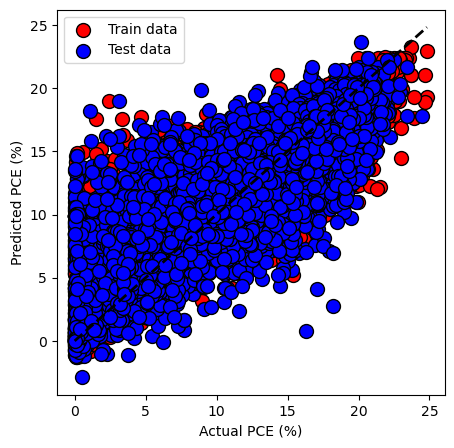

In [21]:
from catboost import CatBoostRegressor


# Convert the data to CatBoost-compatible format
X_train_cat = np.array(X_train)
X_test_cat = np.array(X_test)
y_train_cat = np.array(y_train)
y_test_cat = np.array(y_test)

# Define the model
cb = CatBoostRegressor()

# Define the hyperparameter grid
param_grid = {
    'iterations': [100, 200, 300],
    'depth': [3, 5, 7],
    'learning_rate': [0.1, 0.3, 0.5],
    'loss_function': ['RMSE', 'MAE']
}

# Define the search object
search = GridSearchCV(cb, param_grid, cv=5, n_jobs=-1)

# Fit the search object to the training data
search.fit(X_train_cat, y_train_cat)

# Print the best parameters
print(f'Best parameters: {search.best_params_}')

# Get the best model
best_cb = search.best_estimator_


model_builder(best_cb, y_train_cat, y_test_cat)

In [24]:
models = [best_rf, best_xgb, best_gbr, best_dt, best_svr, best_br, best_et, best_ridge, best_knr, best_cb] # List of models
model_names = ['Random Forest', 'XGBoost', 'Gradient Boosting', 'Decision Tree', 'Support Vector',
               'Bagging Regressor', 'Extra Trees', 'Ridge Regressor', 'kNR', 'CatBoost'] # List of model names

r2_scores = []
mse_score = []
mae_score = []
rmse_score = []

for model, name in zip(models, model_names):
    if model == best_cb:
        y_pred_train = model.predict(X_train_cat)
        y_pred_test = model.predict(X_test_cat)
    else:
        y_pred_train = model.predict(X_train)
        y_pred_test = model.predict(X_test)
        r2 = r2_score(y_test, y_pred_test)
        mse = mean_squared_error(y_test, y_pred_test)
        mae = mean_absolute_error(y_test, y_pred_test)

    r2_scores.append(r2)
    mse_score.append(mse)
    mae_score.append(mae)

    rmse = np.sqrt(mse)
    rmse_score.append(rmse)

151:	learn: 2.6882401	total: 21.3s	remaining: 20.8s
152:	learn: 2.6844749	total: 21.5s	remaining: 20.7s
153:	learn: 2.6814988	total: 22s	remaining: 20.8s
154:	learn: 2.6793413	total: 22.1s	remaining: 20.7s
155:	learn: 2.6760014	total: 22.2s	remaining: 20.5s
156:	learn: 2.6728964	total: 22.4s	remaining: 20.4s
157:	learn: 2.6715452	total: 22.6s	remaining: 20.3s
158:	learn: 2.6689600	total: 22.7s	remaining: 20.2s
159:	learn: 2.6674267	total: 22.8s	remaining: 20s
160:	learn: 2.6651487	total: 22.9s	remaining: 19.8s
161:	learn: 2.6594926	total: 23s	remaining: 19.6s
162:	learn: 2.6579412	total: 23.1s	remaining: 19.4s
163:	learn: 2.6560856	total: 23.2s	remaining: 19.2s
164:	learn: 2.6544718	total: 23.4s	remaining: 19.1s
165:	learn: 2.6519861	total: 23.5s	remaining: 19s
166:	learn: 2.6497205	total: 23.6s	remaining: 18.8s
167:	learn: 2.6474231	total: 23.8s	remaining: 18.7s
168:	learn: 2.6451683	total: 23.9s	remaining: 18.6s
169:	learn: 2.6421851	total: 24.2s	remaining: 18.5s
170:	learn: 2.639124

/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/

253:	learn: 1.8322676	total: 35.7s	remaining: 6.46s
254:	learn: 1.8310544	total: 35.7s	remaining: 6.31s
255:	learn: 1.8300786	total: 36s	remaining: 6.19s
256:	learn: 1.8295766	total: 36.3s	remaining: 6.07s
257:	learn: 1.8284374	total: 36.5s	remaining: 5.94s
258:	learn: 1.8273997	total: 36.7s	remaining: 5.81s
259:	learn: 1.8261564	total: 36.9s	remaining: 5.68s
260:	learn: 1.8253543	total: 37s	remaining: 5.52s
261:	learn: 1.8235812	total: 37.1s	remaining: 5.37s
262:	learn: 1.8225582	total: 37.1s	remaining: 5.22s
263:	learn: 1.8216807	total: 37.3s	remaining: 5.08s
264:	learn: 1.8210165	total: 37.4s	remaining: 4.93s
265:	learn: 1.8208016	total: 37.4s	remaining: 4.78s
266:	learn: 1.8201846	total: 37.7s	remaining: 4.66s
267:	learn: 1.8194981	total: 37.9s	remaining: 4.52s
268:	learn: 1.8189506	total: 38s	remaining: 4.38s
269:	learn: 1.8172563	total: 38.1s	remaining: 4.24s
270:	learn: 1.8164050	total: 38.3s	remaining: 4.1s
271:	learn: 1.8153250	total: 38.6s	remaining: 3.97s
272:	learn: 1.81413

/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/

In [25]:
df_model_evaluation = pd.DataFrame({
    'Model': model_names,
    'R2': r2_scores,
    'MSE': mse_score,
    'RMSE': rmse_score,
    'MAE': mae_score
}) # Evaluation parameters


df_model_evaluation = df_model_evaluation.sort_values(by=['R2'], ascending=False).reset_index(drop=True) # Sorting using R2 score
df_model_evaluation.to_csv(pwd + '/Hp_tuned_best_models/PCE_Model_performance.csv', index=False) # Saving model evaluation parameters
df_model_evaluation 

Model        R2        MSE      RMSE       MAE
0      Random Forest  0.706106   7.852689  2.802265  1.979714
1  Bagging Regressor  0.702949   7.937046  2.817276  1.998973
2            XGBoost  0.702409   7.951476  2.819836  1.988235
3        Extra Trees  0.702196   7.957177  2.820847  1.982360
4  Gradient Boosting  0.695701   8.130719  2.851441  1.987795
5                kNR  0.642147   9.561628  3.092188  2.144946
6           CatBoost  0.642147   9.561628  3.092188  2.144946
7      Decision Tree  0.605828  10.532067  3.245315  2.292251
8     Support Vector  0.490484  13.614009  3.689717  2.696291
9    Ridge Regressor  0.434055  15.121738  3.888668  3.025189

212:	learn: 1.8835905	total: 29.8s	remaining: 12.2s
213:	learn: 1.8823778	total: 29.9s	remaining: 12s
214:	learn: 1.8818935	total: 29.9s	remaining: 11.8s
215:	learn: 1.8815128	total: 30s	remaining: 11.7s
216:	learn: 1.8798935	total: 30.3s	remaining: 11.6s
217:	learn: 1.8793672	total: 30.4s	remaining: 11.4s
218:	learn: 1.8786364	total: 30.5s	remaining: 11.3s
219:	learn: 1.8779422	total: 30.7s	remaining: 11.2s
220:	learn: 1.8761220	total: 30.7s	remaining: 11s
221:	learn: 1.8752113	total: 30.8s	remaining: 10.8s
222:	learn: 1.8739126	total: 30.9s	remaining: 10.7s
223:	learn: 1.8721565	total: 30.9s	remaining: 10.5s
224:	learn: 1.8713312	total: 31s	remaining: 10.3s
225:	learn: 1.8705529	total: 31.1s	remaining: 10.2s
226:	learn: 1.8695325	total: 31.3s	remaining: 10s
227:	learn: 1.8688927	total: 31.4s	remaining: 9.91s
228:	learn: 1.8675449	total: 31.8s	remaining: 9.84s
229:	learn: 1.8661955	total: 31.8s	remaining: 9.67s
230:	learn: 1.8652743	total: 32s	remaining: 9.56s
231:	learn: 1.8631451	to

/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/

155:	learn: 1.9574047	total: 22.7s	remaining: 20.9s
156:	learn: 1.9553613	total: 22.7s	remaining: 20.7s
157:	learn: 1.9544067	total: 22.8s	remaining: 20.5s
158:	learn: 1.9527298	total: 22.9s	remaining: 20.3s
159:	learn: 1.9506546	total: 23s	remaining: 20.1s
160:	learn: 1.9492059	total: 23s	remaining: 19.9s
161:	learn: 1.9462354	total: 23.1s	remaining: 19.7s
162:	learn: 1.9440208	total: 23.2s	remaining: 19.5s
163:	learn: 1.9414650	total: 23.2s	remaining: 19.3s
164:	learn: 1.9411308	total: 23.2s	remaining: 19s
165:	learn: 1.9403487	total: 23.6s	remaining: 19s
166:	learn: 1.9372576	total: 23.7s	remaining: 18.8s
167:	learn: 1.9351806	total: 23.8s	remaining: 18.7s
168:	learn: 1.9332600	total: 23.9s	remaining: 18.5s
169:	learn: 1.9327391	total: 24s	remaining: 18.3s
170:	learn: 1.9313521	total: 24.1s	remaining: 18.2s
171:	learn: 1.9302493	total: 24.2s	remaining: 18s
172:	learn: 1.9288571	total: 24.3s	remaining: 17.8s
173:	learn: 1.9285339	total: 24.4s	remaining: 17.6s
174:	learn: 1.9258340	to

/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:297: FutureWarning: The loss 'lad' was deprecated in v1.0 and will be removed in version 1.2. Use 'absolute_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:297: FutureWarning: The loss 'lad' was deprecated in v1.0 and will be removed in version 1.2. Use 'absolute_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/minicon

211:	learn: 1.8959011	total: 30.1s	remaining: 12.5s
212:	learn: 1.8943096	total: 30.2s	remaining: 12.3s
213:	learn: 1.8922101	total: 30.2s	remaining: 12.2s
214:	learn: 1.8905240	total: 30.4s	remaining: 12s
215:	learn: 1.8889047	total: 30.5s	remaining: 11.9s
216:	learn: 1.8880664	total: 30.5s	remaining: 11.7s
217:	learn: 1.8859391	total: 30.6s	remaining: 11.5s
218:	learn: 1.8853317	total: 30.6s	remaining: 11.3s
219:	learn: 1.8840653	total: 30.7s	remaining: 11.2s
220:	learn: 1.8828087	total: 30.8s	remaining: 11s
221:	learn: 1.8817377	total: 30.9s	remaining: 10.9s
222:	learn: 1.8809428	total: 31s	remaining: 10.7s
223:	learn: 1.8787550	total: 31s	remaining: 10.5s
224:	learn: 1.8784503	total: 31.2s	remaining: 10.4s
225:	learn: 1.8775359	total: 31.4s	remaining: 10.3s
226:	learn: 1.8758547	total: 31.5s	remaining: 10.1s
227:	learn: 1.8730513	total: 31.5s	remaining: 9.95s
228:	learn: 1.8723195	total: 31.6s	remaining: 9.79s
229:	learn: 1.8711481	total: 31.7s	remaining: 9.64s
230:	learn: 1.870423

/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/

268:	learn: 2.2427517	total: 34.3s	remaining: 3.95s
269:	learn: 2.2413480	total: 34.3s	remaining: 3.81s
270:	learn: 2.2401302	total: 34.4s	remaining: 3.68s
271:	learn: 2.2384678	total: 34.5s	remaining: 3.55s
272:	learn: 2.2380871	total: 34.6s	remaining: 3.42s
273:	learn: 2.2376582	total: 34.6s	remaining: 3.28s
274:	learn: 2.2362552	total: 34.8s	remaining: 3.17s
275:	learn: 2.2353242	total: 35s	remaining: 3.04s
276:	learn: 2.2339927	total: 35s	remaining: 2.91s
277:	learn: 2.2335511	total: 35.2s	remaining: 2.78s
278:	learn: 2.2314895	total: 35.3s	remaining: 2.66s
279:	learn: 2.2311510	total: 35.6s	remaining: 2.54s
280:	learn: 2.2292869	total: 35.7s	remaining: 2.41s
281:	learn: 2.2280080	total: 35.8s	remaining: 2.28s
282:	learn: 2.2265718	total: 35.9s	remaining: 2.15s
283:	learn: 2.2243280	total: 35.9s	remaining: 2.02s
284:	learn: 2.2227044	total: 35.9s	remaining: 1.89s
285:	learn: 2.2216713	total: 36s	remaining: 1.76s
286:	learn: 2.2214849	total: 36.1s	remaining: 1.63s
287:	learn: 2.2209

/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:297: FutureWarning: The loss 'lad' was deprecated in v1.0 and will be removed in version 1.2. Use 'absolute_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:297: FutureWarning: The loss 'lad' was deprecated in v1.0 and will be removed in version 1.2. Use 'absolute_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:297: FutureWarning: The loss 'lad' was deprecated in v1.0 and will be removed in version 1.2. Use 'absolute_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:297: FutureWarning: The loss 'lad' was deprecated in v1.0 and will be removed in version 1.2. Use 'absolute_error' which is equivalent.
  FutureWarning,
/home/rumman/min

174:	learn: 1.9406570	total: 24.8s	remaining: 17.7s
175:	learn: 1.9389185	total: 24.9s	remaining: 17.6s
176:	learn: 1.9366000	total: 25s	remaining: 17.4s
177:	learn: 1.9354575	total: 25.1s	remaining: 17.2s
178:	learn: 1.9332221	total: 25.2s	remaining: 17.1s
179:	learn: 1.9302147	total: 25.3s	remaining: 16.9s
180:	learn: 1.9291503	total: 25.4s	remaining: 16.7s
181:	learn: 1.9276766	total: 25.4s	remaining: 16.5s
182:	learn: 1.9257406	total: 25.5s	remaining: 16.3s
183:	learn: 1.9249330	total: 25.6s	remaining: 16.1s
184:	learn: 1.9229877	total: 25.6s	remaining: 15.9s
185:	learn: 1.9203296	total: 25.7s	remaining: 15.8s
186:	learn: 1.9185353	total: 25.8s	remaining: 15.6s
187:	learn: 1.9162711	total: 26s	remaining: 15.5s
188:	learn: 1.9157595	total: 26.1s	remaining: 15.3s
189:	learn: 1.9141472	total: 26.1s	remaining: 15.1s
190:	learn: 1.9122977	total: 26.8s	remaining: 15.3s
191:	learn: 1.9116524	total: 27.1s	remaining: 15.3s
192:	learn: 1.9101857	total: 27.3s	remaining: 15.1s
193:	learn: 1.90

/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:297: FutureWarning: The loss 'lad' was deprecated in v1.0 and will be removed in version 1.2. Use 'absolute_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:297: FutureWarning: The loss 'lad' was deprecated in v1.0 and will be removed in version 1.2. Use 'absolute_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:297: FutureWarning: The loss 'lad' was deprecated in v1.0 and will be removed in version 1.2. Use 'absolute_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:297: FutureWarning: The loss 'lad' was deprecated in v1.0 and will be removed in version 1.2. Use 'absolute_error' which is equivalent.
  FutureWarning,
/home/rumman/min

173:	learn: 2.4147826	total: 21.2s	remaining: 15.4s
174:	learn: 2.4135682	total: 21.3s	remaining: 15.2s
175:	learn: 2.4112646	total: 21.4s	remaining: 15s
176:	learn: 2.4095078	total: 21.5s	remaining: 14.9s
177:	learn: 2.4052795	total: 21.5s	remaining: 14.7s
178:	learn: 2.4008370	total: 21.6s	remaining: 14.6s
179:	learn: 2.3965610	total: 21.6s	remaining: 14.4s
180:	learn: 2.3926016	total: 21.6s	remaining: 14.2s
181:	learn: 2.3899007	total: 21.8s	remaining: 14.1s
182:	learn: 2.3876534	total: 21.9s	remaining: 14s
183:	learn: 2.3845768	total: 22s	remaining: 13.9s
184:	learn: 2.3827460	total: 22.1s	remaining: 13.7s
185:	learn: 2.3817450	total: 22.2s	remaining: 13.6s
186:	learn: 2.3796926	total: 22.2s	remaining: 13.4s
187:	learn: 2.3770056	total: 22.3s	remaining: 13.3s
188:	learn: 2.3742436	total: 22.4s	remaining: 13.2s
189:	learn: 2.3727118	total: 22.7s	remaining: 13.1s
190:	learn: 2.3722272	total: 22.7s	remaining: 13s
191:	learn: 2.3693740	total: 22.9s	remaining: 12.9s
192:	learn: 2.368287

/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/

233:	learn: 2.3106154	total: 25.5s	remaining: 7.19s
234:	learn: 2.3095612	total: 25.5s	remaining: 7.06s
235:	learn: 2.3082837	total: 25.6s	remaining: 6.95s
236:	learn: 2.3073270	total: 25.7s	remaining: 6.84s
237:	learn: 2.3060114	total: 25.8s	remaining: 6.73s
238:	learn: 2.3044491	total: 25.9s	remaining: 6.62s
239:	learn: 2.3031983	total: 26.1s	remaining: 6.51s
240:	learn: 2.3011631	total: 26.1s	remaining: 6.4s
241:	learn: 2.2983542	total: 26.2s	remaining: 6.28s
242:	learn: 2.2967009	total: 26.4s	remaining: 6.18s
243:	learn: 2.2950560	total: 26.4s	remaining: 6.06s
244:	learn: 2.2932075	total: 26.6s	remaining: 5.97s
245:	learn: 2.2917951	total: 26.7s	remaining: 5.85s
246:	learn: 2.2905471	total: 26.7s	remaining: 5.73s
247:	learn: 2.2888678	total: 26.8s	remaining: 5.61s
248:	learn: 2.2878932	total: 26.9s	remaining: 5.5s
249:	learn: 2.2864385	total: 26.9s	remaining: 5.38s
250:	learn: 2.2851443	total: 27.1s	remaining: 5.29s
251:	learn: 2.2835203	total: 27.1s	remaining: 5.16s
252:	learn: 2.

/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:297: FutureWarning: The loss 'lad' was deprecated in v1.0 and will be removed in version 1.2. Use 'absolute_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:297: FutureWarning: The loss 'lad' was deprecated in v1.0 and will be removed in version 1.2. Use 'absolute_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:297: FutureWarning: The loss 'lad' was deprecated in v1.0 and will be removed in version 1.2. Use 'absolute_error' which is equivalent.
  FutureWarning,


270:	learn: 2.2572552	total: 30.8s	remaining: 3.3s
271:	learn: 2.2564435	total: 30.9s	remaining: 3.18s
272:	learn: 2.2547826	total: 31s	remaining: 3.06s
273:	learn: 2.2543381	total: 31s	remaining: 2.94s
274:	learn: 2.2529512	total: 31.1s	remaining: 2.82s
275:	learn: 2.2517587	total: 31.1s	remaining: 2.7s
276:	learn: 2.2484892	total: 31.1s	remaining: 2.58s
277:	learn: 2.2465795	total: 31.2s	remaining: 2.47s
278:	learn: 2.2459054	total: 31.2s	remaining: 2.35s
279:	learn: 2.2440379	total: 31.3s	remaining: 2.24s
280:	learn: 2.2418852	total: 31.4s	remaining: 2.12s
281:	learn: 2.2388096	total: 31.4s	remaining: 2.01s
282:	learn: 2.2378670	total: 31.5s	remaining: 1.89s
283:	learn: 2.2377528	total: 31.5s	remaining: 1.78s
284:	learn: 2.2363806	total: 31.6s	remaining: 1.66s
285:	learn: 2.2358893	total: 31.6s	remaining: 1.55s
286:	learn: 2.2337161	total: 31.7s	remaining: 1.44s
287:	learn: 2.2318268	total: 31.9s	remaining: 1.33s
288:	learn: 2.2310324	total: 31.9s	remaining: 1.21s
289:	learn: 2.2288

/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/

214:	learn: 2.3665250	total: 25.2s	remaining: 9.96s
215:	learn: 2.3651352	total: 25.3s	remaining: 9.83s
216:	learn: 2.3631364	total: 25.4s	remaining: 9.7s
217:	learn: 2.3607888	total: 25.5s	remaining: 9.59s
218:	learn: 2.3592450	total: 25.5s	remaining: 9.45s
219:	learn: 2.3573675	total: 25.6s	remaining: 9.31s
220:	learn: 2.3568092	total: 25.6s	remaining: 9.17s
221:	learn: 2.3558404	total: 25.8s	remaining: 9.05s
222:	learn: 2.3535042	total: 25.8s	remaining: 8.91s
223:	learn: 2.3507213	total: 25.8s	remaining: 8.76s
224:	learn: 2.3486664	total: 25.9s	remaining: 8.63s
225:	learn: 2.3458091	total: 26.1s	remaining: 8.53s
226:	learn: 2.3433502	total: 26.2s	remaining: 8.42s
227:	learn: 2.3411474	total: 26.3s	remaining: 8.32s
228:	learn: 2.3395084	total: 26.5s	remaining: 8.21s
229:	learn: 2.3377544	total: 26.5s	remaining: 8.08s
230:	learn: 2.3362905	total: 26.6s	remaining: 7.95s
231:	learn: 2.3354693	total: 26.7s	remaining: 7.83s
232:	learn: 2.3337103	total: 26.8s	remaining: 7.72s
233:	learn: 2

/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:297: FutureWarning: The loss 'lad' was deprecated in v1.0 and will be removed in version 1.2. Use 'absolute_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:297: FutureWarning: The loss 'lad' was deprecated in v1.0 and will be removed in version 1.2. Use 'absolute_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:297: FutureWarning: The loss 'lad' was deprecated in v1.0 and will be removed in version 1.2. Use 'absolute_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:297: FutureWarning: The loss 'lad' was deprecated in v1.0 and will be removed in version 1.2. Use 'absolute_error' which is equivalent.
  FutureWarning,
/home/rumman/min

233:	learn: 1.7548558	total: 23.4s	remaining: 6.61s
234:	learn: 1.7542699	total: 23.4s	remaining: 6.49s
235:	learn: 1.7529457	total: 23.5s	remaining: 6.36s
236:	learn: 1.7519391	total: 23.5s	remaining: 6.25s
237:	learn: 1.7515412	total: 23.5s	remaining: 6.12s
238:	learn: 1.7508207	total: 23.5s	remaining: 6s
239:	learn: 1.7491322	total: 23.5s	remaining: 5.88s
240:	learn: 1.7484669	total: 23.5s	remaining: 5.76s
241:	learn: 1.7480986	total: 23.6s	remaining: 5.65s
242:	learn: 1.7469728	total: 23.6s	remaining: 5.54s
243:	learn: 1.7457274	total: 23.7s	remaining: 5.43s
244:	learn: 1.7437160	total: 23.7s	remaining: 5.32s
245:	learn: 1.7431571	total: 23.7s	remaining: 5.2s
246:	learn: 1.7419652	total: 23.7s	remaining: 5.09s
247:	learn: 1.7408486	total: 23.7s	remaining: 4.97s
248:	learn: 1.7391381	total: 23.8s	remaining: 4.87s
249:	learn: 1.7378740	total: 23.8s	remaining: 4.76s
250:	learn: 1.7368467	total: 23.8s	remaining: 4.65s
251:	learn: 1.7356987	total: 23.9s	remaining: 4.55s
252:	learn: 1.73

/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:297: FutureWarning: The loss 'lad' was deprecated in v1.0 and will be removed in version 1.2. Use 'absolute_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda

270:	learn: 1.6990514	total: 26.5s	remaining: 2.84s
271:	learn: 1.6983230	total: 26.5s	remaining: 2.73s
272:	learn: 1.6977036	total: 26.6s	remaining: 2.63s
273:	learn: 1.6966539	total: 26.6s	remaining: 2.52s
274:	learn: 1.6952279	total: 26.6s	remaining: 2.42s
275:	learn: 1.6951169	total: 26.6s	remaining: 2.31s
276:	learn: 1.6945802	total: 26.6s	remaining: 2.21s
277:	learn: 1.6940364	total: 26.7s	remaining: 2.11s
278:	learn: 1.6929377	total: 26.7s	remaining: 2.01s
279:	learn: 1.6927222	total: 26.7s	remaining: 1.91s
280:	learn: 1.6924494	total: 26.7s	remaining: 1.81s
281:	learn: 1.6917921	total: 26.7s	remaining: 1.71s
282:	learn: 1.6916577	total: 26.7s	remaining: 1.61s
283:	learn: 1.6912321	total: 26.7s	remaining: 1.51s
284:	learn: 1.6907200	total: 26.8s	remaining: 1.41s
285:	learn: 1.6900132	total: 26.8s	remaining: 1.31s
286:	learn: 1.6887760	total: 26.8s	remaining: 1.21s
287:	learn: 1.6882820	total: 26.8s	remaining: 1.12s
288:	learn: 1.6876483	total: 26.8s	remaining: 1.02s
289:	learn: 

/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:297: FutureWarning: The loss 'lad' was deprecated in v1.0 and will be removed in version 1.2. Use 'absolute_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:297: FutureWarning: The loss 'lad' was deprecated in v1.0 and will be removed in version 1.2. Use 'absolute_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:297: FutureWarning: The loss 'lad' was deprecated in v1.0 and will be removed in version 1.2. Use 'absolute_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:297: FutureWarning: The loss 'lad' was deprecated in v1.0 and will be removed in version 1.2. Use 'absolute_error' which is equivalent.
  FutureWarning,
/home/rumman/min

173:	learn: 1.8131017	total: 21.7s	remaining: 15.7s
174:	learn: 1.8116632	total: 21.8s	remaining: 15.6s
175:	learn: 1.8113236	total: 21.9s	remaining: 15.4s
176:	learn: 1.8080282	total: 22.2s	remaining: 15.4s
177:	learn: 1.8068443	total: 22.3s	remaining: 15.3s
178:	learn: 1.8060700	total: 22.5s	remaining: 15.2s
179:	learn: 1.8051325	total: 22.5s	remaining: 15s
180:	learn: 1.8045257	total: 22.6s	remaining: 14.9s
181:	learn: 1.8036520	total: 22.8s	remaining: 14.8s
182:	learn: 1.8022623	total: 22.9s	remaining: 14.6s
183:	learn: 1.8015831	total: 22.9s	remaining: 14.5s
184:	learn: 1.7994909	total: 23s	remaining: 14.3s
185:	learn: 1.7986812	total: 23s	remaining: 14.1s
186:	learn: 1.7979487	total: 23.1s	remaining: 14s
187:	learn: 1.7968725	total: 23.1s	remaining: 13.8s
188:	learn: 1.7958669	total: 23.1s	remaining: 13.6s
189:	learn: 1.7935999	total: 23.2s	remaining: 13.4s
190:	learn: 1.7920393	total: 23.2s	remaining: 13.2s
191:	learn: 1.7906245	total: 23.2s	remaining: 13.1s
192:	learn: 1.788911